# Case Study- E Commerce

An E Commerce company or DTH (you can choose either of these two domains) provider is facing a lot of competition in the current market and it has become a challenge to retain the existing customers in the current situation. Hence, the company wants to develop a model through which they can do churn prediction of the accounts and provide segmented offers to the potential churners. In this company, account churn is a major thing because 1 account can have multiple customers. hence by losing one account the company might be losing more than one customer.

You have been assigned to develop a churn prediction model for this company and provide business recommendations on the campaign.

Your campaign suggestion should be unique and be very clear on the campaign offer because your recommendation will go through the revenue assurance team. If they find that you are giving a lot of free (or subsidized) stuff thereby making a loss to the company; they are not going to approve your recommendation. Hence be very careful while providing campaign recommendation.

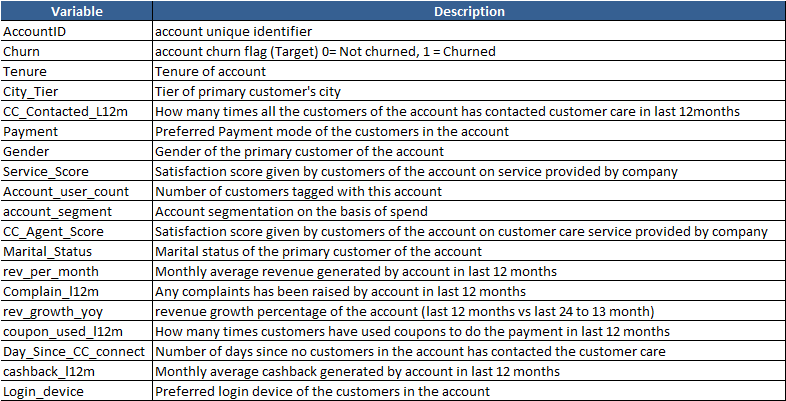

## Importing Liabraries

In [1]:
import numpy as np                 # for Numerical Calculation                                            
import pandas as pd                # for Dataframe Manupulation                                          
import seaborn as sns; sns.set()   # for Visualisation
import matplotlib.pyplot as plt    # for Visualisation
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#pip install termcolor
from termcolor import colored

In [2]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import scipy.stats as st
import sys

from scipy.stats import chi2_contingency        # Chi-aquare Test
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy import stats

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,accuracy_score,confusion_matrix
import statsmodels.formula.api as SM


## Importing Dataset

In [4]:
df_cus_churn = pd.read_excel(r"Customer Churn Data.xlsx",sheet_name = "Data for DSBA",index_col=0)  # we have made AccountId as Index
# "r" is used so as import all the raw data into our Notebook 

In [5]:
df_cus_churn.columns=df_cus_churn.columns.str.lower()                         # converted columns names into lowercase 

## Head of the Dataset

In [6]:
df_cus_churn.head() # top 5 rows of the dataset

churn tenure  city_tier  cc_contacted_ly      payment  gender  \
AccountID                                                                  
20000          1      4        3.0              6.0   Debit Card  Female   
20001          1      0        1.0              8.0          UPI    Male   
20002          1      0        1.0             30.0   Debit Card    Male   
20003          1      0        3.0             15.0   Debit Card    Male   
20004          1      0        1.0             12.0  Credit Card    Male   

           service_score account_user_count account_segment  cc_agent_score  \
AccountID                                                                     
20000                3.0                  3           Super             2.0   
20001                3.0                  4    Regular Plus             3.0   
20002                2.0                  4    Regular Plus             3.0   
20003                2.0                  4           Super             5.0   
20004                2.0                  3    Regular Plus             5.0   

          marital_status rev_per_month  complain_ly rev_growth_yoy  \
AccountID                                                            
20000             Single             9          1.0             11   
20001             Single             7          1.0             15   
20002             Single             6          1.0             14   
20003             Single             8          0.0             23   
20004             Single             3          0.0             11   

          coupon_used_for_payment day_since_cc_connect cashback login_device  
AccountID                                                                     
20000                           1                    5   159.93       Mobile  
20001                           0                    0    120.9       Mobile  
20002                           0                    3      NaN       Mobile  
20003                           0                    3   134.07       Mobile  
20004                           1                    3    129.6       Mobile

## Tail of the dataset

In [7]:
df_cus_churn.tail() # last 5 rows of the dataset

churn tenure  city_tier  cc_contacted_ly      payment gender  \
AccountID                                                                 
31255          0     10        1.0             34.0  Credit Card   Male   
31256          0     13        1.0             19.0  Credit Card   Male   
31257          0      1        1.0             14.0   Debit Card   Male   
31258          0     23        3.0             11.0  Credit Card   Male   
31259          0      8        1.0             22.0  Credit Card   Male   

           service_score account_user_count account_segment  cc_agent_score  \
AccountID                                                                     
31255                3.0                  2           Super             1.0   
31256                3.0                  5             HNI             5.0   
31257                3.0                  2           Super             4.0   
31258                4.0                  5           Super             4.0   
31259                3.0                  2           Super             3.0   

          marital_status rev_per_month  complain_ly rev_growth_yoy  \
AccountID                                                            
31255            Married             9          0.0             19   
31256            Married             7          0.0             16   
31257            Married             7          1.0             22   
31258            Married             7          0.0             16   
31259            Married             5          0.0             13   

          coupon_used_for_payment day_since_cc_connect cashback login_device  
AccountID                                                                     
31255                           1                    4   153.71     Computer  
31256                           1                    8   226.91       Mobile  
31257                           1                    4   191.42       Mobile  
31258                           2                    9    179.9     Computer  
31259                           2                    3   175.04       Mobile

## Shape of the Dataset

In [8]:
print("Total nos. of Rows:", df_cus_churn.shape[0])
print("Total nos. of Columns:", df_cus_churn.shape[1])

Total nos. of Rows: 11260
Total nos. of Columns: 18


## Info of the Dataset

In [9]:
df_cus_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11260 entries, 20000 to 31259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   churn                    11260 non-null  int64  
 1   tenure                   11158 non-null  object 
 2   city_tier                11148 non-null  float64
 3   cc_contacted_ly          11158 non-null  float64
 4   payment                  11151 non-null  object 
 5   gender                   11152 non-null  object 
 6   service_score            11162 non-null  float64
 7   account_user_count       11148 non-null  object 
 8   account_segment          11163 non-null  object 
 9   cc_agent_score           11144 non-null  float64
 10  marital_status           11048 non-null  object 
 11  rev_per_month            11158 non-null  object 
 12  complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11260 non-null  object 
 14  coupon_used_for_pa

**Observation:**

If we see the excel sheet their are **total 14 Columns** which can either be Integer or Float64 Value but from the above **INFO** we can clearly see that their are only **7 Columns** means **7 Columns are Misclassified**. Thus we need to clean the Dataset first in order to check the correct values.

Below are the 7 Columns name which are Misclassifed:

* Tenure

* Account_user_count

* rev_per_month

* rev_growth_yoy

* coupon_used_for_payment

* Day_Since_CC_connect

* cashback

## Checking the Null Values

In [10]:
df_cus_churn.isnull().sum()*100/len(df_cus_churn)

churn                      0.000000
tenure                     0.905861
city_tier                  0.994671
cc_contacted_ly            0.905861
payment                    0.968028
gender                     0.959147
service_score              0.870337
account_user_count         0.994671
account_segment            0.861456
cc_agent_score             1.030195
marital_status             1.882771
rev_per_month              0.905861
complain_ly                3.170515
rev_growth_yoy             0.000000
coupon_used_for_payment    0.000000
day_since_cc_connect       3.170515
cashback                   4.182948
login_device               1.962700
dtype: float64

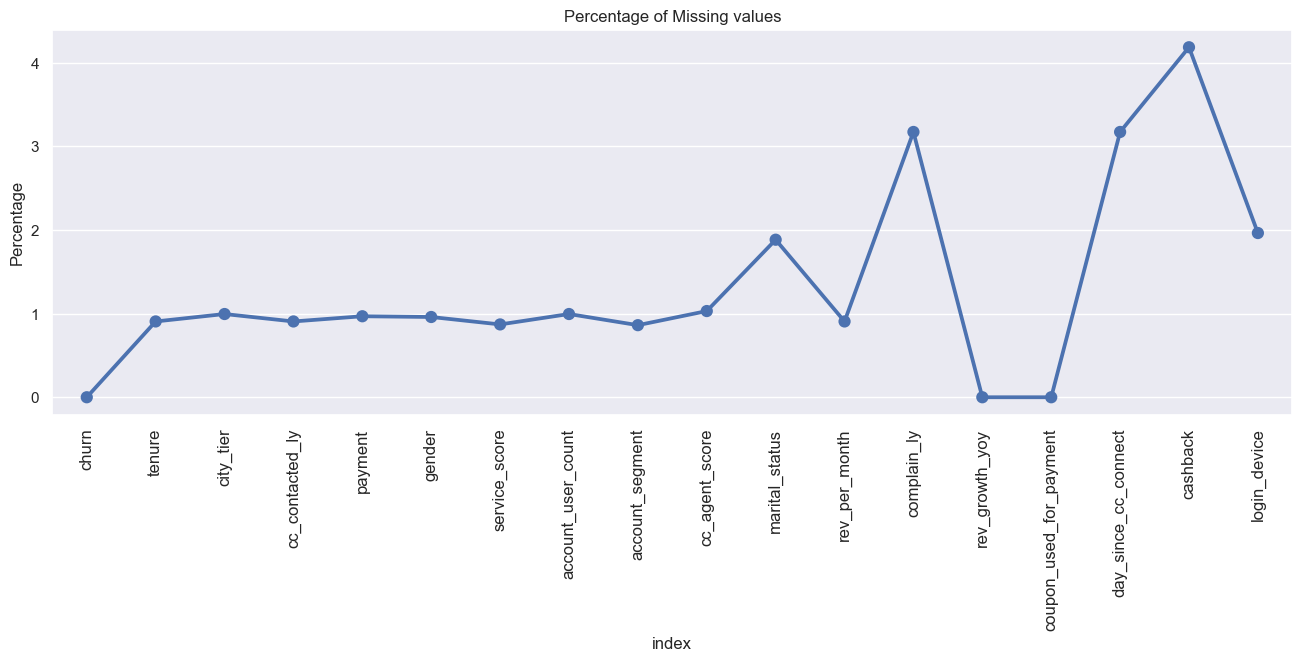

In [11]:
# Visual Presentation of Null values

missing=pd.DataFrame((df_cus_churn.isnull().sum())*100/df_cus_churn.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax=sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize=12)
plt.ylabel('Percentage')
plt.title('Percentage of Missing values')
plt.show()

**Observations:**

We can clearly see here there are many columns which contains high percentage of null values 

Those columns are :  **complain_ly, day_since_cc_connect, cashback**

These Null values will be handled accordingly

## Checking for Duplicates

In [12]:
duplicates = df_cus_churn.duplicated()
print('Number of duplicate rows = %d' % (duplicates.sum()))

Number of duplicate rows = 259


In [13]:
# dropping duplicate values
df_cus_churn.drop_duplicates(keep=False, inplace=True)

In [14]:
# Lets First make a copy in order keep the original data safe just in case. We will be doing all our manupulation in our Copyied dataset

df = df_cus_churn.copy()

## EDA + DATA CLEANING + STATISTICAL SIGNIFCANCE

**Lets start with EDA for each columns and do some Data Cleaning comibined with Statistical Significance of each column with 
our target variable(Churn)**

### (1) Churn

In [15]:
df['churn'].value_counts()

0    8934
1    1808
Name: churn, dtype: int64

In [16]:
# Average Churn rate 

avg_churn = df['churn'].value_counts()[1]*100/len(df['churn'])
print('Average Churn Rate: ',avg_churn)

Average Churn Rate:  16.831130143362504


**Observations:**

* Churn = 1 and Not-Churned = 0
* Average Overall Churn Rate:  16.838365896980463
* Imbalance in dataset  

In [17]:
df.columns

Index(['churn', 'tenure', 'city_tier', 'cc_contacted_ly', 'payment', 'gender',
       'service_score', 'account_user_count', 'account_segment',
       'cc_agent_score', 'marital_status', 'rev_per_month', 'complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'day_since_cc_connect',
       'cashback', 'login_device'],
      dtype='object')

### (2) Tenure

In [18]:
# Check Unique Values

df["tenure"].unique()

array([4, 0, 2, 13, '#', 9, 99, 19, 20, 14, 8, 26, 5, 30, 7, 1, 23, 3, 11,
       18, 29, 6, 28, 24, 25, 16, 10, 22, nan, 27, 15, 12, 21, 17, 50, 60,
       31, 51, 61], dtype=object)

**Observation :**

* "#" is the sign we need to corrected

* nan (empty cell) also needs to be filled but we will do this later

In [19]:
# Checking Null Values

df["tenure"].isnull().sum()

102

In [20]:
# Checking % counts of each values

df["tenure"].value_counts() * 100 / len(df["tenure"])

1     12.036865
0     10.845280
8      4.663936
9      4.412586
7      3.854031
10     3.733011
3      3.611990
5      3.584063
4      3.565444
11     3.388568
6      3.286166
13     3.155837
12     3.146528
2      3.127909
14     3.081363
15     2.746230
16     2.560045
19     2.429715
18     2.243530
17     1.945634
20     1.908397
23     1.517408
21     1.470862
22     1.349842
24     1.312605
30     1.256749
99     1.219512
27     1.200894
28     1.200894
26     1.117110
#      1.079873
29     1.024018
25     1.024018
31     0.875070
50     0.018619
60     0.018619
51     0.018619
61     0.018619
Name: tenure, dtype: float64

**Observations :**

We can clearly see that # is only 1.030195 %. 

In [21]:
df["tenure"].replace("#", np.nan, inplace=True)                              # replace "#" values with NAN values
median = df["tenure"].median()                                               # We are using median to impute missing values
df["tenure"].fillna(median, inplace=True)                                    # Imputing missing values with Median 
df["tenure"] = df["tenure"].astype(float)

In [22]:
# Cross - Checking Null Values

df['tenure'].isnull().sum()* 100 / len(df['tenure'])

0.0

In [23]:
df["tenure"].value_counts() * 100 / len(df["tenure"])

1.0     12.036865
0.0     10.845280
9.0      6.442003
8.0      4.663936
7.0      3.854031
10.0     3.733011
3.0      3.611990
5.0      3.584063
4.0      3.565444
11.0     3.388568
6.0      3.286166
13.0     3.155837
12.0     3.146528
2.0      3.127909
14.0     3.081363
15.0     2.746230
16.0     2.560045
19.0     2.429715
18.0     2.243530
17.0     1.945634
20.0     1.908397
23.0     1.517408
21.0     1.470862
22.0     1.349842
24.0     1.312605
30.0     1.256749
99.0     1.219512
28.0     1.200894
27.0     1.200894
26.0     1.117110
29.0     1.024018
25.0     1.024018
31.0     0.875070
50.0     0.018619
60.0     0.018619
51.0     0.018619
61.0     0.018619
Name: tenure, dtype: float64

**Observation :**

"#" Values are imputed using meadian and also datatype is changed into Float64 automatically and also 9.0 values is been increased from 4.404973 to 6.341030

In [24]:
# replace 0 with 0.01
df['tenure'].replace(0,0.01,inplace = True)

In [25]:
# Creating Bins for Tenure

s1=((df.tenure//6)*6).min()
s2=((df.tenure//6)*6).max()

bins = np.arange(s1,s2+5,5)
labels = [f'{int(i)}-{int(j)}' for i, j in zip(bins[:-1], bins[1:])] 

df['tenure_bin'] = pd.cut(df.tenure, bins=bins, labels=labels, right=False)
df['tenure_bin'].unique()

['0-5', '10-15', '5-10', '95-100', '15-20', '20-25', '25-30', '30-35', '50-55', '60-65']
Categories (20, object): ['0-5' < '5-10' < '10-15' < '15-20' ... '80-85' < '85-90' < '90-95' < '95-100']

The first two lines calculate the minimum and maximum values for the bin range, by rounding down to the nearest multiple of 6 for the minimum value, and rounding up to the nearest multiple of 6 for the maximum value.

Then, np.arange is used to create the bins using the minimum and maximum values and the desired bin width (in this case, 5). The labels variable is created using a list comprehension, which generates a label for each bin by concatenating the lower and upper limits of each bin.

Finally, the continuous variable is binned using the pd.cut function, and the binned result is stored in a new column in the DataFrame, in this case named "bin". The right=False argument is used to specify that the bins are right-closed, meaning that the right bin edge is not included in the bin.

https://stackoverflow.com/questions/54900253/how-to-create-bins-of-continuous-variable-in-pandas-dynamically

In [26]:
# Cross-Checking

columns_show = ['tenure','tenure_bin']
print(df[columns_show])

           tenure tenure_bin
AccountID                   
20000        4.00        0-5
20002        0.01        0-5
20003        0.01        0-5
20004        0.01        0-5
20005        0.01        0-5
...           ...        ...
31255       10.00      10-15
31256       13.00      10-15
31257        1.00        0-5
31258       23.00      20-25
31259        8.00       5-10

[10742 rows x 2 columns]


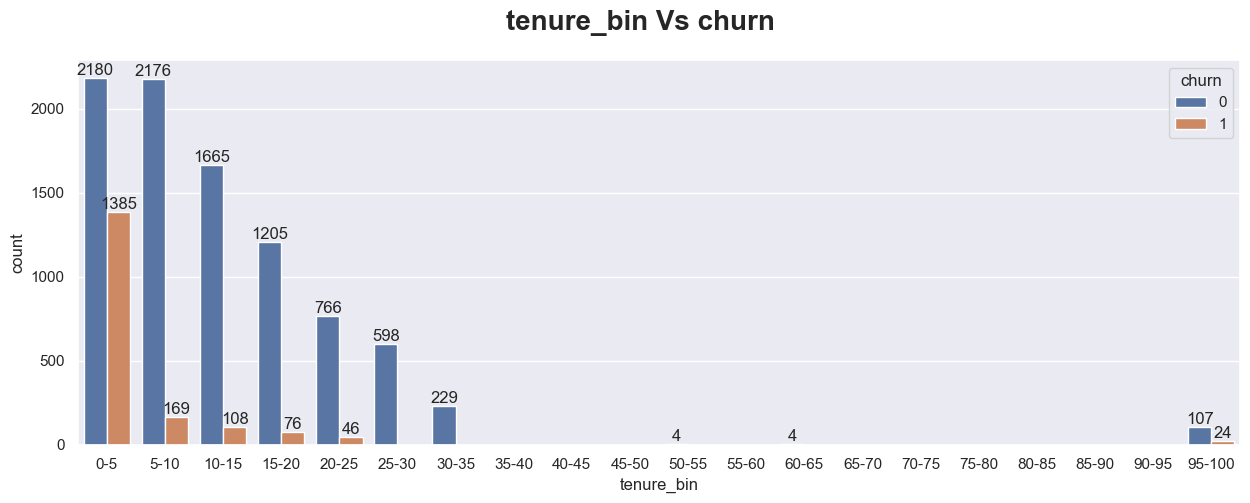

In [27]:
# Lets Check the tenure_bin Graphically 

plt.figure(figsize = (15,5))

w_s = sns.countplot(x = 'tenure_bin',hue = 'churn' ,data = df)


for container in w_s.containers:
    w_s.bar_label(container)

plt.suptitle('tenure_bin Vs churn',fontsize= 20, fontweight='bold')
plt.show()

**Observation:**

* We can see a very huge spike customer churning within the first 6 Months of Tenure which is a problem

#### Creating Null and Alternate Hypothesis

**Null Hypothesis (H0)** = Their is no relationship between churn and tenure

**Alternate Hypothesis (H1)** =  Their is relationship between churn and tenure

### T- Test [Tenure]

In [28]:
# split the data into two groups based on "Churn" using 'Tenure' as Filter

churned = df[df["churn"] == 1]["tenure"]
not_churned = df[df["churn"] == 0]["tenure"]

In [29]:
# perform T-test
t_stat, p_value = stats.ttest_ind(churned, not_churned)
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -24.269722423329572
P-value: 1.0184729951808257e-126


In [30]:
# interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. Their is a relationship between churn and tenure.")
else:
    print("Fail to reject the null hypothesis. Their is no relationship between churn and tenure.")

Reject the null hypothesis. Their is a relationship between churn and tenure.


### Chi square Test[Tenure_bin]

In [31]:
chi_data = pd.crosstab(index = df['tenure_bin'],columns= df['churn'])
chi_data.head()

churn          0     1
tenure_bin            
0-5         2180  1385
5-10        2176   169
10-15       1665   108
15-20       1205    76
20-25        766    46

In [32]:
stat, p_value, dof,expected = chi2_contingency(chi_data)
print('Chi-Squared :',stat)
print('p-value :',p_value)

Chi-Squared : 1886.1967735536232
p-value : 0.0


In [33]:
# interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. Their is a relationship between churn and tenure_bin.")
else:
    print("Fail to reject the null hypothesis. Their is no relationship between churn and tenure_bin.")

Reject the null hypothesis. Their is a relationship between churn and tenure_bin.


### Anova Test [Tenure]

In [34]:
f_stat, p_value = stats.f_oneway(churned,not_churned)
p_value

1.0184729951773252e-126

In [35]:
# interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. Their is a relationship between churn and tenure.")
else:
    print("Fail to reject the null hypothesis. Their is no relationship between churn and tenure.")

Reject the null hypothesis. Their is a relationship between churn and tenure.


### (3) City_Tier 

In [36]:
df['city_tier'].unique()

array([ 3.,  1., nan,  2.])

In [37]:
mode = df['city_tier'].mode()
mode[0]

1.0

In [38]:
# Filling null values

df['city_tier'].fillna(mode[0],inplace = True)

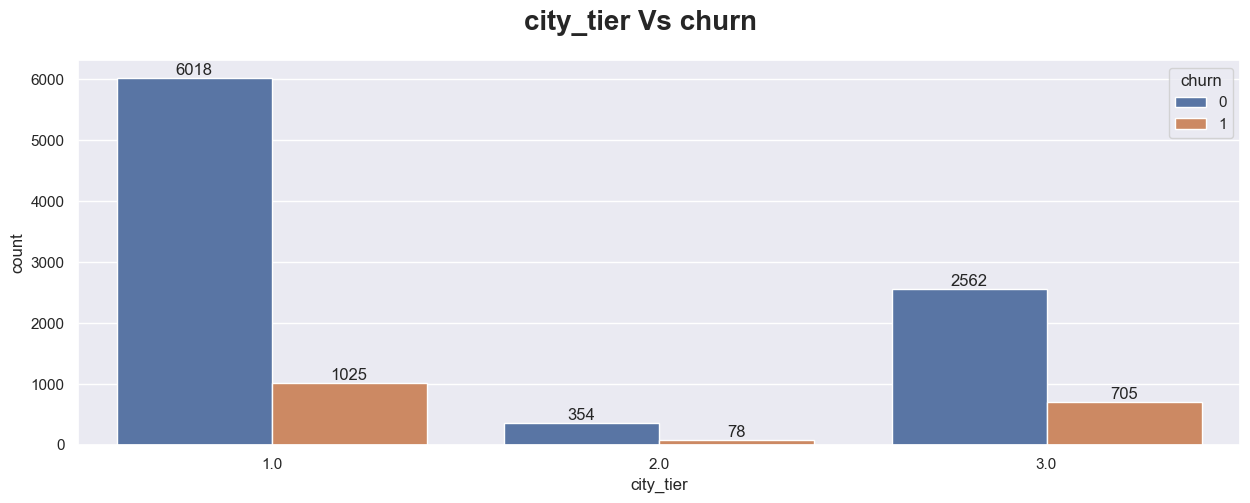

In [39]:
# Lets Check the city_tier Graphically 

plt.figure(figsize = (15,5))

w_s = sns.countplot(x = 'city_tier',hue = 'churn' ,data = df)


for container in w_s.containers:
    w_s.bar_label(container)

plt.suptitle('city_tier Vs churn',fontsize= 20, fontweight='bold')
plt.show()

**Churn%**

Tier 1: 15%

Tier 2: 18%

Tier 3: 22%

**Observation :**

* Highest Churn rate can be seen in TIer-3 City i.e. 22% after that Tier-2 city

#### Creating Null and Alternate Hypothesis

**Null Hypothesis (H0)** = Their is no relationship between churn and city_tier

**Alternate Hypothesis (H1)** =  Their is relationship between churn and city_tier

### Chi-Square Test [City_tier]

In [40]:
contigency= pd.crosstab(index = df['city_tier'],columns= df['churn'])
contigency

churn         0     1
city_tier            
1.0        6018  1025
2.0         354    78
3.0        2562   705

In [41]:
chi_stat,p_value,dof,expected = chi2_contingency(contigency)
print('Chi-Square :',chi_stat)
print('p_value', p_value)

Chi-Square : 79.18429620740442
p_value 6.387759431414114e-18


In [42]:
# interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. Their is a relationship between churn and city_tier.")
else:
    print("Fail to reject the null hypothesis. Their is no relationship between churn and city_tier.")

Reject the null hypothesis. Their is a relationship between churn and city_tier.


### (4) cc_contacted_ly

* cc_contacted_ly contains extreme outliers therefore we are using median for null values

In [43]:
df['cc_contacted_ly'].isnull().sum()

102

In [44]:
median = df['cc_contacted_ly'].median()
median

16.0

In [45]:
# Filling Null values with median

df['cc_contacted_ly'].fillna(median,inplace = True)

In [46]:
# Creating Bins for Tenure

s1=((df.cc_contacted_ly//6)*6).min()
s2=((df.cc_contacted_ly//6)*6).max()

print(s1)
print(s2)

0.0
132.0


In [47]:
bins = np.arange(s1,s2+8,10)
labels = [f'{int(i)}-{int(j)}' for i, j in zip(bins[:-1], bins[1:])] 

df['cc_contacted_ly_bin'] = pd.cut(df.cc_contacted_ly, bins=bins, labels=labels, right=False)
df['cc_contacted_ly_bin'].unique()

['0-10', '30-40', '10-20', '20-30', '120-130', '40-50', NaN]
Categories (13, object): ['0-10' < '10-20' < '20-30' < '30-40' ... '90-100' < '100-110' < '110-120' < '120-130']

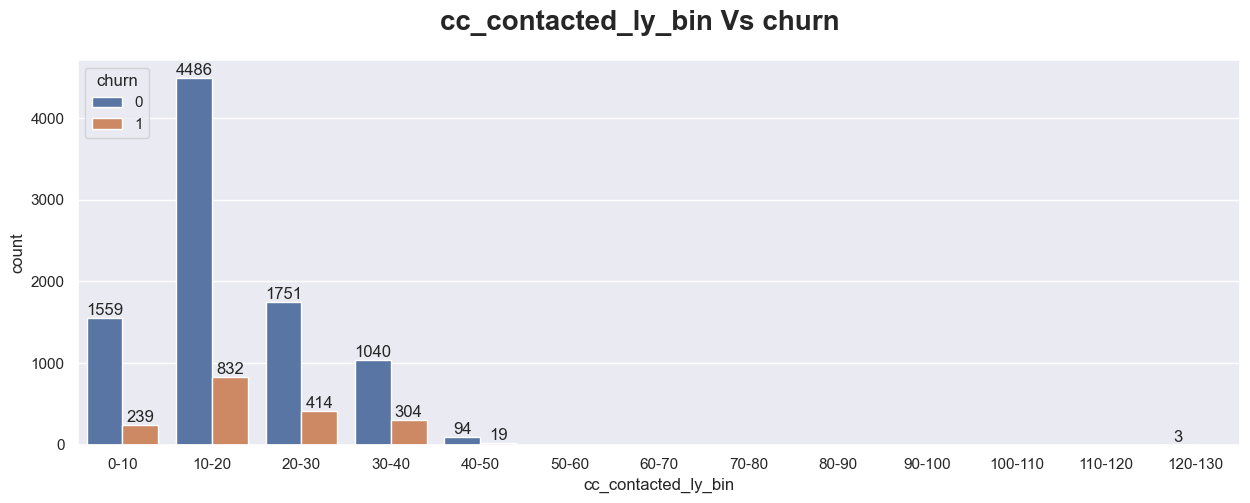

In [48]:
# Lets Check the cc_contacted_ly_bin Graphically 

plt.figure(figsize = (15,5))

w_s = sns.countplot(x = 'cc_contacted_ly_bin',hue = 'churn' ,data = df)


for container in w_s.containers:
    w_s.bar_label(container)

plt.suptitle('cc_contacted_ly_bin Vs churn',fontsize= 20, fontweight='bold')
plt.show()

**Churn Perntage:**

0-10  - 13%

10-20 - 15%

20-30 - 19%

30-40 - 22%

40-50 - 15%

**Observations**

* Churn rate i.e. 22% is High for the customers who have contacted between 30-40 times in the last 12 months

#### Creating Null and Alternate Hypothesis

**Null Hypothesis (H0)** = Their is no relationship between churn and cc_contacted_ly

**Alternate Hypothesis (H1)** =  Their is relationship between churn and cc_contacted_ly

### T- Test [cc_contacted_ly]

In [49]:
# split the data into two groups based on "Churn" using 'Tenure' as Filter

churned = df[df["churn"] == 1]["cc_contacted_ly"]
not_churned = df[df["churn"] == 0]["cc_contacted_ly"]

In [50]:
# perform T-test
t_stat, p_value = stats.ttest_ind(churned, not_churned)
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 7.16834939044365
P-value: 8.089465484524196e-13


In [51]:
# interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. Their is a relationship between churn and cc_contacted_ly.")
else:
    print("Fail to reject the null hypothesis. Their is no relationship between churn and cc_contacted_ly.")

Reject the null hypothesis. Their is a relationship between churn and cc_contacted_ly.


### Chi square Test[cc_contacted_ly_bin]

In [52]:
chi_data = pd.crosstab(index = df['cc_contacted_ly_bin'],columns= df['churn'])
chi_data.head()

churn                   0    1
cc_contacted_ly_bin           
0-10                 1559  239
10-20                4486  832
20-30                1751  414
30-40                1040  304
40-50                  94   19

In [53]:
stat, p_value, dof,expected = chi2_contingency(chi_data)
print('Chi-Squared :',stat)
print('p-value :',p_value)

Chi-Squared : 62.314473674066626
p-value : 4.036656253111993e-12


In [54]:
# interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. Their is a relationship between churn and cc_contacted_ly_bin.")
else:
    print("Fail to reject the null hypothesis. Their is no relationship between churn and cc_contacted_ly_bin.")

Reject the null hypothesis. Their is a relationship between churn and cc_contacted_ly_bin.


### Anova Test [cc_contacted_ly_bin]

In [55]:
f_stat, p_value = stats.f_oneway(churned,not_churned)
p_value

8.089465484499108e-13

In [56]:
# interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. Their is a relationship between churn and cc_contacted_ly_bin.")
else:
    print("Fail to reject the null hypothesis. Their is no relationship between churn and cc_contacted_ly_bin.")

Reject the null hypothesis. Their is a relationship between churn and cc_contacted_ly_bin.


### (5) Noise Index

* Creating a new variable called **NOISE INDEX = CC_Contacted_LY/Tenure.** 

* If the index is < 1 then customers is calling once or less than once a month if index > 1 then customers in calling every month . And if no. is more than 100 then customer reaches support quite frequently.

In [57]:
df['noise_index'] = df['cc_contacted_ly']/df['tenure']

In [58]:
# Converting Noise Index into Low, Medium and High noise

df['noise_index'] = np.where(df.noise_index <=1,'low_noise',
                            np.where(df.noise_index <=100,'medium_noise','high_noise'))

# noise_index <= 1 : Low noise
# noise_index <=100 : medium noise
# noise_index > 100 : high noise

In [59]:
df.noise_index.value_counts()

medium_noise    6640
low_noise       2937
high_noise      1165
Name: noise_index, dtype: int64

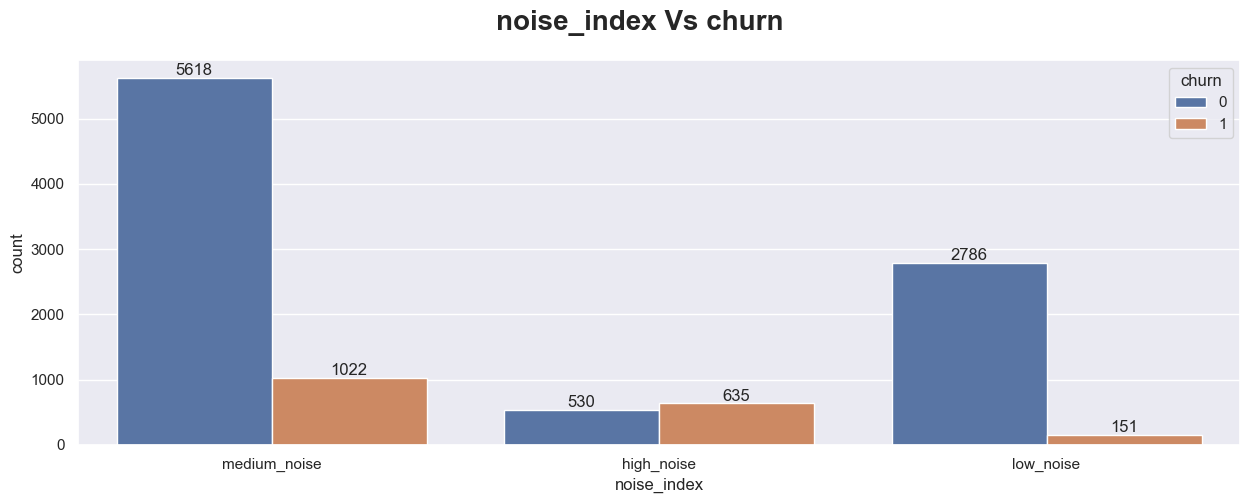

In [60]:
# Lets Check the noise_index Graphically 

plt.figure(figsize = (15,5))

w_s = sns.countplot(x = 'noise_index',hue = 'churn' ,data = df)


for container in w_s.containers:
    w_s.bar_label(container)

plt.suptitle('noise_index Vs churn',fontsize= 20, fontweight='bold')
plt.show()

**Churn%**

low_nose:    5%

medium_noise: 15%

high_noise:   54%

**Observations :**

* High Churn rate can be seen in High Nosie i.e. 54%

#### Creating Null and Alternate Hypothesis

**Null Hypothesis (H0)** = Their is no relationship between churn and nosie_index

**Alternate Hypothesis (H1)** =  Their is relationship between churn and noise_index

### Chi square Test[noise_index]

In [61]:
chi_data = pd.crosstab(index = df['noise_index'],columns= df['churn'])
chi_data.head()

churn            0     1
noise_index             
high_noise     530   635
low_noise     2786   151
medium_noise  5618  1022

In [62]:
stat, p_value, dof,expected = chi2_contingency(chi_data)
print('Chi-Squared :',stat)
print('p-value :',p_value)

Chi-Squared : 1477.856586014766
p-value : 0.0


In [63]:
# interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. Their is a relationship between churn and noise_index.")
else:
    print("Fail to reject the null hypothesis. Their is no relationship between churn and noise_index.")

Reject the null hypothesis. Their is a relationship between churn and noise_index.


### (6) Payment

In [64]:
df['payment'].unique()

array(['Debit Card', 'Credit Card', 'Cash on Delivery', 'E wallet', 'UPI',
       nan], dtype=object)

In [65]:
mode = df['payment'].mode()
mode[0]

'Debit Card'

In [66]:
df['payment'].fillna(mode[0],inplace = True)

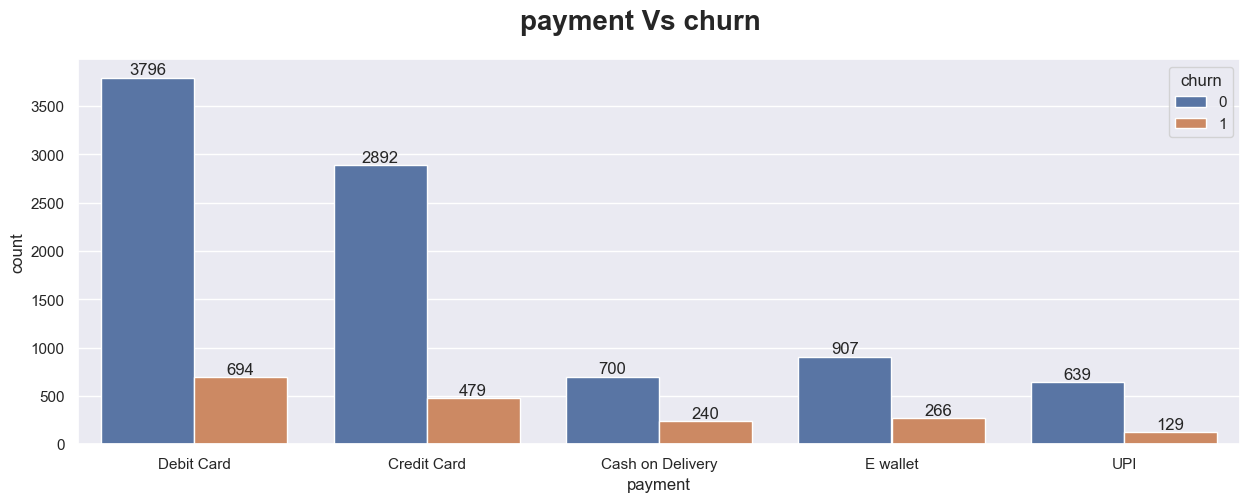

In [67]:
# Lets Check the payment Graphically 

plt.figure(figsize = (15,5))

w_s = sns.countplot(x = 'payment',hue = 'churn' ,data = df)


for container in w_s.containers:
    w_s.bar_label(container)

plt.suptitle('payment Vs churn',fontsize= 20, fontweight='bold')
plt.show()

**Churn%**

Debit Card:  15%

UPI:         17%

Credit Card: 14%

COD:         25%

E-wallet:    22%

**Observation**

* We can clearly see that **Cash on Delivery** has the highest churn rate i.e. 25% followed by E-wallet.

#### Creating Null and Alternate Hypothesis

**Null Hypothesis (H0)** = Their is no relationship between churn and payment

**Alternate Hypothesis (H1)** =  Their is relationship between churn and payment

### Chi square Test[payment]

In [68]:
chi_data = pd.crosstab(index = df['payment'],columns= df['churn'])
chi_data.head()

churn                0    1
payment                    
Cash on Delivery   700  240
Credit Card       2892  479
Debit Card        3796  694
E wallet           907  266
UPI                639  129

In [69]:
stat, p_value, dof,expected = chi2_contingency(chi_data)
print('Chi-Squared :',stat)
print('p-value :',p_value)

Chi-Squared : 102.08453945691477
p-value : 3.539811553254818e-21


In [70]:
# interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. Their is a relationship between churn and payment.")
else:
    print("Fail to reject the null hypothesis. Their is no relationship between churn and payment.")

Reject the null hypothesis. Their is a relationship between churn and payment.


### (7) Gender 

In [71]:
# Check Unique Values

df["gender"].unique()

array(['Female', 'Male', 'F', nan, 'M'], dtype=object)

**Observation :**


* "F" and "M" is the sign we need to corrected 

* nan also needs to be filled

In [72]:
# Checking % counts of each values

df["gender"].value_counts() 

Male      6016
Female    3972
M          376
F          270
Name: gender, dtype: int64

**Observation :**

We can replace 'F' with the Female and "M" with "Male"

In [73]:
# Imputing the values for # Tensure

df["gender"].replace("F",'Female',inplace = True)
df["gender"].replace("M",'Male',inplace = True)

In [74]:
# Cross-Checking

df["gender"].value_counts() 

Male      6392
Female    4242
Name: gender, dtype: int64

In [75]:
df['gender'].isnull().sum()

108

In [76]:
# Finding mode

mode = df['gender'].mode()
mode[0]

'Male'

In [77]:
# Filling missing data with mode

df['gender'].fillna(mode[0],inplace = True)
df['gender'].isnull().sum()

0

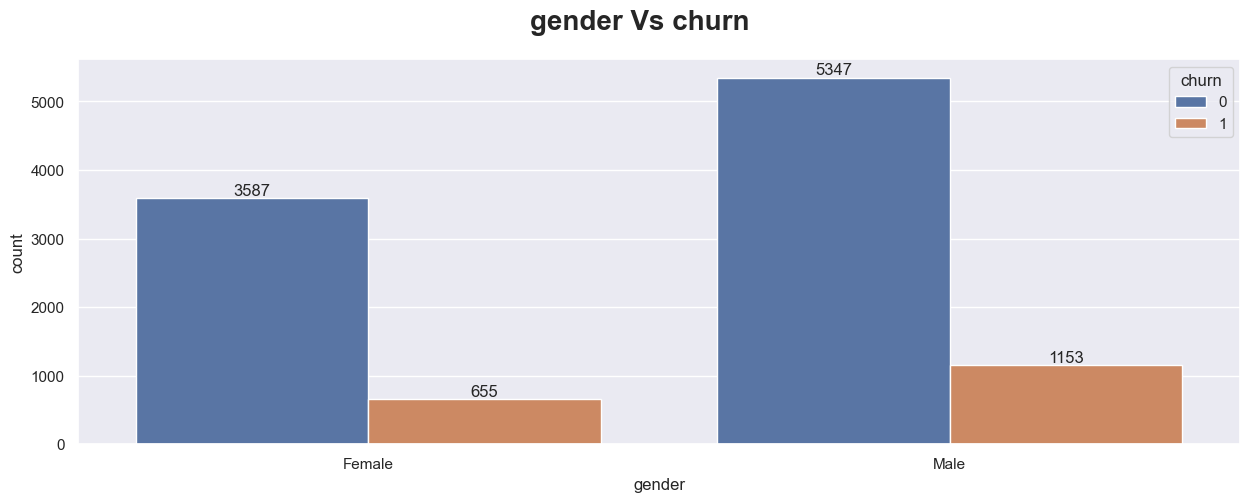

In [78]:
# Lets Check the gender Graphically 

plt.figure(figsize = (15,5))

w_s = sns.countplot(x = 'gender',hue = 'churn' ,data = df)


for container in w_s.containers:
    w_s.bar_label(container)

plt.suptitle('gender Vs churn',fontsize= 20, fontweight='bold')
plt.show()

**Churn%**

Female = 15%

Male = 17%

**Observations**

* Highest churn rate can be seen in **Male.** i.e. 17%

#### Creating Null and Alternate Hypothesis

**Null Hypothesis (H0)** = Their is no relationship between churn and gender

**Alternate Hypothesis (H1)** =  Their is relationship between churn and gender

### Chi square Test[gender]

In [79]:
chi_data = pd.crosstab(index = df['gender'],columns= df['churn'])
chi_data.head()

churn      0     1
gender            
Female  3587   655
Male    5347  1153

In [80]:
stat, p_value, dof,expected = chi2_contingency(chi_data)
print('Chi-Squared :',stat)
print('p-value :',p_value)

Chi-Squared : 9.516788002324123
p-value : 0.0020360063145239463


In [81]:
# interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. Their is a relationship between churn and gender.")
else:
    print("Fail to reject the null hypothesis. Their is no relationship between churn and gender.")

Reject the null hypothesis. Their is a relationship between churn and gender.


### (8) Service_Score

In [82]:
df['service_score'].unique()

array([ 3.,  2.,  1., nan,  0.,  4.,  5.])

In [83]:
df['service_score'].value_counts()

3.0    5230
2.0    3115
4.0    2209
1.0      77
0.0       8
5.0       5
Name: service_score, dtype: int64

In [84]:
# Converting 0 into Null values
df['service_score'].replace(0.0,np.nan,inplace = True)

In [85]:
# Calculating mode

mode = df['service_score'].mode() 
mode[0]

3.0

In [86]:
# Filling Null values

df['service_score'].fillna(mode[0],inplace = True)

In [87]:
df["service_score"] = df["service_score"].astype(float)

In [88]:
# Cross- Checking
df['service_score'].value_counts()

3.0    5336
2.0    3115
4.0    2209
1.0      77
5.0       5
Name: service_score, dtype: int64

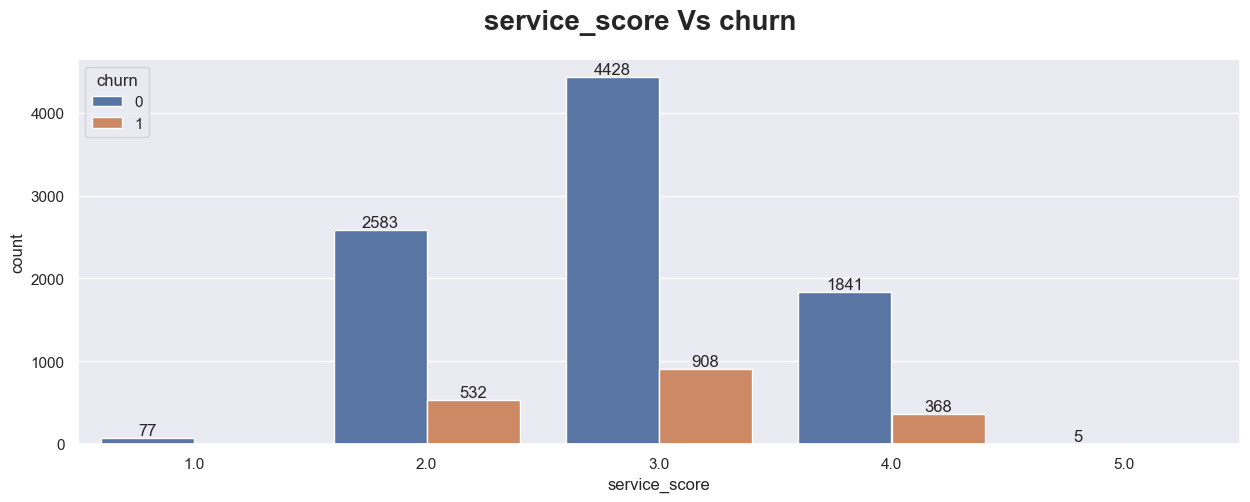

In [89]:
# Lets Check the service_score Graphically 

plt.figure(figsize = (15,5))

w_s = sns.countplot(x = 'service_score',hue = 'churn' ,data = df)


for container in w_s.containers:
    w_s.bar_label(container)

plt.suptitle('service_score Vs churn',fontsize= 20, fontweight='bold')
plt.show()

**Churn%**

* SS 1 = 0%

* SS 2 = 16%

* SS 3 = 17%

* SS 4 = 16%

* SS 5 = 0%

**Observation**

* High churn rate i.e. 17% can seen for those customers whose **satisfaction rating 3** on the services provided by the company

#### Creating Null and Alternate Hypothesis

**Null Hypothesis (H0)** = Their is no relationship between churn and service_score

**Alternate Hypothesis (H1)** =  Their is relationship between churn and service_score

### Chi square Test[service_score]

In [90]:
chi_data = pd.crosstab(index = df['service_score'],columns= df['churn'])
chi_data.head()

churn             0    1
service_score           
1.0              77    0
2.0            2583  532
3.0            4428  908
4.0            1841  368
5.0               5    0

In [91]:
stat, p_value, dof,expected = chi2_contingency(chi_data)
print('Chi-Squared :',stat)
print('p-value :',p_value)

Chi-Squared : 16.908580849587267
p-value : 0.002013618809181931


In [92]:
# interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. Their is a relationship between churn and service_score.")
else:
    print("Fail to reject the null hypothesis. Their is no relationship between churn and service_score.")

Reject the null hypothesis. Their is a relationship between churn and service_score.


### Noise Index vs Service Score vs Churn

Lets see who all are Noisy and Unhappy customers by comparing Noise Index, Service Score and Churn 

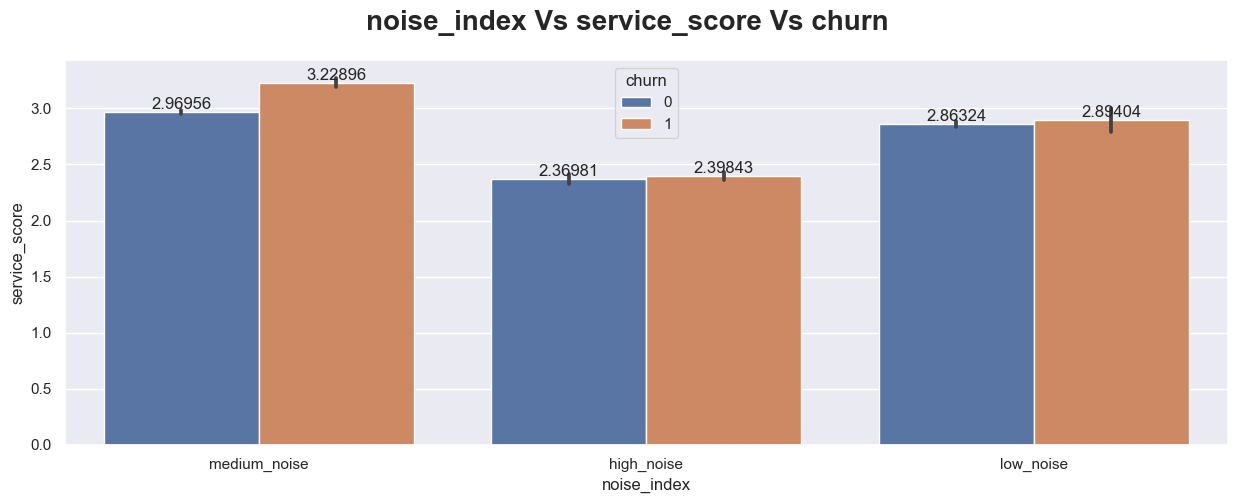

In [93]:
plt.figure(figsize = (15,5))

w_s = sns.barplot(x = 'noise_index',y ='service_score',hue = 'churn' ,data = df)

for container in w_s.containers:
    w_s.bar_label(container)

plt.suptitle('noise_index Vs service_score Vs churn',fontsize= 20, fontweight='bold')
plt.show()

**Observations**

* Medium Noise customers(calls the company for 2 or 3 times a month) who service score rating is more than 3 for the company are churning at high pace which shows these customers are Unhappy Customers

### (9) Account_user_count 

In [94]:
# Check Unique Values

df["account_user_count"].unique()

array([3, 4, nan, 5, 2, '@', 1, 6], dtype=object)

**Observation :**


* "@" is the sign we need to corrected

* nan (empty cell) also needs to be filled but we will do this later

In [95]:
# Checking % counts of each values

df["account_user_count"].value_counts() * 100 / len(df["account_user_count"])

4    40.392850
3    28.867995
5    15.183392
2     4.729101
1     3.947123
@     3.090672
6     2.746230
Name: account_user_count, dtype: float64

**Observation :**

We can clearly see that '@' is only 2.948490. Thus we can replace '@' with mode.

In [96]:
# Replacing @ with Null 

df["account_user_count"].replace("@",np.nan,inplace = True)

In [97]:
mode = df['account_user_count'].mode()
mode[0]

4.0

In [98]:
# Filling null values

df['account_user_count'].fillna(mode[0],inplace = True)

In [99]:
# Cross-Checking

df["account_user_count"].value_counts() * 100 / len(df["account_user_count"])

4.0    44.526159
3.0    28.867995
5.0    15.183392
2.0     4.729101
1.0     3.947123
6.0     2.746230
Name: account_user_count, dtype: float64

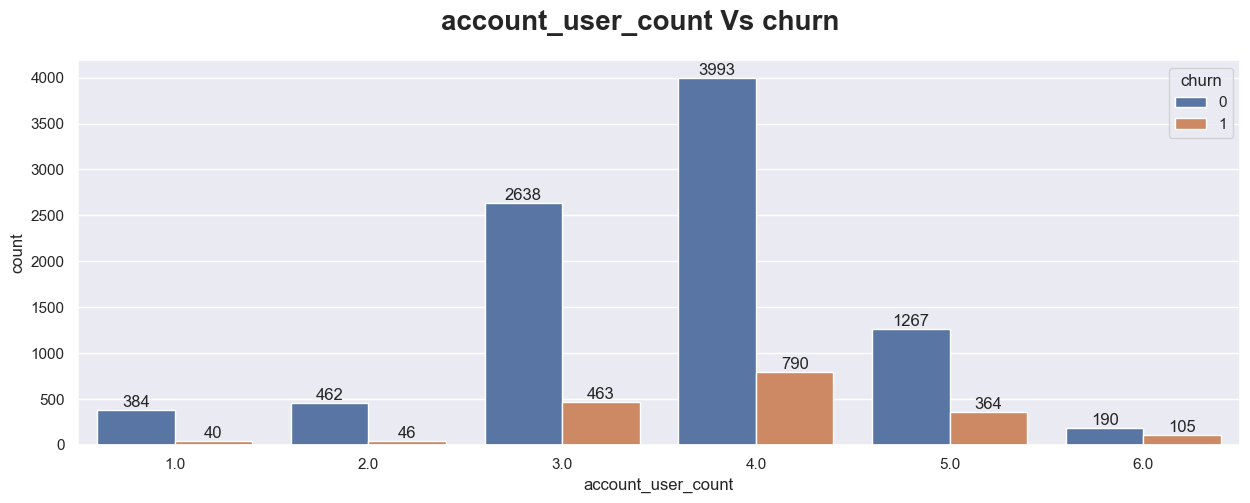

In [100]:
# Lets Check the account_user_count Graphically 

plt.figure(figsize = (15,5))

w_s = sns.countplot(x = 'account_user_count',hue = 'churn' ,data = df)


for container in w_s.containers:
    w_s.bar_label(container)

plt.suptitle('account_user_count Vs churn',fontsize= 20, fontweight='bold')
plt.show()

**Churn%**

* A_U_C 1 = 9%

* A_U_C 2 = 9%

* A_U_C 3 = 15%

* A_U_C 4 = 16%

* A_U_C 5 = 22%

* A_U_C 6 = 34%


**Observation**

* Account User Count having 6 customers has the highest churn rate i.e. 34%

#### Creating Null and Alternate Hypothesis

**Null Hypothesis (H0)** = Their is no relationship between churn and account_user_count

**Alternate Hypothesis (H1)** =  Their is relationship between churn and account_user_count

### Chi square Test[account_user_count]

In [101]:
chi_data = pd.crosstab(index = df['account_user_count'],columns= df['churn'])
chi_data.head()

churn                  0    1
account_user_count           
1.0                  384   40
2.0                  462   46
3.0                 2638  463
4.0                 3993  790
5.0                 1267  364

In [102]:
stat, p_value, dof,expected = chi2_contingency(chi_data)
print('Chi-Squared :',stat)
print('p-value :',p_value)

Chi-Squared : 156.1121818347998
p-value : 6.667502539181072e-32


In [103]:
# interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. Their is a relationship between churn and account_user_count.")
else:
    print("Fail to reject the null hypothesis. Their is no relationship between churn and account_user_count.")

Reject the null hypothesis. Their is a relationship between churn and account_user_count.


### (10) account_segment

In [104]:
df['account_segment'].unique()

array(['Super', 'Regular Plus', 'Regular', 'HNI', 'Regular +', nan,
       'Super Plus', 'Super +'], dtype=object)

In [105]:
df['account_segment'].replace('Regular Plus','Regular',inplace = True)
df['account_segment'].replace('Regular +','Regular',inplace = True)
df['account_segment'].replace('Super Plus','Super',inplace = True)
df['account_segment'].replace('Super +','Super',inplace = True)

In [106]:
mode = df['account_segment'].mode()
mode[0]

'Super'

In [107]:
df['account_segment'].fillna(mode[0],inplace = True)

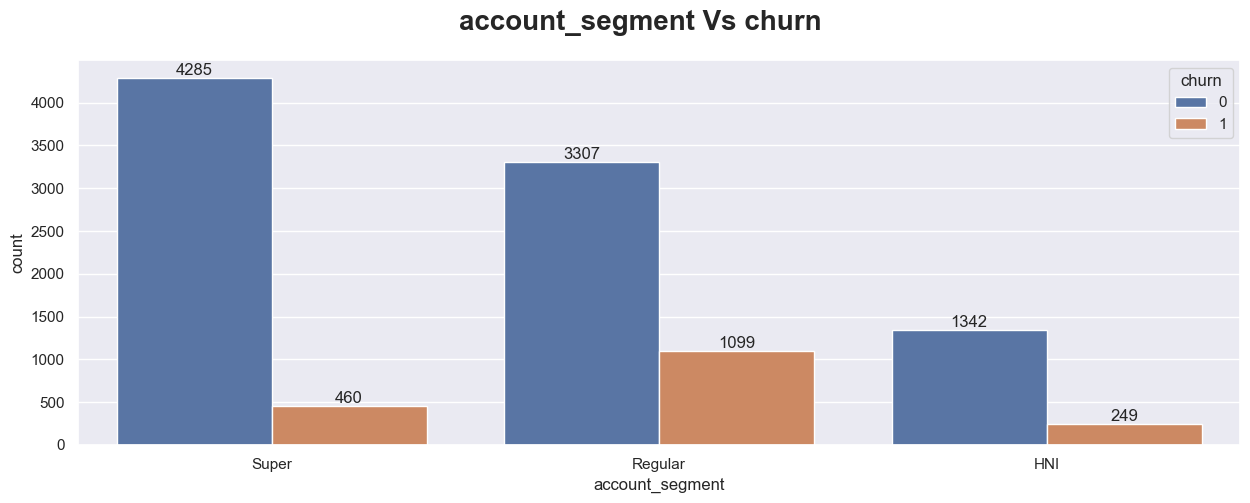

In [108]:
# Lets Check the account_segment Graphically 

plt.figure(figsize = (15,5))

w_s = sns.countplot(x = 'account_segment',hue = 'churn' ,data = df)


for container in w_s.containers:
    w_s.bar_label(container)

plt.suptitle('account_segment Vs churn',fontsize= 20, fontweight='bold')
plt.show()

**Churn%**

* Regular = 25%

* Super   = 9%

* HNI     = 16%

**Observations**

* Regular Account Segment Customers has the highest Churn Rate i.e. 25%

#### Creating Null and Alternate Hypothesis

**Null Hypothesis (H0)** = Their is no relationship between churn and account_segment

**Alternate Hypothesis (H1)** =  Their is relationship between churn and account_segment

### Chi square Test[account_segment]

In [109]:
chi_data = pd.crosstab(index = df['account_segment'],columns= df['churn'])
chi_data.head()

churn               0     1
account_segment            
HNI              1342   249
Regular          3307  1099
Super            4285   460

In [110]:
stat, p_value, dof,expected = chi2_contingency(chi_data)
print('Chi-Squared :',stat)
print('p-value :',p_value)

Chi-Squared : 381.35970371379676
p-value : 1.5445164153898737e-83


In [111]:
# interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. Their is a relationship between churn and account_segment.")
else:
    print("Fail to reject the null hypothesis. Their is no relationship between churn and account_segment.")

Reject the null hypothesis. Their is a relationship between churn and account_segment.


### (11) CC_Agent_Score

**Score HIGH means Good customer. Score LOW means Bad customer according to Agent.**

In [112]:
df['cc_agent_score'].unique()

array([ 2.,  3.,  5.,  4., nan,  1.])

In [113]:
mode = df['cc_agent_score'].mode()
mode[0]

3.0

In [114]:
df['cc_agent_score'].fillna(mode[0],inplace = True)

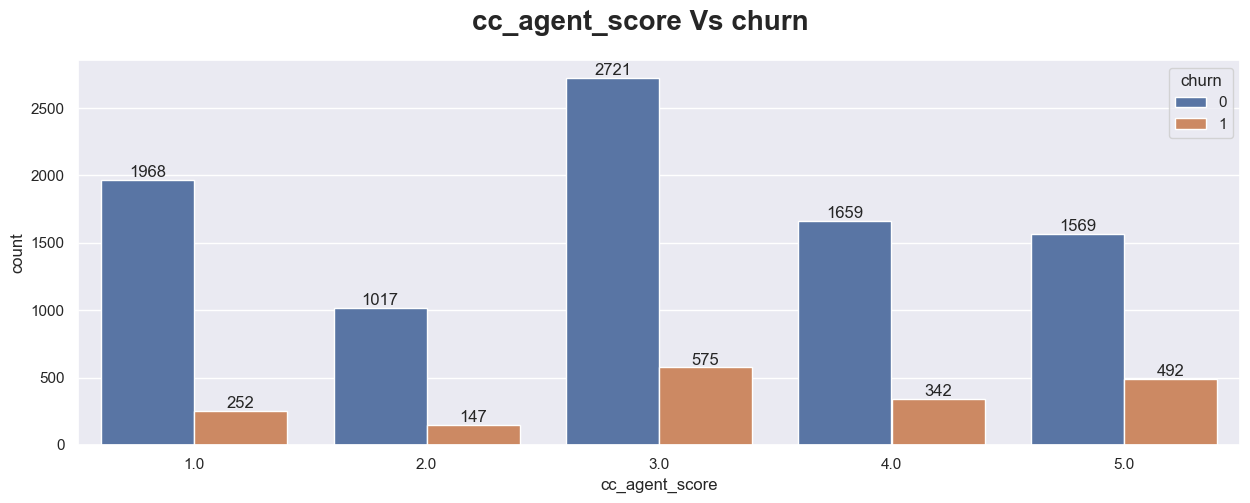

In [115]:
# Lets Check the cc_agent_score Graphically 

plt.figure(figsize = (15,5))

w_s = sns.countplot(x = 'cc_agent_score',hue = 'churn' ,data = df)


for container in w_s.containers:
    w_s.bar_label(container)

plt.suptitle('cc_agent_score Vs churn',fontsize= 20, fontweight='bold')
plt.show()

**Churn%**

* C_A_S 1 = 11%

* C_A_S 2 = 13%

* C_A_S 3 = 17%

* C_A_S 4 = 17%

* C_A_S 5 = 24%

**Observation**

* Customers whose score rate given by Agents is 5 has high Churn rate i.e. 24% means a good quality/loyal customers are going out of the company.

#### Creating Null and Alternate Hypothesis

**Null Hypothesis (H0)** = Their is no relationship between churn and cc_agent_score

**Alternate Hypothesis (H1)** =  Their is relationship between churn and cc_agent_score

### Chi square Test[cc_agent_score]

In [116]:
chi_data = pd.crosstab(index = df['cc_agent_score'],columns= df['churn'])
chi_data.head()

churn              0    1
cc_agent_score           
1.0             1968  252
2.0             1017  147
3.0             2721  575
4.0             1659  342
5.0             1569  492

In [117]:
stat, p_value, dof,expected = chi2_contingency(chi_data)
print('Chi-Squared :',stat)
print('p-value :',p_value)

Chi-Squared : 136.277956676649
p-value : 1.767423653417559e-28


In [118]:
# interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. Their is a relationship between churn and cc_agent_score.")
else:
    print("Fail to reject the null hypothesis. Their is no relationship between churn and cc_agent_score.")

Reject the null hypothesis. Their is a relationship between churn and cc_agent_score.


### (12) rev_per_month

In [119]:
# Check Unique Values

df["rev_per_month"].unique()

array([9, 6, 8, 3, 2, 4, 1, 5, '+', 7, 130, 10, nan, 19, 139, 102, 120,
       138, 127, 123, 124, 116, 21, 126, 134, 113, 114, 108, 140, 133,
       129, 107, 118, 11, 105, 20, 119, 121, 137, 110, 22, 101, 136, 125,
       14, 13, 12, 115, 23, 122, 117, 131, 104, 15, 25, 135, 111, 109,
       100, 103], dtype=object)

**Observation :**


* "+" is the sign we need to corrected

* nan (empty cell) also needs to be filled

In [120]:
# Checking % counts of each values

df["rev_per_month"].value_counts() * 100 / len(df["rev_per_month"])

3      15.211320
2      13.619438
5      11.887917
4      10.835971
6       9.839881
7       6.851611
+       6.414076
8       5.687954
9       5.026997
10      3.602681
1       3.500279
11      2.439024
12      1.545336
13      0.865761
14      0.446844
15      0.223422
102     0.074474
123     0.046546
124     0.046546
107     0.046546
136     0.037237
140     0.037237
118     0.037237
133     0.037237
129     0.037237
115     0.027928
117     0.027928
138     0.027928
101     0.027928
110     0.027928
137     0.027928
119     0.027928
108     0.027928
127     0.027928
116     0.027928
126     0.027928
130     0.027928
113     0.027928
120     0.018619
19      0.018619
131     0.018619
139     0.018619
114     0.018619
125     0.018619
22      0.018619
121     0.018619
105     0.018619
134     0.018619
20      0.009309
23      0.009309
122     0.009309
21      0.009309
104     0.009309
25      0.009309
135     0.009309
111     0.009309
109     0.009309
100     0.009309
103     0.0093

**Observation :**

We can clearly see that '+' is only 6.11. Thus we can replace '+' with null values then with mean/median

**Note:** Currently unsure if it is right later on more reaserch will correct it accordingly

In [121]:
# Imputing the values for # Tensure

df["rev_per_month"].replace("+",np.nan,inplace = True)

In [122]:
mean = int(df['rev_per_month'].mean())
mean

6

In [123]:
# Filling Null values with mean

df['rev_per_month'].fillna(mean,inplace = True)

#### Creating Null and Alternate Hypothesis

**Null Hypothesis (H0)** = Their is no relationship between churn and rev_per_month

**Alternate Hypothesis (H1)** =  Their is relationship between churn and rev_per_month

### T- Test [rev_per_month]

In [124]:
# split the data into two groups based on "Churn" using 'Tenure' as Filter

churned = df[df["churn"] == 1]["rev_per_month"]
not_churned = df[df["churn"] == 0]["rev_per_month"]

In [125]:
# perform T-test
t_stat, p_value = stats.ttest_ind(churned, not_churned)
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 2.3279699793056325
P-value: 0.019932173334638426


In [126]:
# interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. Their is a relationship between churn and rev_per_month.")
else:
    print("Fail to reject the null hypothesis. Their is no relationship between churn and rev_per_month.")

Reject the null hypothesis. Their is a relationship between churn and rev_per_month.


**Lets create bins for Revenue per Month in order which range of revenue is impacted more due to churn**

In [127]:
# Creating Bins for coupon_used_for_payment

s1=((df.rev_per_month//5)*5).min()
s2=((df.rev_per_month//5)*5).max()

print(s1)
print(s2)

0.0
140.0


In [128]:
bins = np.arange(s1,s2+20,20)
labels = [f'{int(i)}-{int(j)}' for i, j in zip(bins[:-1], bins[1:])] 

df['rev_per_month_bin'] = pd.cut(df.rev_per_month, bins=bins, labels=labels, right=False)
df['rev_per_month_bin'].unique()

['0-20', '120-140', '100-120', '20-40', NaN]
Categories (7, object): ['0-20' < '20-40' < '40-60' < '60-80' < '80-100' < '100-120' < '120-140']

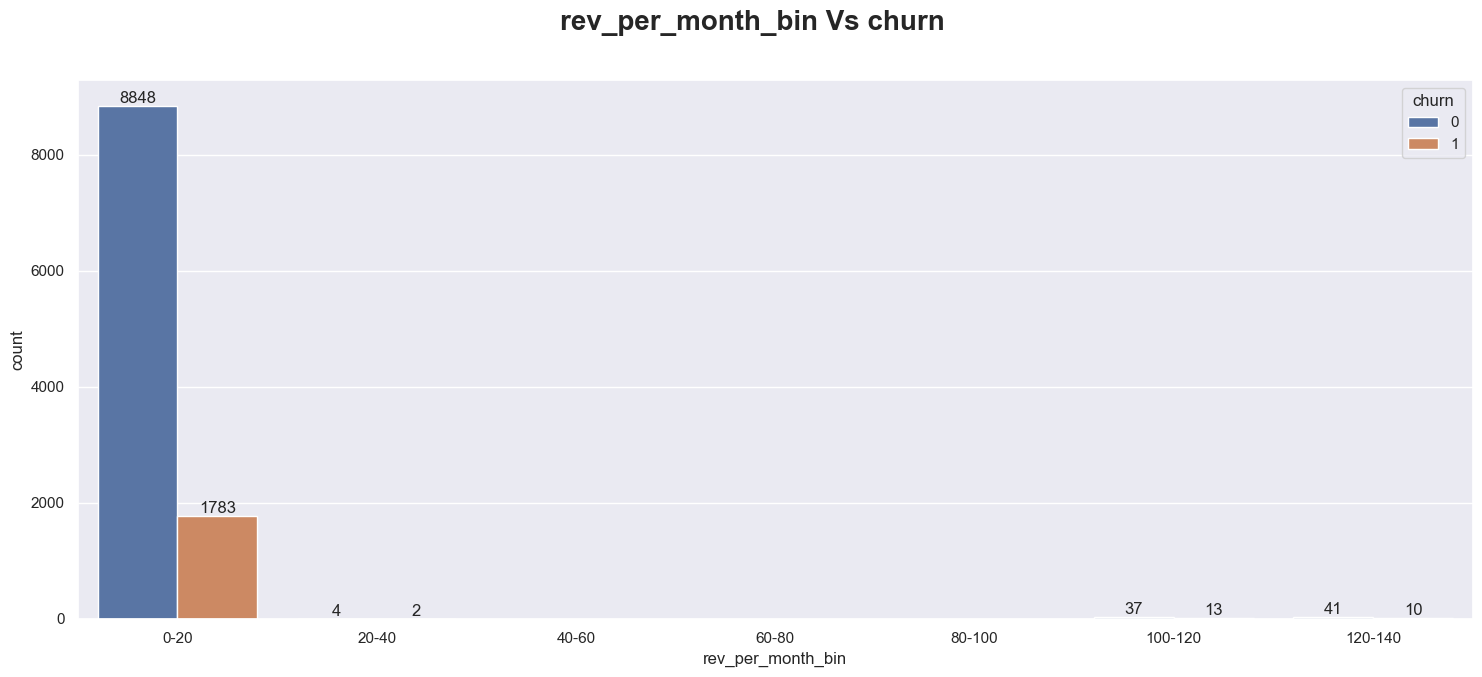

In [129]:
# Lets Check the day_since_cc_connect_bin Graphically 

plt.figure(figsize = (18,7))

w_s = sns.countplot(x = 'rev_per_month_bin',hue = 'churn' ,data = df)


for container in w_s.containers:
    w_s.bar_label(container)

plt.suptitle('rev_per_month_bin Vs churn',fontsize= 20, fontweight='bold')
plt.show()

**Churn%**

* 0-20    = 17% 

* 20-40   = 33%

* 40-60   = 0%

* 60-80   = 0%

* 80-100  = 0%

* 100-120 = 26%

* 120-140 = 20%

**Observations**

* Revenue per Month earned between 100-120 dollars has the 26% Churn rate which very high means we are losing money every months as customers are leaving the company.

### Chi square Test[rev_per_month_bin]

In [130]:
chi_data = pd.crosstab(index = df['rev_per_month_bin'],columns= df['churn'])
chi_data.head()

churn                 0     1
rev_per_month_bin            
0-20               8848  1783
20-40                 4     2
100-120              37    13
120-140              41    10

In [131]:
stat, p_value, dof,expected = chi2_contingency(chi_data)
print('Chi-Squared :',stat)
print('p-value :',p_value)

Chi-Squared : 4.476141434261185
p-value : 0.2144283152702996


In [132]:
# interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. Their is a relationship between churn and rev_per_month_bin.")
else:
    print("Fail to reject the null hypothesis. Their is no relationship between churn and rev_per_month_bin.")

Fail to reject the null hypothesis. Their is no relationship between churn and rev_per_month_bin.


### (13) complain_ly

1 = Complain, 0 = Not a Complain

In [133]:
df['complain_ly'].unique()

array([ 1.,  0., nan])

In [134]:
mode = df['complain_ly'].mode()
mode[0]

0.0

In [135]:
df['complain_ly'].fillna(mode[0],inplace = True)

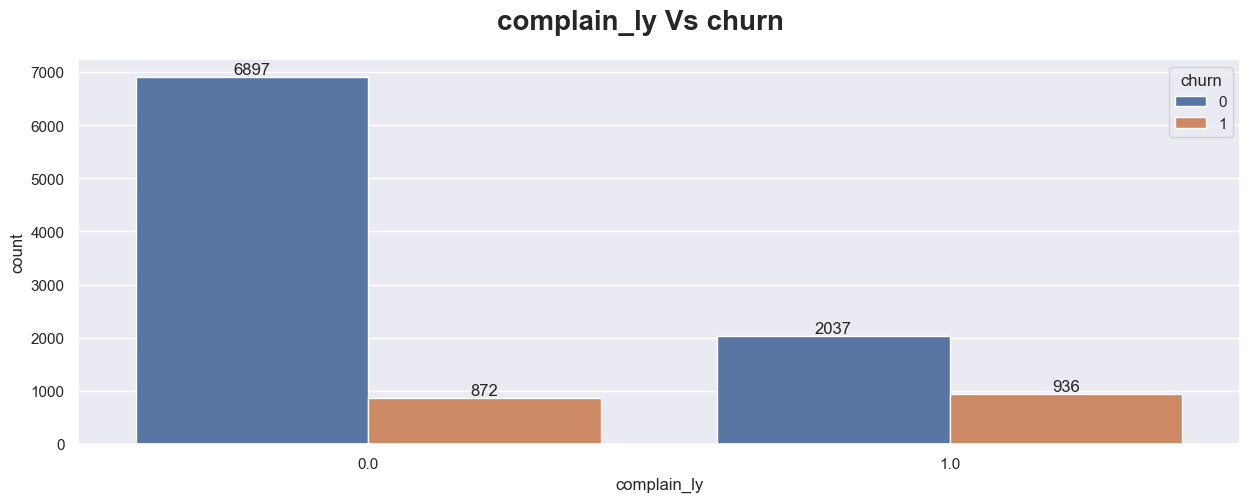

In [136]:
# Lets Check the complain_ly Graphically 

plt.figure(figsize = (15,5))

w_s = sns.countplot(x = 'complain_ly',hue = 'churn' ,data = df)


for container in w_s.containers:
    w_s.bar_label(container)

plt.suptitle('complain_ly Vs churn',fontsize= 20, fontweight='bold')
plt.show()

**Observation**

* We can clearly see here customers who complains a lot usually churn faster. i.e 31%

#### Creating Null and Alternate Hypothesis

**Null Hypothesis (H0)** = Their is no relationship between churn and complain_ly

**Alternate Hypothesis (H1)** =  Their is relationship between churn and complain_ly

### Chi square Test[complain_ly]

In [137]:
chi_data = pd.crosstab(index = df['complain_ly'],columns= df['churn'])
chi_data.head()

churn           0    1
complain_ly           
0.0          6897  872
1.0          2037  936

In [138]:
stat, p_value, dof,expected = chi2_contingency(chi_data)
print('Chi-Squared :',stat)
print('p-value :',p_value)

Chi-Squared : 628.9993089632559
p-value : 8.250167109736849e-139


In [139]:
# interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. Their is a relationship between churn and complain_ly.")
else:
    print("Fail to reject the null hypothesis. Their is no relationship between churn and complain_ly.")

Reject the null hypothesis. Their is a relationship between churn and complain_ly.


### (14) rev_growth_yoy

In [140]:
df['rev_growth_yoy'].unique()

array([11, 14, 23, 22, 16, 12, 13, 17, 18, 19, 15, 20, 24, 25, 21, 26,
       '$', 4, 27, 28], dtype=object)

In [141]:
df['rev_growth_yoy'].replace('$',np.nan,inplace = True)

In [142]:
mean = int(df['rev_growth_yoy'].mean())
mean

16

In [143]:
df['rev_growth_yoy'].fillna(mean,inplace = True)

#### Creating Null and Alternate Hypothesis

**Null Hypothesis (H0)** = Their is no relationship between churn and rev_growth_yoy

**Alternate Hypothesis (H1)** =  Their is relationship between churn and rev_growth_yoy

### T- Test [rev_growth_yoy]

In [144]:
# split the data into two groups based on "Churn" using 'Tenure' as Filter

churned = df[df["churn"] == 1]["rev_growth_yoy"]
not_churned = df[df["churn"] == 0]["rev_growth_yoy"]

In [145]:
# perform T-test
t_stat, p_value = stats.ttest_ind(churned, not_churned)
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -1.5315756870998471
P-value: 0.12565662898414937


In [146]:
# interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. Their is a relationship between churn and rev_growth_yoy.")
else:
    print("Fail to reject the null hypothesis. Their is no relationship between churn and rev_growth_yoy.")

Fail to reject the null hypothesis. Their is no relationship between churn and rev_growth_yoy.


### (15) coupon_used_for_payment

In [147]:
# Check Unique Values

df["coupon_used_for_payment"].unique()

array([1, 0, 4, 2, 9, 6, 11, 7, 12, 10, 5, 3, 13, 15, 8, '#', '$', 14,
       '*', 16], dtype=object)

**Observation :**


* "#", "$", " * " is the sign we need to corrected

* nan (empty cell) also needs to be filled

In [148]:
# Checking % counts of each values

df["coupon_used_for_payment"].value_counts() * 100 / len(df["coupon_used_for_payment"])

1     38.568237
2     23.552411
0     18.897784
3      6.367529
4      3.854031
5      2.569354
6      2.141128
7      1.694284
8      0.819214
10     0.316515
9      0.316515
11     0.279278
12     0.242041
13     0.186185
14     0.093093
15     0.037237
16     0.037237
#      0.009309
$      0.009309
*      0.009309
Name: coupon_used_for_payment, dtype: float64

**Observation :**

We can clearly see that "#", "$", " * " is only 0.008881. 

Thus we can replace "#", "$", " * " with the highest value i.e 1

In [149]:
# Imputing the values for # Tensure

df["coupon_used_for_payment"].replace("#",np.nan,inplace = True)
df["coupon_used_for_payment"].replace("$",np.nan,inplace = True)
df["coupon_used_for_payment"].replace("*",np.nan,inplace = True)

In [150]:
mode = df['coupon_used_for_payment'].mode()
mode[0]

1.0

In [151]:
# Filling Null Values

df['coupon_used_for_payment'].fillna(mode[0],inplace = True)

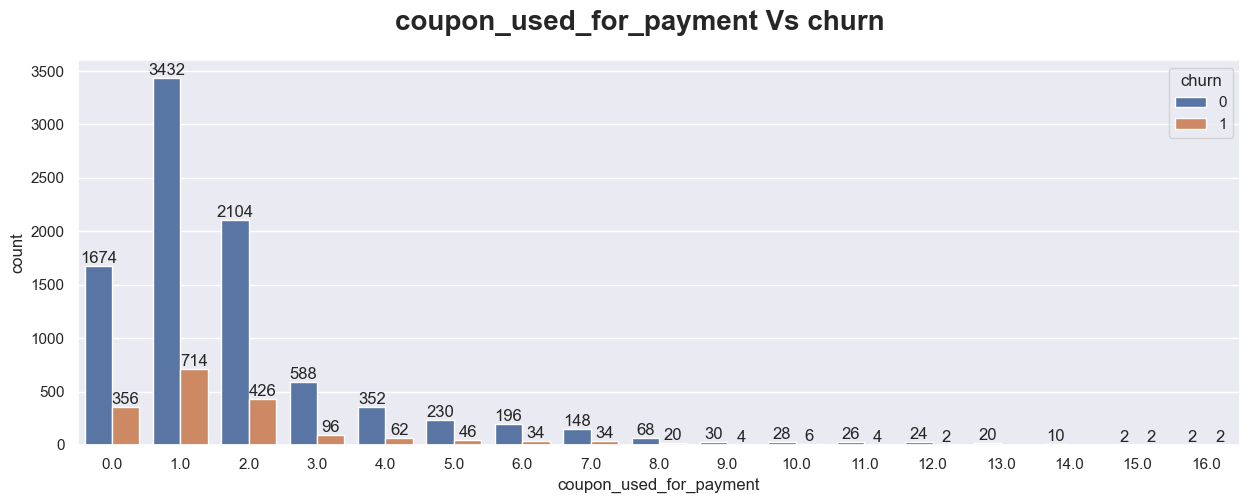

In [152]:
# Lets Check the coupon_used_for_payment Graphically 

plt.figure(figsize = (15,5))

w_s = sns.countplot(x = 'coupon_used_for_payment',hue = 'churn' ,data = df)


for container in w_s.containers:
    w_s.bar_label(container)

plt.suptitle('coupon_used_for_payment Vs churn',fontsize= 20, fontweight='bold')
plt.show()

**Observation**

* Customers using coupons once in 12 months for payments are churning followed by customers using coupons twice. 

#### Creating Null and Alternate Hypothesis

**Null Hypothesis (H0)** = Their is no relationship between churn and coupon_used_for_payment

**Alternate Hypothesis (H1)** =  Their is relationship between churn and coupon_used_for_payment

### T- Test [coupon_used_for_payment]

In [153]:
# split the data into two groups based on "Churn" using 'Tenure' as Filter

churned = df[df["churn"] == 1]["coupon_used_for_payment"]
not_churned = df[df["churn"] == 0]["coupon_used_for_payment"]

In [154]:
# perform T-test
t_stat, p_value = stats.ttest_ind(churned, not_churned)
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -1.5076389906889096
P-value: 0.13167636075418726


In [155]:
# interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. Their is a relationship between churn and coupon_used_for_payment.")
else:
    print("Fail to reject the null hypothesis. Their is no relationship between churn and coupon_used_for_payment.")

Fail to reject the null hypothesis. Their is no relationship between churn and coupon_used_for_payment.


In [156]:
# Creating Bins for coupon_used_for_payment

s1=((df.coupon_used_for_payment//4)*4).min()
s2=((df.coupon_used_for_payment//4)*4).max()

print(s1)
print(s2)

0.0
16.0


In [157]:
bins = np.arange(s1,s2+4,4)
labels = [f'{int(i)}-{int(j)}' for i, j in zip(bins[:-1], bins[1:])] 

df['coupon_used_for_payment_bin'] = pd.cut(df.coupon_used_for_payment, bins=bins, labels=labels, right=False)
df['coupon_used_for_payment_bin'].unique()

['0-4', '4-8', '8-12', '12-16', NaN]
Categories (4, object): ['0-4' < '4-8' < '8-12' < '12-16']

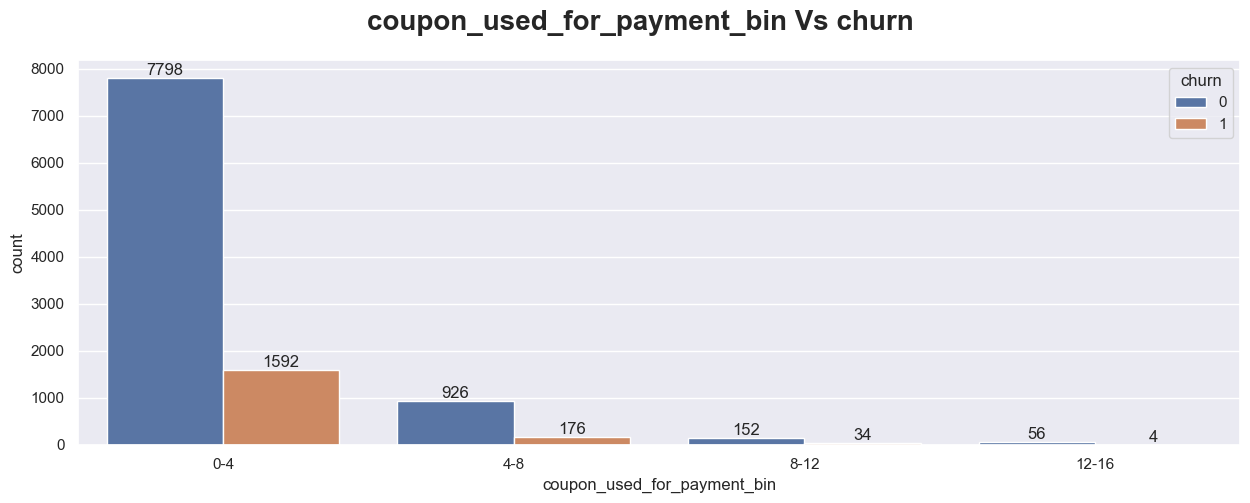

In [158]:
# Lets Check the complain_ly Graphically 

plt.figure(figsize = (15,5))

w_s = sns.countplot(x = 'coupon_used_for_payment_bin',hue = 'churn' ,data = df)


for container in w_s.containers:
    w_s.bar_label(container)

plt.suptitle('coupon_used_for_payment_bin Vs churn',fontsize= 20, fontweight='bold')
plt.show()

**Churn%**

* 0-4   = 17%

* 4-8   = 16%

* 8-12  = 18%

* 12-16 = 6%

**Observations**

* Customers using coupons for payments between 8-12 times have high churn rate. i.e. 18%

### Chi square Test[coupon_used_for_payment_bin]

In [159]:
chi_data = pd.crosstab(index = df['coupon_used_for_payment_bin'],columns= df['churn'])
chi_data.head()

churn                           0     1
coupon_used_for_payment_bin            
0-4                          7798  1592
4-8                           926   176
8-12                          152    34
12-16                          56     4

In [160]:
stat, p_value, dof,expected = chi2_contingency(chi_data)
print('Chi-Squared :',stat)
print('p-value :',p_value)

Chi-Squared : 5.39322797264507
p-value : 0.1451660823522676


In [161]:
# interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. Their is a relationship between churn and coupon_used_for_payment_bin.")
else:
    print("Fail to reject the null hypothesis. Their is no relationship between churn and coupon_used_for_payment_bin.")

Fail to reject the null hypothesis. Their is no relationship between churn and coupon_used_for_payment_bin.


### (16) Day_Since_CC_connect

In [162]:
# Check Unique Values

df["day_since_cc_connect"].unique()

array([5, 3, 7, 0, 2, 1, 8, 6, nan, 11, 4, 10, 9, 15, 12, 13, 17, 16, 14,
       30, '$', 46, 18, 31, 47], dtype=object)

**Observation :**


* "$" is the sign we need to corrected

* nan (empty cell) also needs to be filled

In [163]:
# Checking % counts of each values

df["day_since_cc_connect"].value_counts() * 100 / len(df["day_since_cc_connect"])

3     16.272575
2     13.963880
1     11.003538
8     10.528766
0      8.285236
7      8.201452
4      7.847701
9      5.492460
5      4.179855
10     3.025507
6      2.057345
11     1.610501
12     1.340532
13     1.014709
14     0.670266
15     0.325824
17     0.316515
18     0.242041
16     0.223422
30     0.018619
31     0.018619
47     0.018619
$      0.009309
46     0.009309
Name: day_since_cc_connect, dtype: float64

**Observation :**

We can clearly see that '$' is only 0.008881. 

Thus we can replace '$' with the mode value

In [164]:
# Imputing the values for # Tensure

df["day_since_cc_connect"].replace("$",np.nan,inplace = True)

In [165]:
mean = int(df['day_since_cc_connect'].mean())
mean

4

In [166]:
df['day_since_cc_connect'].fillna(mean,inplace =True)

#### Creating Null and Alternate Hypothesis

**Null Hypothesis (H0)** = Their is no relationship between churn and day_since_cc_connect

**Alternate Hypothesis (H1)** =  Their is relationship between churn and day_since_cc_connect

### T- Test [day_since_cc_connect]

In [167]:
# split the data into two groups based on "Churn" using 'Tenure' as Filter

churned = df[df["churn"] == 1]["day_since_cc_connect"]
not_churned = df[df["churn"] == 0]["day_since_cc_connect"]

In [168]:
# perform T-test
t_stat, p_value = stats.ttest_ind(churned, not_churned)
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -15.035610094808648
P-value: 1.4014267407718374e-50


In [169]:
# interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. Their is a relationship between churn and day_since_cc_connect.")
else:
    print("Fail to reject the null hypothesis. Their is no relationship between churn and day_since_cc_connect.")

Reject the null hypothesis. Their is a relationship between churn and day_since_cc_connect.


In [170]:
# Creating Bins for coupon_used_for_payment

s1=((df.day_since_cc_connect//4)*5).min()
s2=((df.day_since_cc_connect//4)*5).max()

print(s1)
print(s2)

0.0
55.0


In [171]:
bins = np.arange(s1,s2,5)
labels = [f'{int(i)}-{int(j)}' for i, j in zip(bins[:-1], bins[1:])] 

df['day_since_cc_connect_bin'] = pd.cut(df.day_since_cc_connect, bins=bins, labels=labels, right=False)
df['day_since_cc_connect_bin'].unique()

['5-10', '0-5', '10-15', '15-20', '30-35', '45-50']
Categories (10, object): ['0-5' < '5-10' < '10-15' < '15-20' ... '30-35' < '35-40' < '40-45' < '45-50']

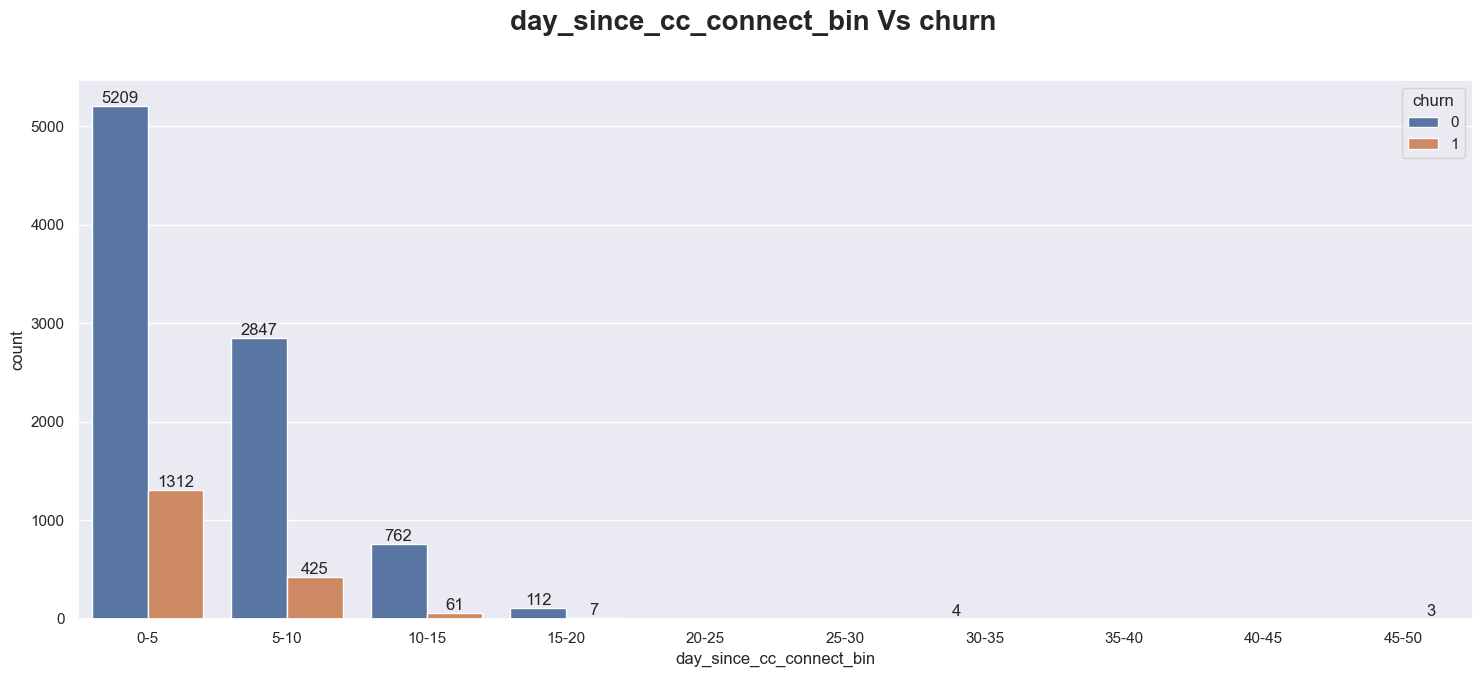

In [172]:
# Lets Check the day_since_cc_connect_bin Graphically 

plt.figure(figsize = (18,7))

w_s = sns.countplot(x = 'day_since_cc_connect_bin',hue = 'churn' ,data = df)


for container in w_s.containers:
    w_s.bar_label(container)

plt.suptitle('day_since_cc_connect_bin Vs churn',fontsize= 20, fontweight='bold')
plt.show()

**Churn%**

* 0-5   = 20%

* 5-10  = 13%

* 10-15 = 7%

* 20-25 = 5%

* 25-30 = 0

* 30-35 = 0

* 35-40 = 0

* 40-45 = 0

* 45-50 = 100%

**Observations**

* Number of days since no customers in the account has contacted the customer care between 45-50 days has highest churn rate i.e 100 % followed by 0-5 days means within 5 days 20% customers connected with customer care they start churning.

### Chi square Test[day_since_cc_connect_bin]

In [173]:
chi_data = pd.crosstab(index = df['day_since_cc_connect_bin'],columns= df['churn'])
chi_data.head()

churn                        0     1
day_since_cc_connect_bin            
0-5                       5209  1312
5-10                      2847   425
10-15                      762    61
15-20                      112     7
30-35                        4     0

In [174]:
stat, p_value, dof,expected = chi2_contingency(chi_data)
print('Chi-Squared :',stat)
print('p-value :',p_value)

Chi-Squared : 162.86855416218086
p-value : 2.421543345449905e-33


In [175]:
# interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. Their is a relationship between churn and day_since_cc_connect_bin.")
else:
    print("Fail to reject the null hypothesis. Their is no relationship between churn and day_since_cc_connect_bin.")

Reject the null hypothesis. Their is a relationship between churn and day_since_cc_connect_bin.


### (17) cashback 

In [176]:
# Check Unique Values

df["cashback"].unique()

array([159.93, nan, 134.07, ..., 227.36, 226.91, 191.42], dtype=object)

**Observation :**


* "$" is the sign we need to corrected (Checked in excel sheet using Filter Option)

* nan (empty cell) also needs to be filled

In [177]:
# Checking % counts of each values

df["cashback"].value_counts() 

155.62    10
149.36     9
154.10     8
153.04     8
148.77     8
          ..
155.84     1
224.61     1
167.10     1
222.78     1
191.42     1
Name: cashback, Length: 5598, dtype: int64

**Observation :**

We can replace '$' with the mean

In [178]:
df['cashback'].replace('$',np.nan,inplace = True)

In [179]:
mean = df['cashback'].mean()
mean

197.64206057065056

In [180]:
# Imputing the values for # Tensure

df["cashback"].replace("$",np.nan,inplace = True)

In [181]:
df['cashback'].fillna(mean,inplace = True)

In [182]:
# Coverting data into interger
df['cashback'] = df['cashback'].round()
df['cashback']

AccountID
20000    160.0
20002    198.0
20003    134.0
20004    130.0
20005    139.0
         ...  
31255    154.0
31256    227.0
31257    191.0
31258    180.0
31259    175.0
Name: cashback, Length: 10742, dtype: float64

#### Creating Null and Alternate Hypothesis

**Null Hypothesis (H0)** = Their is no relationship between churn and cashback

**Alternate Hypothesis (H1)** =  Their is relationship between churn and cashback

### T- Test [cashback]

In [183]:
# split the data into two groups based on "Churn" using 'Tenure' as Filter

churned = df[df["churn"] == 1]["cashback"]
not_churned = df[df["churn"] == 0]["cashback"]

In [184]:
# perform T-test
t_stat, p_value = stats.ttest_ind(churned, not_churned)
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -3.1260569033674166
P-value: 0.0017763986312288307


In [185]:
# interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. Their is a relationship between churn and cashback.")
else:
    print("Fail to reject the null hypothesis. Their is no relationship between churn and cashback.")

Reject the null hypothesis. Their is a relationship between churn and cashback.


**Create 2 new Features using cashback,revenue per month and tenure**

### (18) cashback_percen

* FORMULA = rev_per_month * 12/cashback

* Convert rev_per_month into a yearly revenue and check the cashback percentage and if it is more than 1 then customers are getting more discount and if less than 1 then they are not getting enough discount

In [186]:
df['cashback_percen'] = df['rev_per_month']*12/df['cashback']
df['cashback_percen']

AccountID
20000    0.675000
20002    0.363636
20003    0.716418
20004    0.276923
20005    0.172662
           ...   
31255    0.701299
31256    0.370044
31257    0.439791
31258    0.466667
31259    0.342857
Name: cashback_percen, Length: 10742, dtype: float64

In [187]:
df['cashback_percen'].value_counts()

0.363636    96
0.181818    94
0.242424    77
0.121212    70
0.480000    64
            ..
0.024781     1
0.564103     1
6.388060     1
1.333333     1
0.448133     1
Name: cashback_percen, Length: 1731, dtype: int64

In [188]:
# Converting cashback_percen into Low, Medium and High

df['cashback_percen'] = np.where(df.cashback_percen <=0.5,'low_discount',
                            np.where(df.cashback_percen <=1,'medium_discount','high_discount'))

#  cashback_percen <= 0.5 : Low discount
#  cashback_percen <=1 : medium discount
#  cashback_percen > 1 : high discount

In [189]:
df['cashback_percen'].value_counts()

low_discount       8337
medium_discount    2202
high_discount       203
Name: cashback_percen, dtype: int64

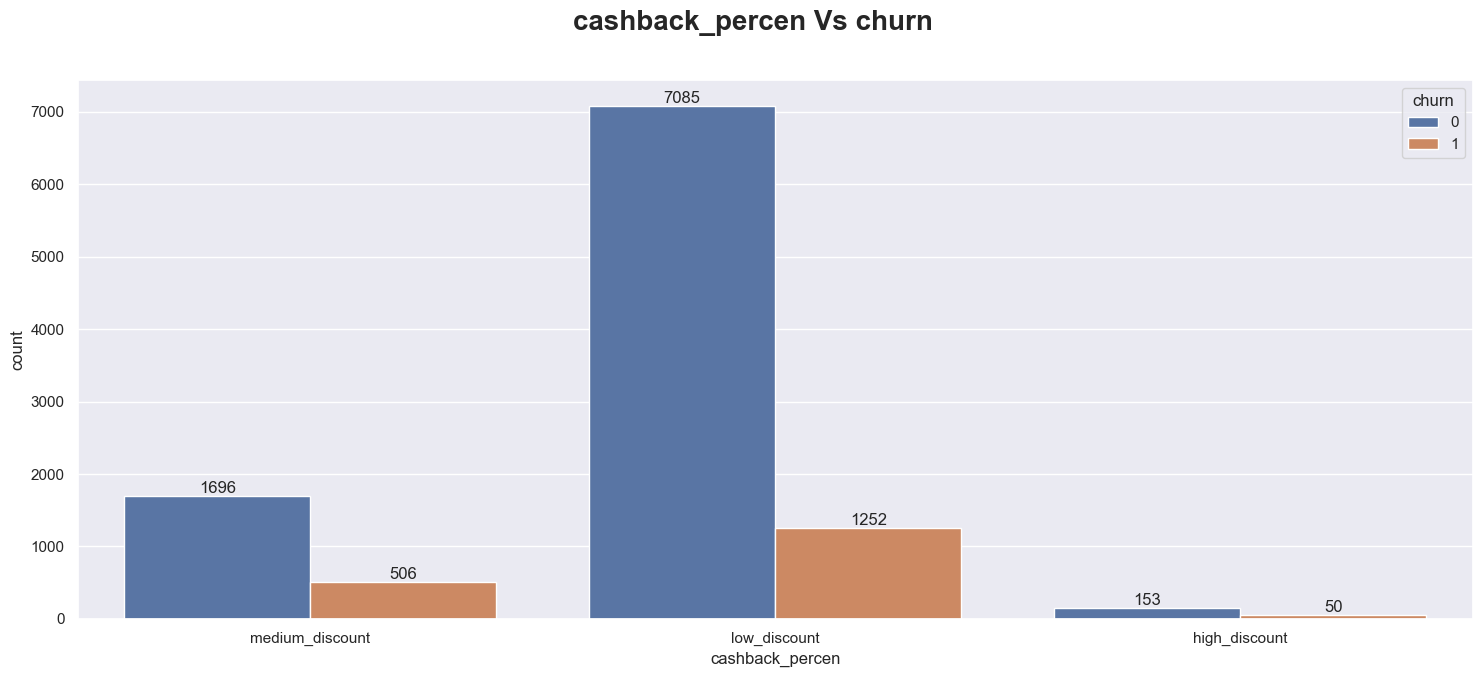

In [190]:
# Lets Check the cashback_percen Graphically 

plt.figure(figsize = (18,7))

w_s = sns.countplot(x = 'cashback_percen',hue = 'churn' ,data = df)


for container in w_s.containers:
    w_s.bar_label(container)

plt.suptitle('cashback_percen Vs churn',fontsize= 20, fontweight='bold')
plt.show()

**Churn%**

* Low Discount    = 15%

* Medium Discount = 23%

* High Discount   = 25%

**Observation**

* In Cashback Percentage, High Discount customers has 25% churn rate followed by medium discounts which is also a loss in revenue for the company.

### Chi square Test[cashback_percen]

In [191]:
chi_data = pd.crosstab(index = df['cashback_percen'],columns= df['churn'])
chi_data.head()

churn               0     1
cashback_percen            
high_discount     153    50
low_discount     7085  1252
medium_discount  1696   506

In [192]:
stat, p_value, dof,expected = chi2_contingency(chi_data)
print('Chi-Squared :',stat)
print('p-value :',p_value)

Chi-Squared : 87.87153254032418
p-value : 8.297345046520778e-20


In [193]:
# interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. Their is a relationship between churn and cashback_percen.")
else:
    print("Fail to reject the null hypothesis. Their is no relationship between churn and cashback_percen.")

Reject the null hypothesis. Their is a relationship between churn and cashback_percen.


### (19) Cashback_Benefits

FORMULA = Cashback/Tenure

* These are the benefits received as long as customer stay with the company.

* If the value the very high customer has received a lot of benefits from company and check % of churned customers 

In [194]:
df['cashback_benefits'] = df['cashback']/df['tenure']

In [195]:
mean = df['cashback_benefits'].mean()
mean

1805.1846250435574

In [196]:
df['cashback_benefits'].median()

20.333333333333332

In [197]:
mode = df['cashback_benefits'].mode()
mode[0]

19800.0

<AxesSubplot:xlabel='cashback_benefits'>

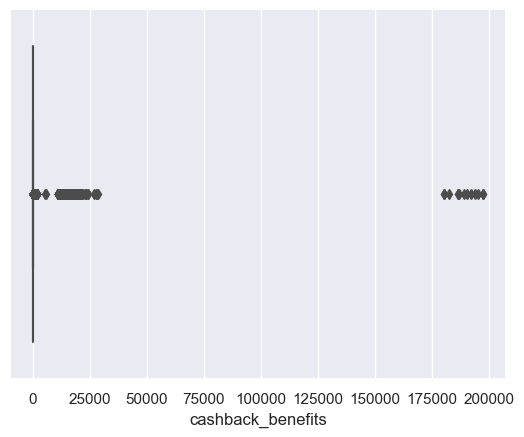

In [198]:
sns.boxplot(df['cashback_benefits'])

In [199]:
# Converting cashback_percen into Low, Medium and High

df['cashback_benefits'] = np.where(df.cashback_benefits <=mean,'low_benefit',
                            np.where(df.cashback_benefits <=mode[0],'medium_benefit','high_benefit'))

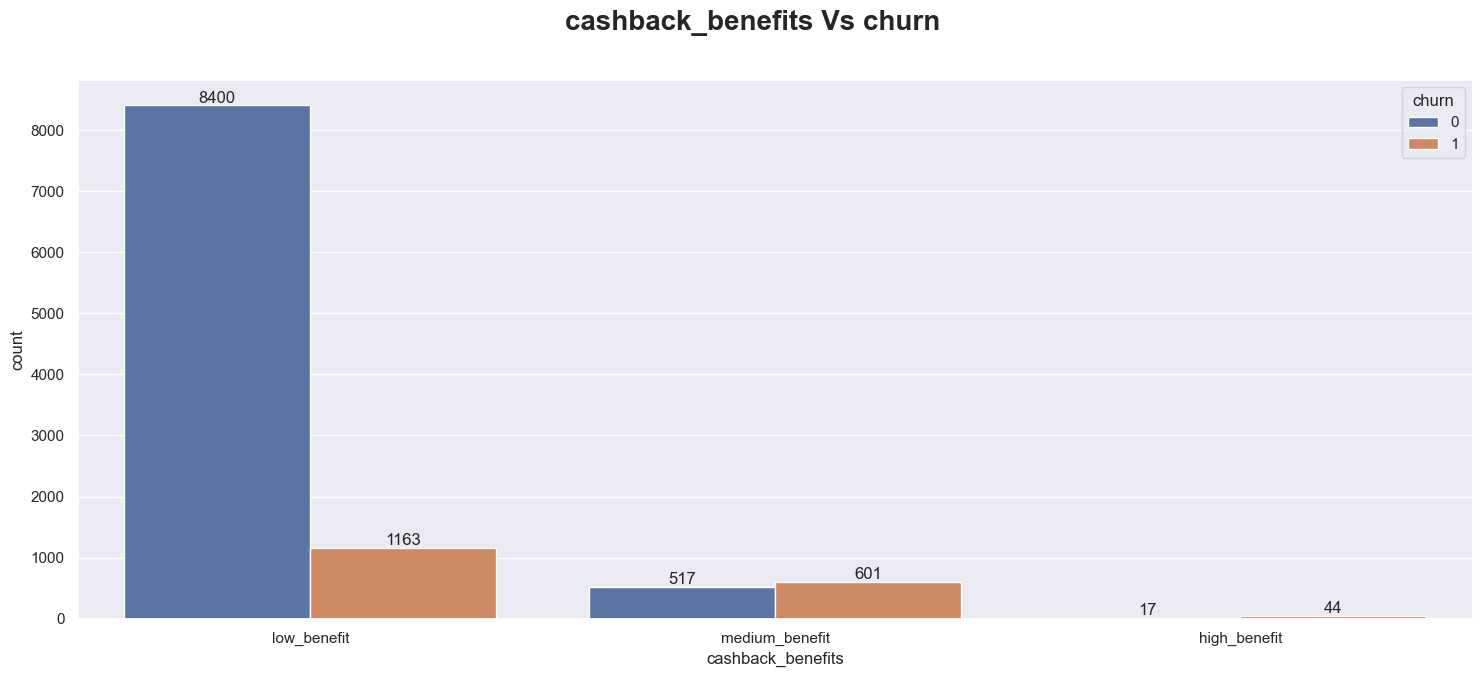

In [200]:
# Lets Check the cashback_benefits Graphically 

plt.figure(figsize = (18,7))

w_s = sns.countplot(x = 'cashback_benefits',hue = 'churn' ,data = df)


for container in w_s.containers:
    w_s.bar_label(container)

plt.suptitle('cashback_benefits Vs churn',fontsize= 20, fontweight='bold')
plt.show()

**Churn%**

* Low Benefit    = 12%

* Medium Benefit = 53%

* High Benefit   = 75%

**Observation**

* 75% of Customers Churning who are receiving High value Benefits due to cashbacks.

### Chi square Test[cashback_benefits]

In [201]:
chi_data = pd.crosstab(index = df['cashback_benefits'],columns= df['churn'])
chi_data.head()

churn                 0     1
cashback_benefits            
high_benefit         17    44
low_benefit        8400  1163
medium_benefit      517   601

In [202]:
stat, p_value, dof,expected = chi2_contingency(chi_data)
print('Chi-Squared :',stat)
print('p-value :',p_value)

Chi-Squared : 1371.2161959512312
p-value : 1.7546330322313125e-298


In [203]:
# interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. Their is a relationship between churn and cashback_benefits.")
else:
    print("Fail to reject the null hypothesis. Their is no relationship between churn and cashback_benefits.")

Reject the null hypothesis. Their is a relationship between churn and cashback_benefits.


### (20) Login_device

In [204]:
# Check Unique Values

df["login_device"].unique()

array(['Mobile', 'Computer', '&&&&', nan], dtype=object)

**Observation :**


* "&&&&" is the sign we need to corrected
* nan (empty cell) also needs to be filled 

In [205]:
# Checking % counts of each values

df["login_device"].value_counts() 

Mobile      7134
Computer    2848
&&&&         539
Name: login_device, dtype: int64

**Observation :**

We can replace '&&&&' with the mode

In [206]:
# Imputing the values for &&&&

df["login_device"].replace("&&&&",np.nan,inplace = True)

In [207]:
mode = df['login_device'].mode()
mode[0]

'Mobile'

In [208]:
df['login_device'].fillna(mode[0],inplace = True)

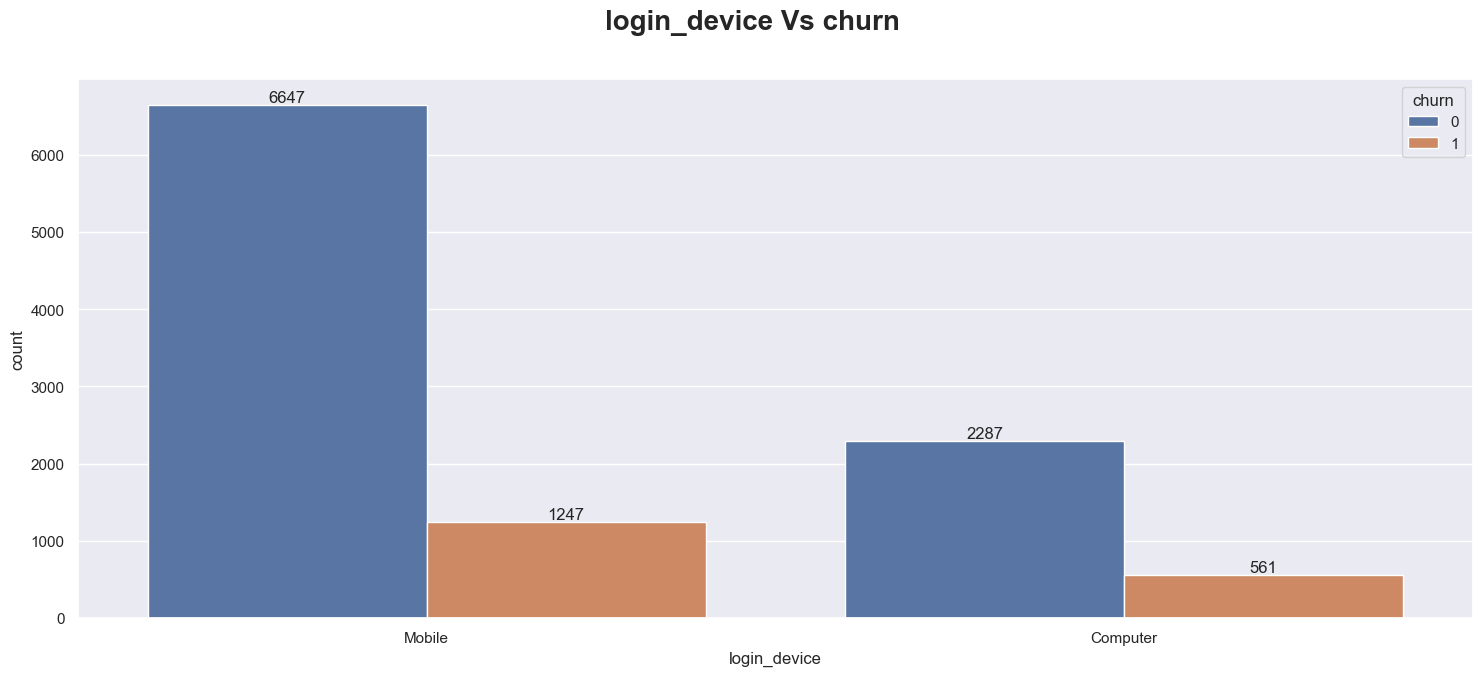

In [209]:
# Lets Check the login_device Graphically 

plt.figure(figsize = (18,7))

w_s = sns.countplot(x = 'login_device',hue = 'churn' ,data = df)


for container in w_s.containers:
    w_s.bar_label(container)

plt.suptitle('login_device Vs churn',fontsize= 20, fontweight='bold')
plt.show()

**Churn%**

* Mobile   = 16%

* Computer = 20%

**Observation**

* Customers using Computers availing companies servies are churning more. i.e. 20%

### Chi square Test[login_device]

In [210]:
chi_data = pd.crosstab(index = df['login_device'],columns= df['churn'])
chi_data.head()

churn            0     1
login_device            
Computer      2287   561
Mobile        6647  1247

In [211]:
stat, p_value, dof,expected = chi2_contingency(chi_data)
print('Chi-Squared :',stat)
print('p-value :',p_value)

Chi-Squared : 22.477330620895614
p-value : 2.126382981522558e-06


In [212]:
# interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. Their is a relationship between churn and login_device.")
else:
    print("Fail to reject the null hypothesis. Their is no relationship between churn and login_device.")

Reject the null hypothesis. Their is a relationship between churn and login_device.


### (21) Marital Status

In [213]:
df['marital_status'].unique()

array(['Single', 'Divorced', 'Married', nan], dtype=object)

In [214]:
## Lets combine Single and Divorced into 1

df['marital_status'].replace('Divorced','Single',inplace = True)

In [215]:
mode = df['marital_status'].mode()
mode[0]

'Married'

In [216]:
df['marital_status'].fillna(mode[0],inplace= True)

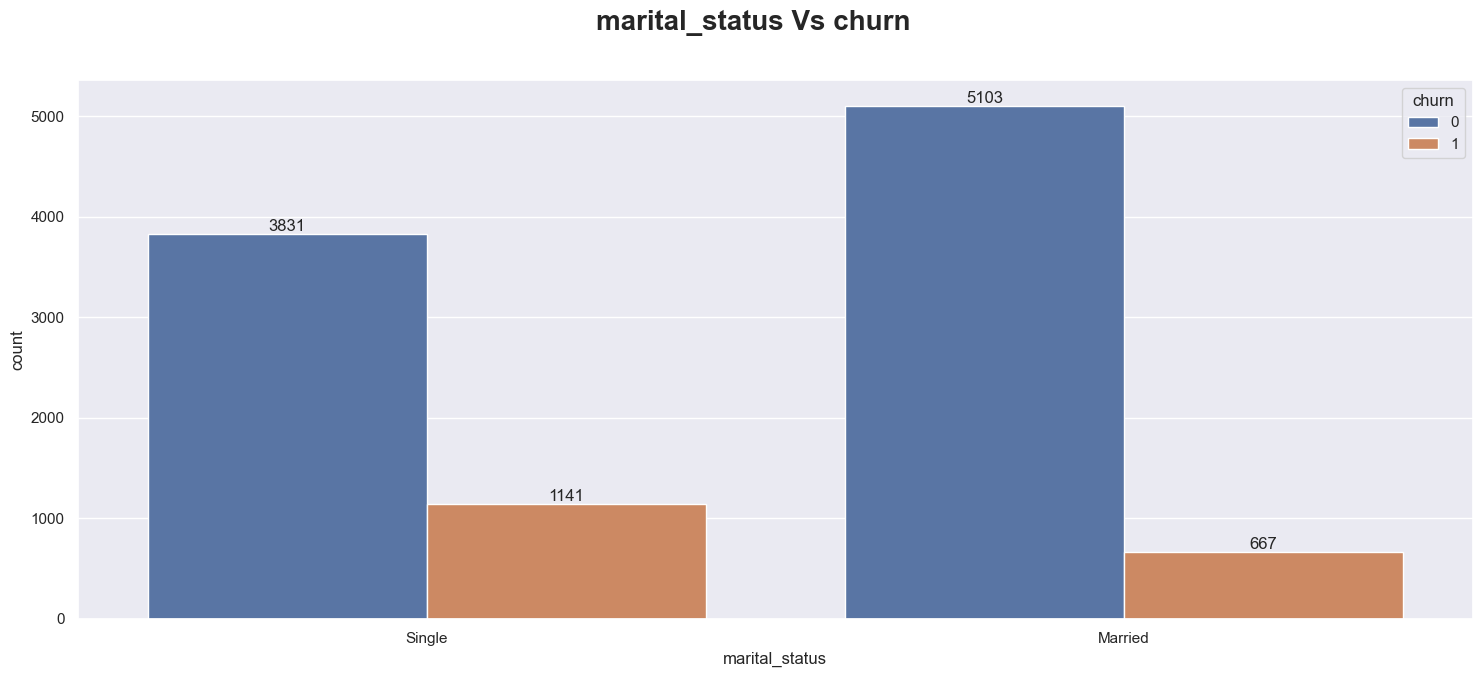

In [217]:
# Lets Check the marital_status Graphically 

plt.figure(figsize = (18,7))

w_s = sns.countplot(x = 'marital_status',hue = 'churn' ,data = df)


for container in w_s.containers:
    w_s.bar_label(container)

plt.suptitle('marital_status Vs churn',fontsize= 20, fontweight='bold')
plt.show()

**Churn%**

* Single = 23%

* Married = 12%

**Observation**

* we can clearly see that Single churn rate is Higher i.e 23% as compared to Married 

### Chi square Test[marital_status]

In [218]:
chi_data = pd.crosstab(index = df['marital_status'],columns= df['churn'])
chi_data.head()

churn              0     1
marital_status            
Married         5103   667
Single          3831  1141

In [219]:
stat, p_value, dof,expected = chi2_contingency(chi_data)
print('Chi-Squared :',stat)
print('p-value :',p_value)

Chi-Squared : 246.64281532539485
p-value : 1.4007339530642721e-55


In [220]:
# interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. Their is a relationship between churn and marital_status.")
else:
    print("Fail to reject the null hypothesis. Their is no relationship between churn and marital_status.")

Reject the null hypothesis. Their is a relationship between churn and marital_status.


### EDA Summary:

(1) **Churn (Target Variable):**

	* Churn = 1 and Not-Churned = 0
    
    * Average Overall Churn Rate: 16.838365896980463
	
    * Imbalance in dataset


(2) **Tenure:**

	* Both Anova Test andT Test says their is a relationship between churn and tenure.


(3) **Tenure_bin:**

	* We can see a very huge spike customer churning within the first 6 Months of Tenure which is a problem
	* Chi square Test says their is a relationship between churn and tenure_bin.


(4) **City_Tier:**

	* Highest Churn rate can be seen in TIer-3 City i.e. 22% after that Tier-2 city
	
    * Chi-Square Test says their is a relationship between churn and city_tier.


(5) **cc_contacted_ly:**

	* T- Test and Anova Test says Their is a relationship between churn and cc_contacted_ly.


(6) **cc_contacted_ly_bin:**

	* Churn rate i.e. 22% is High for the customers who have contacted between 30-40 times in the last 12 months
	
    * Chi square Test says Their is a relationship between churn and cc_contacted_ly_bin.


(7) **Noise Index:**

	* If the index is < 1 then customers is calling once or less than once a month if index > 1 then customers in calling every month . And if no. is more than 100 then customer reaches support quite frequently
	
    * High Churn rate can be seen in High Nosie i.e. 54%
	
    * Chi square Test says Their is a relationship between churn and noise_index.

(8) **Payment:**

	* We can clearly see that Cash on Delivery has the highest churn rate i.e. 25% followed by E-wallet.
	
    * Chi square Test says Their is a relationship between churn and payment.


(9) **Gender:**

	* Highest churn rate can be seen in Male. i.e. 17%
	
    * Chi square Test says Their is a relationship between churn and gender.


(10) **Service_Score:**
	
    * High churn rate i.e. 17% can seen for those customers whose satisfaction rating 3 on the services provided by the company
	
    * Chi square Test says Their is a relationship between churn and service_score.


(11) **Noise Index vs Service Score vs Churn:**

	* Medium Noise customers(calls the company for 2 or 3 times a month) who service score rating is more than 3 for the company are churning at high pace which shows these customers are Unhappy Customers


(12) **Account_user_count:**

	* Account User Count having 6 customers has the highest churn rate i.e. 34%
	
    * Chi square Test says Their is a relationship between churn and account_user_count.


(13) **account_segment:**

	* Regular Account Segment Customers has the highest Churn Rate i.e. 25%
	
    * Chi square Test says Their is a relationship between churn and account_segment.


(14) **CC_Agent_Score:**

	* Score HIGH means Good customer. Score LOW means Bad customer according to Agent.
	
    * Customers whose score rate given by Agents is 5 has high Churn rate i.e. 24% means a good quality/loyal customers are going out of the company.
	
    * Chi square Test says Their is a relationship between churn and cc_agent_score.

(15) **rev_per_month:**

	* T- Test says Their is a relationship between churn and rev_per_month.

(16) **rev_per_month_bin:**

	* Revenue per Month earned between 100-120 dollars has the 26% Churn rate which very high means we are losing money every months as customers are leaving the company.
	
    * Chi square Test says Their is no relationship between churn and rev_per_month_bin.


(17) **complain_ly:**

	* We can clearly see here customers who complains a lot usually churn faster. i.e 31%
	
    * Chi square Test says Their is a relationship between churn and complain_ly.


(18) **rev_growth_yoy:**

	* T- Test says Their is no relationship between churn and rev_growth_yoy.


(19) **coupon_used_for_payment:**

	* Customers using coupons once in 12 months for payments are churning followed by customers using coupons twice.
	
    * T- Test says Their is no relationship between churn and coupon_used_for_payment.


(20) **coupon_used_for_payment_bin:**

	* Customers using coupons for payments between 8-12 times have high churn rate. i.e. 18%
	
    * Chi square Test says Their is no relationship between churn and coupon_used_for_payment_bin.


(21) **Day_Since_CC_connect:**

	* T- Test says Their is a relationship between churn and day_since_cc_connect.


(22) **day_since_cc_connect_bin:**

	* Number of days since no customers in the account has contacted the customer care between 45-50 days has highest churn rate i.e 100 % followed by 0-5 days means within 5 days 20% customers connected with customer care they start churning.
	
    * Chi square Test says Their is a relationship between churn and day_since_cc_connect_bin.


(23) **cashback:**
	
    * T- Test says Their is a relationship between churn and cashback.

(24) **cashback_percen:**

	* Convert rev_per_month into a yearly revenue and check the cashback percentage and if it is more than 1 then customers are getting more discount and if less than 1 then they are not getting enough discount
	
    * In Cashback Percentage, High Discount customers has 25% churn rate followed by medium discounts which is also a loss in revenue for the company.
	
    * Chi square Test says Their is a relationship between churn and cashback_percen.


(25) **Cashback_Benefits:**

	* These are the benefits received as long as customer stay with the company.
	
    * If the value the very high customer has received a lot of benefits from company and check % of churned customers
	
    * Chi square Test says  Their is a relationship between churn and cashback_benefits.

(26) **Login_device:**

	* Customers using Computers availing companies servies are churning more. i.e. 20%
	
    * Chi square Test says Their is a relationship between churn and login_device.
    
(27) **Married Status:**

    * We can clearly see that Single churn rate is Higher i.e 23% as compared to Married
    * Chi square Test says Their is a relationship between churn and marital_status.


## Info (After Data cleaning)

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10742 entries, 20000 to 31259
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   churn                        10742 non-null  int64   
 1   tenure                       10742 non-null  float64 
 2   city_tier                    10742 non-null  float64 
 3   cc_contacted_ly              10742 non-null  float64 
 4   payment                      10742 non-null  object  
 5   gender                       10742 non-null  object  
 6   service_score                10742 non-null  float64 
 7   account_user_count           10742 non-null  float64 
 8   account_segment              10742 non-null  object  
 9   cc_agent_score               10742 non-null  float64 
 10  marital_status               10742 non-null  object  
 11  rev_per_month                10742 non-null  float64 
 12  complain_ly                  10742 non-null  float64 
 1

### Summary of the Dataset

In [222]:
df.describe().T.style.background_gradient(cmap = "coolwarm")

In [223]:
df.describe(include = 'object').T

count unique           top  freq
payment            10742      5    Debit Card  4490
gender             10742      2          Male  6500
account_segment    10742      3         Super  4745
marital_status     10742      2       Married  5770
login_device       10742      2        Mobile  7894
noise_index        10742      3  medium_noise  6640
cashback_percen    10742      3  low_discount  8337
cashback_benefits  10742      3   low_benefit  9563

**Observation**

* **Payments:** Debit card is highly used mode of payment

* **Gender:** Male has the highest frequency

* **account_segment :** Super has the higheset frequency

* **marital_status :** Married Customers has the highest count

* **login_device :** Modile is most preferred mode of login.

* **noise_index :** Medium Noise has the highest count

* **cashback_percen :** low discount for cashback has the highest count

* **cashback_benefits :** Low benefits has the highest count

In [224]:
df.describe(include = 'category').T

count unique    top   freq
tenure_bin                   10742     10    0-5   3565
cc_contacted_ly_bin          10741      6  10-20   5318
rev_per_month_bin            10738      4   0-20  10631
coupon_used_for_payment_bin  10738      4    0-4   9390
day_since_cc_connect_bin     10742      6    0-5   6521

In [225]:
duplicates = df.duplicated()
print('Number of duplicate rows = %d' % (duplicates.sum()))

Number of duplicate rows = 58


In [226]:
# dropping duplicate values
df.drop_duplicates(keep=False, inplace=True)

## Sweetviz Profiling (Automated EDA)

We are using Sweetviz profiling in order to do automated EDA so get some ideas and also it will help to check if we have properly cleaned the data or not.

In [227]:
# pip install sweetviz

In [228]:
# Importing lib

import sweetviz as sv

In [229]:
# Here we are creating a report and comparing our dataframe with our Target Variable

report = sv.analyze(df, target_feat ='churn')

                                             |                                             | [  0%]   00:00 ->…

In [230]:
# Below helps in Showing the Report in the jypiter notebook

# report.show_notebook(layout='widescreen')

In [231]:
# Report shown in new tab:

report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Univariate Analysis, Bivariate Analysis and Multivariate Analysis

### Univariate Analysis

### Numerical Variables (Univariate Analysis) :

In [232]:
# Fetching Numerical Variables col
num_names = list(df.select_dtypes(['float64','int64']).columns)
num_names

['churn',
 'tenure',
 'city_tier',
 'cc_contacted_ly',
 'service_score',
 'account_user_count',
 'cc_agent_score',
 'rev_per_month',
 'complain_ly',
 'rev_growth_yoy',
 'coupon_used_for_payment',
 'day_since_cc_connect',
 'cashback']

In [233]:
# Fetching only Numerical Columns

num_df = df[['churn',
 'tenure',
 'city_tier',
 'cc_contacted_ly',
 'service_score',
 'account_user_count',
 'cc_agent_score',
 'rev_per_month',
 'complain_ly',
 'rev_growth_yoy',
 'coupon_used_for_payment',
 'day_since_cc_connect',
 'cashback']]
num_df.head()

churn  tenure  city_tier  cc_contacted_ly  service_score  \
AccountID                                                             
20000          1    4.00        3.0              6.0            3.0   
20002          1    0.01        1.0             30.0            2.0   
20004          1    0.01        1.0             12.0            2.0   
20005          1    0.01        1.0             22.0            3.0   
20006          1    2.00        3.0             11.0            2.0   

           account_user_count  cc_agent_score  rev_per_month  complain_ly  \
AccountID                                                                   
20000                     3.0             2.0            9.0          1.0   
20002                     4.0             3.0            6.0          1.0   
20004                     3.0             5.0            3.0          0.0   
20005                     4.0             5.0            2.0          1.0   
20006                     3.0             2.0            4.0          0.0   

           rev_growth_yoy  coupon_used_for_payment  day_since_cc_connect  \
AccountID                                                                  
20000                11.0                      1.0                   5.0   
20002                14.0                      0.0                   3.0   
20004                11.0                      1.0                   3.0   
20005                22.0                      4.0                   7.0   
20006                14.0                      0.0                   0.0   

           cashback  
AccountID            
20000         160.0  
20002         198.0  
20004         130.0  
20005         139.0  
20006         121.0

In [234]:
# Creating a User Defined Function for Univariate Ananlysis
def univaritateananlysis(column, nbins):
    # Print descriptive statistics of the column
    print('Description of ' + column)
    print('...............................................................')
    print(num_df[column].describe(),end=' ')
    print(' ')
    
    # Plot histogram of the data
    plt.figure()
    print('Description of ' + column)
    print('...............................................................')
    sns.distplot(num_df[column],bins=nbins);
    plt.show()
    
    # Plot boxplot of the data
    plt.figure()
    print('Boxplot of ' + column)
    print('...............................................................')
    sns.boxplot(num_df[column])
    plt.show()


In [235]:
list_num_columns = list(num_df.columns.values)

Description of churn
...............................................................
count    10626.000000
mean         0.168078
std          0.373953
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: churn, dtype: float64  
Description of churn
...............................................................


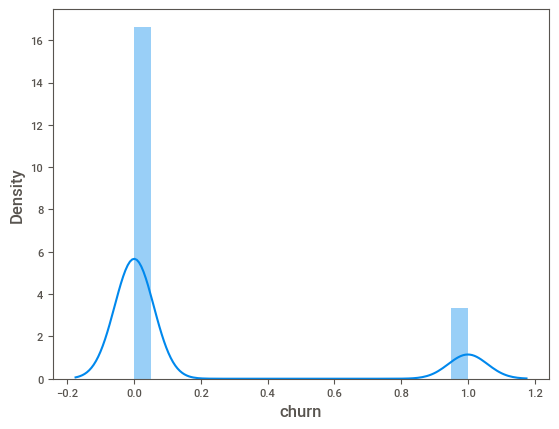

Boxplot of churn
...............................................................


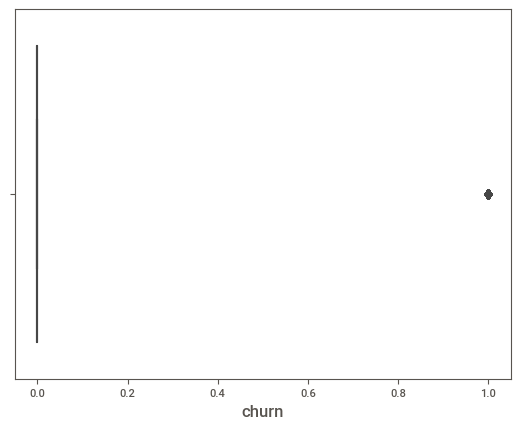

Description of tenure
...............................................................
count    10626.000000
mean        11.095280
std         12.984033
min          0.010000
25%          2.000000
50%          9.000000
75%         16.000000
max         99.000000
Name: tenure, dtype: float64  
Description of tenure
...............................................................


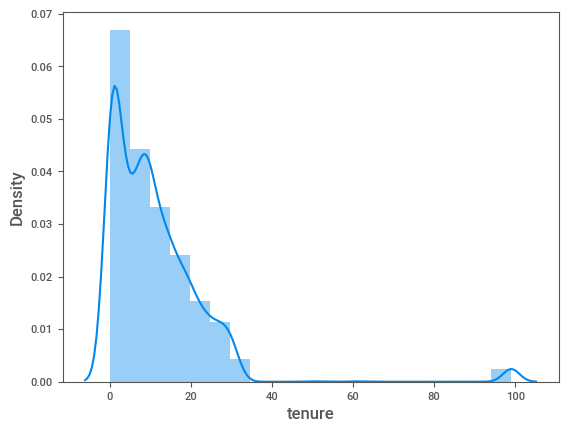

Boxplot of tenure
...............................................................


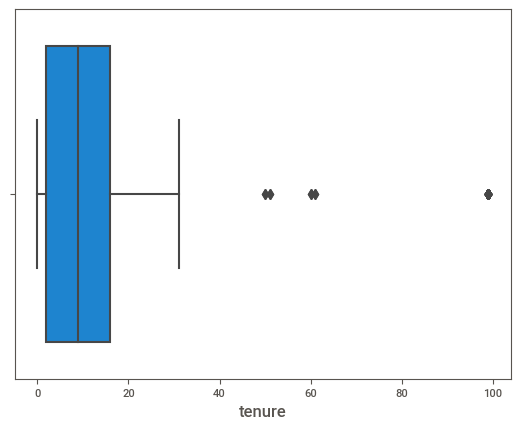

Description of city_tier
...............................................................
count    10626.000000
mean         1.648221
std          0.914256
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max          3.000000
Name: city_tier, dtype: float64  
Description of city_tier
...............................................................


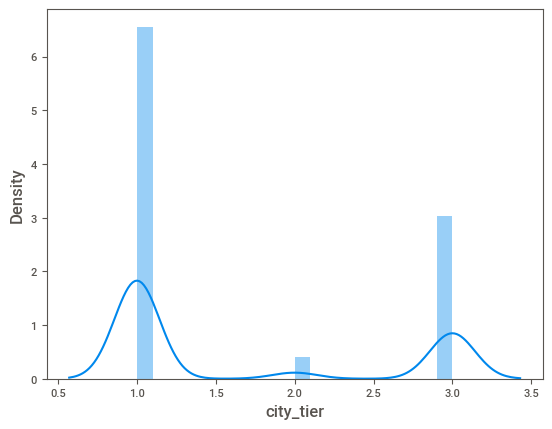

Boxplot of city_tier
...............................................................


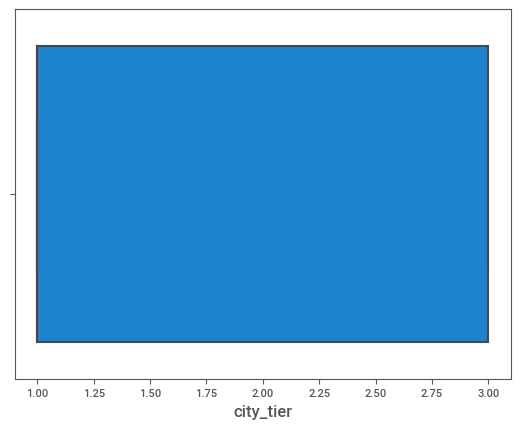

Description of cc_contacted_ly
...............................................................
count    10626.000000
mean        17.923301
std          8.861010
min          4.000000
25%         11.000000
50%         16.000000
75%         23.000000
max        132.000000
Name: cc_contacted_ly, dtype: float64  
Description of cc_contacted_ly
...............................................................


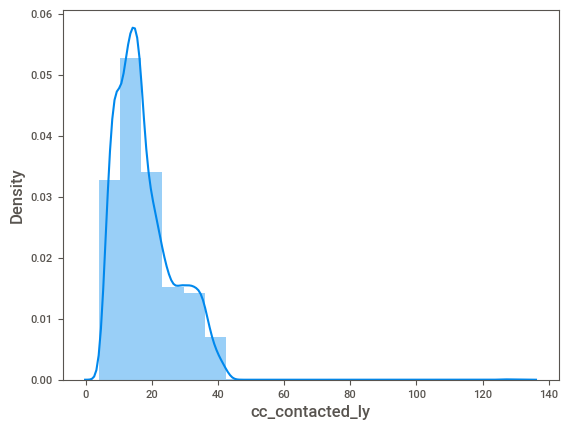

Boxplot of cc_contacted_ly
...............................................................


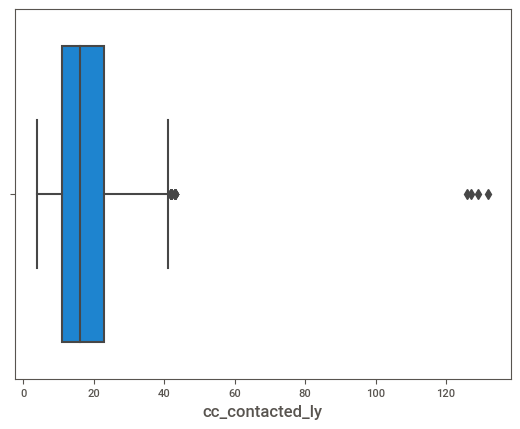

Description of service_score
...............................................................
count    10626.000000
mean         2.902692
std          0.719698
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: service_score, dtype: float64  
Description of service_score
...............................................................


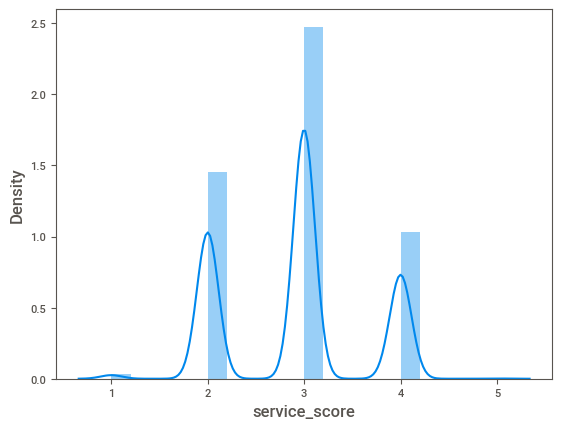

Boxplot of service_score
...............................................................


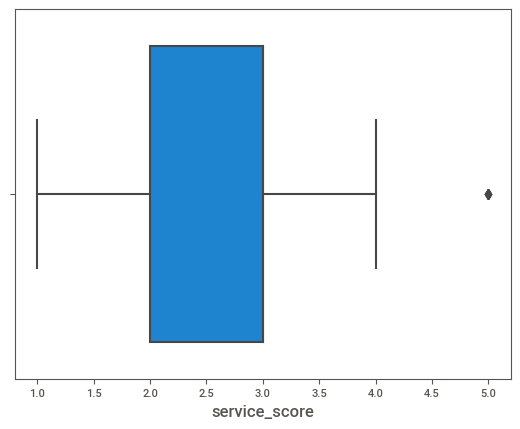

Description of account_user_count
...............................................................
count    10626.000000
mean         3.705063
std          1.007346
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          6.000000
Name: account_user_count, dtype: float64  
Description of account_user_count
...............................................................


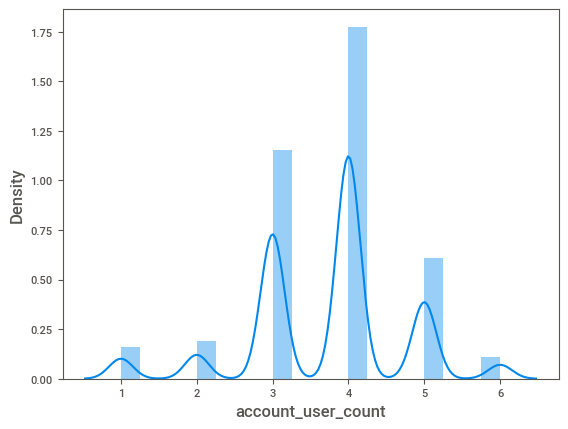

Boxplot of account_user_count
...............................................................


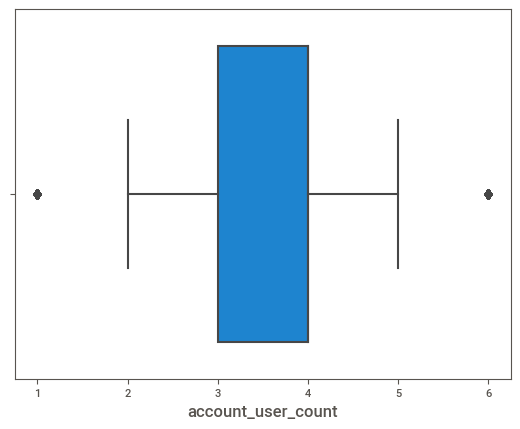

Description of cc_agent_score
...............................................................
count    10626.000000
mean         3.042255
std          1.372950
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: cc_agent_score, dtype: float64  
Description of cc_agent_score
...............................................................


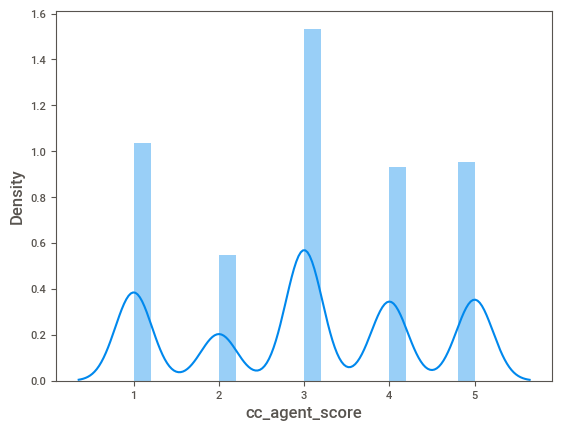

Boxplot of cc_agent_score
...............................................................


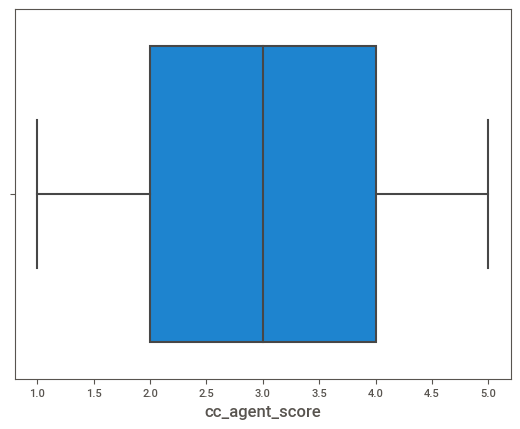

Description of rev_per_month
...............................................................
count    10626.000000
mean         6.447958
std         11.794203
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max        140.000000
Name: rev_per_month, dtype: float64  
Description of rev_per_month
...............................................................


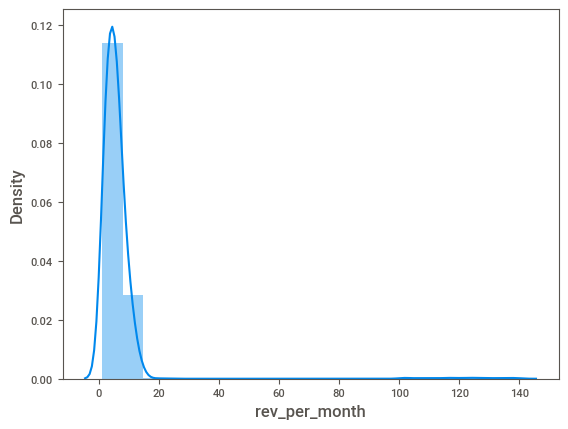

Boxplot of rev_per_month
...............................................................


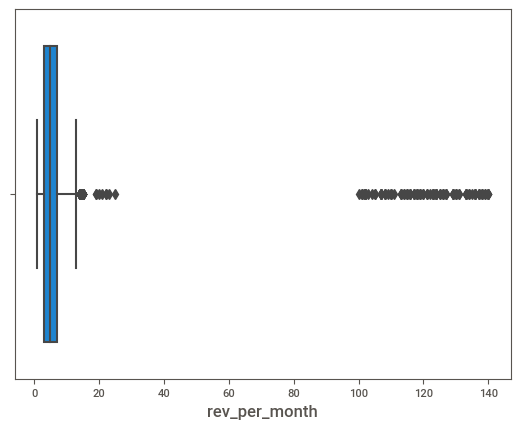

Description of complain_ly
...............................................................
count    10626.000000
mean         0.276209
std          0.447143
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: complain_ly, dtype: float64  
Description of complain_ly
...............................................................


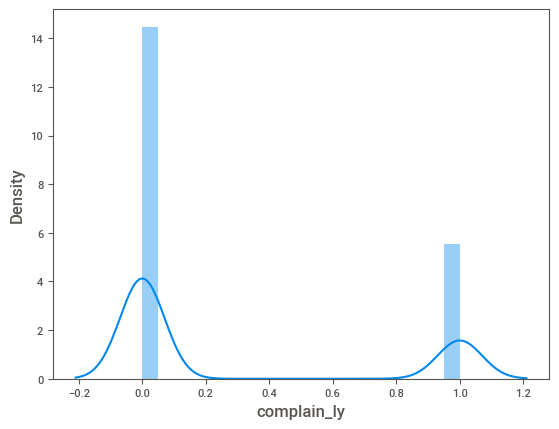

Boxplot of complain_ly
...............................................................


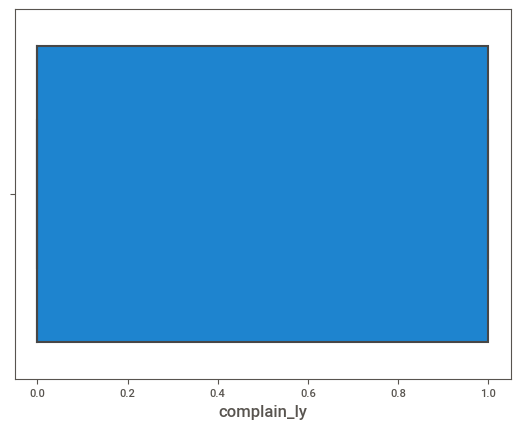

Description of rev_growth_yoy
...............................................................
count    10626.000000
mean        16.226143
std          3.763297
min          4.000000
25%         13.000000
50%         15.000000
75%         19.000000
max         28.000000
Name: rev_growth_yoy, dtype: float64  
Description of rev_growth_yoy
...............................................................


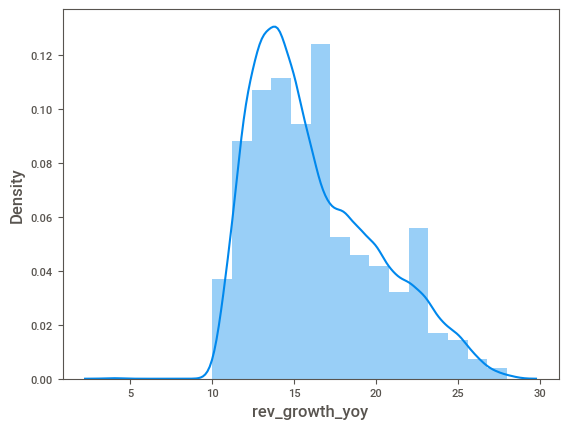

Boxplot of rev_growth_yoy
...............................................................


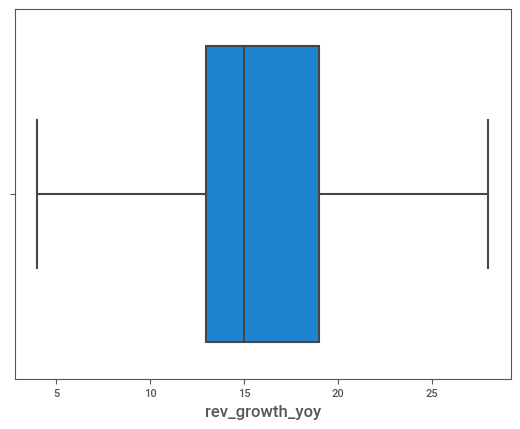

Description of coupon_used_for_payment
...............................................................
count    10626.000000
mean         1.819499
std          1.991885
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         16.000000
Name: coupon_used_for_payment, dtype: float64  
Description of coupon_used_for_payment
...............................................................


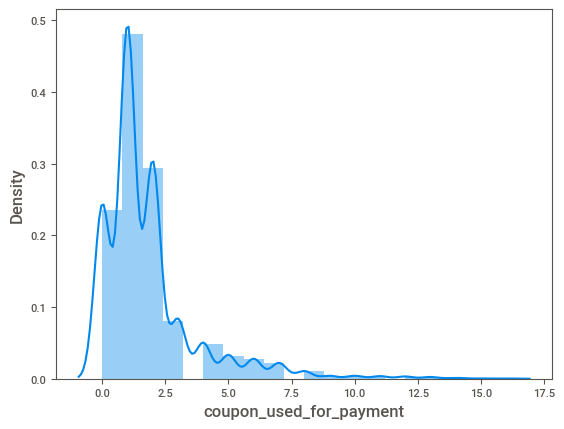

Boxplot of coupon_used_for_payment
...............................................................


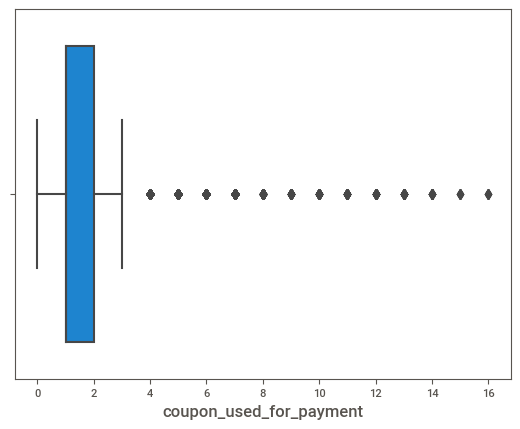

Description of day_since_cc_connect
...............................................................
count    10626.000000
mean         4.652644
std          3.649347
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         47.000000
Name: day_since_cc_connect, dtype: float64  
Description of day_since_cc_connect
...............................................................


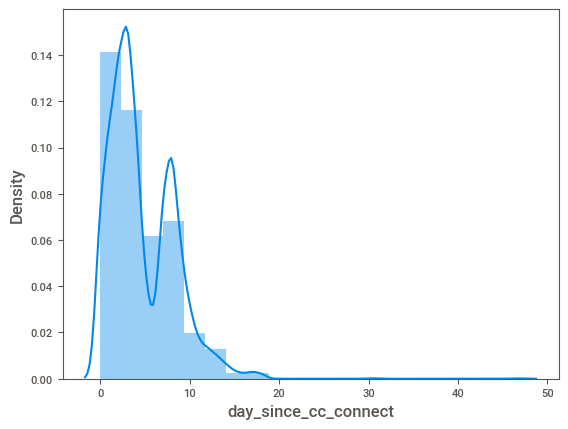

Boxplot of day_since_cc_connect
...............................................................


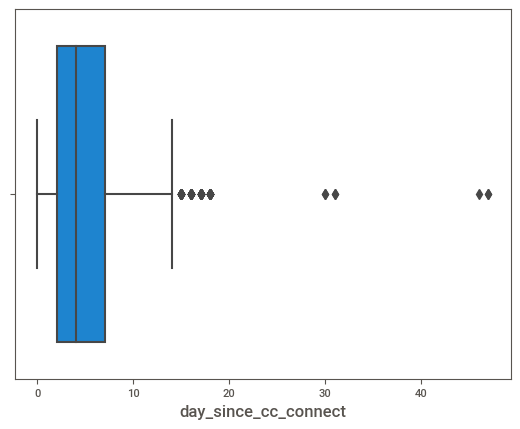

Description of cashback
...............................................................
count    10626.000000
mean       197.965086
std        179.552818
min          0.000000
25%        148.000000
50%        168.000000
75%        199.000000
max       1997.000000
Name: cashback, dtype: float64  
Description of cashback
...............................................................


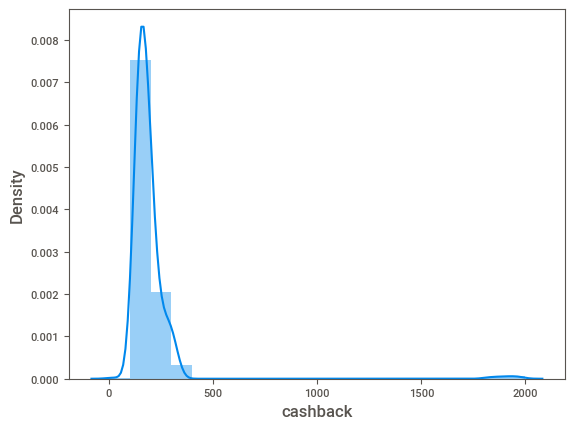

Boxplot of cashback
...............................................................


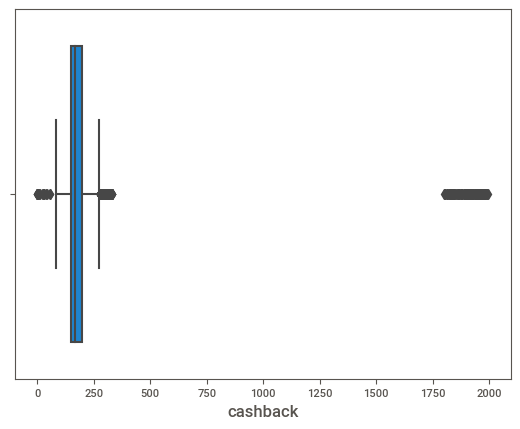

In [236]:
for x in list_num_columns:
    univaritateananlysis(x,20)


**Observation :**

(1) **Churn(Target Variable) :**

    * Displot shows Multi-mode values i.e. 0 & 1
    * Density of 0 more compared to 1 which show an imbalance in of data in Target Variable 
    * Boxplot shows that their are Outliers in the data
    
(2) **Tenure :**

    * From the Displot we can say that most of distribution of the data is between tenure of 0-35 Months
    * Its is right skwed
    * Boxplot shows that their are Outliers in the data

(3) **City_Tier :**
    
    * Displot shows that tier 1 City has the highest density
    * No Outliers in the data
    
(4) **CC_Contacted_LY :**

    * Displot shows highest density if data that between 0 and 40 where most no. of times the customers of the account has contacted customer care in the last 12 months
    * Boxplot shows that their are Outliers in the data

(5) **Service_Score :**

    * The Highest density of service score is 3 
    * Boxplot shows that their are Outliers in the data

(6) **Account_user_count :**

    * The highest density of Number of customers tagged with this account is 4
    * Boxplot shows that their are Outliers in the data

(7) **CC_Agent_Score :**

    * The Higest density of Satisfaction score given by customers of the account on customer care service Agent is 3
    * No Outliers in the data

(8) **rev_per_month :**

    * The Higest density of Monthly average revenue generated by account in last 12 months is between 0-18
    * Boxplot shows that their are Outliers in the data

(9) **Complain_ly :**

    * The Higest density of complaints has been raised by account in last 12 months is 0
    * Boxplot shows that their are No Outliers in the data

(10) **rev_growth_yoy :**

    * The Higest density of revenue growth percentage of the account is between 10-27
    * Boxplot shows that their are No Outliers in the data

(11) **coupon_used_for_payment :**

    * The Higest density of times customers have used coupons to do the payment in last 12 months is between 0-3
    * Boxplot shows that their are Outliers in the data

(12) **Day_Since_CC_connect :**

    * The Higest density of Number of days since no customers in the account has contacted the customer care 3 and 8 (Multi-mode values)
    * Boxplot shows that their are Outliers in the data

(13) **cashback :**

    * The Higest density of Monthly average cashback generated by account in last 12 months is between 100-400
    * Boxplot shows that their are Outliers in the data

In [237]:
df.skew() 

churn                      1.775538
tenure                     3.936469
city_tier                  0.751053
cc_contacted_ly            1.456810
service_score              0.041002
account_user_count        -0.438689
cc_agent_score            -0.115547
rev_per_month              9.204672
complain_ly                1.001170
rev_growth_yoy             0.749643
coupon_used_for_payment    2.516053
day_since_cc_connect       1.325161
cashback                   8.743164
dtype: float64

**Observations**

* account_user_count & cc_agent_score are both Negatively Skewd.

* rev_per_month and cashback has a very high Positive Skewness.

### Catagorical Variables (Univariate Analysis) :

In [238]:
cat_names = list(df.select_dtypes(['object','category']).columns)
cat_names

['payment',
 'gender',
 'account_segment',
 'marital_status',
 'login_device',
 'tenure_bin',
 'cc_contacted_ly_bin',
 'noise_index',
 'rev_per_month_bin',
 'coupon_used_for_payment_bin',
 'day_since_cc_connect_bin',
 'cashback_percen',
 'cashback_benefits']

#### Payment

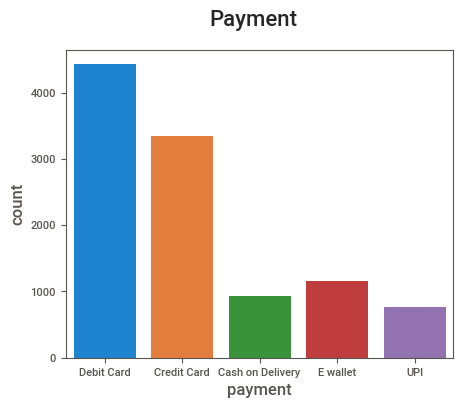

In [239]:
plt.figure(figsize =(5,4))
sns.countplot(df['payment'])
plt.suptitle('Payment',fontsize= 16, fontweight='bold')
plt.show()

**Observation :**

* Debit card has the highest count.
* Debit card is the most prefered payment method by the customers

##### gender

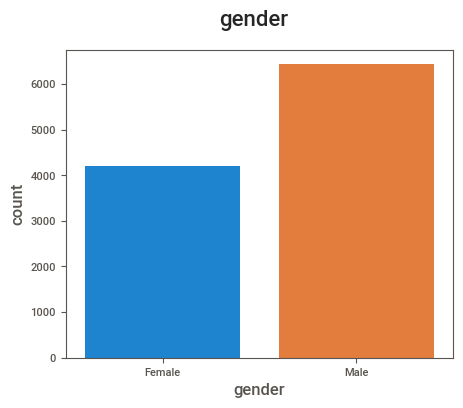

In [240]:
plt.figure(figsize =(5,4))
sns.countplot(df['gender'])
plt.suptitle('gender',fontsize= 16, fontweight='bold')
plt.show()

**Observation**

* Male has the highest count.

#### account_segment

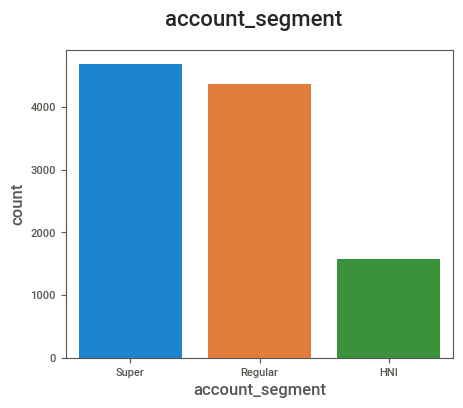

In [241]:
plt.figure(figsize =(5,4))
sns.countplot(df['account_segment'])
plt.suptitle('account_segment',fontsize= 16, fontweight='bold')
plt.show()

**Observation**

* Super has the highest count

#### marital_status

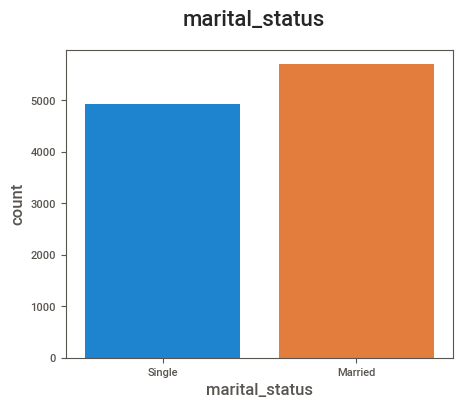

In [242]:
plt.figure(figsize =(5,4))
sns.countplot(df['marital_status'])
plt.suptitle('marital_status',fontsize= 16, fontweight='bold')
plt.show()

**Observation**

* Married Customers has the highest count

#### login_device


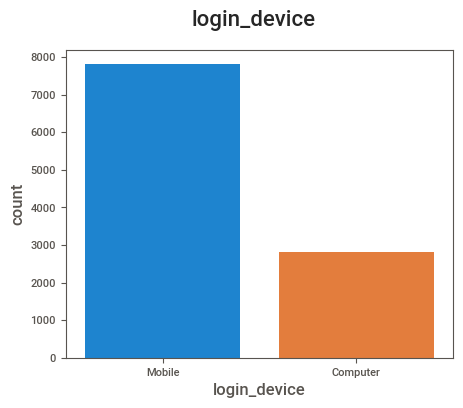

In [243]:
plt.figure(figsize =(5,4))
sns.countplot(df['login_device'])
plt.suptitle('login_device',fontsize= 16, fontweight='bold')
plt.show()

**Observation**

* Mobile is the most preferred device

#### tenure_bin


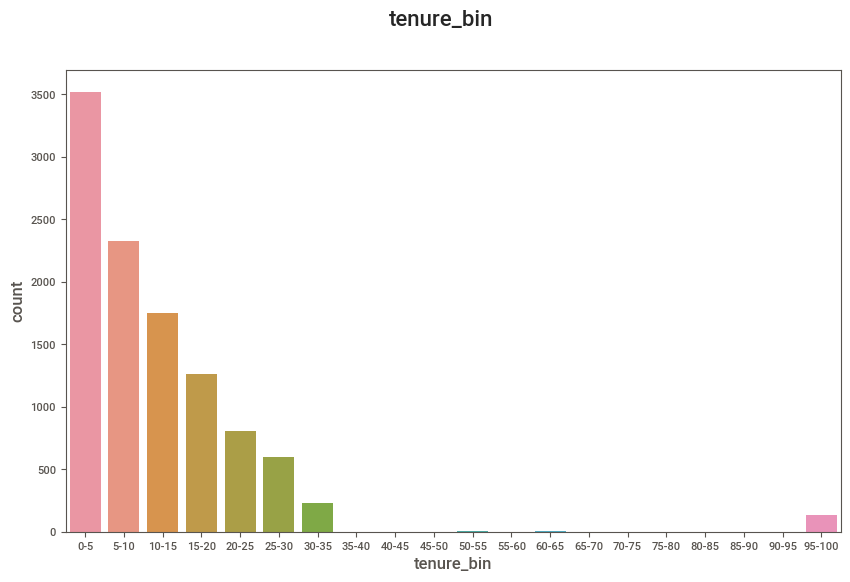

In [244]:
plt.figure(figsize =(10,6))
sns.countplot(df['tenure_bin'])
plt.suptitle('tenure_bin',fontsize= 16, fontweight='bold')
plt.show()

**Observation**

* 0-5 Months has the highest frequency

#### cc_contacted_ly_bin


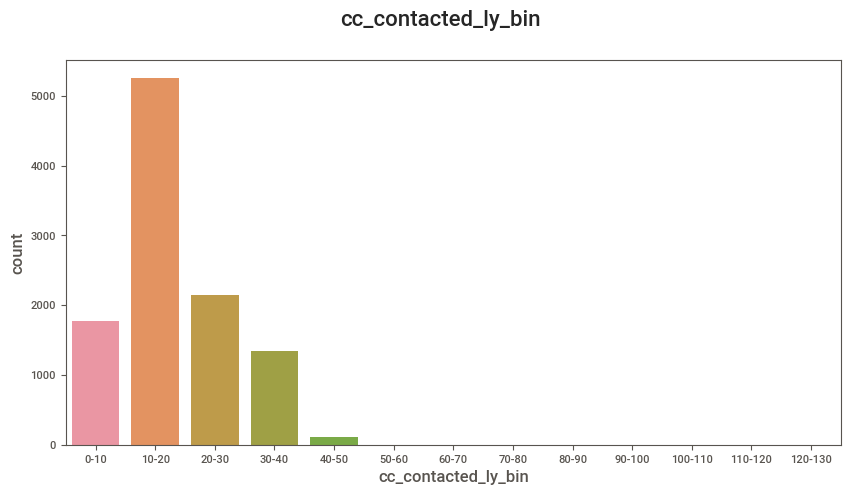

In [245]:
plt.figure(figsize =(10,5))
sns.countplot(df['cc_contacted_ly_bin'])
plt.suptitle('cc_contacted_ly_bin',fontsize= 16, fontweight='bold')
plt.show()

**Observation**

* 10-20 days has the highest frequency

#### noise_index


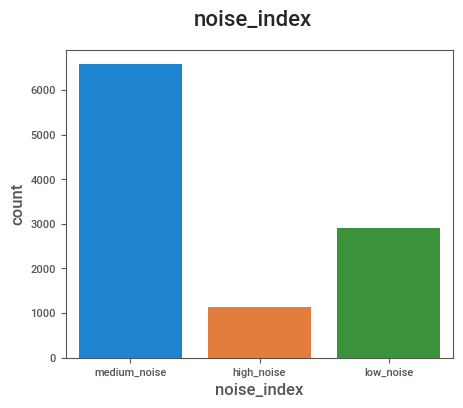

In [246]:
plt.figure(figsize =(5,4))
sns.countplot(df['noise_index'])
plt.suptitle('noise_index',fontsize= 16, fontweight='bold')
plt.show()

**Observation**

* Medium Noise has the highest count.

#### rev_per_month_bin


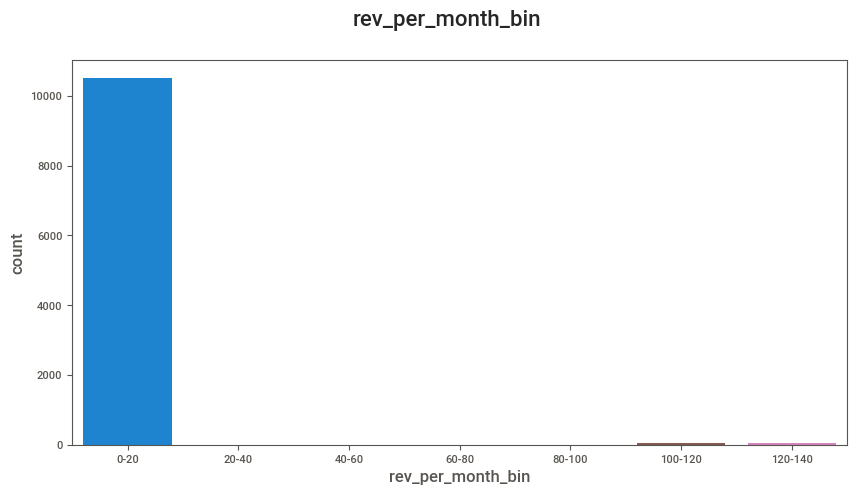

In [247]:
plt.figure(figsize =(10,5))
sns.countplot(df['rev_per_month_bin'])
plt.suptitle('rev_per_month_bin',fontsize= 16, fontweight='bold')
plt.show()

**Observation**

* 0-20 Months has the highest count

#### coupon_used_for_payment_bin


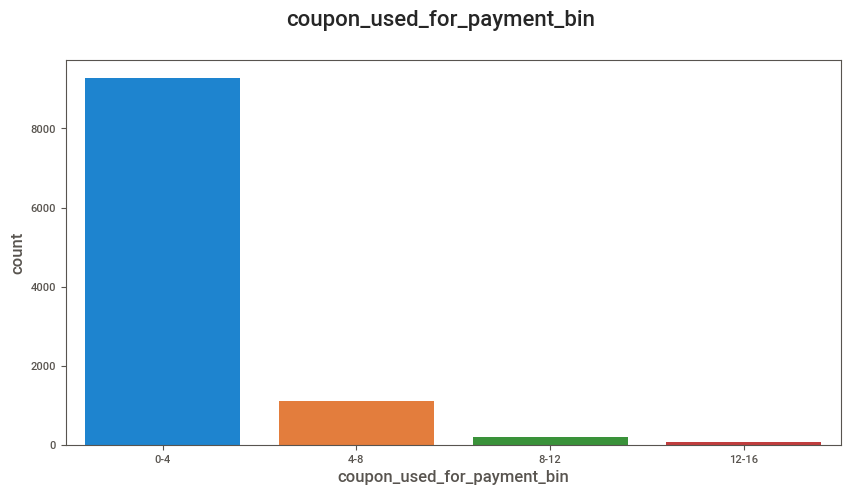

In [248]:
plt.figure(figsize =(10,5))
sns.countplot(df['coupon_used_for_payment_bin'])
plt.suptitle('coupon_used_for_payment_bin',fontsize= 16, fontweight='bold')
plt.show()

**Observation**

* 0-4 times coupons used for payments has the highest count

#### day_since_cc_connect_bin


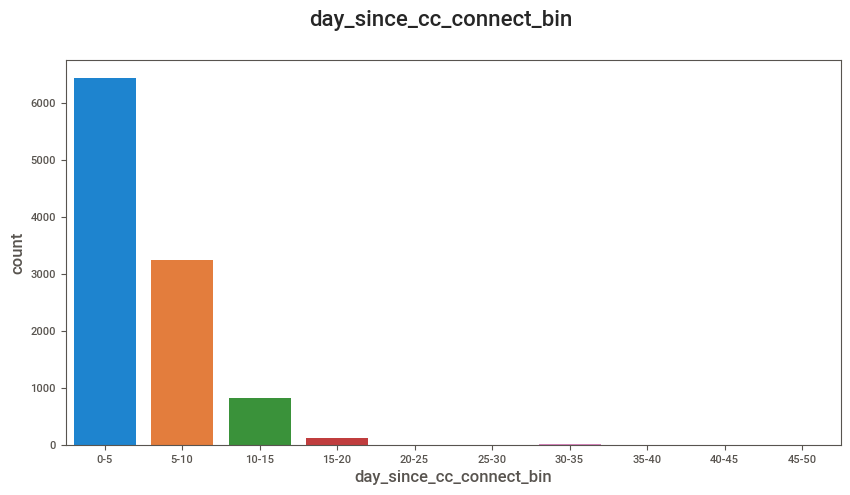

In [249]:
plt.figure(figsize =(10,5))
sns.countplot(df['day_since_cc_connect_bin'])
plt.suptitle('day_since_cc_connect_bin',fontsize= 16, fontweight='bold')
plt.show()

**Observation**

* 0-5 days since customers connected has the highest count.

#### cashback_percen


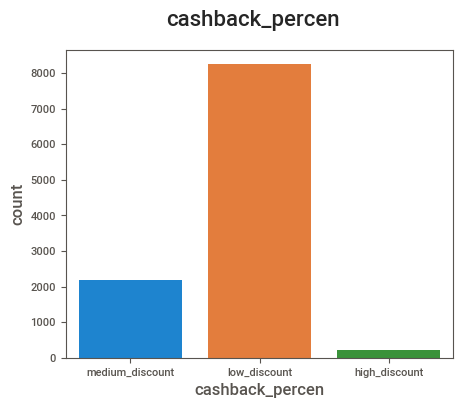

In [250]:
plt.figure(figsize =(5,4))
sns.countplot(df['cashback_percen'])
plt.suptitle('cashback_percen',fontsize= 16, fontweight='bold')
plt.show()

**Observation**

* Low Discount has the highest Frequency

#### cashback_benefits

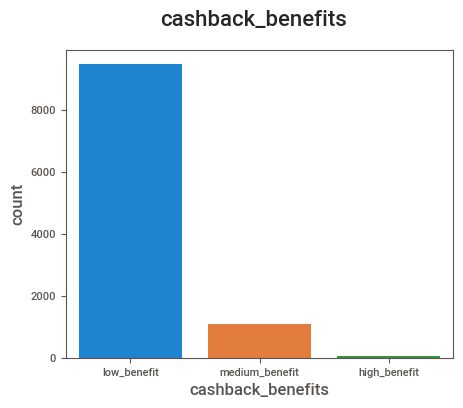

In [251]:
plt.figure(figsize =(5,4))
sns.countplot(df['cashback_benefits'])
plt.suptitle('cashback_benefits',fontsize= 16, fontweight='bold')
plt.show()

**Observation**

* Low Benefits has the Highest Frequency

### BI-Variate Analysis

#### Payment Vs City_Tier

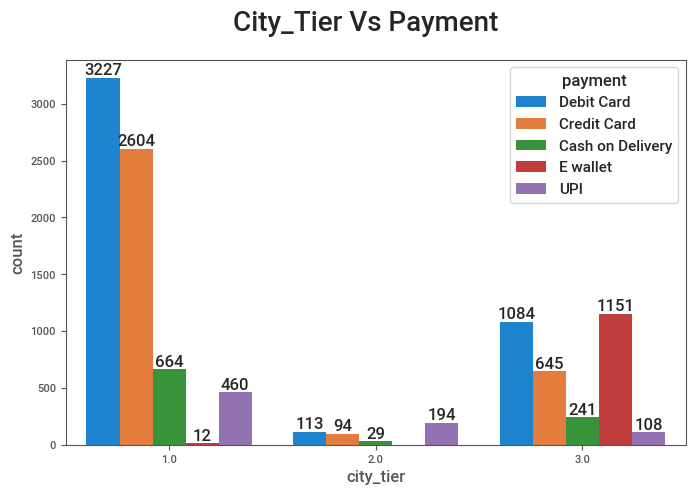

In [252]:
plt.figure(figsize = (8,5))

w_s = sns.countplot(x = 'city_tier',hue = 'payment' ,data = df)


for container in w_s.containers:
    w_s.bar_label(container)

plt.suptitle('City_Tier Vs Payment',fontsize= 20, fontweight='bold')
plt.show()

**Observation :**

* Tier 1 Customers using mostly prefer Debit card as mode of payment E-wallet is least preferred

* Tier 2 Customers usually prefer UPI as mode of payment E-wallet is least preferred.

* Tier 3 Customers usually prefer E-wallet.

#### city_tier Vs cashback_benefits

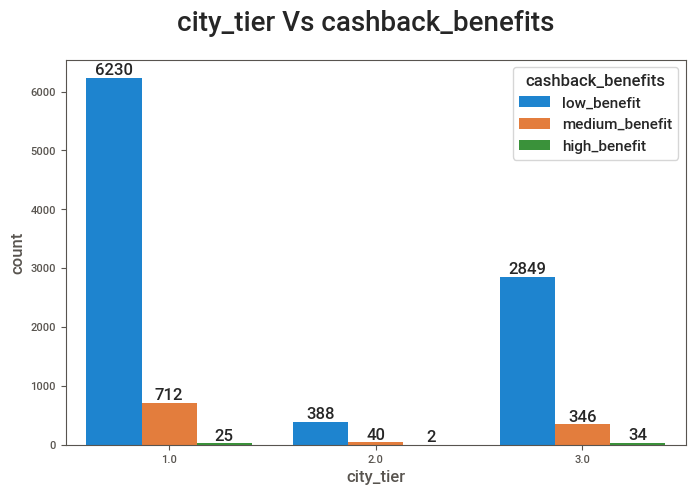

In [253]:
plt.figure(figsize = (8,5))

w_s = sns.countplot(x = 'city_tier',hue = 'cashback_benefits' ,data = df)


for container in w_s.containers:
    w_s.bar_label(container)

plt.suptitle('city_tier Vs cashback_benefits',fontsize= 20, fontweight='bold')
plt.show()

**Observations**

* Tier 1 City has the highest count of customers for Low Benefits and Medium Benefits

* Tier 3 City has the highest count of customers for High Benefits 

#### account_user_count Vs cashback_benefits

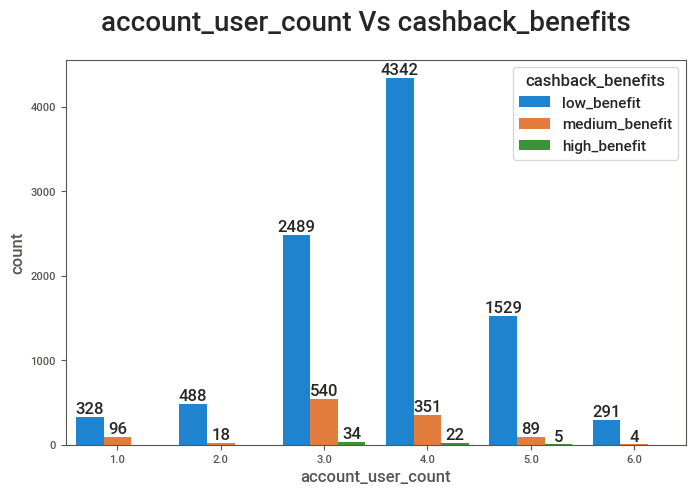

In [254]:
plt.figure(figsize = (8,5))

w_s = sns.countplot(x = 'account_user_count',hue = 'cashback_benefits' ,data = df)


for container in w_s.containers:
    w_s.bar_label(container)

plt.suptitle('account_user_count Vs cashback_benefits',fontsize= 20, fontweight='bold')
plt.show()

**Observation**

* Account User Count of 4 has the highest count Low Benefit customers.

* Account User Count of 3 has the highest count Medium and High Benefit customers.

#### account_user_count Vs noise_index

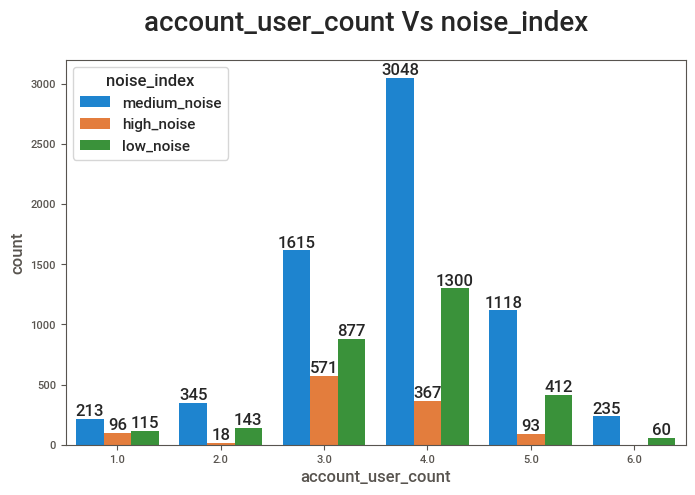

In [255]:
plt.figure(figsize = (8,5))

w_s = sns.countplot(x = 'account_user_count',hue = 'noise_index' ,data = df)


for container in w_s.containers:
    w_s.bar_label(container)

plt.suptitle('account_user_count Vs noise_index',fontsize= 20, fontweight='bold')
plt.show()

**Observations**

* All Account User Count have huge count Medium Noise. 

* Account User Count 3,4,5 must be given more focus as they have huge count of Medium,High and Low Noise which means customers are calling quite frequently to cutomers which needs to be addressed if not done properly these customers will Churn.

#### account_segment Vs cashback_benefits

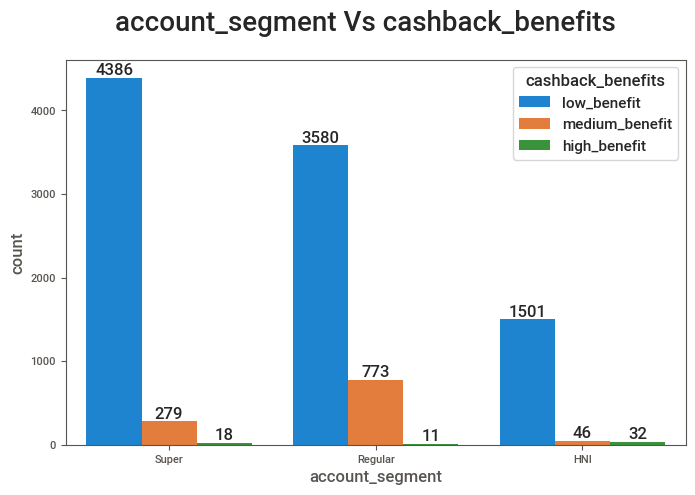

In [256]:
plt.figure(figsize = (8,5))

w_s = sns.countplot(x = 'account_segment',hue = 'cashback_benefits' ,data = df)


for container in w_s.containers:
    w_s.bar_label(container)

plt.suptitle('account_segment Vs cashback_benefits',fontsize= 20, fontweight='bold')
plt.show()

**Observation**

* All Account Segments have huge count of Low Benefits

* Regular has huge count of Medium Benefit

* HNI has the huge count of High Benefit

#### account_segment Vs noise_index

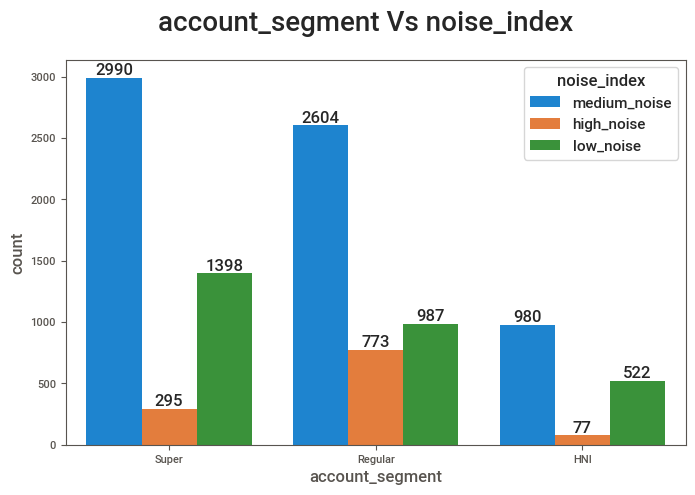

In [257]:
plt.figure(figsize = (8,5))

w_s = sns.countplot(x = 'account_segment',hue = 'noise_index' ,data = df)


for container in w_s.containers:
    w_s.bar_label(container)

plt.suptitle('account_segment Vs noise_index',fontsize= 20, fontweight='bold')
plt.show()

**Observations**

* Every Account Segment has Medium Noise which means customers has contacted the customers care more than once every month in the last 12 Months

### cc_contacted_ly_bin Vs noise_index

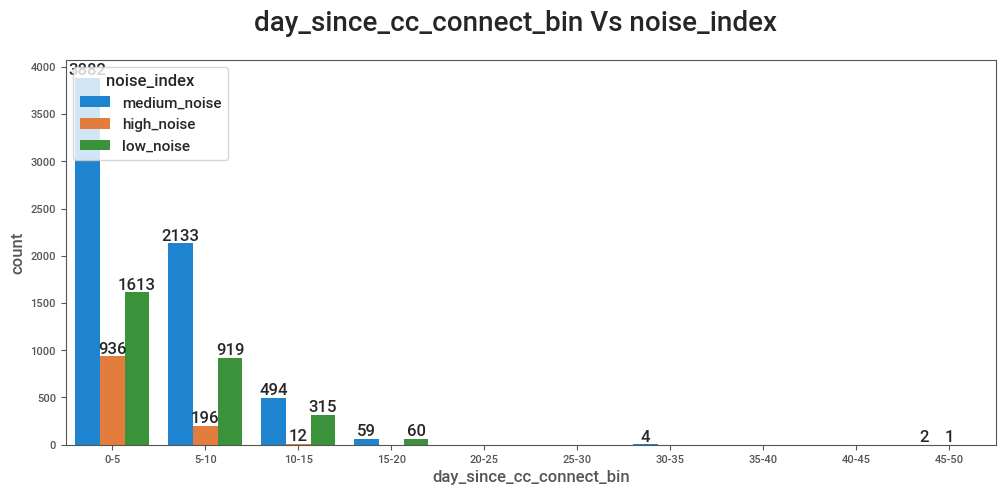

In [258]:
plt.figure(figsize = (12,5))

w_s = sns.countplot(x = 'day_since_cc_connect_bin',hue = 'noise_index' ,data = df)


for container in w_s.containers:
    w_s.bar_label(container)

plt.suptitle('day_since_cc_connect_bin Vs noise_index',fontsize= 20, fontweight='bold')
plt.show()

**Observations**

* Customers who has last contacted customers between 0-5 days has huge count Medium, Low and High Noise  

### Multivariate Analysis

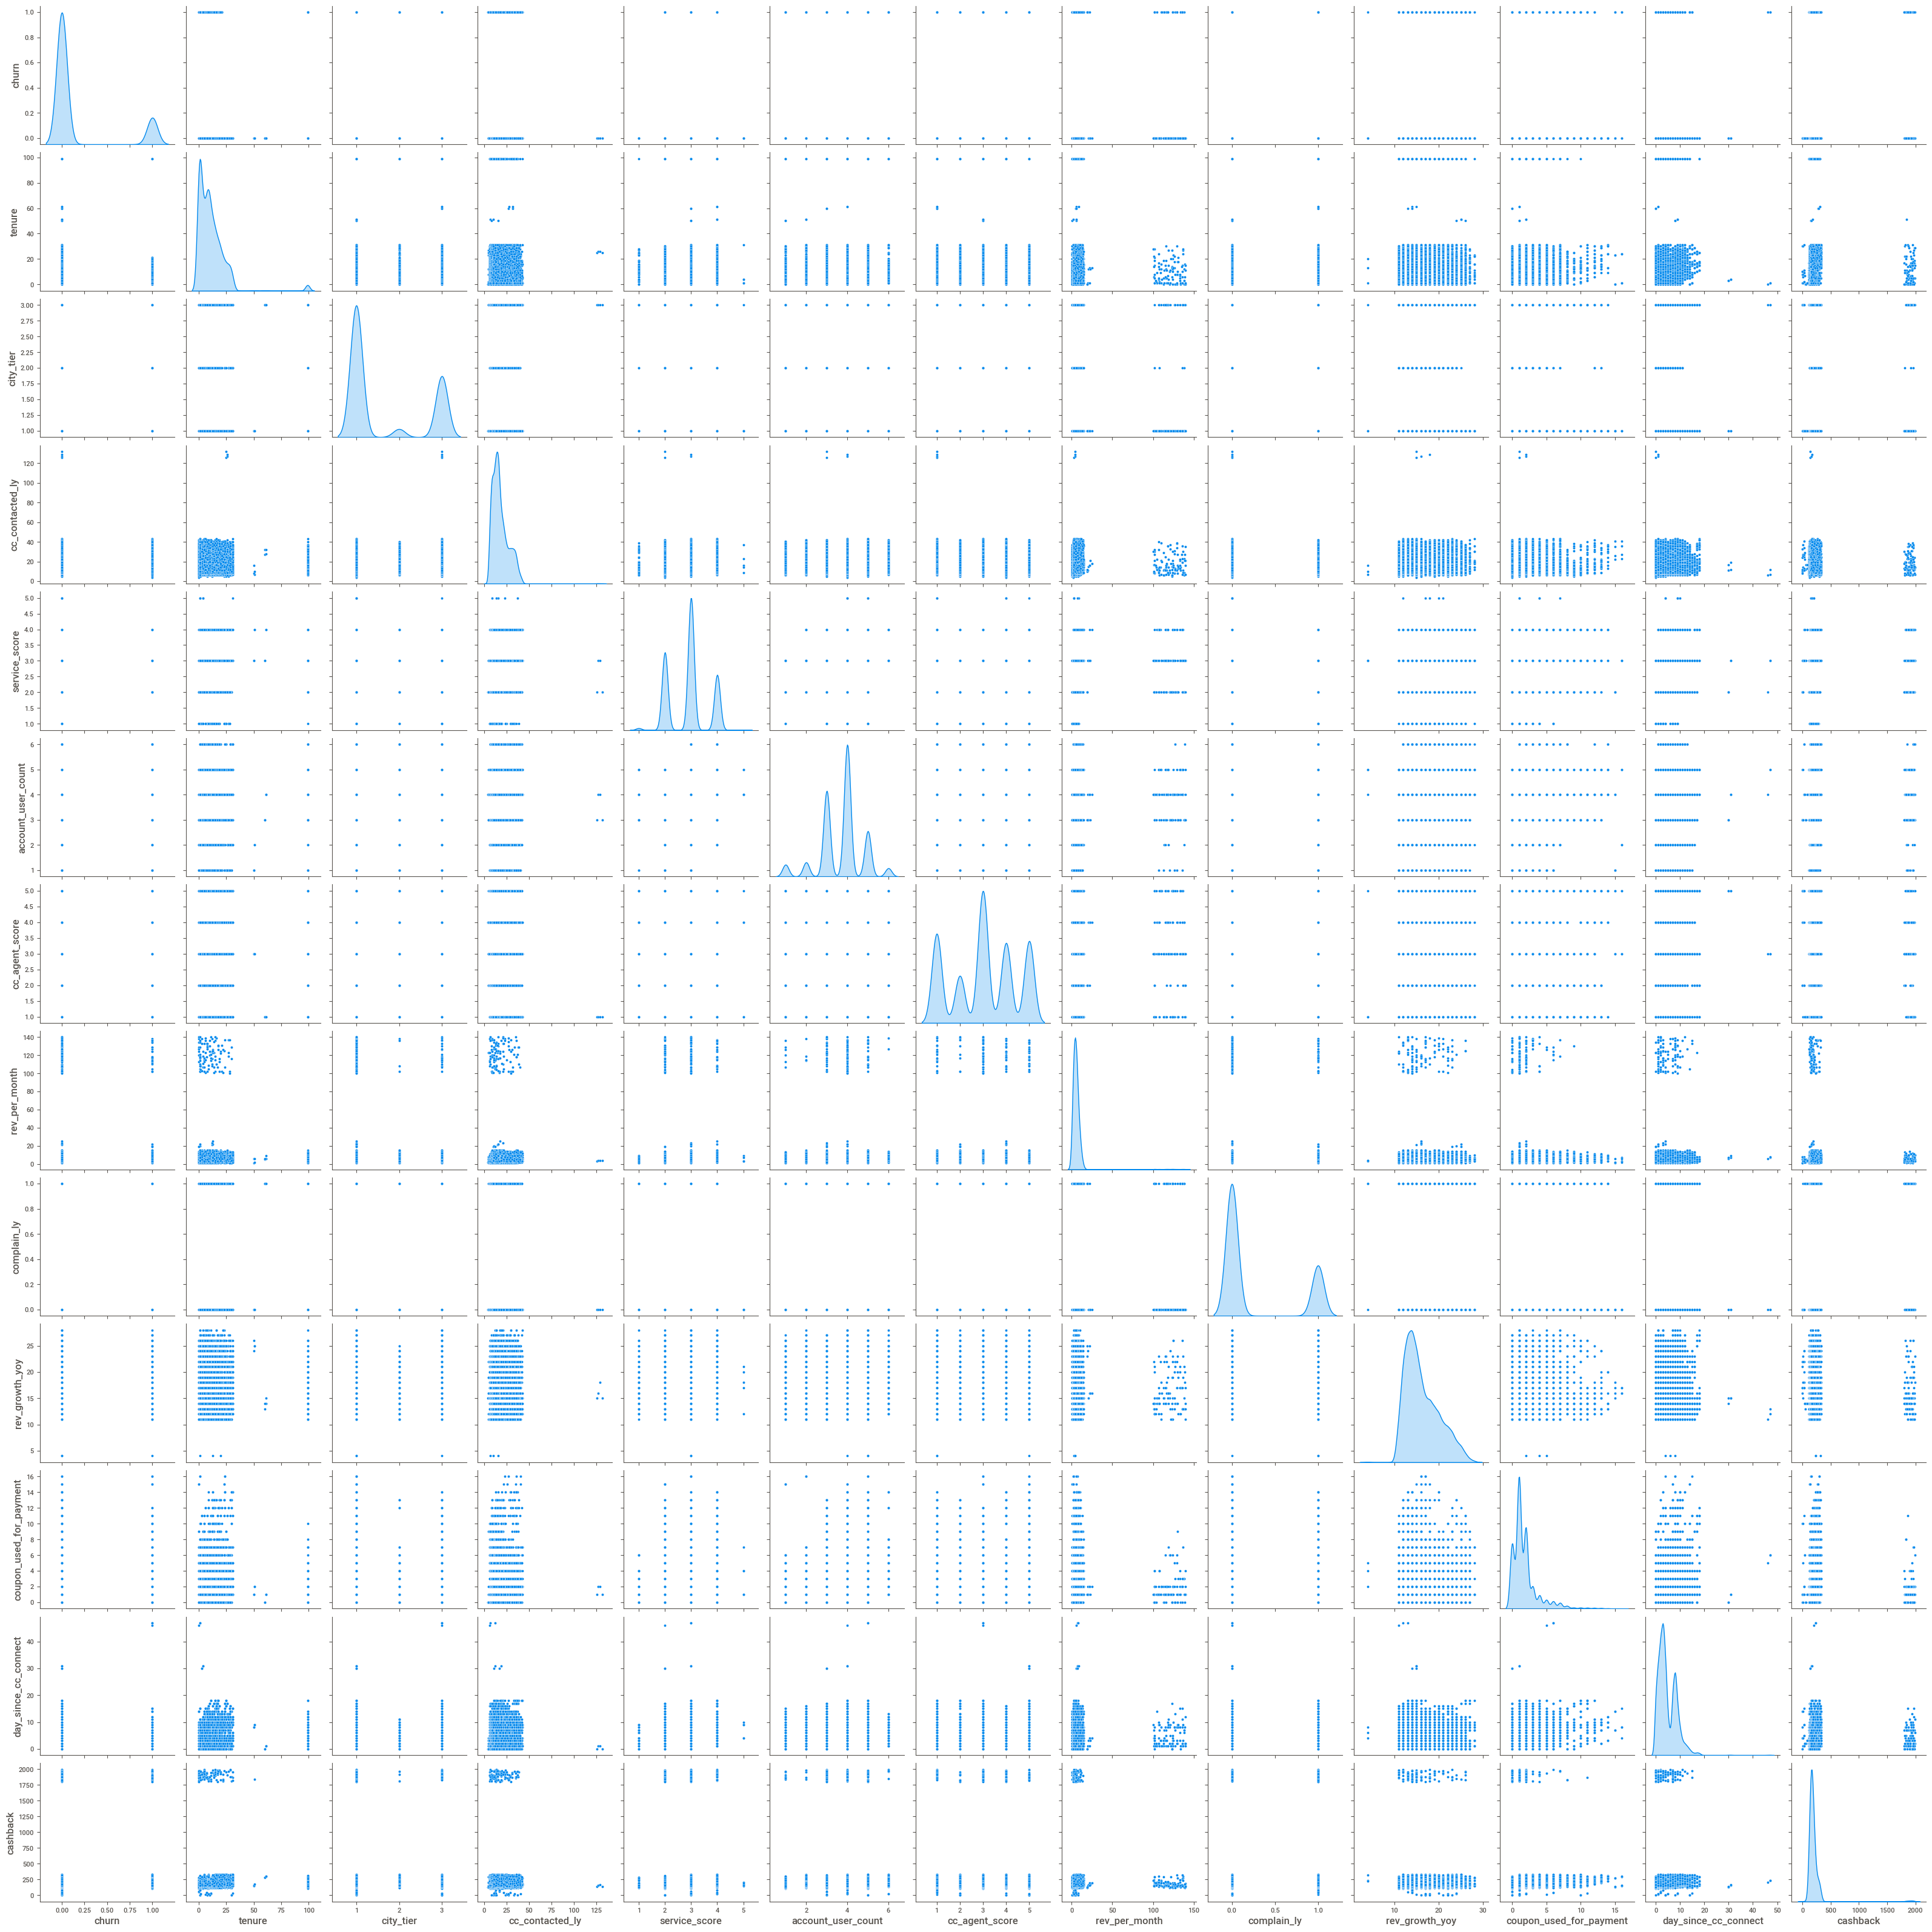

In [259]:
sns.pairplot(df, diag_kind='kde') 

plt.show()

**Observation  :**

* we can not much see correlation among the columns
* lets use Correlation Matrix and Heatmap in order to find the Correlation among columns

### Correlation Matrix

In [260]:
corr = df.corr().T
corr

churn    tenure  city_tier  cc_contacted_ly  \
churn                    1.000000 -0.226269   0.088719         0.068082   
tenure                  -0.226269  1.000000  -0.024494        -0.005805   
city_tier                0.088719 -0.024494   1.000000         0.012098   
cc_contacted_ly          0.068082 -0.005805   0.012098         1.000000   
service_score            0.005523  0.006188  -0.005970         0.059708   
account_user_count       0.108373 -0.008451   0.027339         0.024880   
cc_agent_score           0.106237 -0.016359  -0.011026         0.007918   
rev_per_month            0.022448  0.024870  -0.025029         0.014065   
complain_ly              0.244674 -0.018826  -0.000352         0.027249   
rev_growth_yoy          -0.019454  0.021671  -0.025650         0.071069   
coupon_used_for_payment -0.013852  0.083102   0.023737         0.004137   
day_since_cc_connect    -0.142321  0.119380   0.018437         0.015865   
cashback                -0.029347  0.074132   0.010199         0.000423   

                         service_score  account_user_count  cc_agent_score  \
churn                         0.005523            0.108373        0.106237   
tenure                        0.006188           -0.008451       -0.016359   
city_tier                    -0.005970            0.027339       -0.011026   
cc_contacted_ly               0.059708            0.024880        0.007918   
service_score                 1.000000            0.314299        0.039976   
account_user_count            0.314299            1.000000       -0.016984   
cc_agent_score                0.039976           -0.016984        1.000000   
rev_per_month                 0.024351            0.018560        0.023277   
complain_ly                   0.005440            0.000134       -0.032811   
rev_growth_yoy                0.109630            0.065611       -0.023763   
coupon_used_for_payment       0.175252            0.141389        0.035518   
day_since_cc_connect          0.093344            0.029376        0.034469   
cashback                      0.040676            0.034263       -0.009892   

                         rev_per_month  complain_ly  rev_growth_yoy  \
churn                         0.022448     0.244674       -0.019454   
tenure                        0.024870    -0.018826        0.021671   
city_tier                    -0.025029    -0.000352       -0.025650   
cc_contacted_ly               0.014065     0.027249        0.071069   
service_score                 0.024351     0.005440        0.109630   
account_user_count            0.018560     0.000134        0.065611   
cc_agent_score                0.023277    -0.032811       -0.023763   
rev_per_month                 1.000000    -0.001709        0.021804   
complain_ly                  -0.001709     1.000000       -0.000097   
rev_growth_yoy                0.021804    -0.000097        1.000000   
coupon_used_for_payment       0.013350    -0.003300        0.020161   
day_since_cc_connect         -0.002265    -0.040635        0.001999   
cashback                      0.000995     0.009991       -0.002151   

                         coupon_used_for_payment  day_since_cc_connect  \
churn                                  -0.013852             -0.142321   
tenure                                  0.083102              0.119380   
city_tier                               0.023737              0.018437   
cc_contacted_ly                         0.004137              0.015865   
service_score                           0.175252              0.093344   
account_user_count                      0.141389              0.029376   
cc_agent_score                          0.035518              0.034469   
rev_per_month                           0.013350             -0.002265   
complain_ly                            -0.003300             -0.040635   
rev_growth_yoy                          0.020161              0.001999   
coupon_used_for_payment                 1.000000              0.355320   
d

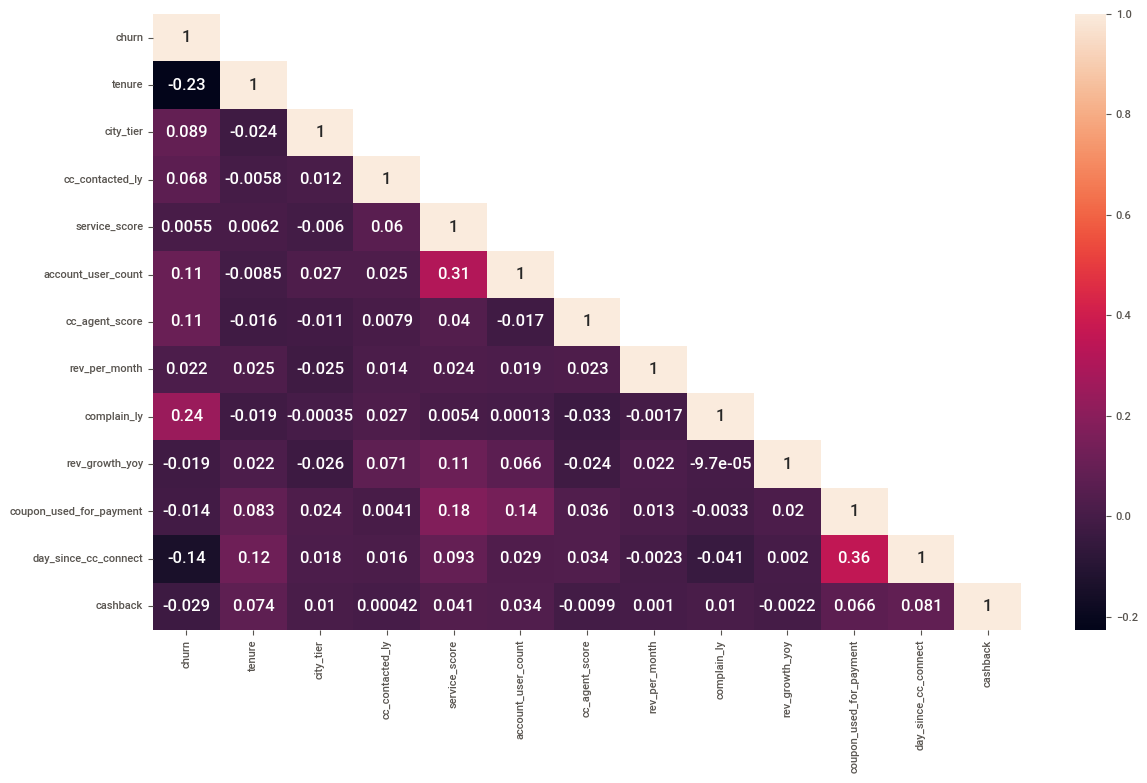

In [261]:
plt.figure(figsize=(14,8))
sns.heatmap(corr, annot=True,mask=np.triu(corr.corr(),+1));

**Observation  :**

* A high **Negative correlation** between **Churn and Tenure**.
* A high **Negative correlation** between **Churn and Day_Since_CC_connect**.
* A high **Positive correlation** between **Churn and complain_ly**.
* A high **Positive correlation** between **Account_user_count and Service_Score**.
* A high **Positive correlation** between **coupon_used_for_payment and Day_Since_CC_connect**.


##### Lets create a copy for Base Model (Logistic Regression) that we going to use

In [262]:
df_logis = df.copy()

Before using Logistic Regression Model we need to remove outliers coz LR is highly sensetive outliers 

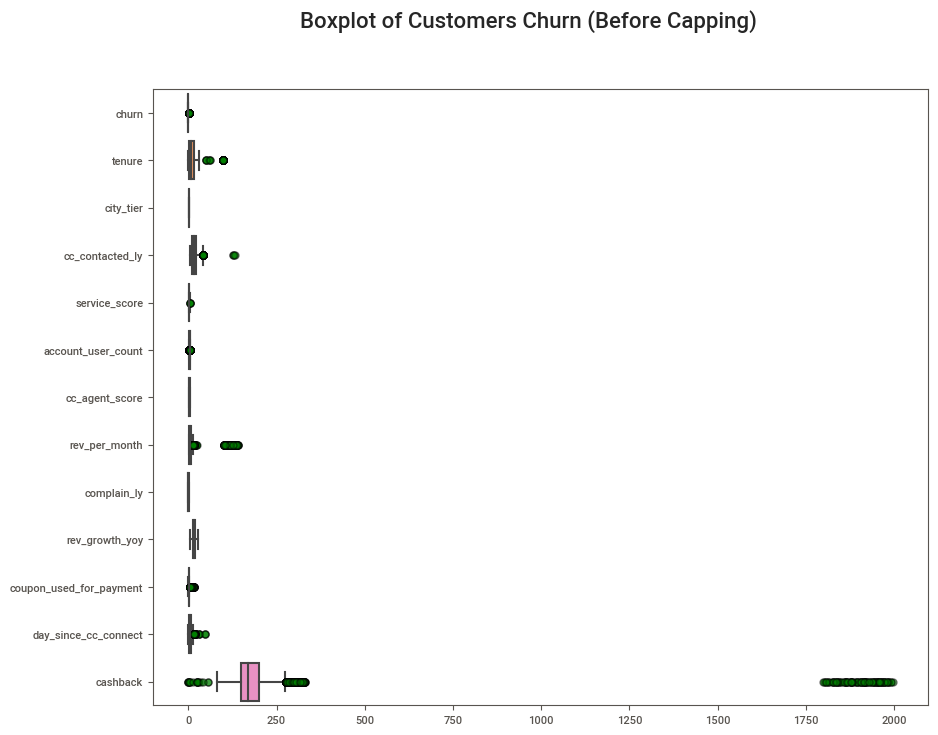

In [263]:
plt.figure(figsize =(10,8))
flierprops = dict(marker='o', markersize=5, markeredgecolor='black', markerfacecolor='green', alpha=0.5)
sns.boxplot(data = df_logis, flierprops=flierprops,orient="h")
plt.suptitle('Boxplot of Customers Churn (Before Capping)',fontsize= 16, fontweight='bold')
plt.show()

### Removing Outliers 

In [264]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [265]:
# Churn is our target Variable thus we are not capping the Outliers

#  Tenure

lr,ur=remove_outlier(df_logis['tenure'])
print("tenure :")
print('Lower Range :',lr,'\nUpper Range :',ur)
df_logis['tenure']=np.where(df_logis['tenure']>ur,ur,df_logis['tenure'])
df_logis['tenure']=np.where(df_logis['tenure']<lr,lr,df_logis['tenure'])
print('')

# city_tier
lr,ur=remove_outlier(df_logis['city_tier'])
print("city_tier :")
print('Lower Range :',lr,'\nUpper Range :',ur)
df_logis['city_tier']=np.where(df_logis['city_tier']>ur,ur,df_logis['city_tier'])
df_logis['city_tier']=np.where(df_logis['city_tier']<lr,lr,df_logis['city_tier'])
print('')

# cc_contacted_ly
lr,ur=remove_outlier(df_logis['cc_contacted_ly'])
print("cc_contacted_ly :")
print('Lower Range :',lr,'\nUpper Range :',ur)
df_logis['cc_contacted_ly']=np.where(df_logis['cc_contacted_ly']>ur,ur,df_logis['cc_contacted_ly'])
df_logis['cc_contacted_ly']=np.where(df_logis['cc_contacted_ly']<lr,lr,df_logis['cc_contacted_ly'])
print('')

# service_score
lr,ur=remove_outlier(df_logis['service_score'])
print("service_score :")
print('Lower Range :',lr,'\nUpper Range :',ur)
df_logis['service_score']=np.where(df_logis['service_score']>ur,ur,df_logis['service_score'])
df_logis['service_score']=np.where(df_logis['service_score']<lr,lr,df_logis['service_score'])
print('')


# account_user_count
lr,ur=remove_outlier(df_logis['account_user_count'])
print("account_user_count :")
print('Lower Range :',lr,'\nUpper Range :',ur)
df_logis['account_user_count']=np.where(df_logis['account_user_count']>ur,ur,df_logis['account_user_count'])
df_logis['account_user_count']=np.where(df_logis['account_user_count']<lr,lr,df_logis['account_user_count'])
print('')

# cc_agent_score
lr,ur=remove_outlier(df_logis['cc_agent_score'])
print("cc_agent_score :")
print('Lower Range :',lr,'\nUpper Range :',ur)
df_logis['cc_agent_score']=np.where(df_logis['cc_agent_score']>ur,ur,df_logis['cc_agent_score'])
df_logis['cc_agent_score']=np.where(df_logis['cc_agent_score']<lr,lr,df_logis['cc_agent_score'])
print('')

# rev_per_month
lr,ur=remove_outlier(df_logis['rev_per_month'])
print("rev_per_month :")
print('Lower Range :',lr,'\nUpper Range :',ur)
df_logis['rev_per_month']=np.where(df_logis['rev_per_month']>ur,ur,df_logis['rev_per_month'])
df_logis['rev_per_month']=np.where(df_logis['rev_per_month']<lr,lr,df_logis['rev_per_month'])
print('')

# complain_ly
lr,ur=remove_outlier(df_logis['complain_ly'])
print("complain_ly :")
print('Lower Range :',lr,'\nUpper Range :',ur)
df_logis['complain_ly']=np.where(df_logis['complain_ly']>ur,ur,df_logis['complain_ly'])
df_logis['complain_ly']=np.where(df_logis['complain_ly']<lr,lr,df_logis['complain_ly'])
print('')


# rev_growth_yoy
lr,ur=remove_outlier(df_logis['rev_growth_yoy'])
print("rev_growth_yoy :")
print('Lower Range :',lr,'\nUpper Range :',ur)
df_logis['rev_growth_yoy']=np.where(df_logis['rev_growth_yoy']>ur,ur,df_logis['rev_growth_yoy'])
df_logis['rev_growth_yoy']=np.where(df_logis['rev_growth_yoy']<lr,lr,df_logis['rev_growth_yoy'])
print('')

# coupon_used_for_payment
lr,ur=remove_outlier(df_logis['coupon_used_for_payment'])
print("coupon_used_for_payment :")
print('Lower Range :',lr,'\nUpper Range :',ur)
df_logis['coupon_used_for_payment']=np.where(df_logis['coupon_used_for_payment']>ur,ur,df_logis['coupon_used_for_payment'])
df_logis['coupon_used_for_payment']=np.where(df_logis['coupon_used_for_payment']<lr,lr,df_logis['coupon_used_for_payment'])
print('')

# day_since_cc_connect
lr,ur=remove_outlier(df_logis['day_since_cc_connect'])
print("day_since_cc_connect :")
print('Lower Range :',lr,'\nUpper Range :',ur)
df_logis['day_since_cc_connect']=np.where(df_logis['day_since_cc_connect']>ur,ur,df_logis['day_since_cc_connect'])
df_logis['day_since_cc_connect']=np.where(df_logis['day_since_cc_connect']<lr,lr,df_logis['day_since_cc_connect'])
print('')

# cashback
lr,ur=remove_outlier(df_logis['cashback'])
print("cashback :")
print('Lower Range :',lr,'\nUpper Range :',ur)
df_logis['cashback']=np.where(df_logis['cashback']>ur,ur,df_logis['cashback'])
df_logis['cashback']=np.where(df_logis['cashback']<lr,lr,df_logis['cashback'])
print('')

tenure :
Lower Range : -19.0 
Upper Range : 37.0

city_tier :
Lower Range : -2.0 
Upper Range : 6.0

cc_contacted_ly :
Lower Range : -7.0 
Upper Range : 41.0

service_score :
Lower Range : 0.5 
Upper Range : 4.5

account_user_count :
Lower Range : 1.5 
Upper Range : 5.5

cc_agent_score :
Lower Range : -1.0 
Upper Range : 7.0

rev_per_month :
Lower Range : -3.0 
Upper Range : 13.0

complain_ly :
Lower Range : -1.5 
Upper Range : 2.5

rev_growth_yoy :
Lower Range : 4.0 
Upper Range : 28.0

coupon_used_for_payment :
Lower Range : -0.5 
Upper Range : 3.5

day_since_cc_connect :
Lower Range : -5.5 
Upper Range : 14.5

cashback :
Lower Range : 71.5 
Upper Range : 275.5



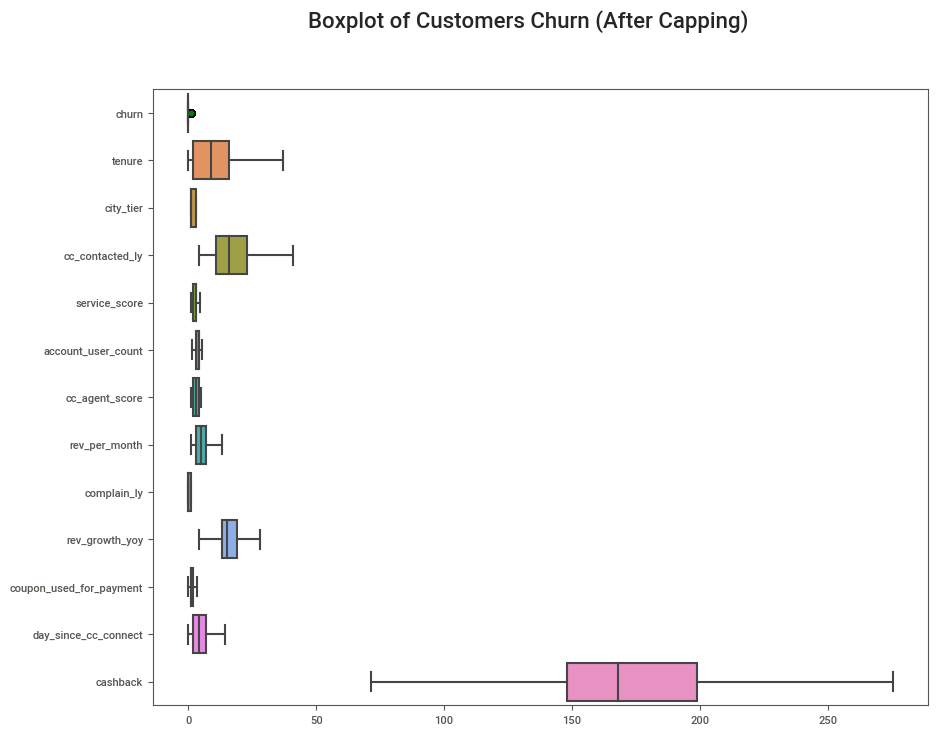

In [266]:
plt.figure(figsize =(10,8))
flierprops = dict(marker='o', markersize=5, markeredgecolor='black', markerfacecolor='green', alpha=0.5)
sns.boxplot(data = df_logis, flierprops=flierprops,orient="h")
plt.suptitle('Boxplot of Customers Churn (After Capping)',fontsize= 16, fontweight='bold')
plt.show()

In [267]:
object_names = list(df_logis.select_dtypes(['object']).columns)
object_names

['payment',
 'gender',
 'account_segment',
 'marital_status',
 'login_device',
 'noise_index',
 'cashback_percen',
 'cashback_benefits']

In [268]:
## For our base model we only need Original Columns
## Thus droping extra columns

df_logis.drop(columns =['noise_index','cashback_percen','cashback_benefits'],inplace = True )

In [269]:
df_logis.drop(columns =['coupon_used_for_payment_bin','rev_per_month_bin','day_since_cc_connect_bin','cc_contacted_ly_bin','tenure_bin'],inplace = True )

In [270]:
len(df_logis.axes[1])

18

In [271]:
len(df_cus_churn.axes[1]) # Original column total

18

### One-Hot-Endcoing

In [272]:
df_logis = pd.get_dummies(df_logis,columns = ['payment','gender','account_segment','marital_status','login_device'],drop_first=True)
df_logis.head()

churn  tenure  city_tier  cc_contacted_ly  service_score  \
AccountID                                                             
20000          1    4.00        3.0              6.0            3.0   
20002          1    0.01        1.0             30.0            2.0   
20004          1    0.01        1.0             12.0            2.0   
20005          1    0.01        1.0             22.0            3.0   
20006          1    2.00        3.0             11.0            2.0   

           account_user_count  cc_agent_score  rev_per_month  complain_ly  \
AccountID                                                                   
20000                     3.0             2.0            9.0          1.0   
20002                     4.0             3.0            6.0          1.0   
20004                     3.0             5.0            3.0          0.0   
20005                     4.0             5.0            2.0          1.0   
20006                     3.0             2.0            4.0          0.0   

           rev_growth_yoy  ...  cashback  payment_Credit Card  \
AccountID                  ...                                  
20000                11.0  ...     160.0                    0   
20002                14.0  ...     198.0                    0   
20004                11.0  ...     130.0                    1   
20005                22.0  ...     139.0                    0   
20006                14.0  ...     121.0                    0   

           payment_Debit Card  payment_E wallet  payment_UPI  gender_Male  \
AccountID                                                                   
20000                       1                 0            0            0   
20002                       1                 0            0            1   
20004                       0                 0            0            1   
20005                       1                 0            0            0   
20006                       0                 0            0            1   

           account_segment_Regular  account_segment_Super  \
AccountID                                                   
20000                            0                      1   
20002                            1                      0   
20004                            1                      0   
20005                            1                      0   
20006                            0                      1   

           marital_status_Single  login_device_Mobile  
AccountID                                              
20000                          1                    1  
20002                          1                    1  
20004                          1                    1  
20005                          1                    0  
20006                          1                    1  

[5 rows x 22 columns]

## Logistic Regression(Base Model)

### Train-Test-Split


In [273]:
X = df_logis.drop('churn', axis =1)
y = df_logis['churn']

In [274]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.30)

### VIF(Variance Inflation Factor)

A variance inflation factor(VIF) detects multicollinearity in regression analysis. Multicollinearity is when there’s correlation between predictors (i.e. independent variables) in a model; it’s presence can adversely affect your regression results. The VIF estimates how much the variance of a regression coefficient is inflated due to multicollinearity in the model.

A rule of thumb for interpreting the variance inflation factor:

    * 1 = not correlated.
    * Between 1 and 5 = moderately correlated.
    * Greater than 5 = highly correlated.

In [275]:
# User define Function for VIF

def vif_cal(input_data):
    x_vars = input_data
    xvar_names = input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y = x_vars[xvar_names[i]]
        x = x_vars[xvar_names.drop(xvar_names[i])]
        rsq = SM.ols(formula = 'y~x',data = x_vars).fit().rsquared
        vif = round(1/(1-rsq),2)
        print(xvar_names[i],"VIF = ",vif)

The function named vif_cal which calculates the Variance Inflation Factor (VIF) for each independent variable in a given input dataset. The VIF is a measure of the extent to which the variance of an estimated regression coefficient is increased due to the correlation between that predictor variable and the other predictor variables in the model.

The function takes a pandas DataFrame as its input, which is assigned to the variable input_data. The columns of the DataFrame are assigned to the variable x_vars, and the column names are assigned to the variable xvar_names.

The function then loops through the column names using a for loop, and for each column name, it extracts the corresponding data as the dependent variable y and the remaining columns as the independent variables x. It then fits a simple linear regression model using the statsmodels module with y as the response variable and x as the predictor variable. The rsquared attribute of the fitted model is then used to calculate the VIF for the ith variable.

Finally, the VIF value for each independent variable is printed to the console along with the variable name. The VIF values are rounded to two decimal places using the round() function.

Note that the function requires the statsmodels module to be imported with the alias SM for it to work.

In [276]:
df_logis.columns

Index(['churn', 'tenure', 'city_tier', 'cc_contacted_ly', 'service_score',
       'account_user_count', 'cc_agent_score', 'rev_per_month', 'complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'day_since_cc_connect',
       'cashback', 'payment_Credit Card', 'payment_Debit Card',
       'payment_E wallet', 'payment_UPI', 'gender_Male',
       'account_segment_Regular', 'account_segment_Super',
       'marital_status_Single', 'login_device_Mobile'],
      dtype='object')

In [277]:
# rename columns

df_logis.rename(columns = {'payment_Credit Card':'payment_Credit_Card',
                          'payment_Debit Card' : 'payment_Debit_Card',
                           'payment_E wallet' :  'payment_E_wallet'}, inplace = True)


In [278]:
vif_cal(input_data= df_logis[['tenure', 'city_tier', 'cc_contacted_ly', 'service_score',
       'account_user_count', 'cc_agent_score', 'rev_per_month', 'complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'day_since_cc_connect',
       'cashback', 'payment_Credit_Card', 'payment_Debit_Card',
       'payment_E_wallet', 'payment_UPI', 'gender_Male',
       'account_segment_Regular', 'account_segment_Super',
       'marital_status_Single', 'login_device_Mobile']])

tenure VIF =  1.29
city_tier VIF =  1.45
cc_contacted_ly VIF =  1.03
service_score VIF =  1.21
account_user_count VIF =  1.15
cc_agent_score VIF =  1.02
rev_per_month VIF =  1.09
complain_ly VIF =  1.01
rev_growth_yoy VIF =  1.02
coupon_used_for_payment VIF =  1.26
day_since_cc_connect VIF =  1.31
cashback VIF =  1.58
payment_Credit_Card VIF =  3.17
payment_Debit_Card VIF =  3.38
payment_E_wallet VIF =  2.34
payment_UPI VIF =  1.7
gender_Male VIF =  1.01
account_segment_Regular VIF =  2.76
account_segment_Super VIF =  2.34
marital_status_Single VIF =  1.02
login_device_Mobile VIF =  1.01



**We can consider a rule of thumb that if vif is greater than 5, we can choose to drop the variable as there can be a problem of multicollinearity. This essentially means that we can choose to drop a predictor variable whose 80% variation is being explained by the other predictor variables.**

### Base Model 1

In [279]:
import statsmodels.formula.api as sm

In [280]:
df_logis.columns

Index(['churn', 'tenure', 'city_tier', 'cc_contacted_ly', 'service_score',
       'account_user_count', 'cc_agent_score', 'rev_per_month', 'complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'day_since_cc_connect',
       'cashback', 'payment_Credit_Card', 'payment_Debit_Card',
       'payment_E_wallet', 'payment_UPI', 'gender_Male',
       'account_segment_Regular', 'account_segment_Super',
       'marital_status_Single', 'login_device_Mobile'],
      dtype='object')

In [281]:
f_1 = 'churn ~ tenure + city_tier + cc_contacted_ly + service_score + account_user_count + cc_agent_score + rev_per_month + complain_ly + rev_growth_yoy + coupon_used_for_payment + day_since_cc_connect + cashback + payment_Credit_Card + payment_Debit_Card + payment_E_wallet + payment_UPI + gender_Male + account_segment_Regular + account_segment_Super + marital_status_Single + login_device_Mobile '

In [282]:
model_1 = sm.logit(formula =f_1, data =df_logis).fit()
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.298187
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                10626
Model:                          Logit   Df Residuals:                    10604
Method:                           MLE   Df Model:                           21
Date:                Sun, 05 Mar 2023   Pseudo R-squ.:                  0.3415
Time:                        08:54:56   Log-Likelihood:                -3168.5
converged:                       True   LL-Null:                       -4811.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -4.0399      0.340    -11.897      0.000      -4.705      -3.374
tenure                     -0.1704      0.006    -26.274      0.000      -0.183      -0.158
city_tier                   0.3856      0.041      9.299      0.000       0.304       0.467
cc_contacted_ly             0.0279      0.004      7.334      0.000       0.020       0.035
service_score              -0.1828      0.050     -3.638      0.000      -0.281      -0.084
account_user_count          0.3760      0.039      9.682      0.000       0.300       0.452
cc_agent_score              0.2782      0.024     11.396      0.000       0.230       0.326
rev_per_month               0.1456      0.011     12.735      0.000       0.123       0.168
complain_ly                 1.6680      0.068     24.637      0.000       1.535       1.801
rev_growth_yoy             -0.0318      0.009     -3.577      0.000      -0.049      -0.014
coupon_used_for_payment     0.1584      0.035      4.581      0.000       0.091       0.226
day_since_cc_connect       -0.0713      0.012     -5.877      0.000      -0.095      -0.047
cashback                    0.0013      0.001      1.134      0.257      -0.001       0.004
payment_Credit_Card        -0.6170      0.115     -5.355      0.000      -0.843      -0.391
payment_Debit_Card         -0.4329      0.111     -3.897      0.000      -0.651      -0.215
payment_E_wallet           -0.0629      0.143     -0.441      0.659      -0.342       0.217
payment_UPI                -0.7033      0.156     -4.495      0.000      -1.010      -0.397
gender_Male                 0.2481      0.067      3.711      0.000       0.117       0.379
account_segment_Regular     0.2716      0.117      2.320      0.020       0.042       0.501
account_segment_Super      -0.9849      0.108     -9.159      0.000      -1.196      -0.774
marital_status_Single       0.8022      0.065     12.262      0.000       0.674       0.930
login_device_Mobile        -0.4743      0.071     -6.698      0.000      -0.613      -0.336
===========================================================================================
"""

**Observation**

* We can clearly see that payment_E_wallet > 0.05 which says that this column is not significant for model. Thus we will remove this column in our Base Model 2

In [283]:
print('The adjusted pseudo R-square value is', 1 - ((model_1.llf - model_1.df_model)/model_1.llnull))

The adjusted pseudo R-square value is 0.3371333651463575


### Base Model 2 (drop payment_E_wallet)

In [284]:
f_2 = 'churn ~ tenure + city_tier + cc_contacted_ly + service_score + account_user_count + cc_agent_score + rev_per_month + complain_ly + rev_growth_yoy + coupon_used_for_payment + day_since_cc_connect + cashback + payment_Credit_Card + payment_Debit_Card + payment_UPI + gender_Male + account_segment_Regular + account_segment_Super + marital_status_Single + login_device_Mobile '

In [285]:
model_2 =sm.logit(formula= f_2,data = df_logis).fit()
model_2.summary()

Optimization terminated successfully.
         Current function value: 0.298196
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                10626
Model:                          Logit   Df Residuals:                    10605
Method:                           MLE   Df Model:                           20
Date:                Sun, 05 Mar 2023   Pseudo R-squ.:                  0.3415
Time:                        08:54:56   Log-Likelihood:                -3168.6
converged:                       True   LL-Null:                       -4811.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -4.0582      0.337    -12.037      0.000      -4.719      -3.397
tenure                     -0.1705      0.006    -26.324      0.000      -0.183      -0.158
city_tier                   0.3800      0.039      9.620      0.000       0.303       0.457
cc_contacted_ly             0.0278      0.004      7.328      0.000       0.020       0.035
service_score              -0.1835      0.050     -3.655      0.000      -0.282      -0.085
account_user_count          0.3763      0.039      9.692      0.000       0.300       0.452
cc_agent_score              0.2783      0.024     11.400      0.000       0.230       0.326
rev_per_month               0.1457      0.011     12.748      0.000       0.123       0.168
complain_ly                 1.6676      0.068     24.631      0.000       1.535       1.800
rev_growth_yoy             -0.0317      0.009     -3.576      0.000      -0.049      -0.014
coupon_used_for_payment     0.1589      0.035      4.601      0.000       0.091       0.227
day_since_cc_connect       -0.0711      0.012     -5.865      0.000      -0.095      -0.047
cashback                    0.0013      0.001      1.119      0.263      -0.001       0.004
payment_Credit_Card        -0.5882      0.095     -6.190      0.000      -0.774      -0.402
payment_Debit_Card         -0.4030      0.088     -4.571      0.000      -0.576      -0.230
payment_UPI                -0.6732      0.141     -4.779      0.000      -0.949      -0.397
gender_Male                 0.2489      0.067      3.723      0.000       0.118       0.380
account_segment_Regular     0.2726      0.117      2.329      0.020       0.043       0.502
account_segment_Super      -0.9862      0.107     -9.177      0.000      -1.197      -0.776
marital_status_Single       0.8030      0.065     12.280      0.000       0.675       0.931
login_device_Mobile        -0.4750      0.071     -6.709      0.000      -0.614      -0.336
===========================================================================================
"""

**Observation**

* We can clearly see that cashback > 0.05 which says that this column is not significant for model. Thus we will remove this column in our Base Model 3

In [286]:
vif_cal(input_data= df_logis[['tenure', 'city_tier', 'cc_contacted_ly', 'service_score',
       'account_user_count', 'cc_agent_score', 'rev_per_month', 'complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'day_since_cc_connect',
       'cashback', 'payment_Credit_Card', 'payment_Debit_Card',
       'payment_UPI', 'gender_Male',
       'account_segment_Regular', 'account_segment_Super',
       'marital_status_Single',
       'login_device_Mobile']])

tenure VIF =  1.29
city_tier VIF =  1.27
cc_contacted_ly VIF =  1.03
service_score VIF =  1.21
account_user_count VIF =  1.15
cc_agent_score VIF =  1.01
rev_per_month VIF =  1.09
complain_ly VIF =  1.01
rev_growth_yoy VIF =  1.02
coupon_used_for_payment VIF =  1.26
day_since_cc_connect VIF =  1.31
cashback VIF =  1.57
payment_Credit_Card VIF =  2.05
payment_Debit_Card VIF =  2.07
payment_UPI VIF =  1.34
gender_Male VIF =  1.01
account_segment_Regular VIF =  2.76
account_segment_Super VIF =  2.34
marital_status_Single VIF =  1.02
login_device_Mobile VIF =  1.01


In [287]:
print('The adjusted pseudo R-square value is', 1 - ((model_2.llf - model_2.df_model)/model_2.llnull))

The adjusted pseudo R-square value is 0.3373210017249454


### Base Model 3 (drop cashback)

In [288]:
f_3 = 'churn ~ tenure + city_tier + cc_contacted_ly + service_score + account_user_count + cc_agent_score + rev_per_month + complain_ly + rev_growth_yoy + coupon_used_for_payment + day_since_cc_connect + payment_Credit_Card + payment_Debit_Card + payment_UPI + gender_Male + account_segment_Regular + account_segment_Super + marital_status_Single + login_device_Mobile '

In [289]:
model_3 = sm.logit(formula =f_3, data =df_logis).fit()
model_3.summary()

Optimization terminated successfully.
         Current function value: 0.298254
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                10626
Model:                          Logit   Df Residuals:                    10606
Method:                           MLE   Df Model:                           19
Date:                Sun, 05 Mar 2023   Pseudo R-squ.:                  0.3413
Time:                        08:54:57   Log-Likelihood:                -3169.3
converged:                       True   LL-Null:                       -4811.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -3.8691      0.292    -13.273      0.000      -4.440      -3.298
tenure                     -0.1687      0.006    -26.931      0.000      -0.181      -0.156
city_tier                   0.3814      0.039      9.661      0.000       0.304       0.459
cc_contacted_ly             0.0279      0.004      7.347      0.000       0.020       0.035
service_score              -0.1755      0.050     -3.531      0.000      -0.273      -0.078
account_user_count          0.3804      0.039      9.839      0.000       0.305       0.456
cc_agent_score              0.2782      0.024     11.400      0.000       0.230       0.326
rev_per_month               0.1467      0.011     12.882      0.000       0.124       0.169
complain_ly                 1.6690      0.068     24.659      0.000       1.536       1.802
rev_growth_yoy             -0.0318      0.009     -3.585      0.000      -0.049      -0.014
coupon_used_for_payment     0.1629      0.034      4.744      0.000       0.096       0.230
day_since_cc_connect       -0.0692      0.012     -5.765      0.000      -0.093      -0.046
payment_Credit_Card        -0.5881      0.095     -6.194      0.000      -0.774      -0.402
payment_Debit_Card         -0.4048      0.088     -4.595      0.000      -0.578      -0.232
payment_UPI                -0.6773      0.141     -4.806      0.000      -0.953      -0.401
gender_Male                 0.2527      0.067      3.786      0.000       0.122       0.383
account_segment_Regular     0.2125      0.104      2.036      0.042       0.008       0.417
account_segment_Super      -1.0195      0.103     -9.864      0.000      -1.222      -0.817
marital_status_Single       0.8033      0.065     12.287      0.000       0.675       0.931
login_device_Mobile        -0.4732      0.071     -6.687      0.000      -0.612      -0.335
===========================================================================================
"""

**Observation**

* All columns looks significant now as they are less than 0.05

In [290]:
vif_cal(input_data= df_logis[['tenure', 'city_tier', 'cc_contacted_ly', 'service_score',
       'account_user_count', 'cc_agent_score', 'rev_per_month', 'complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'day_since_cc_connect',
       'payment_Credit_Card', 'payment_Debit_Card',
       'payment_UPI', 'gender_Male',
       'account_segment_Regular', 'account_segment_Super',
       'marital_status_Single',
       'login_device_Mobile']])

tenure VIF =  1.13
city_tier VIF =  1.26
cc_contacted_ly VIF =  1.03
service_score VIF =  1.2
account_user_count VIF =  1.14
cc_agent_score VIF =  1.01
rev_per_month VIF =  1.09
complain_ly VIF =  1.01
rev_growth_yoy VIF =  1.02
coupon_used_for_payment VIF =  1.25
day_since_cc_connect VIF =  1.26
payment_Credit_Card VIF =  2.05
payment_Debit_Card VIF =  2.07
payment_UPI VIF =  1.34
gender_Male VIF =  1.01
account_segment_Regular VIF =  2.51
account_segment_Super VIF =  2.25
marital_status_Single VIF =  1.02
login_device_Mobile VIF =  1.01


In [291]:
print('The adjusted pseudo R-square value is', 1 - ((model_3.llf - model_3.df_model)/model_3.llnull))

The adjusted pseudo R-square value is 0.3374000004112353


In [292]:
model_3.params

Intercept                 -3.869139
tenure                    -0.168685
city_tier                  0.381399
cc_contacted_ly            0.027886
service_score             -0.175533
account_user_count         0.380386
cc_agent_score             0.278232
rev_per_month              0.146679
complain_ly                1.669005
rev_growth_yoy            -0.031830
coupon_used_for_payment    0.162945
day_since_cc_connect      -0.069199
payment_Credit_Card       -0.588134
payment_Debit_Card        -0.404828
payment_UPI               -0.677277
gender_Male                0.252657
account_segment_Regular    0.212475
account_segment_Super     -1.019532
marital_status_Single      0.803303
login_device_Mobile       -0.473182
dtype: float64

In [293]:
for i,j in np.array(model_3.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-3.87) * Intercept + (-0.17) * tenure + (0.38) * city_tier + (0.03) * cc_contacted_ly + (-0.18) * service_score + (0.38) * account_user_count + (0.28) * cc_agent_score + (0.15) * rev_per_month + (1.67) * complain_ly + (-0.03) * rev_growth_yoy + (0.16) * coupon_used_for_payment + (-0.07) * day_since_cc_connect + (-0.59) * payment_Credit_Card + (-0.4) * payment_Debit_Card + (-0.68) * payment_UPI + (0.25) * gender_Male + (0.21) * account_segment_Regular + (-1.02) * account_segment_Super + (0.8) * marital_status_Single + (-0.47) * login_device_Mobile + 

### Prediction on Data

In [294]:
y_prob_pred_4 = model_3.predict()
y_prob_pred_4

array([0.331891  , 0.83734491, 0.32713505, ..., 0.1568091 , 0.00594256,
       0.01050693])

Text(0, 0.5, 'churn Predicted')

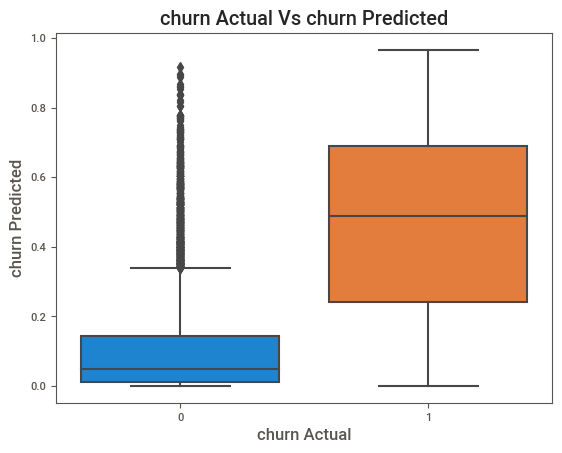

In [295]:
## Let check the spread of the probability of Churn Column
sns.boxplot(x=df_logis['churn'],y=y_prob_pred_4)
plt.xlabel('churn');
plt.title('churn Actual Vs churn Predicted')
plt.xlabel('churn Actual')
plt.ylabel('churn Predicted')

### Classification Report

In [296]:
## Lets assume cut-off at 0.5

y_class_pred=(y_prob_pred_4>=0.5).astype(int)

In [297]:
print(metrics.classification_report(df_logis['churn'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.903     0.968     0.934      8840
           1      0.754     0.485     0.590      1786

    accuracy                          0.887     10626
   macro avg      0.828     0.726     0.762     10626
weighted avg      0.878     0.887     0.876     10626



### Base Model

* Accuracy  = 0.887

* precision = 0.754

* recall    = 0.485

* f1-score  = 0.590

### Model Evaluation on Data at cut-off 0.5 using Confusion Matrix heatmap and AUC-ROC curve

0.5 

Accuracy Score 0.8868
F1 Score 0.5901 

True Negative: 8557 
False Positives: 283 
False Negatives: 920 
True Positives: 866 

Confusion Matrix :



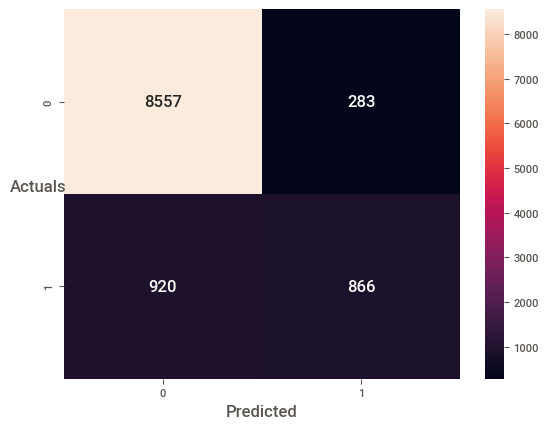

<Figure size 400x300 with 0 Axes>

In [298]:
sns.heatmap((metrics.confusion_matrix(df_logis['churn'],y_class_pred)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
print("0.5",'\n')
print('Accuracy Score',round(metrics.accuracy_score(df_logis['churn'],y_class_pred),4))
print('F1 Score',round(metrics.f1_score(df_logis['churn'],y_class_pred),4),'\n')
plt.figure(figsize=(4,3))

tn, fp, fn, tp = metrics.confusion_matrix(df_logis['churn'],y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n')

print('Confusion Matrix :''\n')

### Calculate the Area Under the Curve (AUC) of the Receiver Operating Characteristic (ROC) curve

AUC: 0.876


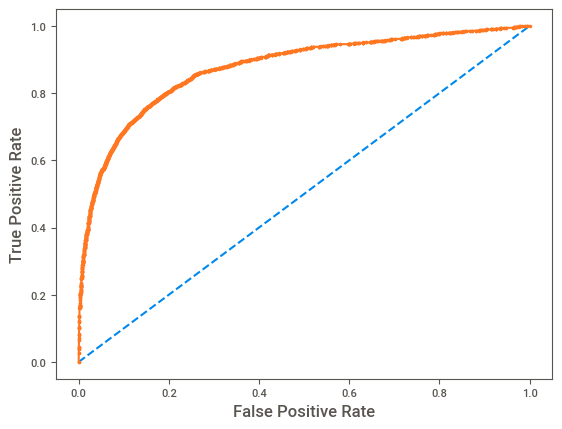

In [299]:
# calculate AUC
auc = metrics.roc_auc_score(df_logis['churn'],y_prob_pred_4)
print('AUC: %.3f' % auc)

# # calculate roc curve
# from sklearn.metrics import roc_curve

fpr, tpr, thresholds = metrics.roc_curve(df_logis['churn'],y_prob_pred_4)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model

plt.plot(fpr, tpr, marker='.')

# show the plot

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

**Observation**

* AUC - 0.876
* A high AUC value indicates a good classifier that has a high true positive rate and a low false positive rate.

**Thus from the above we have got our base values which we can use for comparing with other models**

### Feature Selection - Information Gain 

For Feature Selection Information Gain we are using Mutual Info Regression which will tell us which how much each column is contributing/ how much information each column is giving to model. 

In [300]:
from sklearn.feature_selection import mutual_info_regression

# Determine Mutual Information Gain

mutual_info = mutual_info_regression(X_train,y_train)
mutual_info

array([0.12043623, 0.        , 0.        , 0.        , 0.00374192,
       0.00922329, 0.00715113, 0.03445102, 0.00604272, 0.0058183 ,
       0.01527347, 0.01815663, 0.        , 0.        , 0.00121852,
       0.        , 0.        , 0.02669644, 0.03260186, 0.0104882 ,
       0.00300536])

In [301]:
# Convert into Series
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

tenure                     0.120436
complain_ly                0.034451
account_segment_Super      0.032602
account_segment_Regular    0.026696
cashback                   0.018157
day_since_cc_connect       0.015273
marital_status_Single      0.010488
cc_agent_score             0.009223
rev_per_month              0.007151
rev_growth_yoy             0.006043
coupon_used_for_payment    0.005818
account_user_count         0.003742
login_device_Mobile        0.003005
payment_E wallet           0.001219
city_tier                  0.000000
payment_Credit Card        0.000000
payment_Debit Card         0.000000
payment_UPI                0.000000
gender_Male                0.000000
service_score              0.000000
cc_contacted_ly            0.000000
dtype: float64

<AxesSubplot:>

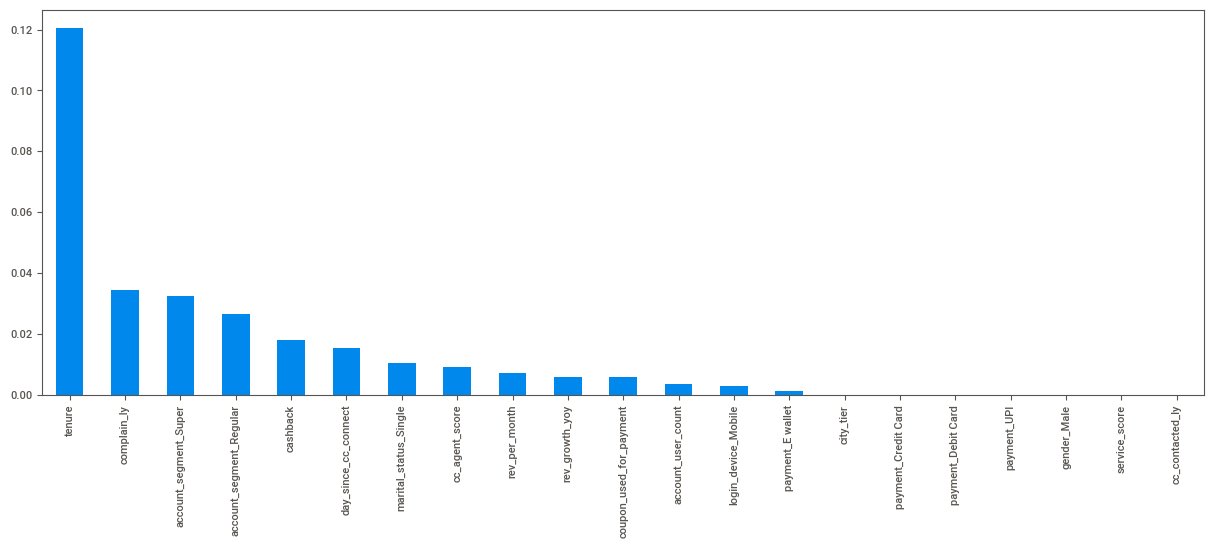

In [302]:
mutual_info.sort_values(ascending = False).plot.bar(figsize = (15,5))

**Observation**

* Tenure is contributing the Highest Mutual Info Regression

## Shap

We are using SHAP values in order to find out which column is important according to our Logistic Regression Model 

In [303]:
# pip install shap

In [304]:
import shap

In [305]:
from sklearn.linear_model import LogisticRegression

In [306]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
explainer = shap.LinearExplainer(logmodel,X, feature_dependence="independent")

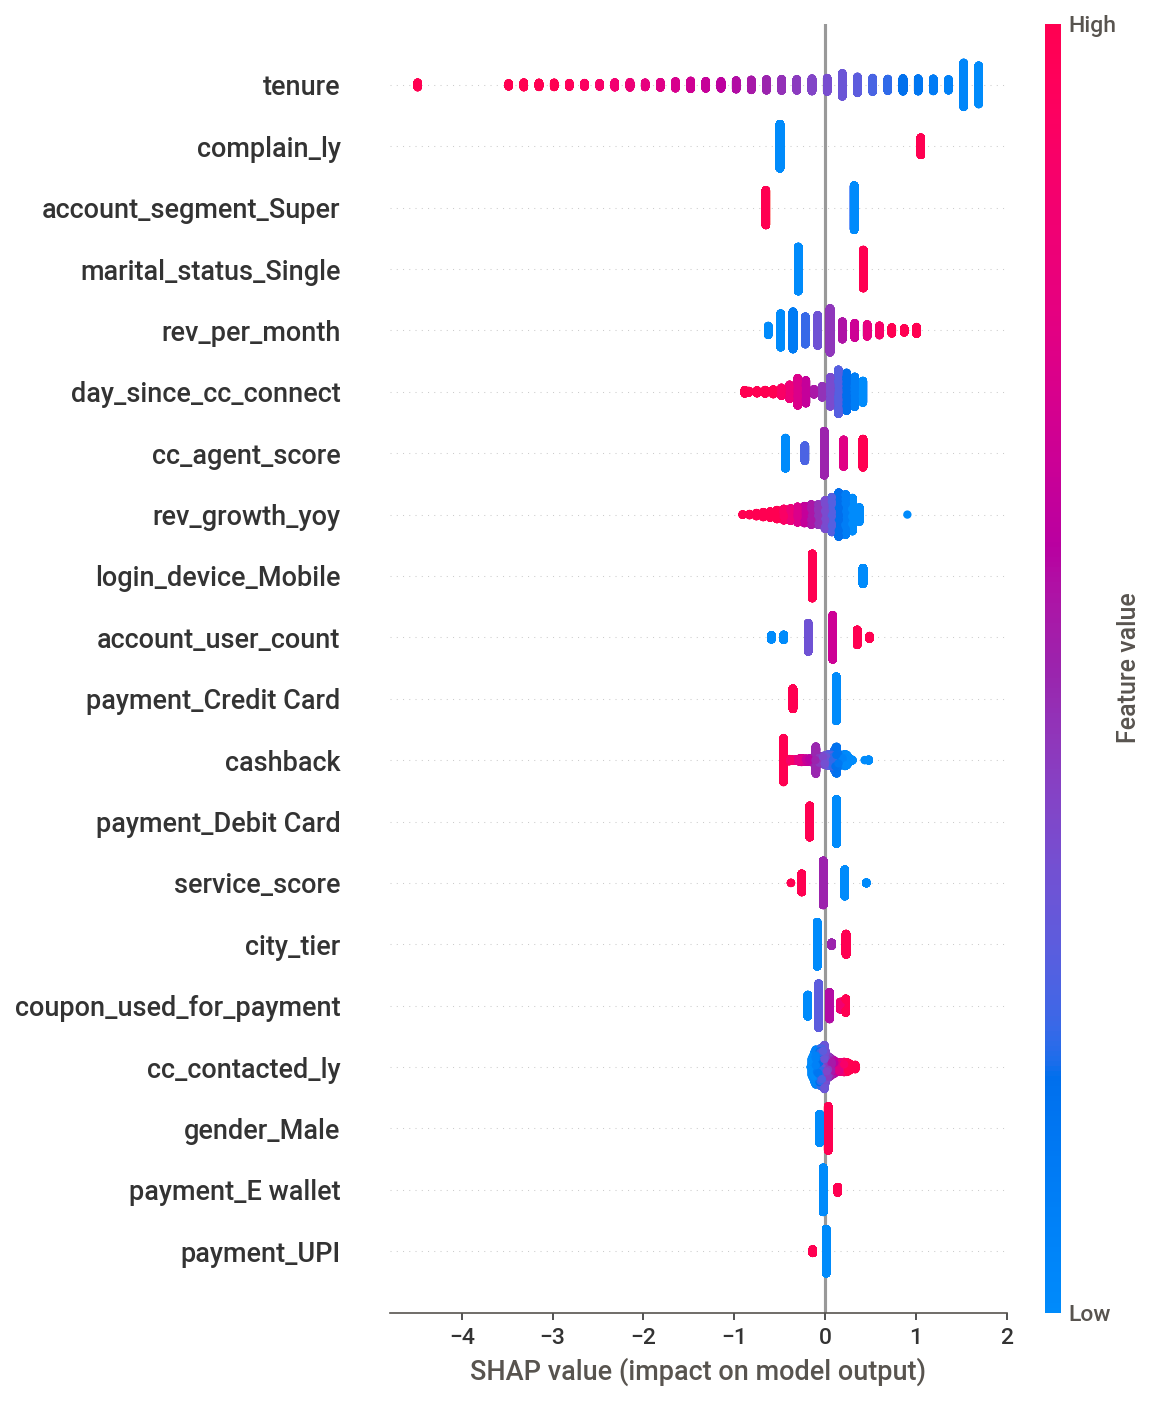

In [307]:
shap_values = explainer.shap_values(X_train)

plt.figure(figsize = (10,8),dpi = 150)

shap.summary_plot(shap_values,X_train,feature_names = X_train.columns)
plt.show();

**Observation**

* According to SHAP values Logistic Regession Model clearly says that Tenure is an important column and also from the feature selection we could see that Tenure contribution is highest in our Base Model.

## MODEL BUILDING

Total 9 models we are going to build:

    * Logistic_Regression
    * KNN
    * Bagging
    * XGBoost
    * Support_Vector_Machine
    * Naive_Bayes
    * Decision_Tree
    * Extra_Trees_Classifier
    * Linear_Discriminant_Analysis'

From the above 9 we will check which model has the highest F-1 score plus we will also do hypetuning in each model.

In [308]:
df.columns

Index(['churn', 'tenure', 'city_tier', 'cc_contacted_ly', 'payment', 'gender',
       'service_score', 'account_user_count', 'account_segment',
       'cc_agent_score', 'marital_status', 'rev_per_month', 'complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'day_since_cc_connect',
       'cashback', 'login_device', 'tenure_bin', 'cc_contacted_ly_bin',
       'noise_index', 'rev_per_month_bin', 'coupon_used_for_payment_bin',
       'day_since_cc_connect_bin', 'cashback_percen', 'cashback_benefits'],
      dtype='object')

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10626 entries, 20000 to 31259
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   churn                        10626 non-null  int64   
 1   tenure                       10626 non-null  float64 
 2   city_tier                    10626 non-null  float64 
 3   cc_contacted_ly              10626 non-null  float64 
 4   payment                      10626 non-null  object  
 5   gender                       10626 non-null  object  
 6   service_score                10626 non-null  float64 
 7   account_user_count           10626 non-null  float64 
 8   account_segment              10626 non-null  object  
 9   cc_agent_score               10626 non-null  float64 
 10  marital_status               10626 non-null  object  
 11  rev_per_month                10626 non-null  float64 
 12  complain_ly                  10626 non-null  float64 
 1

For our ananlysis we are not going to take catagorical dataype as the derived from its numerical dataype only plus we need to reduce MULTI-COLLINEARITY also.

### Ordinal Encoding the data

In [310]:
df['marital_status'].replace({'Single':0,'Married':1},inplace =True)

In [311]:
df['noise_index'].replace({'low_noise':1,'medium_noise':2,'high_noise':3},inplace =True)

In [312]:
df['cashback_percen'].replace({'low_discount':1,'medium_discount':2,'high_discount':3},inplace =True)

In [313]:
df['cashback_benefits'].replace({'low_benefit':1,'medium_benefit':2,'high_benefit':3},inplace =True)

In [314]:
df['gender'].replace({'Female':0,'Male':1},inplace =True)

### One-Hot Encoding

In [315]:
df = pd.get_dummies(df,columns = ['payment','account_segment','login_device'],drop_first=True)
df.head()

churn  tenure  city_tier  cc_contacted_ly  gender  service_score  \
AccountID                                                                     
20000          1    4.00        3.0              6.0       0            3.0   
20002          1    0.01        1.0             30.0       1            2.0   
20004          1    0.01        1.0             12.0       1            2.0   
20005          1    0.01        1.0             22.0       0            3.0   
20006          1    2.00        3.0             11.0       1            2.0   

           account_user_count  cc_agent_score  marital_status  rev_per_month  \
AccountID                                                                      
20000                     3.0             2.0               0            9.0   
20002                     4.0             3.0               0            6.0   
20004                     3.0             5.0               0            3.0   
20005                     4.0             5.0               0            2.0   
20006                     3.0             2.0               0            4.0   

           ...  day_since_cc_connect_bin  cashback_percen  cashback_benefits  \
AccountID  ...                                                                 
20000      ...                      5-10                2                  1   
20002      ...                       0-5                1                  2   
20004      ...                       0-5                1                  2   
20005      ...                      5-10                1                  2   
20006      ...                       0-5                1                  1   

           payment_Credit Card  payment_Debit Card payment_E wallet  \
AccountID                                                             
20000                        0                   1                0   
20002                        0                   1                0   
20004                        1                   0                0   
20005                        0                   1                0   
20006                        0                   0                0   

          payment_UPI  account_segment_Regular account_segment_Super  \
AccountID                                                              
20000               0                        0                     1   
20002               0                        1                     0   
20004               0                        1                     0   
20005               0                        1                     0   
20006               0                        0                     1   

          login_device_Mobile  
AccountID                      
20000                       1  
20002                       1  
20004                       1  
20005                       0  
20006                       1  

[5 rows x 30 columns]

### Model 1: LOGISTIC REGRESSION 

### Train-Test-Split


In [316]:
X = df.drop('churn', axis =1)
y = df['churn']

In [317]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.30)

#### VIF

In [318]:
df.columns

Index(['churn', 'tenure', 'city_tier', 'cc_contacted_ly', 'gender',
       'service_score', 'account_user_count', 'cc_agent_score',
       'marital_status', 'rev_per_month', 'complain_ly', 'rev_growth_yoy',
       'coupon_used_for_payment', 'day_since_cc_connect', 'cashback',
       'tenure_bin', 'cc_contacted_ly_bin', 'noise_index', 'rev_per_month_bin',
       'coupon_used_for_payment_bin', 'day_since_cc_connect_bin',
       'cashback_percen', 'cashback_benefits', 'payment_Credit Card',
       'payment_Debit Card', 'payment_E wallet', 'payment_UPI',
       'account_segment_Regular', 'account_segment_Super',
       'login_device_Mobile'],
      dtype='object')

In [319]:
df.rename(columns = {'payment_Credit Card':'payment_Credit_Card',
                          'payment_Debit Card' : 'payment_Debit_Card',
                           'payment_E wallet' :  'payment_E_wallet'}, inplace = True)

In [320]:
df.drop(['tenure_bin','cc_contacted_ly_bin','coupon_used_for_payment_bin','rev_per_month_bin','day_since_cc_connect_bin'],axis =1 ,inplace =True)

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10626 entries, 20000 to 31259
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   churn                    10626 non-null  int64  
 1   tenure                   10626 non-null  float64
 2   city_tier                10626 non-null  float64
 3   cc_contacted_ly          10626 non-null  float64
 4   gender                   10626 non-null  int64  
 5   service_score            10626 non-null  float64
 6   account_user_count       10626 non-null  float64
 7   cc_agent_score           10626 non-null  float64
 8   marital_status           10626 non-null  int64  
 9   rev_per_month            10626 non-null  float64
 10  complain_ly              10626 non-null  float64
 11  rev_growth_yoy           10626 non-null  float64
 12  coupon_used_for_payment  10626 non-null  float64
 13  day_since_cc_connect     10626 non-null  float64
 14  cashback          

In [322]:
vif_cal(input_data= df[['tenure', 'city_tier', 'cc_contacted_ly', 'gender',
       'service_score', 'account_user_count', 'cc_agent_score',
       'marital_status', 'rev_per_month', 'complain_ly', 'rev_growth_yoy',
       'coupon_used_for_payment', 'day_since_cc_connect', 'cashback',
       'noise_index', 'cashback_percen', 'cashback_benefits',
       'payment_Credit_Card', 'payment_Debit_Card', 'payment_E_wallet',
       'payment_UPI', 'account_segment_Regular', 'account_segment_Super',
       'login_device_Mobile']])

tenure VIF =  1.65
city_tier VIF =  1.44
cc_contacted_ly VIF =  1.3
gender VIF =  1.02
service_score VIF =  1.22
account_user_count VIF =  1.13
cc_agent_score VIF =  1.02
marital_status VIF =  1.02
rev_per_month VIF =  1.38
complain_ly VIF =  1.01
rev_growth_yoy VIF =  1.02
coupon_used_for_payment VIF =  1.2
day_since_cc_connect VIF =  1.25
cashback VIF =  1.06
noise_index VIF =  3.25
cashback_percen VIF =  1.42
cashback_benefits VIF =  2.19
payment_Credit_Card VIF =  3.17
payment_Debit_Card VIF =  3.38
payment_E_wallet VIF =  2.34
payment_UPI VIF =  1.7
account_segment_Regular VIF =  2.51
account_segment_Super VIF =  2.27
login_device_Mobile VIF =  1.01



**We can consider a rule of thumb that if vif is greater than 5, we can choose to drop the variable as there can be a problem of multicollinearity. This essentially means that we can choose to drop a predictor variable whose 80% variation is being explained by the other predictor variables.**

### LR Model 1

In [323]:
df.columns

Index(['churn', 'tenure', 'city_tier', 'cc_contacted_ly', 'gender',
       'service_score', 'account_user_count', 'cc_agent_score',
       'marital_status', 'rev_per_month', 'complain_ly', 'rev_growth_yoy',
       'coupon_used_for_payment', 'day_since_cc_connect', 'cashback',
       'noise_index', 'cashback_percen', 'cashback_benefits',
       'payment_Credit_Card', 'payment_Debit_Card', 'payment_E_wallet',
       'payment_UPI', 'account_segment_Regular', 'account_segment_Super',
       'login_device_Mobile'],
      dtype='object')

In [324]:
f_1 ='churn ~ tenure + city_tier + cc_contacted_ly + gender + service_score + account_user_count + cc_agent_score + marital_status + rev_per_month + complain_ly + rev_growth_yoy + coupon_used_for_payment + day_since_cc_connect + cashback + noise_index + cashback_percen + cashback_benefits + payment_Credit_Card + payment_Debit_Card + payment_E_wallet+ payment_UPI + account_segment_Regular + account_segment_Super + login_device_Mobile'

In [325]:
model_1 = sm.logit(formula =f_1, data =df).fit()
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.303411
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                10626
Model:                          Logit   Df Residuals:                    10601
Method:                           MLE   Df Model:                           24
Date:                Sun, 05 Mar 2023   Pseudo R-squ.:                  0.3300
Time:                        08:55:09   Log-Likelihood:                -3224.0
converged:                       True   LL-Null:                       -4811.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -7.5742      0.403    -18.816      0.000      -8.363      -6.785
tenure                     -0.0632      0.007     -9.556      0.000      -0.076      -0.050
city_tier                   0.4007      0.042      9.650      0.000       0.319       0.482
cc_contacted_ly             0.0269      0.004      7.136      0.000       0.019       0.034
gender                      0.2549      0.067      3.821      0.000       0.124       0.386
service_score               0.1902      0.052      3.674      0.000       0.089       0.292
account_user_count          0.4816      0.037     13.081      0.000       0.409       0.554
cc_agent_score              0.2737      0.024     11.229      0.000       0.226       0.321
marital_status             -0.8042      0.065    -12.280      0.000      -0.933      -0.676
rev_per_month              -0.0037      0.003     -1.325      0.185      -0.009       0.002
complain_ly                 1.6114      0.067     23.951      0.000       1.480       1.743
rev_growth_yoy             -0.0251      0.009     -2.840      0.005      -0.042      -0.008
coupon_used_for_payment     0.1231      0.018      6.967      0.000       0.088       0.158
day_since_cc_connect       -0.0692      0.011     -6.060      0.000      -0.092      -0.047
cashback                -8.739e-05      0.000     -0.454      0.650      -0.000       0.000
noise_index                 0.2263      0.126      1.793      0.073      -0.021       0.474
cashback_percen             0.6768      0.075      8.978      0.000       0.529       0.825
cashback_benefits           1.4644      0.140     10.451      0.000       1.190       1.739
payment_Credit_Card        -0.6184      0.115     -5.366      0.000      -0.844      -0.393
payment_Debit_Card         -0.4146      0.111     -3.729      0.000      -0.632      -0.197
payment_E_wallet           -0.0597      0.142     -0.421      0.674      -0.338       0.218
payment_UPI                -0.6301      0.158     -4.001      0.000      -0.939      -0.321
account_segment_Regular     0.2824      0.104      2.726      0.006       0.079       0.485
account_segment_Super      -0.8783      0.103     -8.530      0.000      -1.080      -0.676
login_device_Mobile        -0.4531      0.071     -6.416      0.000      -0.592      -0.315
===========================================================================================
"""

**Observation**

* We can clearly see that payment_E_wallet > 0.05 which says that this column is not significant for model. Thus we will remove this column in our LR Model 2

In [326]:
print('The adjusted pseudo R-square value is', 1 - ((model_1.llf - model_1.df_model)/model_1.llnull))

The adjusted pseudo R-square value is 0.3249728985773931


### LR Model 2 (dropping payment_E_wallet)

In [327]:
f_2 ='churn ~ tenure + city_tier + cc_contacted_ly + gender + service_score + account_user_count + cc_agent_score + marital_status + rev_per_month + complain_ly + rev_growth_yoy + coupon_used_for_payment + day_since_cc_connect + cashback + noise_index + cashback_percen + cashback_benefits + payment_Credit_Card + payment_Debit_Card + payment_UPI + account_segment_Regular + account_segment_Super + login_device_Mobile'

In [328]:
model_2 = sm.logit(formula =f_2, data =df).fit()
model_2.summary()

Optimization terminated successfully.
         Current function value: 0.303420
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                10626
Model:                          Logit   Df Residuals:                    10602
Method:                           MLE   Df Model:                           23
Date:                Sun, 05 Mar 2023   Pseudo R-squ.:                  0.3299
Time:                        08:55:09   Log-Likelihood:                -3224.1
converged:                       True   LL-Null:                       -4811.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -7.5950      0.400    -19.005      0.000      -8.378      -6.812
tenure                     -0.0633      0.007     -9.582      0.000      -0.076      -0.050
city_tier                   0.3952      0.039     10.017      0.000       0.318       0.472
cc_contacted_ly             0.0269      0.004      7.132      0.000       0.019       0.034
gender                      0.2554      0.067      3.829      0.000       0.125       0.386
service_score               0.1895      0.052      3.663      0.000       0.088       0.291
account_user_count          0.4819      0.037     13.090      0.000       0.410       0.554
cc_agent_score              0.2736      0.024     11.230      0.000       0.226       0.321
marital_status             -0.8049      0.065    -12.295      0.000      -0.933      -0.677
rev_per_month              -0.0037      0.003     -1.330      0.183      -0.009       0.002
complain_ly                 1.6111      0.067     23.947      0.000       1.479       1.743
rev_growth_yoy             -0.0251      0.009     -2.842      0.004      -0.042      -0.008
coupon_used_for_payment     0.1235      0.018      7.001      0.000       0.089       0.158
day_since_cc_connect       -0.0691      0.011     -6.052      0.000      -0.091      -0.047
cashback                -8.739e-05      0.000     -0.454      0.650      -0.000       0.000
noise_index                 0.2263      0.126      1.793      0.073      -0.021       0.474
cashback_percen             0.6783      0.075      9.010      0.000       0.531       0.826
cashback_benefits           1.4644      0.140     10.453      0.000       1.190       1.739
payment_Credit_Card        -0.5908      0.095     -6.226      0.000      -0.777      -0.405
payment_Debit_Card         -0.3858      0.088     -4.390      0.000      -0.558      -0.214
payment_UPI                -0.6011      0.142     -4.241      0.000      -0.879      -0.323
account_segment_Regular     0.2841      0.103      2.745      0.006       0.081       0.487
account_segment_Super      -0.8790      0.103     -8.540      0.000      -1.081      -0.677
login_device_Mobile        -0.4539      0.071     -6.429      0.000      -0.592      -0.316
===========================================================================================
"""

**Observation**

We can clearly see that cashback > 0.05 which says that this column is not significant for model. Thus we will remove this column in our LR Model 3

In [329]:
print('The adjusted pseudo R-square value is', 1 - ((model_2.llf - model_2.df_model)/model_2.llnull))

The adjusted pseudo R-square value is 0.325162315739004


In [330]:
vif_cal(input_data= df[['tenure', 'city_tier', 'cc_contacted_ly', 'gender',
       'service_score', 'account_user_count', 'cc_agent_score',
       'marital_status', 'rev_per_month', 'complain_ly', 'rev_growth_yoy',
       'coupon_used_for_payment', 'day_since_cc_connect', 'cashback',
       'noise_index', 'cashback_percen', 'cashback_benefits',
       'payment_Credit_Card', 'payment_Debit_Card',
       'payment_UPI', 'account_segment_Regular', 'account_segment_Super',
       'login_device_Mobile']])

tenure VIF =  1.65
city_tier VIF =  1.26
cc_contacted_ly VIF =  1.3
gender VIF =  1.02
service_score VIF =  1.22
account_user_count VIF =  1.13
cc_agent_score VIF =  1.02
marital_status VIF =  1.02
rev_per_month VIF =  1.38
complain_ly VIF =  1.01
rev_growth_yoy VIF =  1.02
coupon_used_for_payment VIF =  1.2
day_since_cc_connect VIF =  1.25
cashback VIF =  1.06
noise_index VIF =  3.25
cashback_percen VIF =  1.42
cashback_benefits VIF =  2.19
payment_Credit_Card VIF =  2.05
payment_Debit_Card VIF =  2.07
payment_UPI VIF =  1.34
account_segment_Regular VIF =  2.51
account_segment_Super VIF =  2.27
login_device_Mobile VIF =  1.01


### LR Model 3 (dropping cashback)

In [331]:
f_3 ='churn ~ tenure + city_tier + cc_contacted_ly + gender + service_score + account_user_count + cc_agent_score + marital_status + rev_per_month + complain_ly + rev_growth_yoy + coupon_used_for_payment + day_since_cc_connect + noise_index + cashback_percen + cashback_benefits + payment_Credit_Card + payment_Debit_Card + payment_UPI + account_segment_Regular + account_segment_Super + login_device_Mobile'

In [332]:
model_3 = sm.logit(formula =f_3, data =df).fit()
model_3.summary()

Optimization terminated successfully.
         Current function value: 0.303429
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                10626
Model:                          Logit   Df Residuals:                    10603
Method:                           MLE   Df Model:                           22
Date:                Sun, 05 Mar 2023   Pseudo R-squ.:                  0.3299
Time:                        08:55:10   Log-Likelihood:                -3224.2
converged:                       True   LL-Null:                       -4811.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -7.6098      0.398    -19.104      0.000      -8.391      -6.829
tenure                     -0.0633      0.007     -9.580      0.000      -0.076      -0.050
city_tier                   0.3951      0.039     10.017      0.000       0.318       0.472
cc_contacted_ly             0.0268      0.004      7.119      0.000       0.019       0.034
gender                      0.2531      0.067      3.805      0.000       0.123       0.383
service_score               0.1880      0.052      3.641      0.000       0.087       0.289
account_user_count          0.4813      0.037     13.084      0.000       0.409       0.553
cc_agent_score              0.2738      0.024     11.241      0.000       0.226       0.322
marital_status             -0.8049      0.065    -12.296      0.000      -0.933      -0.677
rev_per_month              -0.0038      0.003     -1.351      0.177      -0.009       0.002
complain_ly                 1.6114      0.067     23.951      0.000       1.480       1.743
rev_growth_yoy             -0.0252      0.009     -2.846      0.004      -0.043      -0.008
coupon_used_for_payment     0.1233      0.018      6.992      0.000       0.089       0.158
day_since_cc_connect       -0.0692      0.011     -6.060      0.000      -0.092      -0.047
noise_index                 0.2357      0.125      1.892      0.058      -0.008       0.480
cashback_percen             0.6816      0.075      9.095      0.000       0.535       0.828
cashback_benefits           1.4513      0.137     10.587      0.000       1.183       1.720
payment_Credit_Card        -0.5913      0.095     -6.231      0.000      -0.777      -0.405
payment_Debit_Card         -0.3861      0.088     -4.394      0.000      -0.558      -0.214
payment_UPI                -0.6004      0.142     -4.237      0.000      -0.878      -0.323
account_segment_Regular     0.2869      0.103      2.779      0.005       0.085       0.489
account_segment_Super      -0.8788      0.103     -8.539      0.000      -1.081      -0.677
login_device_Mobile        -0.4544      0.071     -6.438      0.000      -0.593      -0.316
===========================================================================================
"""

**Observation**

We can clearly see that rev_per_month > 0.05 which says that this column is not significant for model. Thus we will remove this column in our LR Model 4

In [333]:
print('The adjusted pseudo R-square value is', 1 - ((model_3.llf - model_3.df_model)/model_3.llnull))

The adjusted pseudo R-square value is 0.3253484536496226


In [334]:
vif_cal(input_data= df[['tenure', 'city_tier', 'cc_contacted_ly', 'gender',
       'service_score', 'account_user_count', 'cc_agent_score',
       'marital_status', 'rev_per_month', 'complain_ly', 'rev_growth_yoy',
       'coupon_used_for_payment', 'day_since_cc_connect',
       'noise_index', 'cashback_percen', 'cashback_benefits',
       'payment_Credit_Card', 'payment_Debit_Card',
       'payment_UPI', 'account_segment_Regular', 'account_segment_Super',
       'login_device_Mobile']])

tenure VIF =  1.65
city_tier VIF =  1.26
cc_contacted_ly VIF =  1.3
gender VIF =  1.01
service_score VIF =  1.22
account_user_count VIF =  1.13
cc_agent_score VIF =  1.02
marital_status VIF =  1.02
rev_per_month VIF =  1.38
complain_ly VIF =  1.01
rev_growth_yoy VIF =  1.02
coupon_used_for_payment VIF =  1.2
day_since_cc_connect VIF =  1.25
noise_index VIF =  3.21
cashback_percen VIF =  1.41
cashback_benefits VIF =  2.16
payment_Credit_Card VIF =  2.05
payment_Debit_Card VIF =  2.07
payment_UPI VIF =  1.34
account_segment_Regular VIF =  2.5
account_segment_Super VIF =  2.27
login_device_Mobile VIF =  1.01


### LR Model 4 (dropping rev_per_month)

In [335]:
f_4 ='churn ~ tenure + city_tier + cc_contacted_ly + gender + service_score + account_user_count + cc_agent_score + marital_status + complain_ly + rev_growth_yoy + coupon_used_for_payment + day_since_cc_connect + noise_index + cashback_percen + cashback_benefits + payment_Credit_Card + payment_Debit_Card + payment_UPI + account_segment_Regular + account_segment_Super + login_device_Mobile'

In [336]:
model_4 = sm.logit(formula =f_4, data =df).fit()
model_4.summary()

Optimization terminated successfully.
         Current function value: 0.303517
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                10626
Model:                          Logit   Df Residuals:                    10604
Method:                           MLE   Df Model:                           21
Date:                Sun, 05 Mar 2023   Pseudo R-squ.:                  0.3297
Time:                        08:55:12   Log-Likelihood:                -3225.2
converged:                       True   LL-Null:                       -4811.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -7.5584      0.396    -19.073      0.000      -8.335      -6.782
tenure                     -0.0632      0.007     -9.570      0.000      -0.076      -0.050
city_tier                   0.3944      0.039     10.002      0.000       0.317       0.472
cc_contacted_ly             0.0267      0.004      7.101      0.000       0.019       0.034
gender                      0.2534      0.067      3.811      0.000       0.123       0.384
service_score               0.1860      0.052      3.604      0.000       0.085       0.287
account_user_count          0.4802      0.037     13.056      0.000       0.408       0.552
cc_agent_score              0.2732      0.024     11.222      0.000       0.225       0.321
marital_status             -0.8019      0.065    -12.259      0.000      -0.930      -0.674
complain_ly                 1.6085      0.067     23.926      0.000       1.477       1.740
rev_growth_yoy             -0.0250      0.009     -2.832      0.005      -0.042      -0.008
coupon_used_for_payment     0.1232      0.018      6.990      0.000       0.089       0.158
day_since_cc_connect       -0.0699      0.011     -6.137      0.000      -0.092      -0.048
noise_index                 0.2382      0.125      1.911      0.056      -0.006       0.482
cashback_percen             0.6274      0.064      9.860      0.000       0.503       0.752
cashback_benefits           1.4502      0.137     10.576      0.000       1.181       1.719
payment_Credit_Card        -0.5936      0.095     -6.259      0.000      -0.779      -0.408
payment_Debit_Card         -0.3890      0.088     -4.430      0.000      -0.561      -0.217
payment_UPI                -0.6061      0.142     -4.279      0.000      -0.884      -0.328
account_segment_Regular     0.2953      0.103      2.865      0.004       0.093       0.497
account_segment_Super      -0.8721      0.103     -8.485      0.000      -1.074      -0.671
login_device_Mobile        -0.4538      0.071     -6.429      0.000      -0.592      -0.315
===========================================================================================
"""

**Observation**

We can clearly see that noise_index > 0.05 which says that this column is not significant for model. Thus we will remove this column in our LR Model 4

In [337]:
print('The adjusted pseudo R-square value is', 1 - ((model_4.llf - model_4.df_model)/model_4.llnull))

The adjusted pseudo R-square value is 0.3253633897885482


In [338]:
vif_cal(input_data= df[['tenure', 'city_tier', 'cc_contacted_ly', 'gender',
       'service_score', 'account_user_count', 'cc_agent_score',
       'marital_status','complain_ly', 'rev_growth_yoy',
       'coupon_used_for_payment', 'day_since_cc_connect',
       'noise_index', 'cashback_percen', 'cashback_benefits',
       'payment_Credit_Card', 'payment_Debit_Card',
       'payment_UPI', 'account_segment_Regular', 'account_segment_Super',
       'login_device_Mobile']])

tenure VIF =  1.65
city_tier VIF =  1.26
cc_contacted_ly VIF =  1.3
gender VIF =  1.01
service_score VIF =  1.21
account_user_count VIF =  1.13
cc_agent_score VIF =  1.02
marital_status VIF =  1.02
complain_ly VIF =  1.01
rev_growth_yoy VIF =  1.02
coupon_used_for_payment VIF =  1.2
day_since_cc_connect VIF =  1.24
noise_index VIF =  3.2
cashback_percen VIF =  1.03
cashback_benefits VIF =  2.16
payment_Credit_Card VIF =  2.05
payment_Debit_Card VIF =  2.07
payment_UPI VIF =  1.34
account_segment_Regular VIF =  2.49
account_segment_Super VIF =  2.26
login_device_Mobile VIF =  1.01


### LR Model 5 (dropping noise_index)

In [339]:
f_5 ='churn ~ tenure + city_tier + cc_contacted_ly + gender + service_score + account_user_count + cc_agent_score + marital_status + complain_ly + rev_growth_yoy + coupon_used_for_payment + day_since_cc_connect + cashback_percen + cashback_benefits + payment_Credit_Card + payment_Debit_Card + payment_UPI + account_segment_Regular + account_segment_Super + login_device_Mobile'

In [340]:
model_5 = sm.logit(formula =f_5, data =df).fit()
model_5.summary()

Optimization terminated successfully.
         Current function value: 0.303690
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                10626
Model:                          Logit   Df Residuals:                    10605
Method:                           MLE   Df Model:                           20
Date:                Sun, 05 Mar 2023   Pseudo R-squ.:                  0.3293
Time:                        08:55:13   Log-Likelihood:                -3227.0
converged:                       True   LL-Null:                       -4811.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -7.2771      0.367    -19.803      0.000      -7.997      -6.557
tenure                     -0.0709      0.005    -13.414      0.000      -0.081      -0.061
city_tier                   0.3912      0.039      9.930      0.000       0.314       0.468
cc_contacted_ly             0.0295      0.003      8.528      0.000       0.023       0.036
gender                      0.2508      0.066      3.773      0.000       0.120       0.381
service_score               0.1857      0.052      3.599      0.000       0.085       0.287
account_user_count          0.4758      0.037     12.968      0.000       0.404       0.548
cc_agent_score              0.2737      0.024     11.241      0.000       0.226       0.321
marital_status             -0.7992      0.065    -12.221      0.000      -0.927      -0.671
complain_ly                 1.6027      0.067     23.886      0.000       1.471       1.734
rev_growth_yoy             -0.0253      0.009     -2.866      0.004      -0.043      -0.008
coupon_used_for_payment     0.1226      0.018      6.953      0.000       0.088       0.157
day_since_cc_connect       -0.0697      0.011     -6.127      0.000      -0.092      -0.047
cashback_percen             0.6277      0.064      9.872      0.000       0.503       0.752
cashback_benefits           1.6453      0.093     17.740      0.000       1.464       1.827
payment_Credit_Card        -0.5952      0.095     -6.275      0.000      -0.781      -0.409
payment_Debit_Card         -0.3860      0.088     -4.396      0.000      -0.558      -0.214
payment_UPI                -0.6165      0.141     -4.357      0.000      -0.894      -0.339
account_segment_Regular     0.2998      0.103      2.906      0.004       0.098       0.502
account_segment_Super      -0.8617      0.103     -8.382      0.000      -1.063      -0.660
login_device_Mobile        -0.4602      0.071     -6.524      0.000      -0.598      -0.322
===========================================================================================
"""

**Observation**

We can clearly see that all the variables are now significant 

In [341]:
print('The adjusted pseudo R-square value is', 1 - ((model_5.llf - model_5.df_model)/model_5.llnull))

The adjusted pseudo R-square value is 0.32518932823158697


In [342]:
vif_cal(input_data= df[['tenure', 'city_tier', 'cc_contacted_ly', 'gender',
       'service_score', 'account_user_count', 'cc_agent_score',
       'marital_status','complain_ly', 'rev_growth_yoy',
       'coupon_used_for_payment', 'day_since_cc_connect',
       'cashback_percen', 'cashback_benefits',
       'payment_Credit_Card', 'payment_Debit_Card',
       'payment_UPI', 'account_segment_Regular', 'account_segment_Super',
       'login_device_Mobile']])

tenure VIF =  1.12
city_tier VIF =  1.26
cc_contacted_ly VIF =  1.02
gender VIF =  1.01
service_score VIF =  1.21
account_user_count VIF =  1.13
cc_agent_score VIF =  1.02
marital_status VIF =  1.02
complain_ly VIF =  1.01
rev_growth_yoy VIF =  1.02
coupon_used_for_payment VIF =  1.2
day_since_cc_connect VIF =  1.24
cashback_percen VIF =  1.03
cashback_benefits VIF =  1.23
payment_Credit_Card VIF =  2.05
payment_Debit_Card VIF =  2.07
payment_UPI VIF =  1.34
account_segment_Regular VIF =  2.48
account_segment_Super VIF =  2.26
login_device_Mobile VIF =  1.01


**Observation**

* Now all p values are less than 0.05. Hence all these attributes and their coeffficients have importance in deciding the target variable

* p values' indicate that all the variable are significant at 95% confidence level

In [343]:
model_5.params

Intercept                 -7.277126
tenure                    -0.070914
city_tier                  0.391190
cc_contacted_ly            0.029520
gender                     0.250765
service_score              0.185672
account_user_count         0.475809
cc_agent_score             0.273678
marital_status            -0.799235
complain_ly                1.602651
rev_growth_yoy            -0.025326
coupon_used_for_payment    0.122650
day_since_cc_connect      -0.069707
cashback_percen            0.627748
cashback_benefits          1.645274
payment_Credit_Card       -0.595209
payment_Debit_Card        -0.385967
payment_UPI               -0.616461
account_segment_Regular    0.299774
account_segment_Super     -0.861694
login_device_Mobile       -0.460167
dtype: float64

In [344]:
for i,j in np.array(model_5.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-7.28) * Intercept + (-0.07) * tenure + (0.39) * city_tier + (0.03) * cc_contacted_ly + (0.25) * gender + (0.19) * service_score + (0.48) * account_user_count + (0.27) * cc_agent_score + (-0.8) * marital_status + (1.6) * complain_ly + (-0.03) * rev_growth_yoy + (0.12) * coupon_used_for_payment + (-0.07) * day_since_cc_connect + (0.63) * cashback_percen + (1.65) * cashback_benefits + (-0.6) * payment_Credit_Card + (-0.39) * payment_Debit_Card + (-0.62) * payment_UPI + (0.3) * account_segment_Regular + (-0.86) * account_segment_Super + (-0.46) * login_device_Mobile + 

### Prediction on Data

In [345]:
y_prob_pred_5 = model_5.predict()
y_prob_pred_5

array([0.19985904, 0.85273741, 0.42144556, ..., 0.04590434, 0.02382152,
       0.006966  ])

Text(0, 0.5, 'churn Predicted')

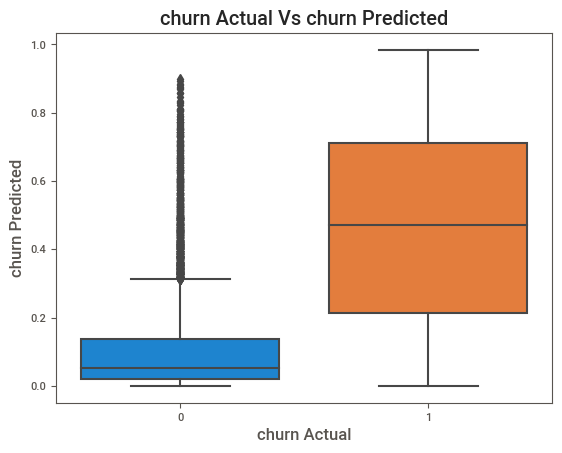

In [346]:
sns.boxplot(x=df['churn'],y=y_prob_pred_5)
plt.xlabel('churn');
plt.title('churn Actual Vs churn Predicted')
plt.xlabel('churn Actual')
plt.ylabel('churn Predicted')

**Observation :**

From the above boxplot, we need to decide on one such value of a cut-off which gives most resonable power of the model

### Choosing a different cut-off method for the predictions on the Probability Predictions Data

0.1 

Accuracy Score 0.7054
F1 Score 0.4989 

Confusion Matrix


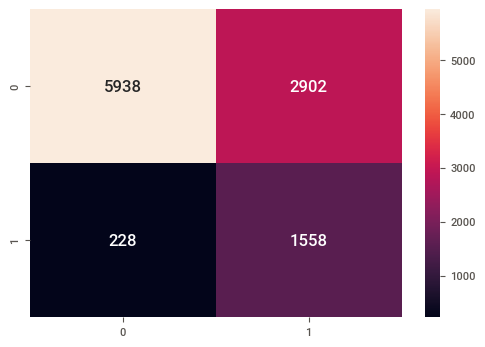

True Negative: 5938 
False Positives: 2902 
False Negatives: 228 
True Positives: 1558 


0.2 

Accuracy Score 0.8219
F1 Score 0.5908 

Confusion Matrix


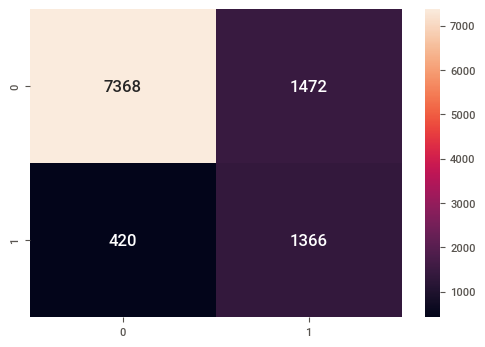

True Negative: 7368 
False Positives: 1472 
False Negatives: 420 
True Positives: 1366 


0.3 

Accuracy Score 0.864
F1 Score 0.6206 

Confusion Matrix


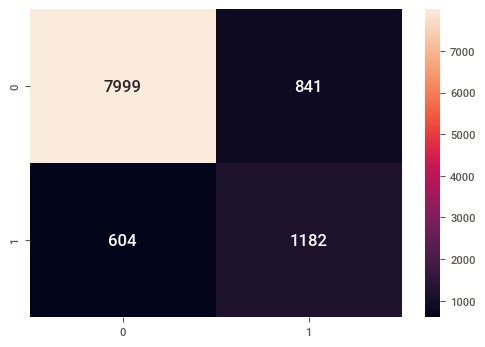

True Negative: 7999 
False Positives: 841 
False Negatives: 604 
True Positives: 1182 


0.4 

Accuracy Score 0.8819
F1 Score 0.6177 

Confusion Matrix


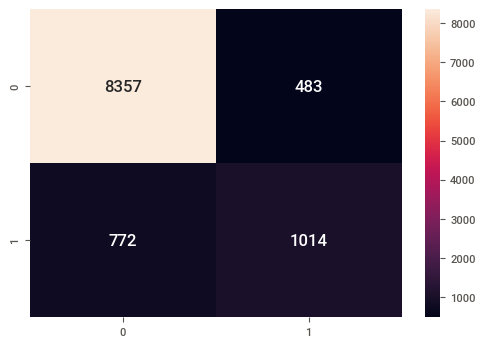

True Negative: 8357 
False Positives: 483 
False Negatives: 772 
True Positives: 1014 


0.5 

Accuracy Score 0.8875
F1 Score 0.5835 

Confusion Matrix


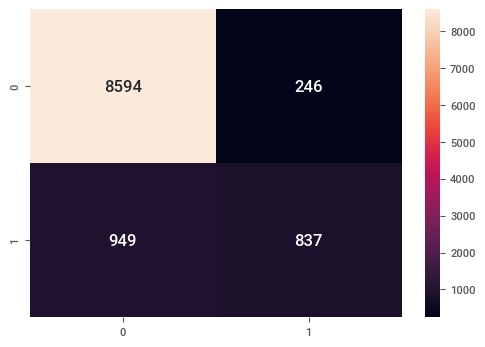

True Negative: 8594 
False Positives: 246 
False Negatives: 949 
True Positives: 837 


0.6 

Accuracy Score 0.8794
F1 Score 0.5025 

Confusion Matrix


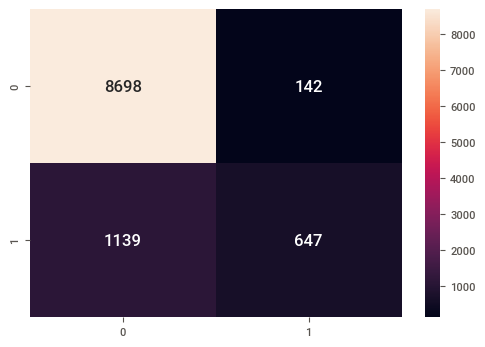

True Negative: 8698 
False Positives: 142 
False Negatives: 1139 
True Positives: 647 


0.7 

Accuracy Score 0.8698
F1 Score 0.4075 

Confusion Matrix


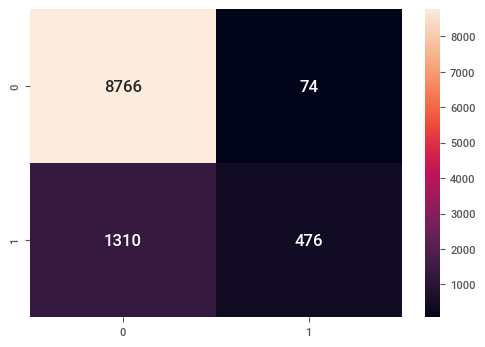

True Negative: 8766 
False Positives: 74 
False Negatives: 1310 
True Positives: 476 


0.8 

Accuracy Score 0.8551
F1 Score 0.2568 

Confusion Matrix


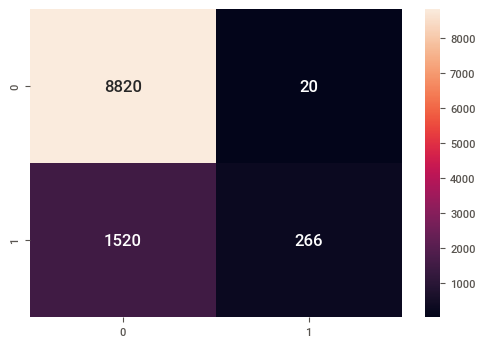

True Negative: 8820 
False Positives: 20 
False Negatives: 1520 
True Positives: 266 


0.9 

Accuracy Score 0.8419
F1 Score 0.1121 

Confusion Matrix


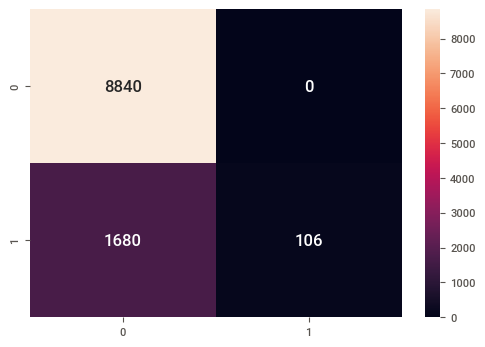

True Negative: 8840 
False Positives: 0 
False Negatives: 1680 
True Positives: 106 




In [347]:
for j in np.arange(0.1,1,0.1):
    churn_prob = j #defining the cut-off value of our choice
    churn_cutoff_data=[]#defining an empty list
    for i in range(0,len(df['churn'])):#defining a loop for the length of the test data
        if np.array(y_prob_pred_5[:])[i] >= churn_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1 #if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0 #if the probability values are less than the custom cutoff then the value should be 0
        churn_cutoff_data.append(a) #adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(df['churn'],churn_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(df['churn'],churn_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(df['churn'],churn_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();
    tn, fp, fn, tp = metrics.confusion_matrix(df['churn'],churn_cutoff_data).ravel()
    print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

### Let us take a cut-off at 0.4 for predict and check power of the model

In [348]:
y_class_pred=(y_prob_pred_5>=0.4).astype(int)

### Model Evaluation on Data at cut-off 0.4 using Confusion Matrix heatmap and AUC-ROC curve

0.4 

Accuracy Score 0.8819
F1 Score 0.6177 

True Negative: 8357 
False Positives: 483 
False Negatives: 772 
True Positives: 1014 

Confusion Matrix :



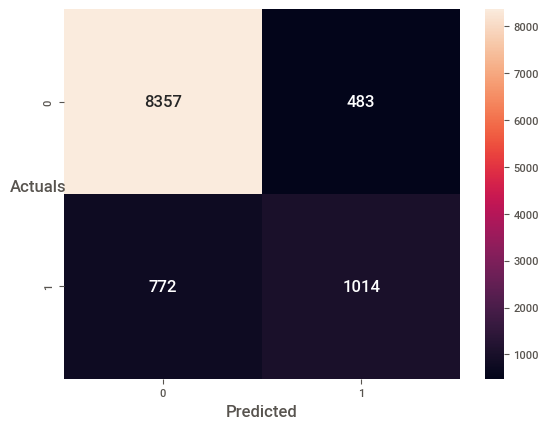

<Figure size 600x400 with 0 Axes>

In [349]:
sns.heatmap((metrics.confusion_matrix(df['churn'],y_class_pred)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
print("0.4",'\n')
print('Accuracy Score',round(metrics.accuracy_score(df['churn'],y_class_pred),4))
print('F1 Score',round(metrics.f1_score(df['churn'],y_class_pred),4),'\n')
plt.figure(figsize=(6,4))

tn, fp, fn, tp = metrics.confusion_matrix(df['churn'],y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n')

print('Confusion Matrix :''\n')

### Classification report at cut-off 0.04

In [350]:
print(metrics.classification_report(df['churn'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.915     0.945     0.930      8840
           1      0.677     0.568     0.618      1786

    accuracy                          0.882     10626
   macro avg      0.796     0.757     0.774     10626
weighted avg      0.875     0.882     0.878     10626



**Observation :**

With accuracy of 88.2% and recall rate of 56%, model is able to predict 88% of Customers which were actually Churned as Churned.

Precision is 67.7% of data which means, out of total customers predicted by model as churned , 67.7% employees actually Churned.

F1-score is the harmonic mean of precision and recall, it takes into the effect of both the scores and this value is low if any of these 2 value is low.

Since we are building a model to predict if whether customers will churn or not churn, for practical purposes, we will be more interested in correctly classifying 1 (Churn) than 0(Not-churned).

If a churned customer is incorrectly predicted to be "Not-Churned" by the model, then the impact on cost for the company would  be very high for the company. Its a loss of potential lead for the company. Hence F1 score (actual data point identified as True by model) is very important in this scenario.

As F1 score of test dataset is around 62% 

Thus our Company can target these churned customers for providing effective services.

AUC: 0.870


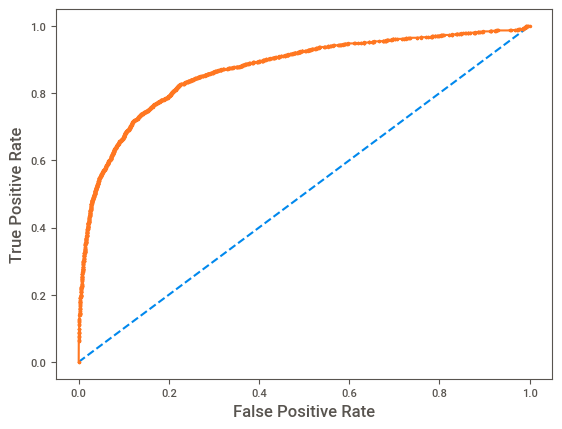

In [351]:
# AUC and ROC for the training data


# calculating on the basis of a person not churning
# calculate AUC
auc = metrics.roc_auc_score(df['churn'],y_prob_pred_5)
print('AUC: %.3f' % auc)

# # calculate roc curve
# from sklearn.metrics import roc_curve

fpr, tpr, thresholds = metrics.roc_curve(df['churn'],y_prob_pred_5)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model

plt.plot(fpr, tpr, marker='.')

# show the plot

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

### Creating user define function so to run model multiple times for different grid search parameters


In [352]:
def run_gridsearch(model,param_grid,X_train, train_labels,cv_value=5,scoring_value='f1'):
    grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = cv_value, n_jobs =-1,scoring=scoring_value)
    print ("\n Running grid search\n")
    grid_search.fit(X_train, train_labels)
    print ("\n Showing best parameters for the grid search\n")
    print (grid_search.best_params_)
    return grid_search

In [353]:
def check_performance(grid_search,X_train, X_test, train_labels, test_labels):
    best_grid = grid_search.best_estimator_
    ytrain_predict = best_grid.predict(X_train)
    ytest_predict = best_grid.predict(X_test)
    print("\n Classification Report for Train dataset\n")
    print(classification_report(train_labels,ytrain_predict))
    print("\n Classification Report for Test dataset\n")
    print(classification_report(test_labels,ytest_predict))

### Only for Predictive purposes of Logistic Regression

If we only wanted to predict using Logistic Regression and was not looking for the model building aspect of it, we can do that as well.

First we will split the data into train and test. We will build the model on the training data and check the the model performance metrics on the test data. 

In [354]:
X = df.drop('churn',axis = 1)

y = df['churn']

In [355]:
### Split the data into train and test (70:30)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [356]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    4.2s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [357]:
# Predicting on Training and Test dataset

ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [358]:
# Getting the Predicted Classes and Probs

ytest_predict_prob=model.predict_proba(X_test)

In [359]:
# ytest_predict_prob = (ytest_predict_prob>=0.4).astype(int)

#### Probability of AUC and ROC for the training data & test data

AUC for Train dataset: 0.870
AUC for test dataset: 0.870


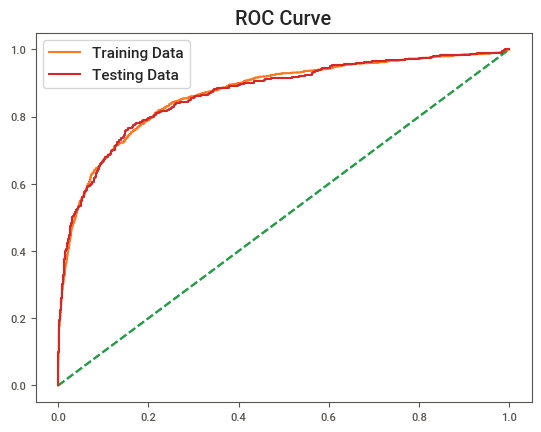

In [360]:
# predict probabilities
probs_train = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_train = probs_train[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs_train)
print('AUC for Train dataset: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr,label = 'Training Data')

# predict probabilities
probs_test = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs_test,)
print('AUC for test dataset: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr,label = 'Testing Data')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

#### Confusion Matrix for the training data and testing data

In [361]:
confusion_matrix(y_train, ytrain_predict)

array([[6007,  181],
       [ 674,  576]], dtype=int64)

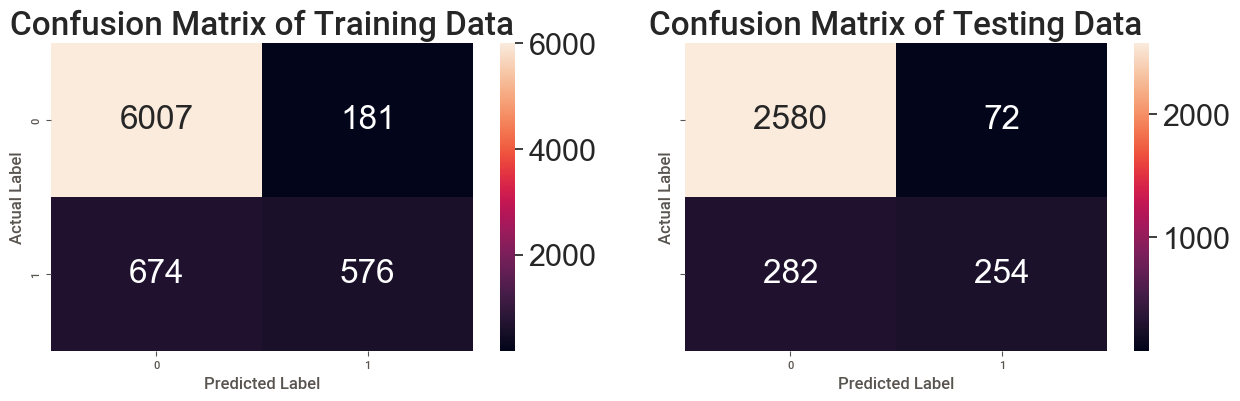

In [362]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (15,4))

#Plotting confusion matrix for the different models for the Training Data
sns.set(font_scale=2)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][1].set(xlabel = "Predicted Label",ylabel="Actual Label");

In [363]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.90      0.97      0.93      6188
           1       0.76      0.46      0.57      1250

    accuracy                           0.89      7438
   macro avg       0.83      0.72      0.75      7438
weighted avg       0.88      0.89      0.87      7438
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.90      0.97      0.94      2652
           1       0.78      0.47      0.59       536

    accuracy                           0.89      3188
   macro avg       0.84      0.72      0.76      3188
weighted avg       0.88      0.89      0.88      3188
 



In [364]:
log_reg=(pd.DataFrame({'Train Accuracy': 89 ,'Test Accuracy': 89,
                                 'Train AUC':87,'Test AUC': 87,
                                 'Train Recall':46,'Test Recall': 47,
                                 'Train precision':76,'Test precision': 78,
                                 'Train f1':57,'Test f1': 59},
            index=['Logistic Regression']))
print('\nClassification Report Train and Test Summary : ')
log_reg


Classification Report Train and Test Summary : 


Train Accuracy  Test Accuracy  Train AUC  Test AUC  \
Logistic Regression              89             89         87        87   

                     Train Recall  Test Recall  Train precision  \
Logistic Regression            46           47               76   

                     Test precision  Train f1  Test f1  
Logistic Regression              78        57       59

**Obervation**

Logistic regression Model seems good with Good Accuracy but not with Recall , Precision and F1 Scores

Especially F1 score is not good we need improvement in it. 

#### Applying GridSearchCV for Logistic Regression

In [365]:
grid={'penalty':['l2','none','l1'],   
      'solver':['lbfgs','liblinear','newton-cg'],   # 'newton-cg',
      'tol':[0.0001,0.00001]}

lr_model = LogisticRegression(max_iter=10000,n_jobs=-1)

In [366]:
cv_value=3
grid_search = run_gridsearch(lr_model,grid,X_train, y_train,cv_value)
check_performance(grid_search,X_train, X_test, y_train, y_test)


 Running grid search


 Showing best parameters for the grid search

{'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001}

 Classification Report for Train dataset

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      6188
           1       0.76      0.46      0.57      1250

    accuracy                           0.88      7438
   macro avg       0.83      0.71      0.75      7438
weighted avg       0.88      0.88      0.87      7438


 Classification Report for Test dataset

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      2652
           1       0.78      0.47      0.59       536

    accuracy                           0.89      3188
   macro avg       0.84      0.72      0.76      3188
weighted avg       0.88      0.89      0.88      3188



In [367]:
log_reg_model = LogisticRegression(penalty = 'l2', solver = 'lbfgs', tol = 0.0001)
log_reg_model = log_reg_model.fit(X_train, y_train)

In [368]:
# Training Data Probability Prediction
pred_prob_train = log_reg_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = log_reg_model.predict_proba(X_test)

AUC for the Training Data: 0.856
AUC for the Test Data: 0.858


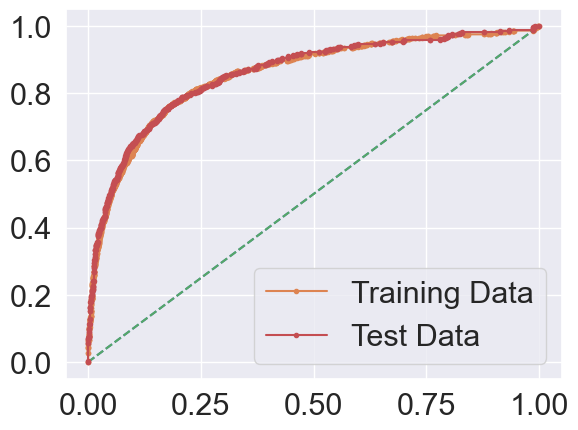

In [369]:
 # AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [370]:
log_reg_tuned=(pd.DataFrame({'Train Accuracy': 89 ,'Test Accuracy': 89,
                                 'Train AUC':86,'Test AUC': 86,
                                 'Train Recall':46,'Test Recall': 47,
                                 'Train precision':76,'Test precision': 78,
                                 'Train f1':57,'Test f1': 58},
            index=['Logistic Regression Tuned']))
print('\nClassification Report Train and Test Summary : ')
log_reg_tuned


Classification Report Train and Test Summary : 


Train Accuracy  Test Accuracy  Train AUC  Test AUC  \
Logistic Regression Tuned              89             89         86        86   

                           Train Recall  Test Recall  Train precision  \
Logistic Regression Tuned            46           47               76   

                           Test precision  Train f1  Test f1  
Logistic Regression Tuned              78        57       58

### Logistic Regresssion Summary:

In [371]:
log_r = [log_reg,log_reg_tuned]
log_r_result = pd.concat(log_r)
log_r_result

Train Accuracy  Test Accuracy  Train AUC  Test AUC  \
Logistic Regression                    89             89         87        87   
Logistic Regression Tuned              89             89         86        86   

                           Train Recall  Test Recall  Train precision  \
Logistic Regression                  46           47               76   
Logistic Regression Tuned            46           47               76   

                           Test precision  Train f1  Test f1  
Logistic Regression                    78        57       59  
Logistic Regression Tuned              78        57       58

**Observation**

* Even after Logistic regression model tuning results seems similar not much change

* No improvement after tuning also 

### Model 2: KNN

In [372]:
X = df.drop('churn',axis = 1)

y = df['churn']

In [373]:
### Split the data into train and test (70:30)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [374]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [375]:
## Knn Model 
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier() # Default parameters of KNN 

In [376]:
# Fitting the KNN Model

KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [377]:
# Performance Matrix on the train data

y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train,y_train)

print('Accuracy Score Train : ',model_score)
print('\nConfusion matrix Train : ')
print(metrics.confusion_matrix(y_train, y_train_predict))
print('\nClassification Report Train : ')
print(metrics.classification_report(y_train, y_train_predict))

Accuracy Score Train :  0.958187684861522

Confusion matrix Train : 
[[6070   95]
 [ 216 1057]]

Classification Report Train : 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      6165
           1       0.92      0.83      0.87      1273

    accuracy                           0.96      7438
   macro avg       0.94      0.91      0.92      7438
weighted avg       0.96      0.96      0.96      7438



Accuracy Score 0.9582
F1 Score 0.8718 

True Negative: 6070 
False Positives: 95 
False Negatives: 216 
True Positives: 1057 

Confusion Matrix Train :



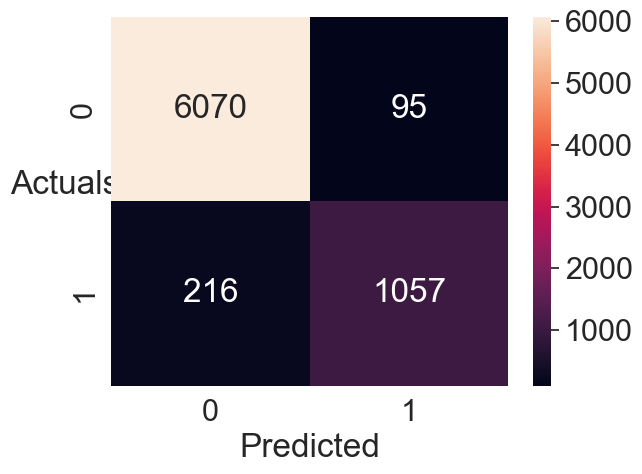

<Figure size 300x300 with 0 Axes>

In [378]:
sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

print('Accuracy Score',round(metrics.accuracy_score(y_train,y_train_predict),4))
print('F1 Score',round(metrics.f1_score(y_train,y_train_predict),4),'\n')
plt.figure(figsize=(3,3))

tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_train_predict).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n')

print('Confusion Matrix Train :''\n')

In [379]:
## Performance Matrix on test data set

y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print('Accuracy Score Test : ',model_score)
print('\nConfusion matrix Test : ')
print(metrics.confusion_matrix(y_test, y_test_predict))
print('\nClassification Report Test : ')
print(metrics.classification_report(y_test, y_test_predict))

Accuracy Score Test :  0.9225219573400251

Confusion matrix Test : 
[[2595   80]
 [ 167  346]]

Classification Report Test : 
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      2675
           1       0.81      0.67      0.74       513

    accuracy                           0.92      3188
   macro avg       0.88      0.82      0.85      3188
weighted avg       0.92      0.92      0.92      3188



Accuracy Score 0.9225
F1 Score 0.737 

True Negative: 2595 
False Positives: 80 
False Negatives: 167 
True Positives: 346 

Confusion Matrix Test :



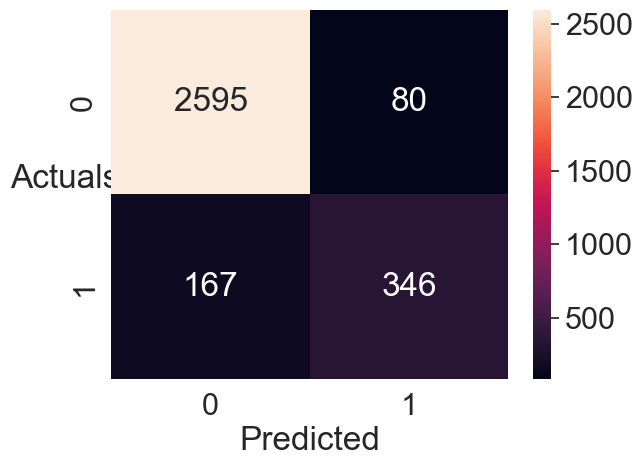

<Figure size 600x400 with 0 Axes>

In [380]:
sns.heatmap((metrics.confusion_matrix(y_test, y_test_predict)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

print('Accuracy Score',round(metrics.accuracy_score(y_test, y_test_predict),4))
print('F1 Score',round(metrics.f1_score(y_test, y_test_predict),4),'\n')
plt.figure(figsize=(6,4))

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_test_predict).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n')

print('Confusion Matrix Test :''\n')


**Observation :**

With accuracy of 92% and recall rate of 67%, model is able to predict 67% of Customers which were actually Churned as Churned.

Precision is 81% of data which means, out of total customers predicted by model as churned , 81% employees actually Churned.

F1-score is the harmonic mean of precision and recall, it takes into the effect of both the scores and this value is low if any of these 2 value is low.

Since we are building a model to predict if whether customers will churn or not churn, for practical purposes, we will be more interested in correctly classifying 1 (Churn) than 0 (Not-churned).

If a churned customer is incorrectly predicted to be "Not-Churned" by the model, then the impact on cost for the company would be very high for the company. Its a loss of potential lead for the company. Hence F1 score (actual data point identified as True by model) is very important in this scenario.

As F1 score of test dataset is around 74%

Thus our Company can target these churned customers for providing effective services.

In [381]:
# Training Data Probability Prediction
pred_prob_train = KNN_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = KNN_model.predict_proba(X_test)

AUC for the Training Data: 0.990
AUC for the Test Data: 0.960


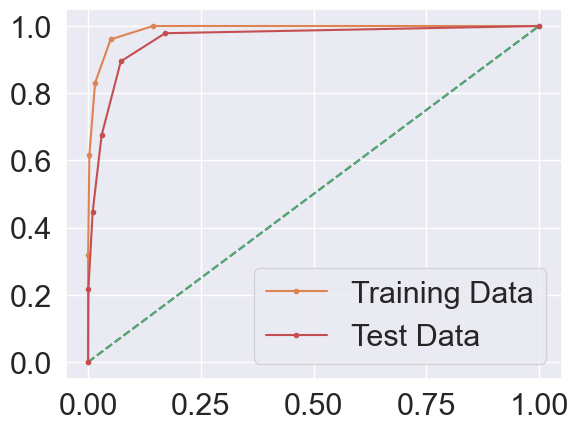

In [382]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Finding the Optimum K-Value

In [383]:
ac_scores_train = []

ac_scores_test = []


for k in range(1,30,2):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train,y_train)

  # Evaluate train accuracy
  score1 = knn.score(X_train,y_train)
  ac_scores_train.append(score1)

  # Evaluate test accuracy
  score2 = knn.score(X_test,y_test)
  ac_scores_test.append(score2)

In [384]:
print(ac_scores_train)
print(ac_scores_test)

[1.0, 0.9771443936542081, 0.958187684861522, 0.9454154342565205, 0.9291476203280452, 0.9162409249798333, 0.9053509007797795, 0.8975531056735682, 0.891771981715515, 0.8889486421080935, 0.8831675181500404, 0.8798063995697768, 0.8780586179080397, 0.8755041677870395, 0.8751008335574079]
[0.9629861982434128, 0.9385194479297365, 0.9225219573400251, 0.9099749058971142, 0.9043287327478042, 0.890840652446675, 0.8845671267252195, 0.8811166875784191, 0.8795483061480552, 0.8779799247176914, 0.8760978670012547, 0.8760978670012547, 0.8760978670012547, 0.8751568381430364, 0.8754705144291092]


### Graphical Presentation of K Values

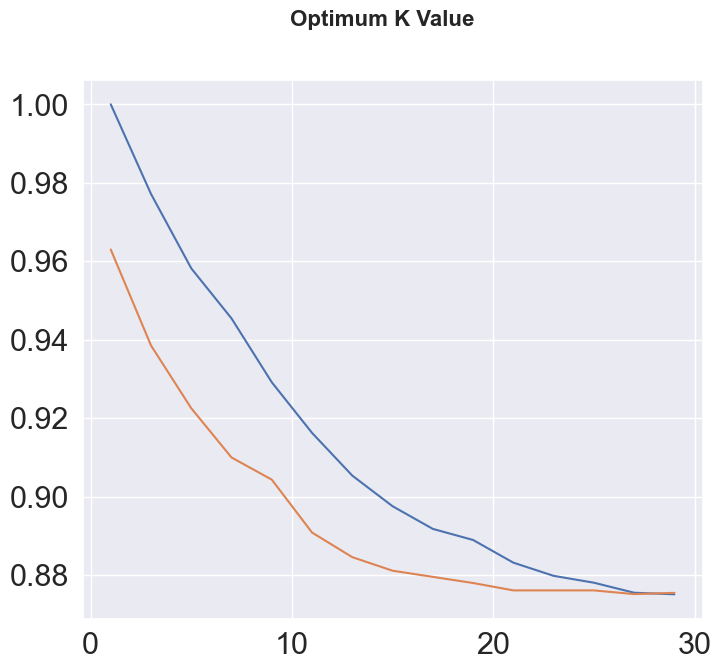

In [385]:
plt.figure(figsize = (8,7))

plt.plot(range(1,30,2) , ac_scores_train)
plt.plot(range(1,30,2) , ac_scores_test)

plt.suptitle('Optimum K Value',fontsize= 16, fontweight='bold')
plt.show()

**Observation:**

Form the above Graph we can clearly see that Optimum K value lie in the range between 25-30

#### Assume K = 20

In [386]:
KNN_model=KNeighborsClassifier(n_neighbors= 20)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [387]:
# Performance Matrix on the train data

y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train,y_train)

print('Accuracy Score Train : ',model_score)
print('\nConfusion matrix Train : ')
print(metrics.confusion_matrix(y_train, y_train_predict))
print('\nClassification Report Train : ')
print(metrics.classification_report(y_train, y_train_predict))

Accuracy Score Train :  0.8804786232858295

Confusion matrix Train : 
[[6078   87]
 [ 802  471]]

Classification Report Train : 
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      6165
           1       0.84      0.37      0.51      1273

    accuracy                           0.88      7438
   macro avg       0.86      0.68      0.72      7438
weighted avg       0.88      0.88      0.86      7438



Accuracy Score 0.8805
F1 Score 0.5145 

True Negative: 6078 
False Positives: 87 
False Negatives: 802 
True Positives: 471 

Confusion Matrix Train :



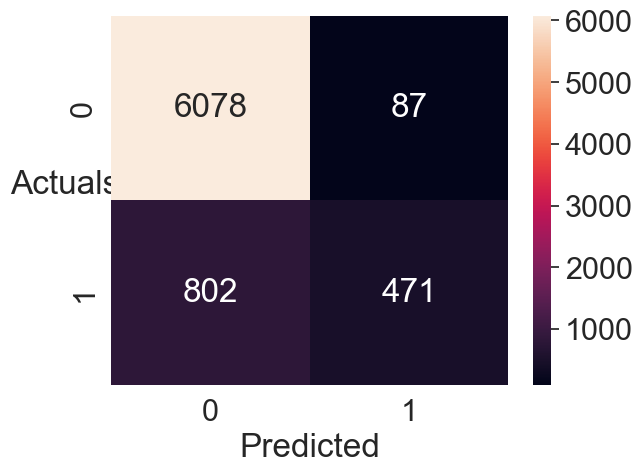

<Figure size 600x400 with 0 Axes>

In [388]:
sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

print('Accuracy Score',round(metrics.accuracy_score(y_train,y_train_predict),4))
print('F1 Score',round(metrics.f1_score(y_train,y_train_predict),4),'\n')
plt.figure(figsize=(6,4))

tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_train_predict).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n')

print('Confusion Matrix Train :''\n')

In [389]:
## Performance Matrix on test data set

y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print('Accuracy Score Test : ',model_score)
print('\nConfusion matrix Test : ')
print(metrics.confusion_matrix(y_test, y_test_predict))
print('\nClassification Report Test : ')
print(metrics.classification_report(y_test, y_test_predict))

Accuracy Score Test :  0.8748431618569636

Confusion matrix Test : 
[[2618   57]
 [ 342  171]]

Classification Report Test : 
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2675
           1       0.75      0.33      0.46       513

    accuracy                           0.87      3188
   macro avg       0.82      0.66      0.70      3188
weighted avg       0.86      0.87      0.85      3188



Accuracy Score 0.8748
F1 Score 0.4615 

True Negative: 2618 
False Positives: 57 
False Negatives: 342 
True Positives: 171 

Confusion Matrix Test :



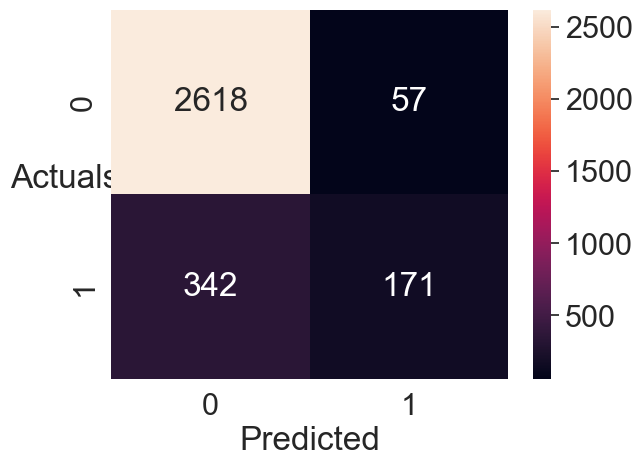

<Figure size 600x400 with 0 Axes>

In [390]:
sns.heatmap((metrics.confusion_matrix(y_test, y_test_predict)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

print('Accuracy Score',round(metrics.accuracy_score(y_test, y_test_predict),4))
print('F1 Score',round(metrics.f1_score(y_test, y_test_predict),4),'\n')
plt.figure(figsize=(6,4))

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_test_predict).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n')

print('Confusion Matrix Test :''\n')


**Observation :**

With accuracy of 87% and recall rate of 33%, model is able to predict 87% of Customers which were actually Churned as Churned.

Precision is 75% of data which means, out of total customers predicted by model as churned , 75% employees actually Churned.

F1-score is the harmonic mean of precision and recall, it takes into the effect of both the scores and this value is low if any of these 2 value is low.

Since we are building a model to predict if whether customers will churn or not churn, for practical purposes, we will be more interested in correctly classifying 1 (Churn) than 0 (Not-churned).

If a churned customer is incorrectly predicted to be "Not-Churned" by the model, then the impact on cost for the company would be very high for the company. Its a loss of potential lead for the company. Hence F1 score (actual data point identified as True by model) is very important in this scenario.

As F1 score of test dataset is around 46%

Thus our Company can target these churned customers for providing effective services.

In [391]:
# Training Data Probability Prediction
pred_prob_train = KNN_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = KNN_model.predict_proba(X_test)

AUC for the Training Data: 0.945
AUC for the Test Data: 0.922


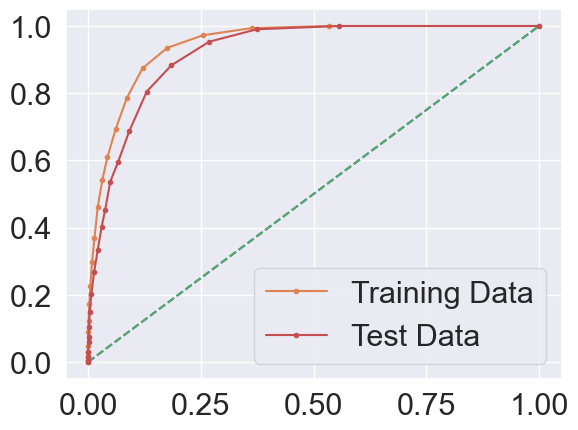

In [392]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [393]:
KNN_K20=(pd.DataFrame({'Train Accuracy': 88 ,'Test Accuracy': 87,
                                 'Train AUC':94,'Test AUC': 92,
                                 'Train Recall':37,'Test Recall': 33,
                                 'Train precision':84,'Test precision': 75,
                                 'Train f1':51,'Test f1': 46},
            index=['KNN K=20']))
print('\nClassification Report Train and Test Summary : ')
KNN_K20


Classification Report Train and Test Summary : 


Train Accuracy  Test Accuracy  Train AUC  Test AUC  Train Recall  \
KNN K=20              88             87         94        92            37   

          Test Recall  Train precision  Test precision  Train f1  Test f1  
KNN K=20           33               84              75        51       46

In [394]:
KNN_model=KNeighborsClassifier()

In [395]:
param_grid = {
    'n_neighbors' : range(10,25),
    'p' : [1,2,3]
}

In [396]:
"""
cv_value=3
grid_search = run_gridsearch(KNN_model,param_grid,X_train, y_train,cv_value)
check_performance(grid_search,X_train, X_test, y_train, y_test)

"""

'\ncv_value=3\ngrid_search = run_gridsearch(KNN_model,param_grid,X_train, y_train,cv_value)\ncheck_performance(grid_search,X_train, X_test, y_train, y_test)\n\n'

**Observation**

Showing best parameters for the grid search

{'n_neighbors': 11, 'p': 1}

In [397]:
KNN_model=KNeighborsClassifier(n_neighbors =11, p = 1)
KNN_model = KNN_model.fit(X_train, y_train)

In [398]:
# Training Data Probability Prediction
pred_prob_train = KNN_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = KNN_model.predict_proba(X_test)

AUC for the Training Data: 0.975
AUC for the Test Data: 0.954


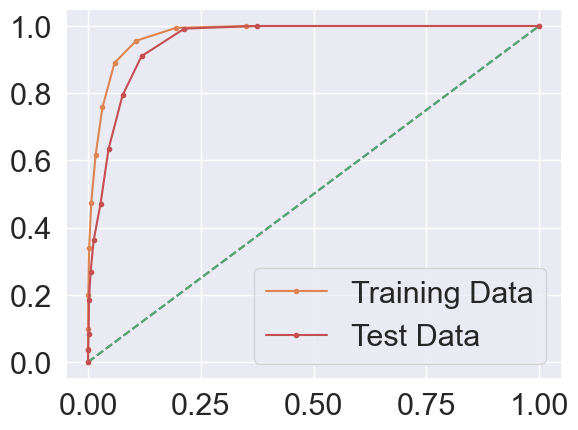

In [399]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [400]:
Knn_tuned=(pd.DataFrame({'Train Accuracy': 92 ,'Test Accuracy': 89,
                                 'Train AUC':97,'Test AUC': 95,
                                 'Train Recall':62,'Test Recall': 47,
                                 'Train precision':88,'Test precision': 77,
                                 'Train f1':73,'Test f1': 58},
            index=['KNN Tuned']))
print('\nClassification Report Train and Test Summary : ')
Knn_tuned


Classification Report Train and Test Summary : 


Train Accuracy  Test Accuracy  Train AUC  Test AUC  Train Recall  \
KNN Tuned              92             89         97        95            62   

           Test Recall  Train precision  Test precision  Train f1  Test f1  
KNN Tuned           47               88              77        73       58

### KNN Summary:

In [401]:
Knn_r = [KNN_K20,Knn_tuned]
Knn_r_result = pd.concat(Knn_r)
Knn_r_result

Train Accuracy  Test Accuracy  Train AUC  Test AUC  Train Recall  \
KNN K=20               88             87         94        92            37   
KNN Tuned              92             89         97        95            62   

           Test Recall  Train precision  Test precision  Train f1  Test f1  
KNN K=20            33               84              75        51       46  
KNN Tuned           47               88              77        73       58

**Observation**

* After KNN model tuning results seems to be good improvement 

* Need better F1 SCORE.

## Here we care now checking all the models performance together with and without Tuning in order to find which model performed better

In [402]:
X = df.drop('churn',axis = 1)
y = df['churn']

In [403]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [404]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler() 

In [405]:
# we are scaling the data for KNN. Without scaling it will give very poor results. Computations becomes easier
x_train_scaled=ss.fit_transform(X_train)
x_test_scaled=ss.transform(X_test)

In [406]:
## Train and test dataframe have been scaled now
X_train_bkp=X_train.copy()
X_test_bkp=X_test.copy()

In [407]:
def extract_classfication_meterics(y,y_predict):
    df_metrics=classification_report(y, y_predict,output_dict=True)
    #print(classification_report(y, y_predict))
    df_metrics=pd.DataFrame(df_metrics).transpose()
    precision = round(df_metrics.loc["1"][0],2)
    recall = round(df_metrics.loc["1"][1],2)
    f1 = round(df_metrics.loc["1"][2],2)
    return precision, recall, f1

### Checking all the 9 Models without Tuning

* Logistic_Regression
* KNN
* Bagging
* XGBoost
* Support_Vector_Machine
* Naive_Bayes
* Decision_Tree
* Extra_Trees_Classifier
* Linear_Discriminant_Analysis'

In [408]:
##pip install xgboost

In [409]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.svm import SVC

In [410]:
lgr = LogisticRegression(random_state=1)
KNN = KNeighborsClassifier()
Bagg = BaggingClassifier(base_estimator=RandomForestClassifier(),n_estimators=100,random_state=1)
xgboost = XGBClassifier(random_state =1)
svm = SVC(probability= True, random_state =1)
na_bay = GaussianNB()
dt = DecisionTreeClassifier(random_state=1)
xtra_tree = ExtraTreesClassifier(random_state=1)
LDA = LinearDiscriminantAnalysis()

In [411]:
models=[lgr,KNN,Bagg,xgboost,svm,na_bay,dt,xtra_tree,LDA]

modelnames = ['Logistic_Regression','KNN','Bagging','XGBoost','Support_Vector_Machine','Naive_Bayes','Decision_Tree','Extra_Trees_Classifier','Linear_Discriminant_Analysis']
j=0
scores_train=[]
scores_test=[]
precision_train=[]
precision_test=[]
recall_train=[]
recall_test=[]
f1_train=[]
f1_test=[]
auc_train=[]
auc_test=[]
train_fpr=[]
test_fpr=[]
train_tpr=[]
test_tpr=[]
train_thresholds=[]
test_thresholds=[]

for i in models:  
# we are scaling the data for KNN. Without scaling it will give very poor results. Computations becomes easier
    
    if (i != KNN):       
        i.fit(X_train,y_train)
        ytrain_predict = i.predict(X_train)
        ytest_predict = i.predict(X_test)
        X_train_bkp["predicted_"+modelnames[j]] = ytrain_predict
        X_test_bkp["predicted_"+modelnames[j]] =ytest_predict
        
        scores_train.append(round(i.score(X_train, y_train),2))
        scores_test.append(round(i.score(X_test, y_test),2))
        
        precision, recall, f1 = extract_classfication_meterics(y_train,ytrain_predict)
        precision_train.append(precision)
        recall_train.append(recall)
        f1_train.append(f1)

        precision, recall, f1 = extract_classfication_meterics(y_test,ytest_predict)
        precision_test.append(precision)
        recall_test.append(recall)
        f1_test.append(f1)
       
        auc_train.append(round(roc_auc_score(y_train, i.predict_proba(X_train)[:, 1]),2))
        auc_test.append(round(roc_auc_score(y_test, i.predict_proba(X_test)[:, 1]),2))

        fpr, tpr, thresholds = roc_curve(y_train, i.predict_proba(X_train)[:, 1])
        train_fpr.append(fpr)
        train_tpr.append(tpr)
        train_thresholds.append(thresholds)           
        
        fpr, tpr, thresholds = roc_curve(y_test, i.predict_proba(X_test)[:, 1])
        test_fpr.append(fpr)
        test_tpr.append(tpr)
        test_thresholds.append(thresholds)           
        
    else:                         
        i.fit(x_train_scaled,y_train)
        ytrain_predict = i.predict(x_train_scaled)
        ytest_predict = i.predict(x_test_scaled)
        X_train_bkp["predicted_"+modelnames[j]] = ytrain_predict
        X_test_bkp["predicted_"+modelnames[j]] =ytest_predict
        
        scores_train.append(round(i.score(x_train_scaled, y_train),2))
        scores_test.append(round(i.score(x_test_scaled, y_test),2))
        
        precision, recall, f1 = extract_classfication_meterics(y_train,ytrain_predict)
        precision_train.append(precision)
        recall_train.append(recall)
        f1_train.append(f1)

        precision, recall, f1 = extract_classfication_meterics(y_test,ytest_predict)
        precision_test.append(precision)
        recall_test.append(recall)
        f1_test.append(f1)
       
        auc_train.append(round(roc_auc_score(y_train, i.predict_proba(x_train_scaled)[:, 1]),2))
        auc_test.append(round(roc_auc_score(y_test, i.predict_proba(x_test_scaled)[:, 1]),2))

        fpr, tpr, thresholds = roc_curve(y_train, i.predict_proba(x_train_scaled)[:, 1])
        train_fpr.append(fpr)
        train_tpr.append(tpr)
        train_thresholds.append(thresholds)           

        fpr, tpr, thresholds = roc_curve(y_test, i.predict_proba(x_test_scaled)[:, 1])
        test_fpr.append(fpr)
        test_tpr.append(tpr)
        test_thresholds.append(thresholds)           
        
    j=j+1

AUC for Logistic_Regression is: 0.86
AUC for KNN is: 0.99
AUC for Bagging is: 1.0
AUC for XGBoost is: 1.0
AUC for Support_Vector_Machine is: 0.89
AUC for Naive_Bayes is: 0.82
AUC for Decision_Tree is: 1.0
AUC for Extra_Trees_Classifier is: 1.0
AUC for Linear_Discriminant_Analysis is: 0.86


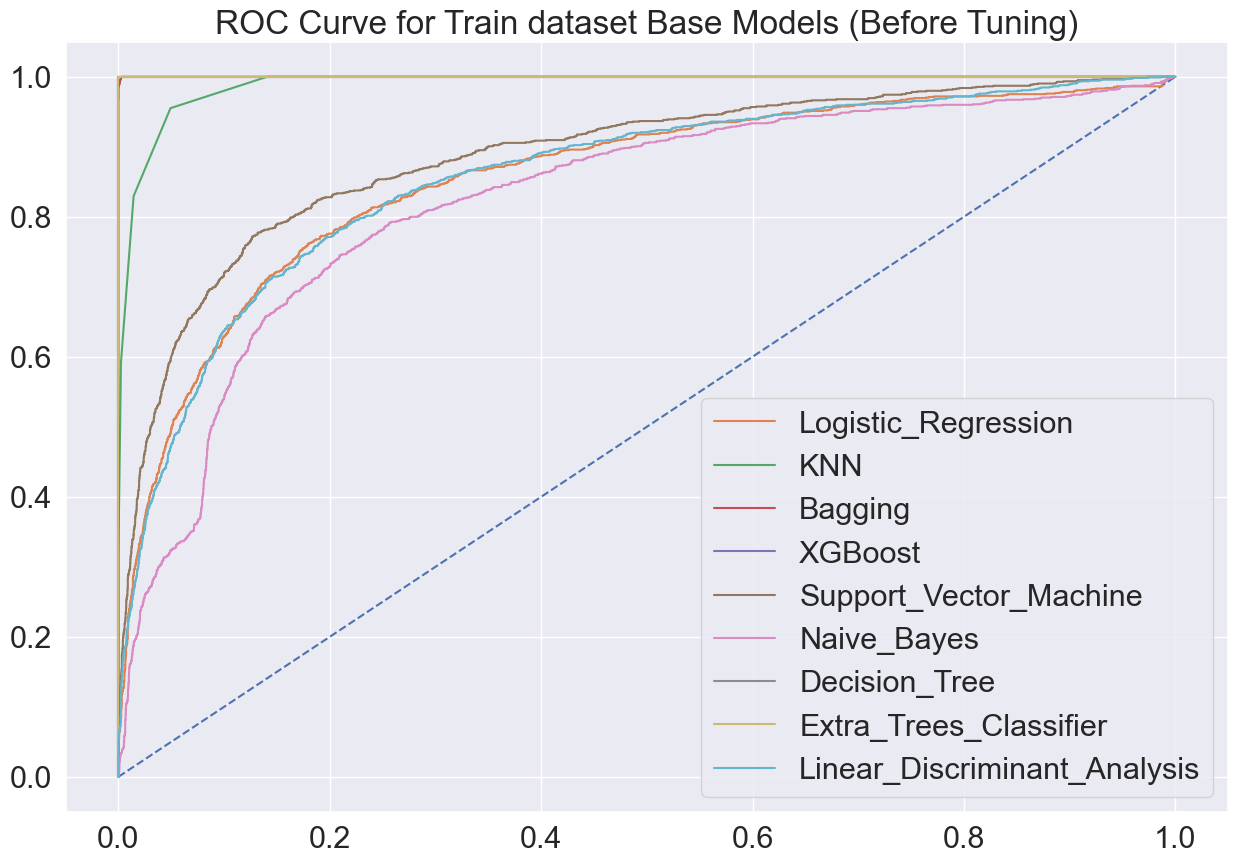

In [412]:
plt.figure(figsize=(15 ,10))
plt.plot([0, 1], [0, 1], linestyle='--')
j=0
for i in range(0,9):
    plt.plot(train_fpr[i], train_tpr[i],label = modelnames[j])
    print ('AUC for',modelnames[j],'is:',auc_train[j])
    j=j+1
plt.title('ROC Curve for Train dataset Base Models (Before Tuning)')
plt.legend(loc='best')
plt.show()

AUC for Logistic_Regression is: 0.86
AUC for KNN is: 0.96
AUC for Bagging is: 0.98
AUC for XGBoost is: 0.99
AUC for Support_Vector_Machine is: 0.88
AUC for Naive_Bayes is: 0.82
AUC for Decision_Tree is: 0.87
AUC for Extra_Trees_Classifier is: 0.99
AUC for Linear_Discriminant_Analysis is: 0.86


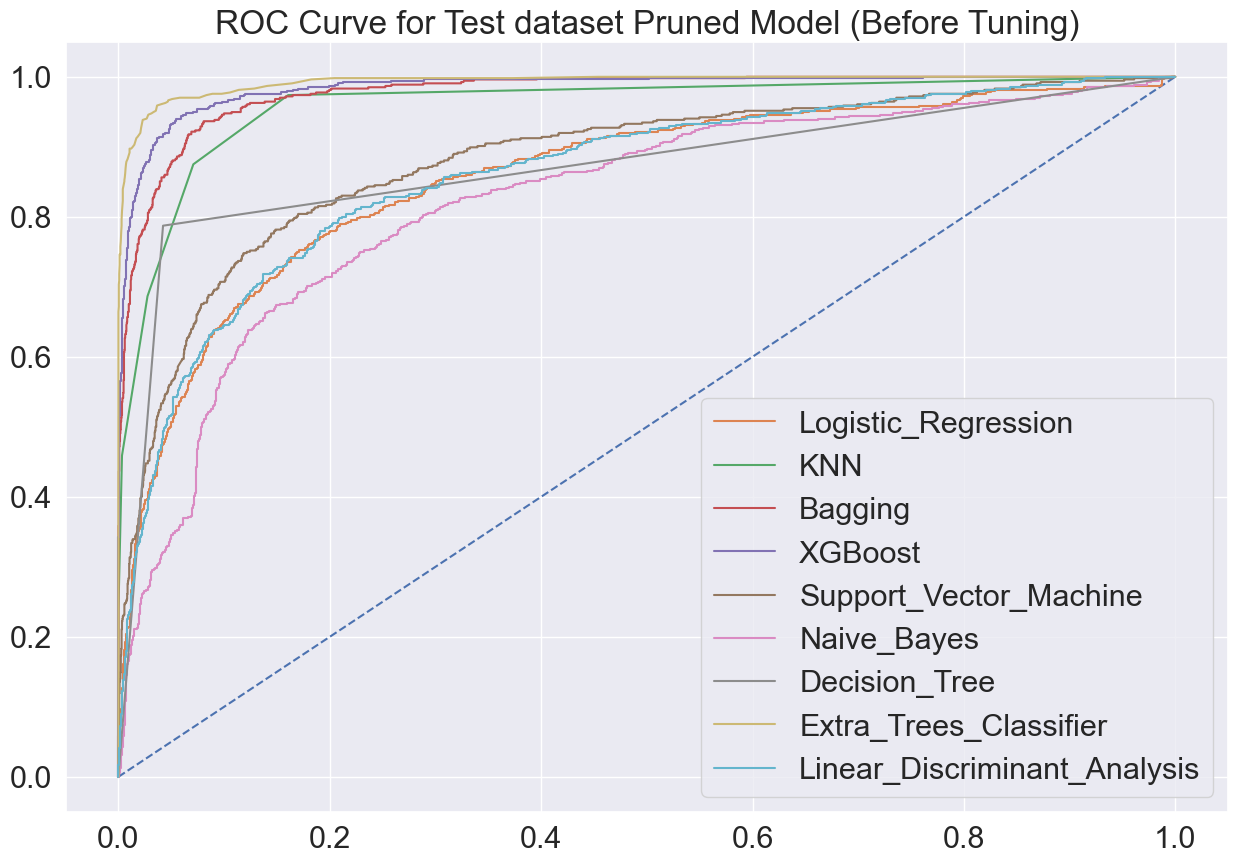

In [413]:
plt.figure(figsize=(15 ,10))
plt.plot([0, 1], [0, 1], linestyle='--')
j=0
for i in range(0,9):
    plt.plot(test_fpr[i], test_tpr[i],label = modelnames[j])
    print ('AUC for',modelnames[j],'is:',auc_test[j])
    j=j+1
plt.title('ROC Curve for Test dataset Pruned Model (Before Tuning)')
plt.legend(loc='best')
plt.show()

In [414]:
models_preform=(pd.DataFrame({'Train Accuracy': scores_train,'Test Accuracy': scores_test,'Train AUC':auc_train,'Test AUC': auc_test,'Train Recall':recall_train,'Test Recall': recall_test,'Train precision':precision_train,'Test precision': precision_test,'Train f1':f1_train,'Test f1': f1_test},
            index=['Logistic_Regression','KNN','Bagging','XGBoost','Support_Vector_Machine','Naive_Bayes','Decision_Tree','Extra_Trees_Classifier','Linear_Discriminant_Analysis']))        
models_preform

Train Accuracy  Test Accuracy  Train AUC  \
Logistic_Regression                     0.87           0.88       0.86   
KNN                                     0.96           0.92       0.99   
Bagging                                 0.99           0.94       1.00   
XGBoost                                 1.00           0.96       1.00   
Support_Vector_Machine                  0.83           0.83       0.89   
Naive_Bayes                             0.84           0.85       0.82   
Decision_Tree                           1.00           0.93       1.00   
Extra_Trees_Classifier                  1.00           0.97       1.00   
Linear_Discriminant_Analysis            0.87           0.88       0.86   

                              Test AUC  Train Recall  Test Recall  \
Logistic_Regression               0.86          0.40         0.41   
KNN                               0.96          0.83         0.69   
Bagging                           0.98          0.97         0.69   
XGBoost                           0.99          1.00         0.83   
Support_Vector_Machine            0.88          0.00         0.00   
Naive_Bayes                       0.82          0.46         0.48   
Decision_Tree                     0.87          1.00         0.79   
Extra_Trees_Classifier            0.99          1.00         0.83   
Linear_Discriminant_Analysis      0.86          0.44         0.47   

                              Train precision  Test precision  Train f1  \
Logistic_Regression                      0.73            0.74      0.52   
KNN                                      0.92            0.83      0.87   
Bagging                                  1.00            0.93      0.98   
XGBoost                                  1.00            0.92      1.00   
Support_Vector_Machine                   0.00            0.00      0.00   
Naive_Bayes                              0.52            0.56      0.49   
Decision_Tree                            1.00            0.79      1.00   
Extra_Trees_Classifier                   1.00            0.98      1.00   
Linear_Discriminant_Analysis             0.68            0.70      0.53   

                              Test f1  
Logistic_Regression              0.53  
KNN                              0.75  
Bagging                          0.79  
XGBoost                          0.87  
Support_Vector_Machine           0.00  
Naive_Bayes                      0.52  
Decision_Tree                    0.79  
Extra_Trees_Classifier           0.90  
Linear_Discriminant_Analysis     0.57

### Checking all the 9 Models after Tuning

Lets first find out all the best Hyperparameters for each model

**Note:** Logistic Regression and KNN Hyperparameters are already been done

**Note: I HAVE MADE ALL THE CODE AS STRING AS ITS TAKE LOTS OF TIME TO RUN**
    
**OUTPUT FOR EACH MODEL GRIDSEARCHCV IS THEIR IN THE OBSERVATION**

#### Logistic Regression

**Observation**

Showing best parameters for the grid search

{'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001}

#### KNN

**case -1**

**Observation**
Done previously 

Showing best parameters for the grid search

{'n_neighbors': 11, 'p': 1}

**case-2**  

In [415]:
"""
param_grid = {
    'n_neighbors': [1,3,5,9, 11,13,15,17],
    'weights': ['uniform', 'distance'],
    'p': [1, 2,3,4]
}

KNN = KNeighborsClassifier()
"""

"\nparam_grid = {\n    'n_neighbors': [1,3,5,9, 11,13,15,17],\n    'weights': ['uniform', 'distance'],\n    'p': [1, 2,3,4]\n}\n\nKNN = KNeighborsClassifier()\n"

In [416]:
"""
cv_value=2
grid_search = run_gridsearch(KNN,param_grid,X_train, y_train,cv_value)
check_performance(grid_search,X_train, X_test, y_train, y_test)

"""

'\ncv_value=2\ngrid_search = run_gridsearch(KNN,param_grid,X_train, y_train,cv_value)\ncheck_performance(grid_search,X_train, X_test, y_train, y_test)\n\n'

**Observations** 

Showing best parameters for the grid search

{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}

###  Bagging

**CASE -1**

In [417]:

#### Bagg = BaggingClassifier(base_estimator=RandomForestClassifier(),n_estimators=100,random_state=1)
"""

param_grid = {
    'n_estimators': [50, 100],
    'max_samples': [0.5, 0.7],
    'max_features': [0.5, 0.7]  
}

"""

"\n\nparam_grid = {\n    'n_estimators': [50, 100],\n    'max_samples': [0.5, 0.7],\n    'max_features': [0.5, 0.7]  \n}\n\n"

 **Observations**

Showing best parameters for the grid search

{'max_features': 0.7, 'max_samples': 0.7, 'n_estimators': 50}

**CASE-2**

In [418]:
"""
base_estimator = RandomForestClassifier()
bagging = BaggingClassifier(base_estimator=base_estimator)
param_grid = {
    'base_estimator__n_estimators': [10, 50, 100, 200],
    'n_estimators': [10, 50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
    'base_estimator__max_depth': [None, 5, 10, 20],
    'base_estimator__min_samples_split': [1,2, 5, 10],
    'base_estimator__min_samples_leaf': [1, 2, 4],
    'base_estimator__max_features': ['sqrt', 'log2', None]
}

"""

"\nbase_estimator = RandomForestClassifier()\nbagging = BaggingClassifier(base_estimator=base_estimator)\nparam_grid = {\n    'base_estimator__n_estimators': [10, 50, 100, 200],\n    'n_estimators': [10, 50, 100, 200],\n    'max_samples': [0.5, 0.7, 1.0],\n    'max_features': [0.5, 0.7, 1.0],\n    'bootstrap': [True, False],\n    'bootstrap_features': [True, False],\n    'base_estimator__max_depth': [None, 5, 10, 20],\n    'base_estimator__min_samples_split': [1,2, 5, 10],\n    'base_estimator__min_samples_leaf': [1, 2, 4],\n    'base_estimator__max_features': ['sqrt', 'log2', None]\n}\n\n"

In [419]:
"""
cv_value=2
grid_search = run_gridsearch(bagging,param_grid,X_train, y_train,cv_value)
check_performance(grid_search,X_train, X_test, y_train, y_test)

"""

'\ncv_value=2\ngrid_search = run_gridsearch(bagging,param_grid,X_train, y_train,cv_value)\ncheck_performance(grid_search,X_train, X_test, y_train, y_test)\n\n'


**Observations** 

{'base_estimator__n_estimators': 50,

'base_estimator__max_depth': 10,

'base_estimator__min_samples_leaf': 1,

'base_estimator__min_samples_split': 5,

'base_estimator__max_features': 'sqrt',

'bootstrap': True,

'bootstrap_features': False,

'max_features': 0.7,

'max_samples': 0.7,

'n_estimators': 100}

### XGBoost

In [420]:
"""
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.5, 0.7, 0.9],
    'colsample_bytree': [0.5, 0.7, 0.9],
    'gamma': [0, 1, 5],
    'reg_lambda': [0, 1, 10],
}

"""

"\nparam_grid = {\n    'n_estimators': [50, 100],\n    'max_depth': [3, 5, 7],\n    'learning_rate': [0.01, 0.1, 0.3],\n    'subsample': [0.5, 0.7, 0.9],\n    'colsample_bytree': [0.5, 0.7, 0.9],\n    'gamma': [0, 1, 5],\n    'reg_lambda': [0, 1, 10],\n}\n\n"

In [421]:
"""
cv_value=3
grid_search = run_gridsearch(xgboost,param_grid,X_train, y_train,cv_value)
check_performance(grid_search,X_train, X_test, y_train, y_test)

"""

'\ncv_value=3\ngrid_search = run_gridsearch(xgboost,param_grid,X_train, y_train,cv_value)\ncheck_performance(grid_search,X_train, X_test, y_train, y_test)\n\n'

**Observations**

Showing best parameters for the grid search

{'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 100, 'reg_lambda': 1, 'subsample': 0.9}

### Support_Vector_Machine


In [422]:
"""
param_grid = {
    'C': [1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto'] + [1, 10],
    'coef0': [0, 1],
}
"""

"\nparam_grid = {\n    'C': [1, 10],\n    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],\n    'degree': [2, 3, 4],\n    'gamma': ['scale', 'auto'] + [1, 10],\n    'coef0': [0, 1],\n}\n"

In [423]:
"""
cv_value=3
grid_search = run_gridsearch(svm,param_grid,X_train, y_train,cv_value)
check_performance(grid_search,X_train, X_test, y_train, y_test)

"""

'\ncv_value=3\ngrid_search = run_gridsearch(svm,param_grid,X_train, y_train,cv_value)\ncheck_performance(grid_search,X_train, X_test, y_train, y_test)\n\n'

**Observation**

{'C': 10, 'coef0': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}

### Naive_Bayes


In [424]:
"""
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],
}
"""

"\nparam_grid = {\n    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],\n}\n"

In [425]:
"""
cv_value=3
grid_search = run_gridsearch(na_bay,param_grid,X_train, y_train,cv_value)
check_performance(grid_search,X_train, X_test, y_train, y_test)
"""

'\ncv_value=3\ngrid_search = run_gridsearch(na_bay,param_grid,X_train, y_train,cv_value)\ncheck_performance(grid_search,X_train, X_test, y_train, y_test)\n'

**Observation** 

Showing best parameters for the grid search

{'var_smoothing': 1e-07}

### Decision_Tree


In [426]:
"""

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
}

"""

"\n\nparam_grid = {\n    'criterion': ['gini', 'entropy'],\n    'max_depth': [None, 10, 20, 30, 40, 50],\n    'min_samples_split': [2, 5, 10],\n    'min_samples_leaf': [1, 2, 4],\n    'max_features': [None, 'sqrt', 'log2'],\n}\n\n"

In [427]:
"""
cv_value=3
grid_search = run_gridsearch(dt,param_grid,X_train, y_train,cv_value)
check_performance(grid_search,X_train, X_test, y_train, y_test)
"""

'\ncv_value=3\ngrid_search = run_gridsearch(dt,param_grid,X_train, y_train,cv_value)\ncheck_performance(grid_search,X_train, X_test, y_train, y_test)\n'

**Observations**

Showing best parameters for the grid search

{'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


### Extra_Trees_Classifier

In [428]:
"""
param_grid = {
    'n_estimators': [50, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
}

"""

"\nparam_grid = {\n    'n_estimators': [50, 100],\n    'criterion': ['gini', 'entropy'],\n    'max_depth': [10, 20, 30, 40, 50],\n    'min_samples_split': [2, 5, 10],\n    'min_samples_leaf': [2, 4],\n    'max_features': ['auto', 'sqrt', 'log2'],\n    'bootstrap': [True, False],\n}\n\n"

In [429]:
"""
cv_value=3
grid_search = run_gridsearch(xtra_tree,param_grid,X_train, y_train,cv_value)
check_performance(grid_search,X_train, X_test, y_train, y_test)
"""


'\ncv_value=3\ngrid_search = run_gridsearch(xtra_tree,param_grid,X_train, y_train,cv_value)\ncheck_performance(grid_search,X_train, X_test, y_train, y_test)\n\n'

**Observations**

Showing best parameters for the grid search

{'bootstrap': False, 'criterion': 'gini', 'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

### Linear_Discriminant_Analysis'

In [430]:
"""
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage': [None, 'auto', 0.1, 0.5, 0.9],
    'n_components': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'tol': [1e-4, 1e-3, 1e-2, 1e-1],
}
"""

"\nparam_grid = {\n    'solver': ['svd', 'lsqr', 'eigen'],\n    'shrinkage': [None, 'auto', 0.1, 0.5, 0.9],\n    'n_components': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9],\n    'tol': [1e-4, 1e-3, 1e-2, 1e-1],\n}\n"

In [431]:
"""
cv_value=3
grid_search = run_gridsearch(LDA,param_grid,X_train, y_train,cv_value)
check_performance(grid_search,X_train, X_test, y_train, y_test)

"""

'\ncv_value=3\ngrid_search = run_gridsearch(LDA,param_grid,X_train, y_train,cv_value)\ncheck_performance(grid_search,X_train, X_test, y_train, y_test)\n\n'

**Observations**

Showing best parameters for the grid search

{'n_components': None, 'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.0001}

### Putting pruned parameters to the 9 models

In [432]:
## Logistic regression

lgr = LogisticRegression(penalty = 'l2', solver = 'lbfgs', tol = 0.0001 ,random_state=1)


## KNN
KNN = KNeighborsClassifier(n_neighbors = 11,p = 1,weights ='uniform')

## BAGGING
base_estimator = RandomForestClassifier(n_estimators= 50,
                                        max_depth=10,
                                        min_samples_leaf= 1,
                                        min_samples_split= 5,
                                        max_features= 'sqrt',
                                        )
Bagg = BaggingClassifier(base_estimator=base_estimator,random_state=1,
                         bootstrap= True,
                         bootstrap_features= False,
                         max_features= 0.7,
                         max_samples= 0.7,
                         n_estimators= 100)

## XGBoost
xgboost = XGBClassifier(random_state =1,colsample_bytree= 0.9,
                        gamma= 0,
                        learning_rate= 0.3,
                        max_depth= 7,
                        n_estimators= 100,
                        reg_lambda= 1,
                        subsample= 0.9)


## SUPPORT VECTOR MACHINE
svm = SVC(probability= True, random_state =1,C= 10, coef0= 1, degree= 2, gamma= 'scale', kernel= 'rbf')

##Naive Bayes
na_bay = GaussianNB(var_smoothing = 1e-07)

## Decision Tree 
dt = DecisionTreeClassifier(random_state=1,criterion= 'entropy',
                            max_depth= None, max_features= None,
                            min_samples_leaf= 1, 
                            min_samples_split= 2)

## Extra Tree Classifier 
xtra_tree = ExtraTreesClassifier(random_state=1,bootstrap= False, criterion= 'gini',
                                 max_depth= 30,
                                 max_features= 'auto',
                                 min_samples_leaf= 2,
                                 min_samples_split= 2, n_estimators= 100)

## Linear Discriminant Analysis
LDA = LinearDiscriminantAnalysis(n_components= None, 
                                 shrinkage= 'auto',
                                 solver= 'lsqr',
                                 tol= 0.0001)

In [433]:
models=[lgr,KNN,Bagg,xgboost,svm,na_bay,dt,xtra_tree,LDA]

modelnames = ['Logistic_Regression','KNN','Bagging','XGBoost','Support_Vector_Machine','Naive_Bayes','Decision_Tree','Extra_Trees_Classifier','Linear_Discriminant_Analysis']
j=0
scores_train=[]
scores_test=[]
precision_train=[]
precision_test=[]
recall_train=[]
recall_test=[]
f1_train=[]
f1_test=[]
auc_train=[]
auc_test=[]
train_fpr=[]
test_fpr=[]
train_tpr=[]
test_tpr=[]
train_thresholds=[]
test_thresholds=[]

for i in models:  
# we are scaling the data for KNN. Without scaling it will give very poor results. Computations becomes easier
    
    if (i != KNN):       
        i.fit(X_train,y_train)
        ytrain_predict = i.predict(X_train)
        ytest_predict = i.predict(X_test)
        X_train_bkp["predicted_"+modelnames[j]] = ytrain_predict
        X_test_bkp["predicted_"+modelnames[j]] =ytest_predict
        
        scores_train.append(round(i.score(X_train, y_train),2))
        scores_test.append(round(i.score(X_test, y_test),2))
        
        precision, recall, f1 = extract_classfication_meterics(y_train,ytrain_predict)
        precision_train.append(precision)
        recall_train.append(recall)
        f1_train.append(f1)

        precision, recall, f1 = extract_classfication_meterics(y_test,ytest_predict)
        precision_test.append(precision)
        recall_test.append(recall)
        f1_test.append(f1)
       
        auc_train.append(round(roc_auc_score(y_train, i.predict_proba(X_train)[:, 1]),2))
        auc_test.append(round(roc_auc_score(y_test, i.predict_proba(X_test)[:, 1]),2))

        fpr, tpr, thresholds = roc_curve(y_train, i.predict_proba(X_train)[:, 1])
        train_fpr.append(fpr)
        train_tpr.append(tpr)
        train_thresholds.append(thresholds)           
        
        fpr, tpr, thresholds = roc_curve(y_test, i.predict_proba(X_test)[:, 1])
        test_fpr.append(fpr)
        test_tpr.append(tpr)
        test_thresholds.append(thresholds)           
        
    else:                         
        i.fit(x_train_scaled,y_train)
        ytrain_predict = i.predict(x_train_scaled)
        ytest_predict = i.predict(x_test_scaled)
        X_train_bkp["predicted_"+modelnames[j]] = ytrain_predict
        X_test_bkp["predicted_"+modelnames[j]] =ytest_predict
        
        scores_train.append(round(i.score(x_train_scaled, y_train),2))
        scores_test.append(round(i.score(x_test_scaled, y_test),2))
        
        precision, recall, f1 = extract_classfication_meterics(y_train,ytrain_predict)
        precision_train.append(precision)
        recall_train.append(recall)
        f1_train.append(f1)

        precision, recall, f1 = extract_classfication_meterics(y_test,ytest_predict)
        precision_test.append(precision)
        recall_test.append(recall)
        f1_test.append(f1)
       
        auc_train.append(round(roc_auc_score(y_train, i.predict_proba(x_train_scaled)[:, 1]),2))
        auc_test.append(round(roc_auc_score(y_test, i.predict_proba(x_test_scaled)[:, 1]),2))

        fpr, tpr, thresholds = roc_curve(y_train, i.predict_proba(x_train_scaled)[:, 1])
        train_fpr.append(fpr)
        train_tpr.append(tpr)
        train_thresholds.append(thresholds)           

        fpr, tpr, thresholds = roc_curve(y_test, i.predict_proba(x_test_scaled)[:, 1])
        test_fpr.append(fpr)
        test_tpr.append(tpr)
        test_thresholds.append(thresholds)           
        
    j=j+1

AUC for Logistic_Regression is: 0.86
AUC for KNN is: 0.98
AUC for Bagging is: 0.98
AUC for XGBoost is: 1.0
AUC for Support_Vector_Machine is: 0.89
AUC for Naive_Bayes is: 0.82
AUC for Decision_Tree is: 1.0
AUC for Extra_Trees_Classifier is: 1.0
AUC for Linear_Discriminant_Analysis is: 0.86


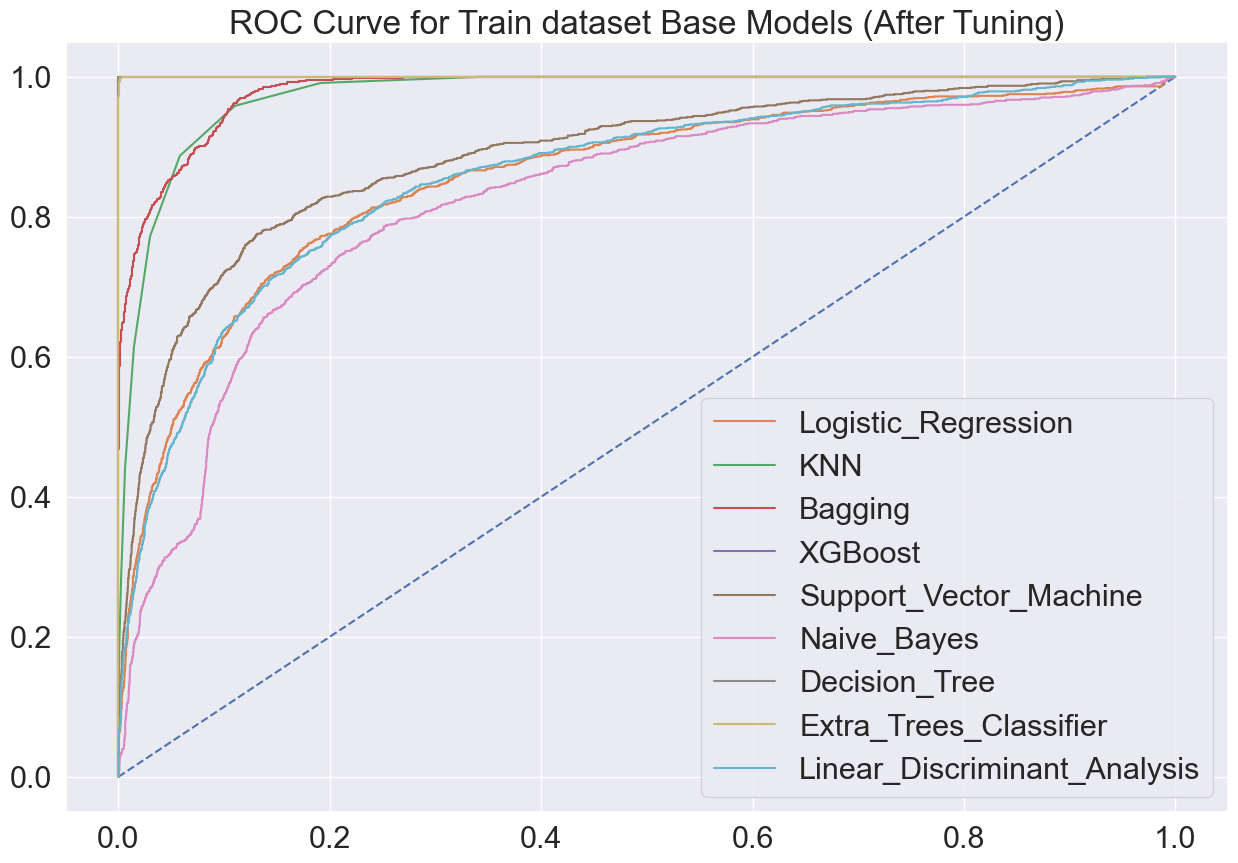

In [434]:
plt.figure(figsize=(15 ,10))
plt.plot([0, 1], [0, 1], linestyle='--')
j=0
for i in range(0,9):
    plt.plot(train_fpr[i], train_tpr[i],label = modelnames[j])
    print ('AUC for',modelnames[j],'is:',auc_train[j])
    j=j+1
plt.title('ROC Curve for Train dataset Base Models (After Tuning)')
plt.legend(loc='best')
plt.show()

AUC for Logistic_Regression is: 0.86
AUC for KNN is: 0.95
AUC for Bagging is: 0.95
AUC for XGBoost is: 0.99
AUC for Support_Vector_Machine is: 0.88
AUC for Naive_Bayes is: 0.82
AUC for Decision_Tree is: 0.87
AUC for Extra_Trees_Classifier is: 0.98
AUC for Linear_Discriminant_Analysis is: 0.86


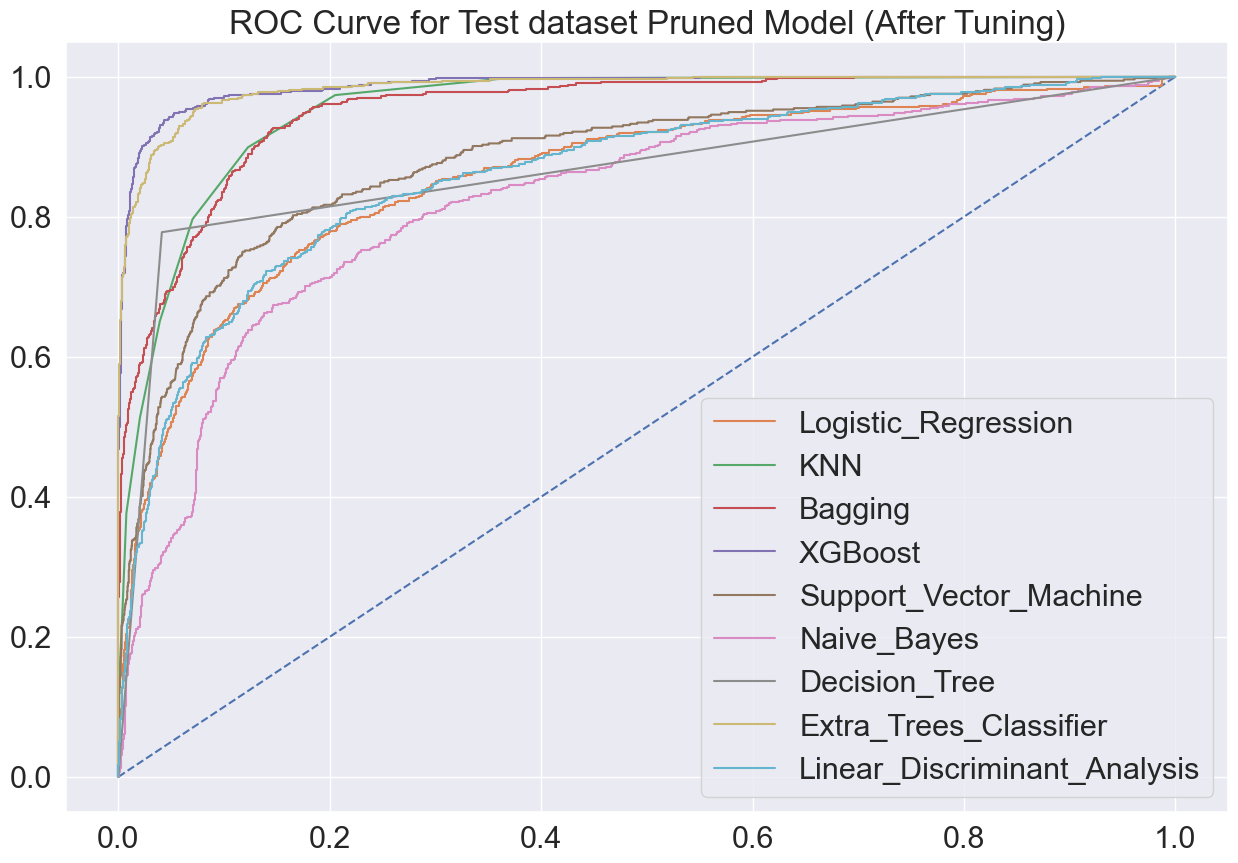

In [435]:
plt.figure(figsize=(15 ,10))
plt.plot([0, 1], [0, 1], linestyle='--')
j=0
for i in range(0,9):
    plt.plot(test_fpr[i], test_tpr[i],label = modelnames[j])
    print ('AUC for',modelnames[j],'is:',auc_test[j])
    j=j+1
plt.title('ROC Curve for Test dataset Pruned Model (After Tuning)')
plt.legend(loc='best')
plt.show()

In [436]:
models_preform_tuned=(pd.DataFrame({'Train Accuracy': scores_train,'Test Accuracy': scores_test,'Train AUC':auc_train,'Test AUC': auc_test,'Train Recall':recall_train,'Test Recall': recall_test,'Train precision':precision_train,'Test precision': precision_test,'Train f1':f1_train,'Test f1': f1_test},
            index=['Logistic_Regression','KNN','Bagging','XGBoost','Support_Vector_Machine','Naive_Bayes','Decision_Tree','Extra_Trees_Classifier','Linear_Discriminant_Analysis']))        
models_preform_tuned

Train Accuracy  Test Accuracy  Train AUC  \
Logistic_Regression                     0.87           0.88       0.86   
KNN                                     0.92           0.90       0.98   
Bagging                                 0.94           0.91       0.98   
XGBoost                                 1.00           0.96       1.00   
Support_Vector_Machine                  0.83           0.83       0.89   
Naive_Bayes                             0.84           0.85       0.82   
Decision_Tree                           1.00           0.93       1.00   
Extra_Trees_Classifier                  0.99           0.95       1.00   
Linear_Discriminant_Analysis            0.87           0.88       0.86   

                              Test AUC  Train Recall  Test Recall  \
Logistic_Regression               0.86          0.40         0.41   
KNN                               0.95          0.61         0.51   
Bagging                           0.95          0.64         0.54   
XGBoost                           0.99          1.00         0.85   
Support_Vector_Machine            0.88          0.00         0.00   
Naive_Bayes                       0.82          0.46         0.48   
Decision_Tree                     0.87          1.00         0.78   
Extra_Trees_Classifier            0.98          0.97         0.75   
Linear_Discriminant_Analysis      0.86          0.44         0.48   

                              Train precision  Test precision  Train f1  \
Logistic_Regression                      0.73            0.74      0.52   
KNN                                      0.89            0.84      0.73   
Bagging                                  0.98            0.90      0.77   
XGBoost                                  1.00            0.93      1.00   
Support_Vector_Machine                   0.00            0.00      0.00   
Naive_Bayes                              0.52            0.56      0.49   
Decision_Tree                            1.00            0.79      1.00   
Extra_Trees_Classifier                   1.00            0.96      0.98   
Linear_Discriminant_Analysis             0.67            0.70      0.53   

                              Test f1  
Logistic_Regression              0.53  
KNN                              0.64  
Bagging                          0.68  
XGBoost                          0.89  
Support_Vector_Machine           0.00  
Naive_Bayes                      0.52  
Decision_Tree                    0.79  
Extra_Trees_Classifier           0.84  
Linear_Discriminant_Analysis     0.57

### Lets check both Untuned and Tuned Models 

In [437]:
models_preform ## Untuned

Train Accuracy  Test Accuracy  Train AUC  \
Logistic_Regression                     0.87           0.88       0.86   
KNN                                     0.96           0.92       0.99   
Bagging                                 0.99           0.94       1.00   
XGBoost                                 1.00           0.96       1.00   
Support_Vector_Machine                  0.83           0.83       0.89   
Naive_Bayes                             0.84           0.85       0.82   
Decision_Tree                           1.00           0.93       1.00   
Extra_Trees_Classifier                  1.00           0.97       1.00   
Linear_Discriminant_Analysis            0.87           0.88       0.86   

                              Test AUC  Train Recall  Test Recall  \
Logistic_Regression               0.86          0.40         0.41   
KNN                               0.96          0.83         0.69   
Bagging                           0.98          0.97         0.69   
XGBoost                           0.99          1.00         0.83   
Support_Vector_Machine            0.88          0.00         0.00   
Naive_Bayes                       0.82          0.46         0.48   
Decision_Tree                     0.87          1.00         0.79   
Extra_Trees_Classifier            0.99          1.00         0.83   
Linear_Discriminant_Analysis      0.86          0.44         0.47   

                              Train precision  Test precision  Train f1  \
Logistic_Regression                      0.73            0.74      0.52   
KNN                                      0.92            0.83      0.87   
Bagging                                  1.00            0.93      0.98   
XGBoost                                  1.00            0.92      1.00   
Support_Vector_Machine                   0.00            0.00      0.00   
Naive_Bayes                              0.52            0.56      0.49   
Decision_Tree                            1.00            0.79      1.00   
Extra_Trees_Classifier                   1.00            0.98      1.00   
Linear_Discriminant_Analysis             0.68            0.70      0.53   

                              Test f1  
Logistic_Regression              0.53  
KNN                              0.75  
Bagging                          0.79  
XGBoost                          0.87  
Support_Vector_Machine           0.00  
Naive_Bayes                      0.52  
Decision_Tree                    0.79  
Extra_Trees_Classifier           0.90  
Linear_Discriminant_Analysis     0.57

In [438]:
models_preform_tuned ## Tuned

Train Accuracy  Test Accuracy  Train AUC  \
Logistic_Regression                     0.87           0.88       0.86   
KNN                                     0.92           0.90       0.98   
Bagging                                 0.94           0.91       0.98   
XGBoost                                 1.00           0.96       1.00   
Support_Vector_Machine                  0.83           0.83       0.89   
Naive_Bayes                             0.84           0.85       0.82   
Decision_Tree                           1.00           0.93       1.00   
Extra_Trees_Classifier                  0.99           0.95       1.00   
Linear_Discriminant_Analysis            0.87           0.88       0.86   

                              Test AUC  Train Recall  Test Recall  \
Logistic_Regression               0.86          0.40         0.41   
KNN                               0.95          0.61         0.51   
Bagging                           0.95          0.64         0.54   
XGBoost                           0.99          1.00         0.85   
Support_Vector_Machine            0.88          0.00         0.00   
Naive_Bayes                       0.82          0.46         0.48   
Decision_Tree                     0.87          1.00         0.78   
Extra_Trees_Classifier            0.98          0.97         0.75   
Linear_Discriminant_Analysis      0.86          0.44         0.48   

                              Train precision  Test precision  Train f1  \
Logistic_Regression                      0.73            0.74      0.52   
KNN                                      0.89            0.84      0.73   
Bagging                                  0.98            0.90      0.77   
XGBoost                                  1.00            0.93      1.00   
Support_Vector_Machine                   0.00            0.00      0.00   
Naive_Bayes                              0.52            0.56      0.49   
Decision_Tree                            1.00            0.79      1.00   
Extra_Trees_Classifier                   1.00            0.96      0.98   
Linear_Discriminant_Analysis             0.67            0.70      0.53   

                              Test f1  
Logistic_Regression              0.53  
KNN                              0.64  
Bagging                          0.68  
XGBoost                          0.89  
Support_Vector_Machine           0.00  
Naive_Bayes                      0.52  
Decision_Tree                    0.79  
Extra_Trees_Classifier           0.84  
Linear_Discriminant_Analysis     0.57

**Observarions**

Total 3 models has given a good score:

* KNN

* XGBOOST

* Extra Tree Classifier

### Mutual Information Gain (after- cleaning data & adding new features)

In [439]:
X = df.drop('churn', axis =1)
y = df['churn']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.30,stratify=y)

In [440]:
from sklearn.feature_selection import mutual_info_regression

# Determine Mutual Information Gain

mutual_info = mutual_info_regression(X_train,y_train)
mutual_info

array([0.14224343, 0.        , 0.00923101, 0.00333707, 0.01551175,
       0.        , 0.01163074, 0.0195952 , 0.        , 0.03289315,
       0.        , 0.        , 0.01918952, 0.01685093, 0.07059386,
       0.        , 0.0308799 , 0.00707228, 0.        , 0.0113386 ,
       0.02844993, 0.0167577 , 0.01145263, 0.00326032])

In [441]:
# Convert into Series
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info_sorted = mutual_info.sort_values(ascending = False)
mutual_info_sorted

tenure                     0.142243
noise_index                0.070594
complain_ly                0.032893
cashback_benefits          0.030880
payment_UPI                0.028450
marital_status             0.019595
day_since_cc_connect       0.019190
cashback                   0.016851
account_segment_Regular    0.016758
service_score              0.015512
cc_agent_score             0.011631
account_segment_Super      0.011453
payment_E_wallet           0.011339
cc_contacted_ly            0.009231
payment_Credit_Card        0.007072
gender                     0.003337
login_device_Mobile        0.003260
rev_per_month              0.000000
payment_Debit_Card         0.000000
city_tier                  0.000000
coupon_used_for_payment    0.000000
rev_growth_yoy             0.000000
account_user_count         0.000000
cashback_percen            0.000000
dtype: float64

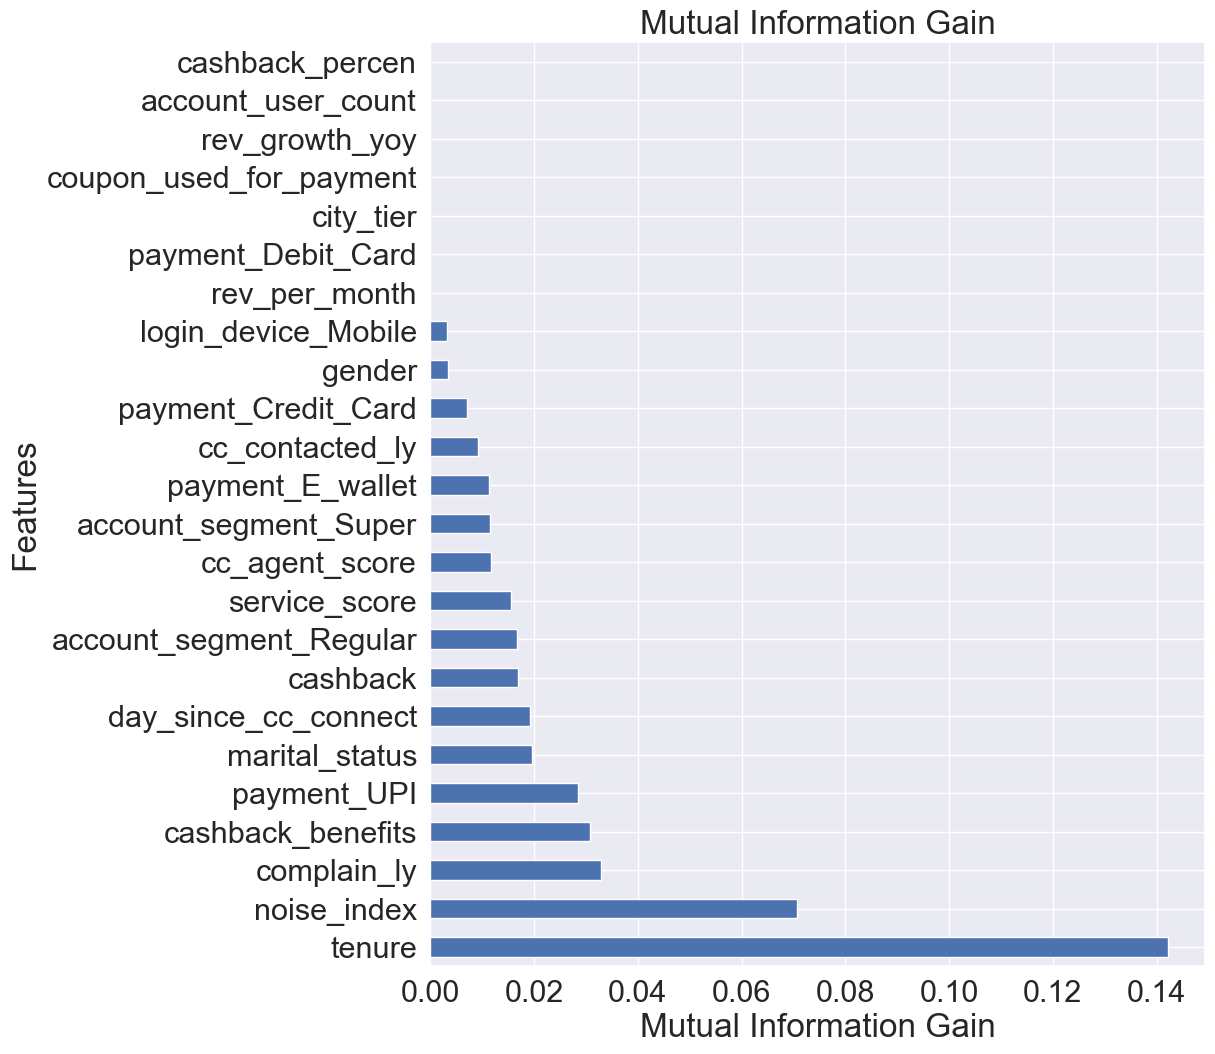

In [442]:
## mutual_info.sort_values(ascending = False).plot.bar(figsize = (15,5))

fig, ax = plt.subplots(figsize=(10, 12))
mutual_info_sorted.plot.barh(ax=ax)
ax.set_xlabel('Mutual Information Gain')
ax.set_ylabel('Features')
ax.set_title('Mutual Information Gain')
plt.show()

In [443]:
class_distribution = y.value_counts(normalize=True)
class_distribution

0    0.831922
1    0.168078
Name: churn, dtype: float64

**OBSERVATION**

83% is 0 values
17% is 1 values

which show a clear imbalance in the dataset, Thus we are now going use SMOTE to tackle this issue

### SMOTE

SMOTE (Synthetic Minority Over-sampling Technique) is a popular data augmentation technique used to balance class distributions by oversampling the minority class.

In [444]:
## pip install imbalanced-learn

In [445]:
from imblearn.over_sampling import SMOTE

In [446]:
# Instantiate the SMOTE object
smote = SMOTE(sampling_strategy=0.5, random_state=1, n_jobs=-1)

In [447]:
# Apply SMOTE to the training data
X_train, y_train = smote.fit_resample(X_train, y_train)

In [448]:
y_train.value_counts(normalize=True)

0    0.666667
1    0.333333
Name: churn, dtype: float64

In [449]:
# we are scaling the data for KNN. Without scaling it will give very poor results. Computations becomes easier
x_train_scaled=ss.fit_transform(X_train)
x_test_scaled=ss.transform(X_test)

In [450]:
## Train and test dataframe have been scaled now
X_train_bkp=X_train.copy()
X_test_bkp=X_test.copy()

In [451]:
lgr = LogisticRegression(random_state=1)
KNN = KNeighborsClassifier()
Bagg = BaggingClassifier(base_estimator=RandomForestClassifier(),n_estimators=100,random_state=1)
xgboost = XGBClassifier(random_state =1)
svm = SVC(probability= True, random_state =1)
na_bay = GaussianNB()
dt = DecisionTreeClassifier(random_state=1)
xtra_tree = ExtraTreesClassifier(random_state=1)
LDA = LinearDiscriminantAnalysis()

In [452]:
models=[lgr,KNN,Bagg,xgboost,svm,na_bay,dt,xtra_tree,LDA]

modelnames = ['Logistic_Regression','KNN','Bagging','XGBoost','Support_Vector_Machine','Naive_Bayes','Decision_Tree','Extra_Trees_Classifier','Linear_Discriminant_Analysis']
j=0
scores_train=[]
scores_test=[]
precision_train=[]
precision_test=[]
recall_train=[]
recall_test=[]
f1_train=[]
f1_test=[]
auc_train=[]
auc_test=[]
train_fpr=[]
test_fpr=[]
train_tpr=[]
test_tpr=[]
train_thresholds=[]
test_thresholds=[]

for i in models:  
# we are scaling the data for KNN. Without scaling it will give very poor results. Computations becomes easier
    
    if (i != KNN):       
        i.fit(X_train,y_train)
        ytrain_predict = i.predict(X_train)
        ytest_predict = i.predict(X_test)
        X_train_bkp["predicted_"+modelnames[j]] = ytrain_predict
        X_test_bkp["predicted_"+modelnames[j]] =ytest_predict
        
        scores_train.append(round(i.score(X_train, y_train),2))
        scores_test.append(round(i.score(X_test, y_test),2))
        
        precision, recall, f1 = extract_classfication_meterics(y_train,ytrain_predict)
        precision_train.append(precision)
        recall_train.append(recall)
        f1_train.append(f1)

        precision, recall, f1 = extract_classfication_meterics(y_test,ytest_predict)
        precision_test.append(precision)
        recall_test.append(recall)
        f1_test.append(f1)
       
        auc_train.append(round(roc_auc_score(y_train, i.predict_proba(X_train)[:, 1]),2))
        auc_test.append(round(roc_auc_score(y_test, i.predict_proba(X_test)[:, 1]),2))

        fpr, tpr, thresholds = roc_curve(y_train, i.predict_proba(X_train)[:, 1])
        train_fpr.append(fpr)
        train_tpr.append(tpr)
        train_thresholds.append(thresholds)           
        
        fpr, tpr, thresholds = roc_curve(y_test, i.predict_proba(X_test)[:, 1])
        test_fpr.append(fpr)
        test_tpr.append(tpr)
        test_thresholds.append(thresholds)           
        
    else:                         
        i.fit(x_train_scaled,y_train)
        ytrain_predict = i.predict(x_train_scaled)
        ytest_predict = i.predict(x_test_scaled)
        X_train_bkp["predicted_"+modelnames[j]] = ytrain_predict
        X_test_bkp["predicted_"+modelnames[j]] =ytest_predict
        
        scores_train.append(round(i.score(x_train_scaled, y_train),2))
        scores_test.append(round(i.score(x_test_scaled, y_test),2))
        
        precision, recall, f1 = extract_classfication_meterics(y_train,ytrain_predict)
        precision_train.append(precision)
        recall_train.append(recall)
        f1_train.append(f1)

        precision, recall, f1 = extract_classfication_meterics(y_test,ytest_predict)
        precision_test.append(precision)
        recall_test.append(recall)
        f1_test.append(f1)
       
        auc_train.append(round(roc_auc_score(y_train, i.predict_proba(x_train_scaled)[:, 1]),2))
        auc_test.append(round(roc_auc_score(y_test, i.predict_proba(x_test_scaled)[:, 1]),2))

        fpr, tpr, thresholds = roc_curve(y_train, i.predict_proba(x_train_scaled)[:, 1])
        train_fpr.append(fpr)
        train_tpr.append(tpr)
        train_thresholds.append(thresholds)           

        fpr, tpr, thresholds = roc_curve(y_test, i.predict_proba(x_test_scaled)[:, 1])
        test_fpr.append(fpr)
        test_tpr.append(tpr)
        test_thresholds.append(thresholds)           
        
    j=j+1

AUC for Logistic_Regression is: 0.88
AUC for KNN is: 1.0
AUC for Bagging is: 1.0
AUC for XGBoost is: 1.0
AUC for Support_Vector_Machine is: 0.81
AUC for Naive_Bayes is: 0.84
AUC for Decision_Tree is: 1.0
AUC for Extra_Trees_Classifier is: 1.0
AUC for Linear_Discriminant_Analysis is: 0.9


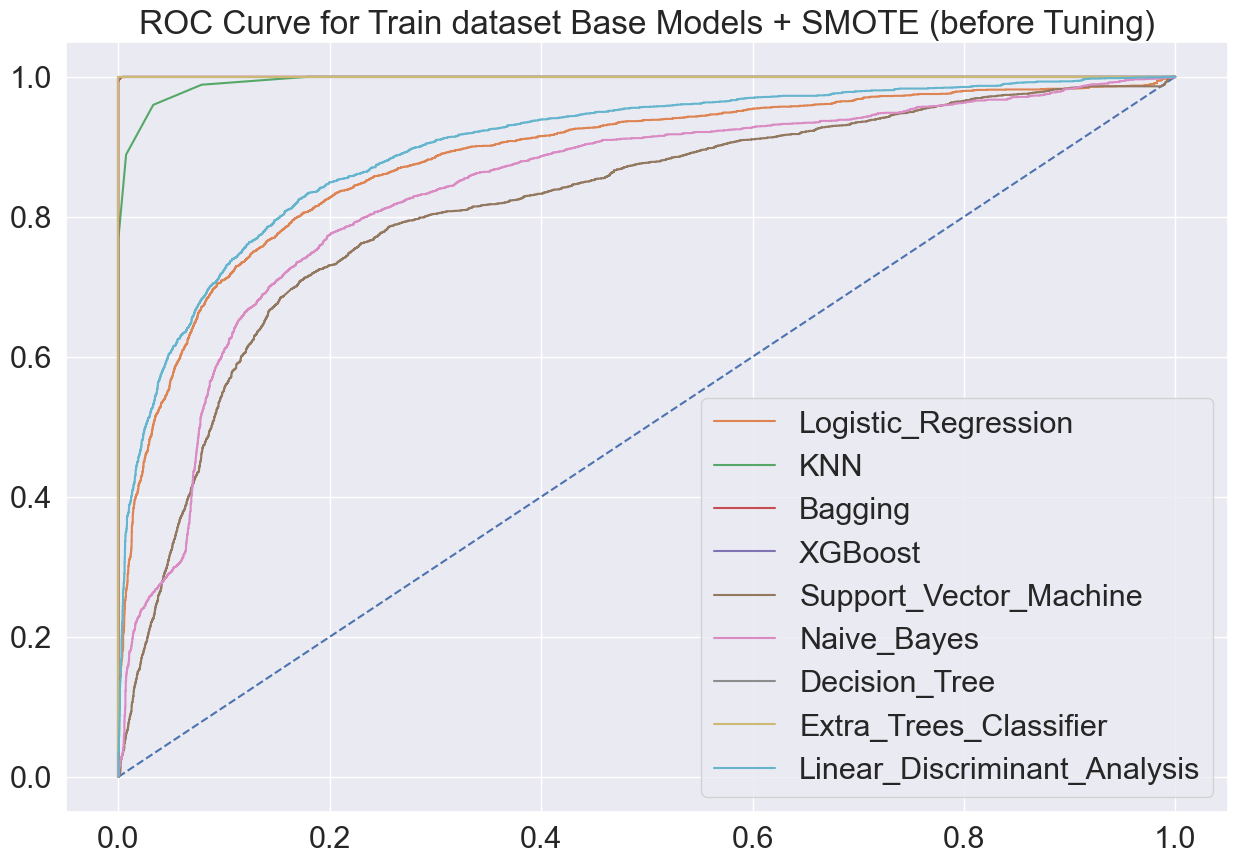

In [453]:
plt.figure(figsize=(15 ,10))
plt.plot([0, 1], [0, 1], linestyle='--')
j=0
for i in range(0,9):
    plt.plot(train_fpr[i], train_tpr[i],label = modelnames[j])
    print ('AUC for',modelnames[j],'is:',auc_train[j])
    j=j+1
plt.title('ROC Curve for Train dataset Base Models + SMOTE (before Tuning)')
plt.legend(loc='best')
plt.show()

AUC for Logistic_Regression is: 0.83
AUC for KNN is: 0.96
AUC for Bagging is: 0.98
AUC for XGBoost is: 0.98
AUC for Support_Vector_Machine is: 0.81
AUC for Naive_Bayes is: 0.8
AUC for Decision_Tree is: 0.88
AUC for Extra_Trees_Classifier is: 0.99
AUC for Linear_Discriminant_Analysis is: 0.85


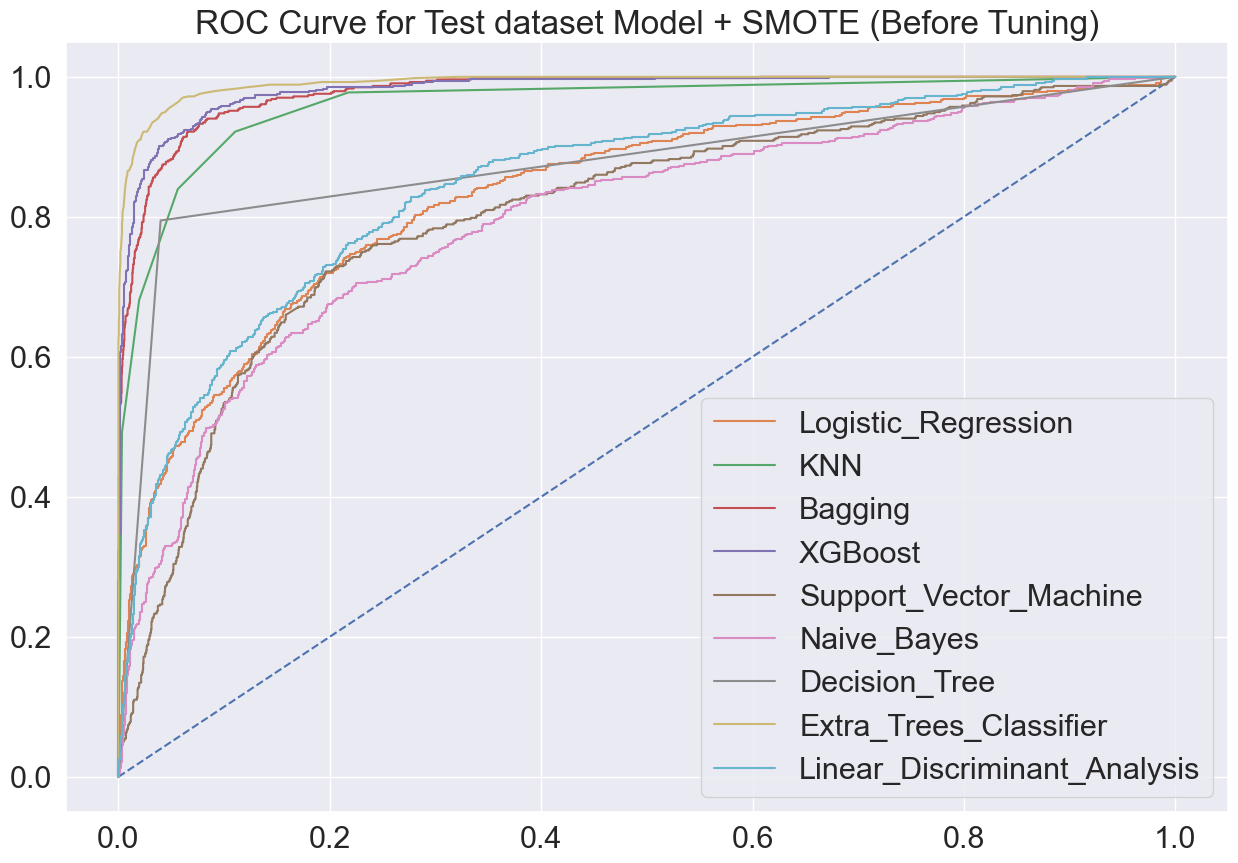

In [454]:
plt.figure(figsize=(15 ,10))
plt.plot([0, 1], [0, 1], linestyle='--')
j=0
for i in range(0,9):
    plt.plot(test_fpr[i], test_tpr[i],label = modelnames[j])
    print ('AUC for',modelnames[j],'is:',auc_test[j])
    j=j+1
plt.title('ROC Curve for Test dataset Model + SMOTE (Before Tuning)')
plt.legend(loc='best')
plt.show()

In [455]:
smote_models_preform_before_tuned=(pd.DataFrame({'Train Accuracy': scores_train,'Test Accuracy': scores_test,'Train AUC':auc_train,'Test AUC': auc_test,'Train Recall':recall_train,'Test Recall': recall_test,'Train precision':precision_train,'Test precision': precision_test,'Train f1':f1_train,'Test f1': f1_test},
            index=['Logistic_Regression','KNN','Bagging','XGBoost','Support_Vector_Machine','Naive_Bayes','Decision_Tree','Extra_Trees_Classifier','Linear_Discriminant_Analysis']))        
smote_models_preform_before_tuned

Train Accuracy  Test Accuracy  Train AUC  \
Logistic_Regression                     0.84           0.84       0.88   
KNN                                     0.96           0.93       1.00   
Bagging                                 1.00           0.94       1.00   
XGBoost                                 1.00           0.96       1.00   
Support_Vector_Machine                  0.73           0.84       0.81   
Naive_Bayes                             0.81           0.83       0.84   
Decision_Tree                           1.00           0.93       1.00   
Extra_Trees_Classifier                  1.00           0.97       1.00   
Linear_Discriminant_Analysis            0.84           0.86       0.90   

                              Test AUC  Train Recall  Test Recall  \
Logistic_Regression               0.83          0.70         0.57   
KNN                               0.96          0.96         0.84   
Bagging                           0.98          1.00         0.77   
XGBoost                           0.98          1.00         0.83   
Support_Vector_Machine            0.81          0.27         0.26   
Naive_Bayes                       0.80          0.66         0.56   
Decision_Tree                     0.88          1.00         0.79   
Extra_Trees_Classifier            0.99          1.00         0.85   
Linear_Discriminant_Analysis      0.85          0.68         0.54   

                              Train precision  Test precision  Train f1  \
Logistic_Regression                      0.79            0.52      0.74   
KNN                                      0.94            0.75      0.95   
Bagging                                  1.00            0.88      1.00   
XGBoost                                  1.00            0.91      1.00   
Support_Vector_Machine                   0.77            0.55      0.40   
Naive_Bayes                              0.74            0.49      0.70   
Decision_Tree                            1.00            0.80      1.00   
Extra_Trees_Classifier                   1.00            0.96      1.00   
Linear_Discriminant_Analysis             0.81            0.58      0.74   

                              Test f1  
Logistic_Regression              0.54  
KNN                              0.79  
Bagging                          0.82  
XGBoost                          0.87  
Support_Vector_Machine           0.35  
Naive_Bayes                      0.52  
Decision_Tree                    0.80  
Extra_Trees_Classifier           0.90  
Linear_Discriminant_Analysis     0.56

### Models after Tuning (SMOTE)

In [456]:
## Logistic regression

lgr = LogisticRegression(penalty = 'l2', solver = 'lbfgs', tol = 0.0001 ,random_state=1)


## KNN
KNN = KNeighborsClassifier(n_neighbors = 11,p = 1,weights ='uniform')

## BAGGING
base_estimator = RandomForestClassifier(n_estimators= 50,
                                        max_depth=10,
                                        min_samples_leaf= 1,
                                        min_samples_split= 5,
                                        max_features= 'sqrt',
                                        )
Bagg = BaggingClassifier(base_estimator=base_estimator,random_state=1,
                         bootstrap= True,
                         bootstrap_features= False,
                         max_features= 0.7,
                         max_samples= 0.7,
                         n_estimators= 100)

## XGBoost
xgboost = XGBClassifier(random_state =1,colsample_bytree= 0.9,
                        gamma= 0,
                        learning_rate= 0.3,
                        max_depth= 7,
                        n_estimators= 100,
                        reg_lambda= 1,
                        subsample= 0.9)


## SUPPORT VECTOR MACHINE
svm = SVC(probability= True, random_state =1,C= 10, coef0= 1, degree= 2, gamma= 'scale', kernel= 'rbf')

##Naive Bayes
na_bay = GaussianNB(var_smoothing = 1e-07)

## Decision Tree 
dt = DecisionTreeClassifier(random_state=1,criterion= 'entropy',
                            max_depth= None, max_features= None,
                            min_samples_leaf= 1, 
                            min_samples_split= 2)

## Extra Tree Classifier 
xtra_tree = ExtraTreesClassifier(random_state=1,bootstrap= False, criterion= 'gini',
                                 max_depth= 30,
                                 max_features= 'auto',
                                 min_samples_leaf= 2,
                                 min_samples_split= 2, n_estimators= 100)

## Linear Discriminant Analysis
LDA = LinearDiscriminantAnalysis(n_components= None, 
                                 shrinkage= 'auto',
                                 solver= 'lsqr',
                                 tol= 0.0001)

In [457]:
models=[lgr,KNN,Bagg,xgboost,svm,na_bay,dt,xtra_tree,LDA]

modelnames = ['Logistic_Regression','KNN','Bagging','XGBoost','Support_Vector_Machine','Naive_Bayes','Decision_Tree','Extra_Trees_Classifier','Linear_Discriminant_Analysis']
j=0
scores_train=[]
scores_test=[]
precision_train=[]
precision_test=[]
recall_train=[]
recall_test=[]
f1_train=[]
f1_test=[]
auc_train=[]
auc_test=[]
train_fpr=[]
test_fpr=[]
train_tpr=[]
test_tpr=[]
train_thresholds=[]
test_thresholds=[]

for i in models:  
# we are scaling the data for KNN. Without scaling it will give very poor results. Computations becomes easier
    
    if (i != KNN):       
        i.fit(X_train,y_train)
        ytrain_predict = i.predict(X_train)
        ytest_predict = i.predict(X_test)
        X_train_bkp["predicted_"+modelnames[j]] = ytrain_predict
        X_test_bkp["predicted_"+modelnames[j]] =ytest_predict
        
        scores_train.append(round(i.score(X_train, y_train),2))
        scores_test.append(round(i.score(X_test, y_test),2))
        
        precision, recall, f1 = extract_classfication_meterics(y_train,ytrain_predict)
        precision_train.append(precision)
        recall_train.append(recall)
        f1_train.append(f1)

        precision, recall, f1 = extract_classfication_meterics(y_test,ytest_predict)
        precision_test.append(precision)
        recall_test.append(recall)
        f1_test.append(f1)
       
        auc_train.append(round(roc_auc_score(y_train, i.predict_proba(X_train)[:, 1]),2))
        auc_test.append(round(roc_auc_score(y_test, i.predict_proba(X_test)[:, 1]),2))

        fpr, tpr, thresholds = roc_curve(y_train, i.predict_proba(X_train)[:, 1])
        train_fpr.append(fpr)
        train_tpr.append(tpr)
        train_thresholds.append(thresholds)           
        
        fpr, tpr, thresholds = roc_curve(y_test, i.predict_proba(X_test)[:, 1])
        test_fpr.append(fpr)
        test_tpr.append(tpr)
        test_thresholds.append(thresholds)           
        
    else:                         
        i.fit(x_train_scaled,y_train)
        ytrain_predict = i.predict(x_train_scaled)
        ytest_predict = i.predict(x_test_scaled)
        X_train_bkp["predicted_"+modelnames[j]] = ytrain_predict
        X_test_bkp["predicted_"+modelnames[j]] =ytest_predict
        
        scores_train.append(round(i.score(x_train_scaled, y_train),2))
        scores_test.append(round(i.score(x_test_scaled, y_test),2))
        
        precision, recall, f1 = extract_classfication_meterics(y_train,ytrain_predict)
        precision_train.append(precision)
        recall_train.append(recall)
        f1_train.append(f1)

        precision, recall, f1 = extract_classfication_meterics(y_test,ytest_predict)
        precision_test.append(precision)
        recall_test.append(recall)
        f1_test.append(f1)
       
        auc_train.append(round(roc_auc_score(y_train, i.predict_proba(x_train_scaled)[:, 1]),2))
        auc_test.append(round(roc_auc_score(y_test, i.predict_proba(x_test_scaled)[:, 1]),2))

        fpr, tpr, thresholds = roc_curve(y_train, i.predict_proba(x_train_scaled)[:, 1])
        train_fpr.append(fpr)
        train_tpr.append(tpr)
        train_thresholds.append(thresholds)           

        fpr, tpr, thresholds = roc_curve(y_test, i.predict_proba(x_test_scaled)[:, 1])
        test_fpr.append(fpr)
        test_tpr.append(tpr)
        test_thresholds.append(thresholds)           
        
    j=j+1

AUC for Logistic_Regression is: 0.88
AUC for KNN is: 0.99
AUC for Bagging is: 0.99
AUC for XGBoost is: 1.0
AUC for Support_Vector_Machine is: 0.87
AUC for Naive_Bayes is: 0.84
AUC for Decision_Tree is: 1.0
AUC for Extra_Trees_Classifier is: 1.0
AUC for Linear_Discriminant_Analysis is: 0.9


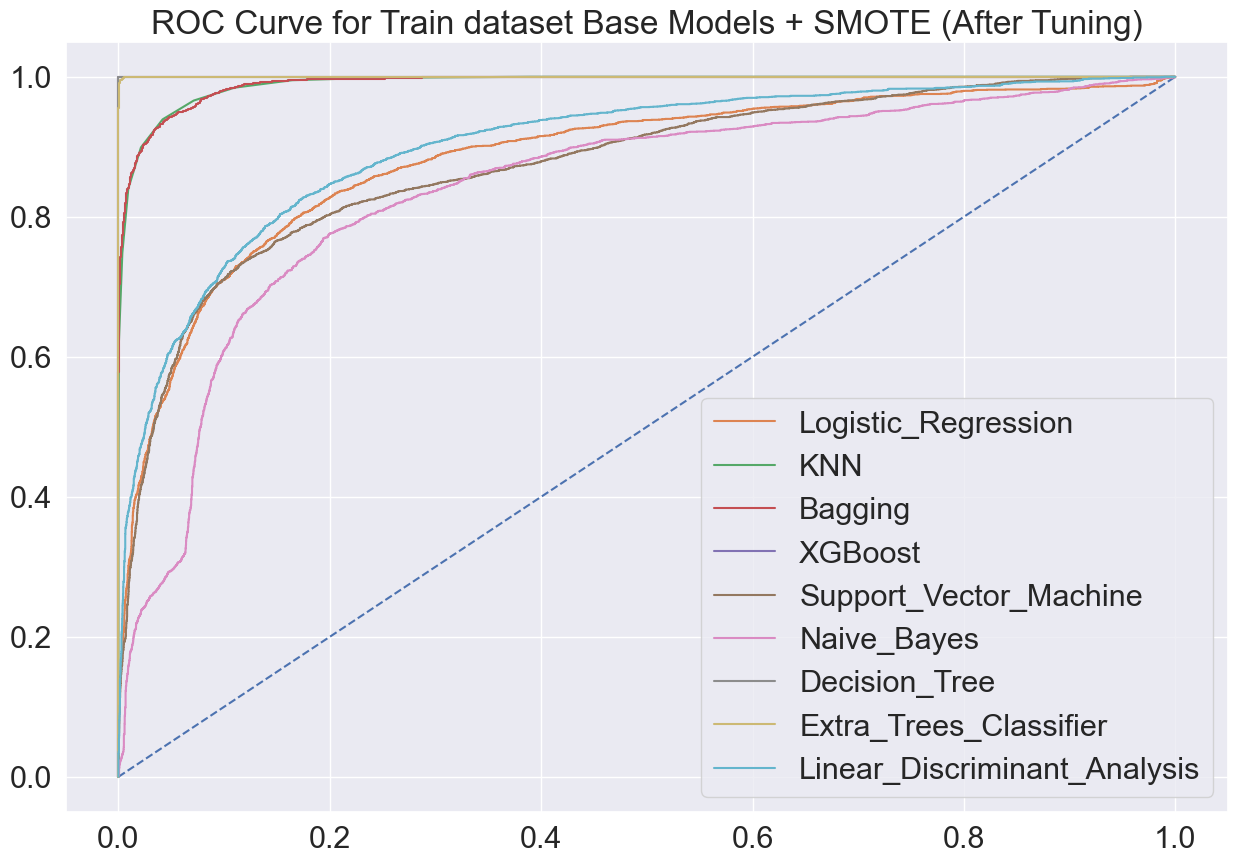

In [458]:
plt.figure(figsize=(15 ,10))
plt.plot([0, 1], [0, 1], linestyle='--')
j=0
for i in range(0,9):
    plt.plot(train_fpr[i], train_tpr[i],label = modelnames[j])
    print ('AUC for',modelnames[j],'is:',auc_train[j])
    j=j+1
plt.title('ROC Curve for Train dataset Base Models + SMOTE (After Tuning)')
plt.legend(loc='best')
plt.show()

AUC for Logistic_Regression is: 0.83
AUC for KNN is: 0.96
AUC for Bagging is: 0.95
AUC for XGBoost is: 0.99
AUC for Support_Vector_Machine is: 0.86
AUC for Naive_Bayes is: 0.8
AUC for Decision_Tree is: 0.88
AUC for Extra_Trees_Classifier is: 0.98
AUC for Linear_Discriminant_Analysis is: 0.85


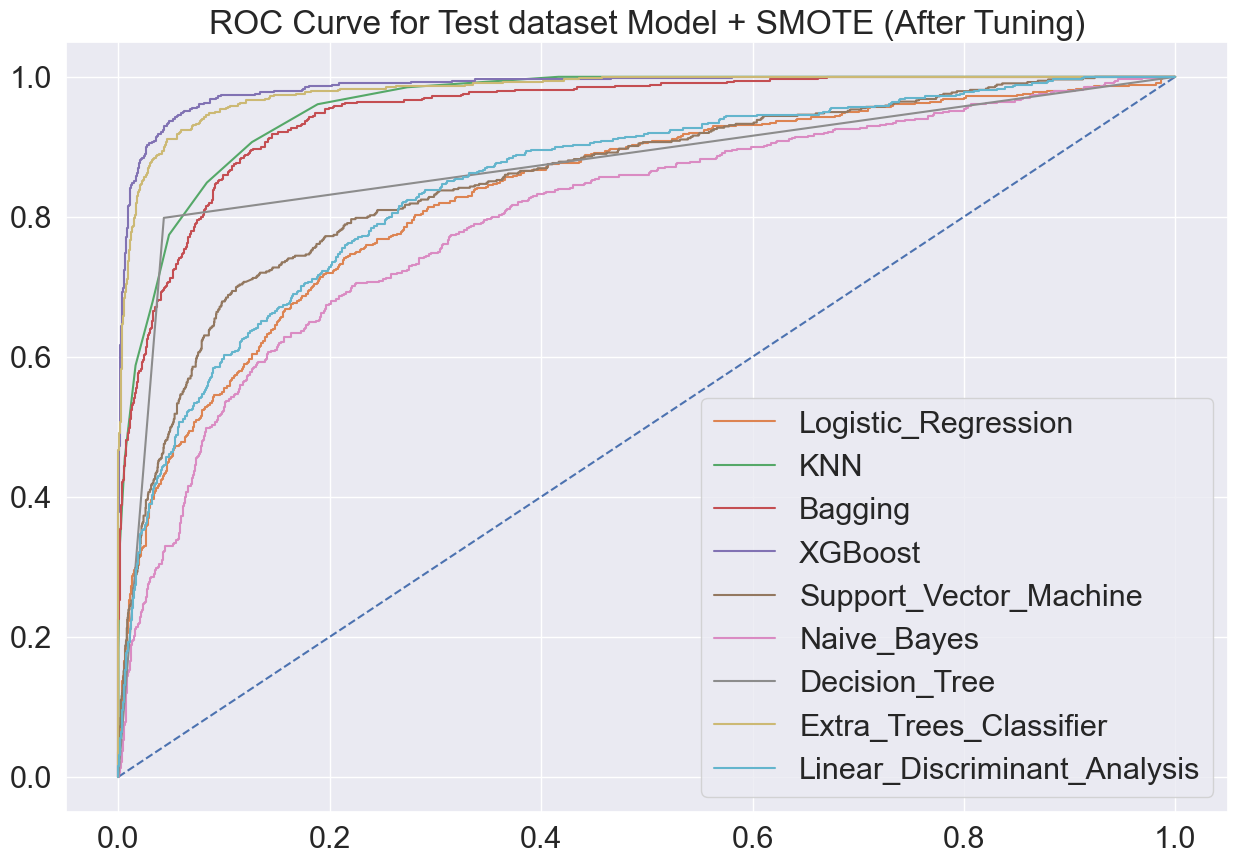

In [459]:
plt.figure(figsize=(15 ,10))
plt.plot([0, 1], [0, 1], linestyle='--')
j=0
for i in range(0,9):
    plt.plot(test_fpr[i], test_tpr[i],label = modelnames[j])
    print ('AUC for',modelnames[j],'is:',auc_test[j])
    j=j+1
plt.title('ROC Curve for Test dataset Model + SMOTE (After Tuning)')
plt.legend(loc='best')
plt.show()

In [460]:
smote_models_preform_after_tuned=(pd.DataFrame({'Train Accuracy': scores_train,'Test Accuracy': scores_test,'Train AUC':auc_train,'Test AUC': auc_test,'Train Recall':recall_train,'Test Recall': recall_test,'Train precision':precision_train,'Test precision': precision_test,'Train f1':f1_train,'Test f1': f1_test},
            index=['Logistic_Regression','KNN','Bagging','XGBoost','Support_Vector_Machine','Naive_Bayes','Decision_Tree','Extra_Trees_Classifier','Linear_Discriminant_Analysis']))        
smote_models_preform_after_tuned

Train Accuracy  Test Accuracy  Train AUC  \
Logistic_Regression                     0.84           0.84       0.88   
KNN                                     0.95           0.92       0.99   
Bagging                                 0.95           0.91       0.99   
XGBoost                                 1.00           0.96       1.00   
Support_Vector_Machine                  0.83           0.84       0.87   
Naive_Bayes                             0.81           0.83       0.84   
Decision_Tree                           1.00           0.93       1.00   
Extra_Trees_Classifier                  1.00           0.95       1.00   
Linear_Discriminant_Analysis            0.84           0.86       0.90   

                              Test AUC  Train Recall  Test Recall  \
Logistic_Regression               0.83          0.70         0.57   
KNN                               0.96          0.94         0.77   
Bagging                           0.95          0.87         0.65   
XGBoost                           0.99          1.00         0.85   
Support_Vector_Machine            0.86          0.74         0.71   
Naive_Bayes                       0.80          0.66         0.56   
Decision_Tree                     0.88          1.00         0.80   
Extra_Trees_Classifier            0.98          0.99         0.79   
Linear_Discriminant_Analysis      0.85          0.69         0.55   

                              Train precision  Test precision  Train f1  \
Logistic_Regression                      0.79            0.52      0.74   
KNN                                      0.92            0.77      0.93   
Bagging                                  0.97            0.80      0.92   
XGBoost                                  1.00            0.92      1.00   
Support_Vector_Machine                   0.75            0.53      0.74   
Naive_Bayes                              0.74            0.49      0.70   
Decision_Tree                            1.00            0.79      1.00   
Extra_Trees_Classifier                   1.00            0.91      0.99   
Linear_Discriminant_Analysis             0.81            0.58      0.74   

                              Test f1  
Logistic_Regression              0.54  
KNN                              0.77  
Bagging                          0.72  
XGBoost                          0.88  
Support_Vector_Machine           0.61  
Naive_Bayes                      0.52  
Decision_Tree                    0.79  
Extra_Trees_Classifier           0.85  
Linear_Discriminant_Analysis     0.56

### Lets Compare Models (Before and After SMOTE)

In [461]:
smote_models_preform_before_tuned

Train Accuracy  Test Accuracy  Train AUC  \
Logistic_Regression                     0.84           0.84       0.88   
KNN                                     0.96           0.93       1.00   
Bagging                                 1.00           0.94       1.00   
XGBoost                                 1.00           0.96       1.00   
Support_Vector_Machine                  0.73           0.84       0.81   
Naive_Bayes                             0.81           0.83       0.84   
Decision_Tree                           1.00           0.93       1.00   
Extra_Trees_Classifier                  1.00           0.97       1.00   
Linear_Discriminant_Analysis            0.84           0.86       0.90   

                              Test AUC  Train Recall  Test Recall  \
Logistic_Regression               0.83          0.70         0.57   
KNN                               0.96          0.96         0.84   
Bagging                           0.98          1.00         0.77   
XGBoost                           0.98          1.00         0.83   
Support_Vector_Machine            0.81          0.27         0.26   
Naive_Bayes                       0.80          0.66         0.56   
Decision_Tree                     0.88          1.00         0.79   
Extra_Trees_Classifier            0.99          1.00         0.85   
Linear_Discriminant_Analysis      0.85          0.68         0.54   

                              Train precision  Test precision  Train f1  \
Logistic_Regression                      0.79            0.52      0.74   
KNN                                      0.94            0.75      0.95   
Bagging                                  1.00            0.88      1.00   
XGBoost                                  1.00            0.91      1.00   
Support_Vector_Machine                   0.77            0.55      0.40   
Naive_Bayes                              0.74            0.49      0.70   
Decision_Tree                            1.00            0.80      1.00   
Extra_Trees_Classifier                   1.00            0.96      1.00   
Linear_Discriminant_Analysis             0.81            0.58      0.74   

                              Test f1  
Logistic_Regression              0.54  
KNN                              0.79  
Bagging                          0.82  
XGBoost                          0.87  
Support_Vector_Machine           0.35  
Naive_Bayes                      0.52  
Decision_Tree                    0.80  
Extra_Trees_Classifier           0.90  
Linear_Discriminant_Analysis     0.56

In [462]:
smote_models_preform_after_tuned

Train Accuracy  Test Accuracy  Train AUC  \
Logistic_Regression                     0.84           0.84       0.88   
KNN                                     0.95           0.92       0.99   
Bagging                                 0.95           0.91       0.99   
XGBoost                                 1.00           0.96       1.00   
Support_Vector_Machine                  0.83           0.84       0.87   
Naive_Bayes                             0.81           0.83       0.84   
Decision_Tree                           1.00           0.93       1.00   
Extra_Trees_Classifier                  1.00           0.95       1.00   
Linear_Discriminant_Analysis            0.84           0.86       0.90   

                              Test AUC  Train Recall  Test Recall  \
Logistic_Regression               0.83          0.70         0.57   
KNN                               0.96          0.94         0.77   
Bagging                           0.95          0.87         0.65   
XGBoost                           0.99          1.00         0.85   
Support_Vector_Machine            0.86          0.74         0.71   
Naive_Bayes                       0.80          0.66         0.56   
Decision_Tree                     0.88          1.00         0.80   
Extra_Trees_Classifier            0.98          0.99         0.79   
Linear_Discriminant_Analysis      0.85          0.69         0.55   

                              Train precision  Test precision  Train f1  \
Logistic_Regression                      0.79            0.52      0.74   
KNN                                      0.92            0.77      0.93   
Bagging                                  0.97            0.80      0.92   
XGBoost                                  1.00            0.92      1.00   
Support_Vector_Machine                   0.75            0.53      0.74   
Naive_Bayes                              0.74            0.49      0.70   
Decision_Tree                            1.00            0.79      1.00   
Extra_Trees_Classifier                   1.00            0.91      0.99   
Linear_Discriminant_Analysis             0.81            0.58      0.74   

                              Test f1  
Logistic_Regression              0.54  
KNN                              0.77  
Bagging                          0.72  
XGBoost                          0.88  
Support_Vector_Machine           0.61  
Naive_Bayes                      0.52  
Decision_Tree                    0.79  
Extra_Trees_Classifier           0.85  
Linear_Discriminant_Analysis     0.56

**Observations**

* Even after SMOTE we can see that 3 models are performing good:
    * Extra Tree Classifier
    * XGBoost 
    * KNN

## EXTRA TREE CLASSIFIER is the best model out of all the 9 models

### Lets check the mututal gain after SMOTE

### Mutual Information  Gain(SMOTE)

In [463]:
mutual_info = mutual_info_regression(X_train,y_train)
mutual_info

array([0.25794411, 0.0710745 , 0.19963825, 0.0103566 , 0.09373035,
       0.1352689 , 0.15184727, 0.05370109, 0.18784536, 0.13487061,
       0.18708502, 0.15135113, 0.16122949, 0.16499176, 0.06407436,
       0.00219959, 0.06359828, 0.        , 0.01896791, 0.        ,
       0.        , 0.00680921, 0.03939115, 0.0168908 ])

In [464]:
# Convert into Series
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info_sorted = mutual_info.sort_values(ascending = False)
mutual_info_sorted

tenure                     0.257944
cc_contacted_ly            0.199638
rev_per_month              0.187845
rev_growth_yoy             0.187085
cashback                   0.164992
day_since_cc_connect       0.161229
cc_agent_score             0.151847
coupon_used_for_payment    0.151351
account_user_count         0.135269
complain_ly                0.134871
service_score              0.093730
city_tier                  0.071075
noise_index                0.064074
cashback_benefits          0.063598
marital_status             0.053701
account_segment_Super      0.039391
payment_Debit_Card         0.018968
login_device_Mobile        0.016891
gender                     0.010357
account_segment_Regular    0.006809
cashback_percen            0.002200
payment_Credit_Card        0.000000
payment_E_wallet           0.000000
payment_UPI                0.000000
dtype: float64

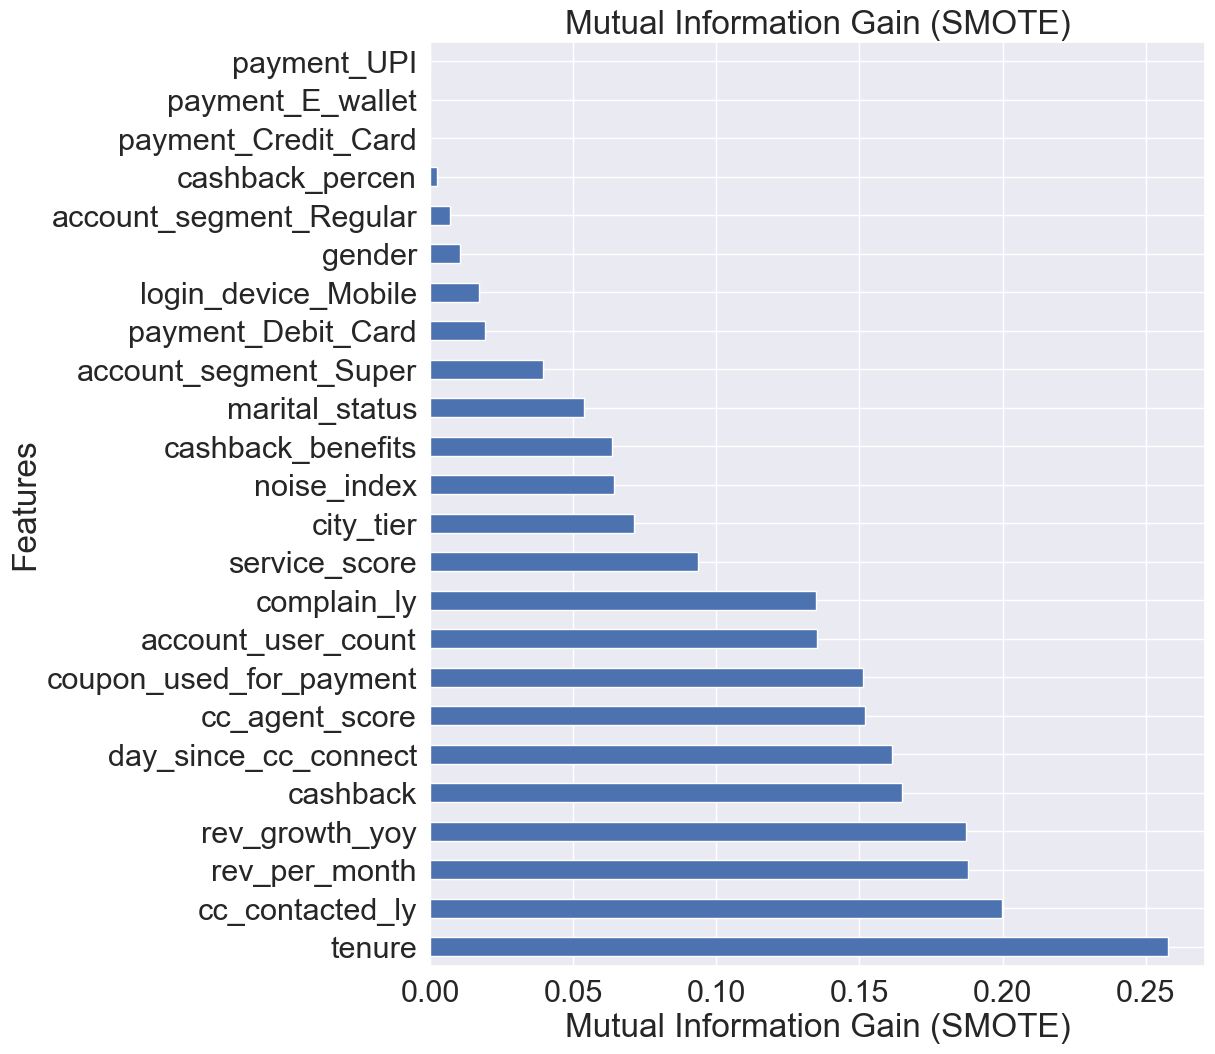

In [465]:
## mutual_info.sort_values(ascending = False).plot.bar(figsize = (15,5))

fig, ax = plt.subplots(figsize=(10, 12))
mutual_info_sorted.plot.barh(ax=ax)
ax.set_xlabel('Mutual Information Gain (SMOTE)')
ax.set_ylabel('Features')
ax.set_title('Mutual Information Gain (SMOTE)')
plt.show()

### SHAP VALUES for out top 3 MODELS

In [466]:
X = df.drop('churn', axis =1)
y = df['churn']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.30,stratify=y)

#### Extra Tree Classifier

In [467]:
xtra_tree = ExtraTreesClassifier(random_state=1,bootstrap= False, criterion= 'gini',
                                 max_depth= 30,
                                 max_features= 'auto',
                                 min_samples_leaf= 2,
                                 min_samples_split= 2, n_estimators= 100)

In [468]:
xtra_tree.fit(X_train, y_train)

ExtraTreesClassifier(max_depth=30, min_samples_leaf=2, random_state=1)

In [469]:
# Create a SHAP explainer object
explainer = shap.TreeExplainer(xtra_tree)

# Generate the SHAP values for the entire dataset
shap_values = explainer.shap_values(X_train)

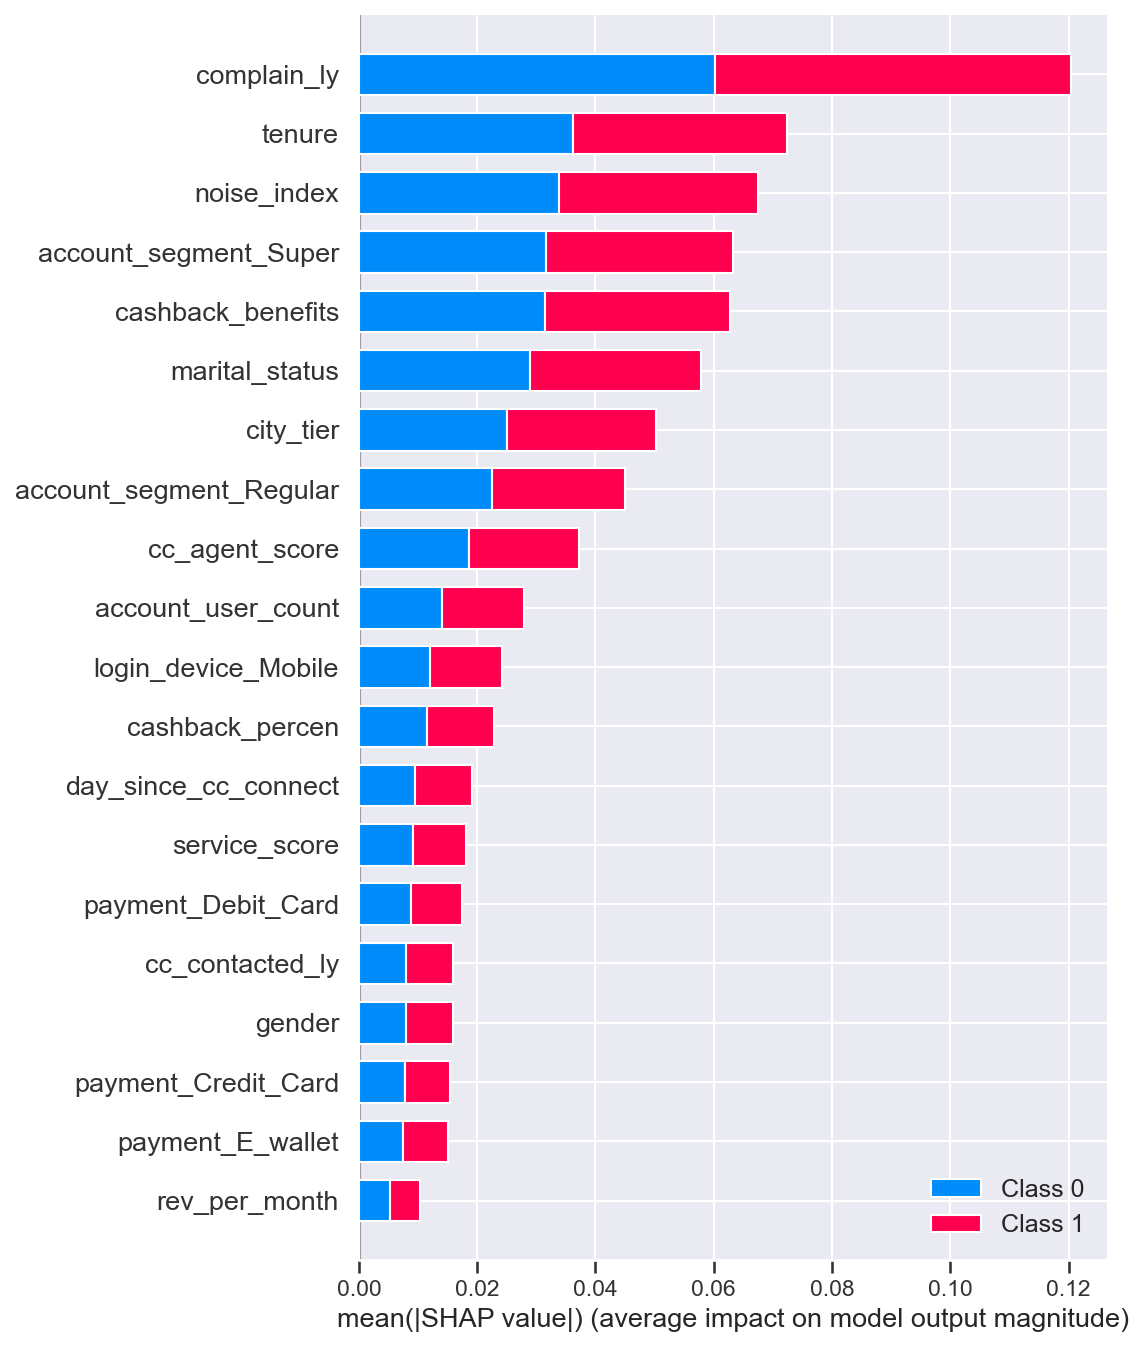

In [470]:
plt.figure(figsize = (10,8),dpi = 150)

shap.summary_plot(shap_values,X_train,feature_names = X_train.columns)
plt.show();

### XGBoost

In [471]:
xgboost = XGBClassifier(random_state =1,colsample_bytree= 0.9,
                        gamma= 0,
                        learning_rate= 0.3,
                        max_depth= 7,
                        n_estimators= 100,
                        reg_lambda= 1,
                        subsample= 0.9)

In [472]:
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [473]:
# Create a SHAP explainer object
explainer = shap.TreeExplainer(xtra_tree)

# Generate the SHAP values for the entire dataset
shap_values = explainer.shap_values(X_train)

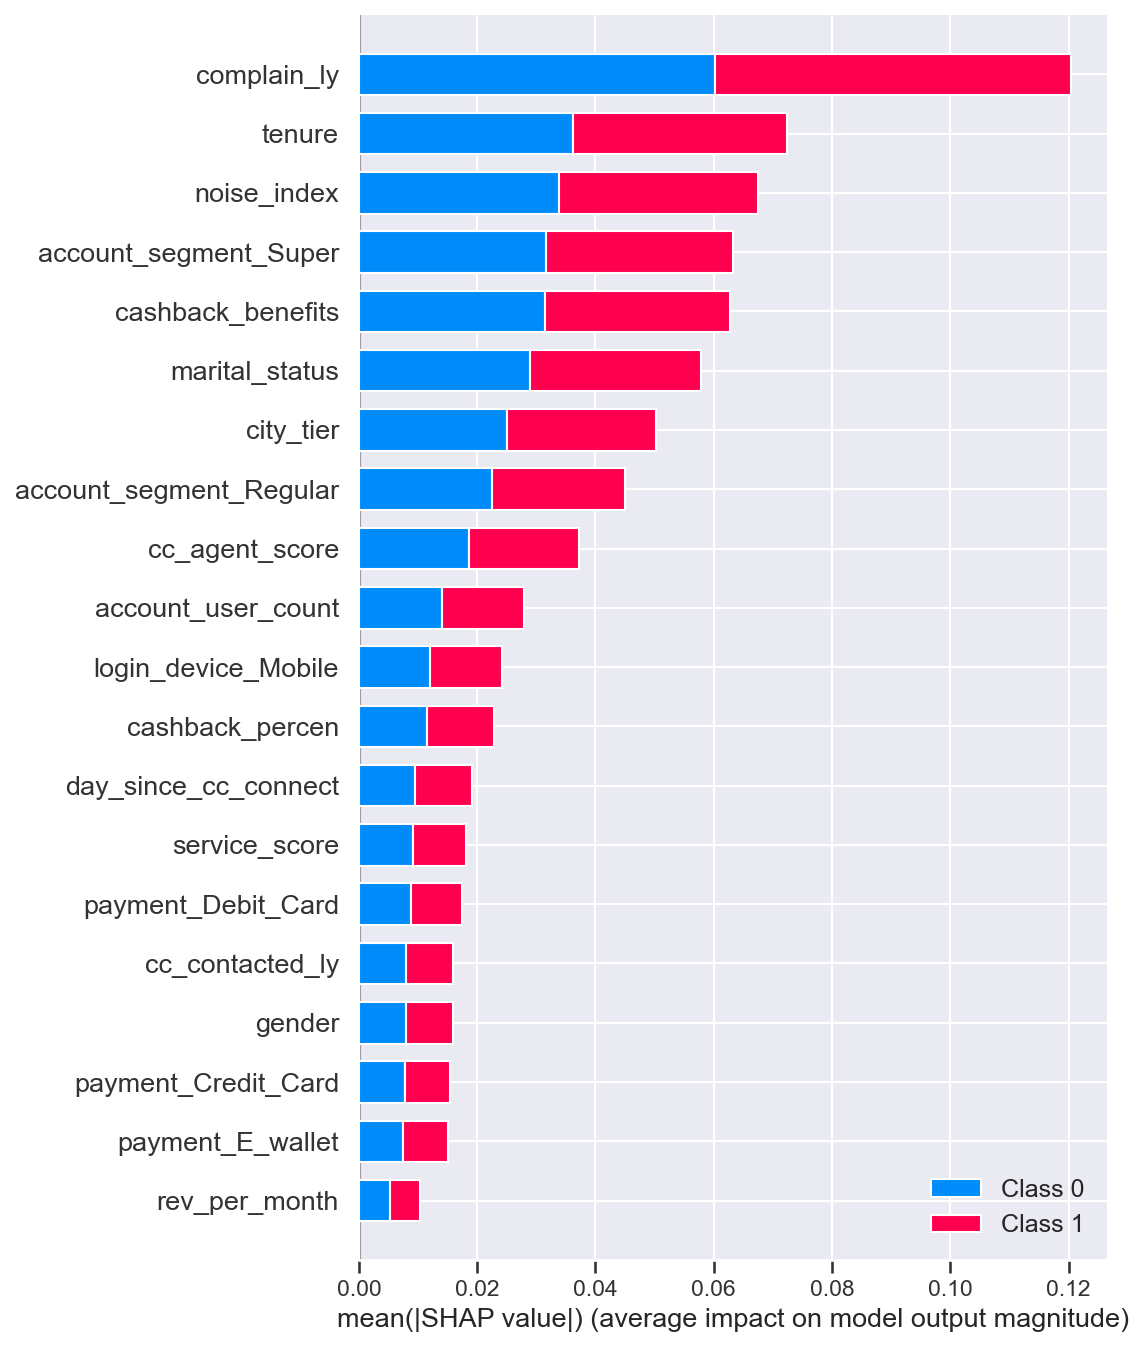

In [474]:
plt.figure(figsize = (10,8),dpi = 150)

shap.summary_plot(shap_values,X_train,feature_names = X_train.columns)
plt.show();

### KNN SHAP Value

In [475]:
KNN = KNeighborsClassifier(n_neighbors = 11,p = 1,weights ='uniform')
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11, p=1)

In [476]:
background = shap.sample(X_train, 50)
explainer = shap.KernelExplainer(KNN.predict_proba, background)

  0%|          | 0/50 [00:00<?, ?it/s]

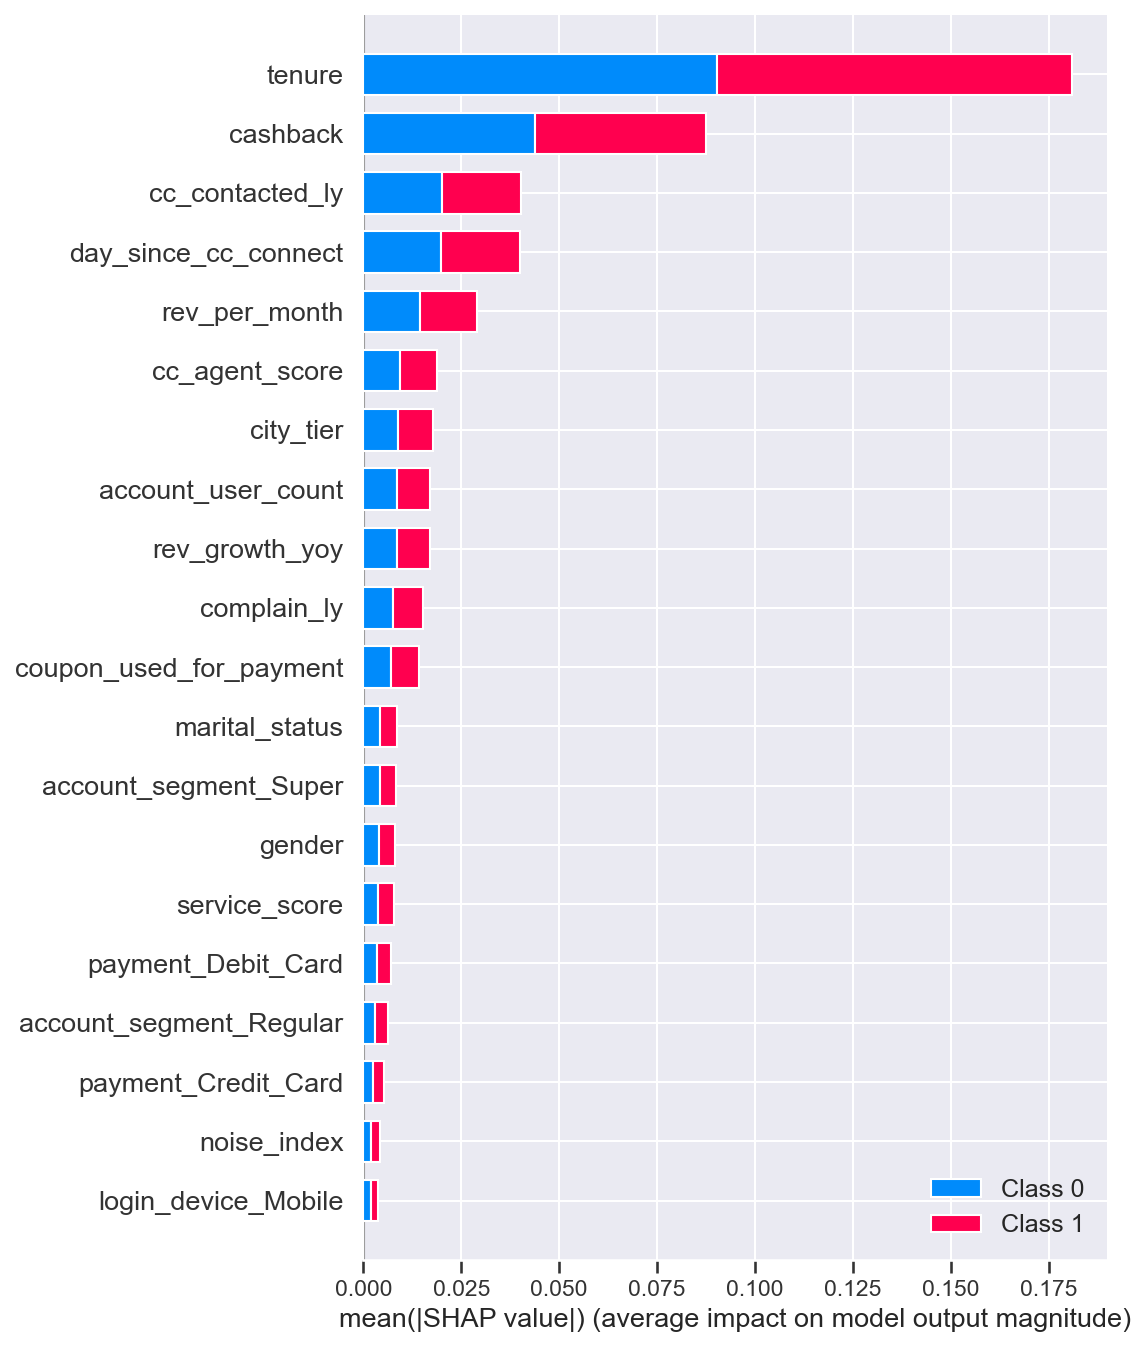

In [477]:
shap_values = explainer.shap_values(background)

plt.figure(figsize = (10,8),dpi = 150)

shap.summary_plot(shap_values,background,feature_names = X_train.columns)
plt.show();

### Confussion Matrix & Classifiacation report of Final Model

### Extra Tree Classifier

In [478]:
# Performance Matrix on the train data

y_train_predict = xtra_tree.predict(X_train)
model_score = xtra_tree.score(X_train,y_train)

print('Accuracy Score Train : ',model_score)
print('\nConfusion matrix Train : ')
print(metrics.confusion_matrix(y_train, y_train_predict))
print('\nClassification Report Train : ')
print(metrics.classification_report(y_train, y_train_predict))

Accuracy Score Train :  0.9942188760419468

Confusion matrix Train : 
[[6188    0]
 [  43 1207]]

Classification Report Train : 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6188
           1       1.00      0.97      0.98      1250

    accuracy                           0.99      7438
   macro avg       1.00      0.98      0.99      7438
weighted avg       0.99      0.99      0.99      7438



Accuracy Score 0.9942
F1 Score 0.9825 

True Negative: 6188 
False Positives: 0 
False Negatives: 43 
True Positives: 1207 

Confusion Matrix Train :



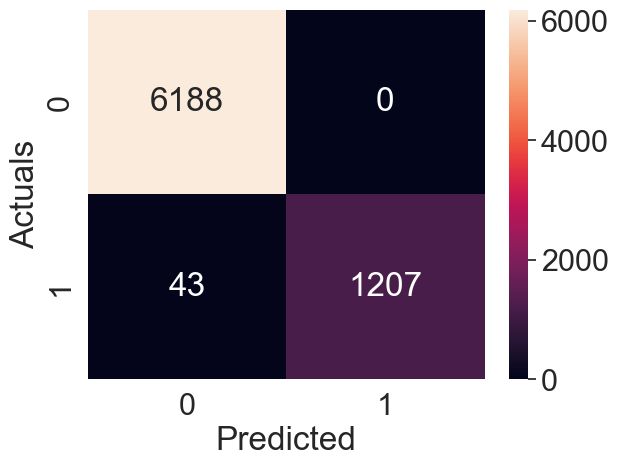

<Figure size 200x300 with 0 Axes>

In [484]:
sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals');

print('Accuracy Score',round(metrics.accuracy_score(y_train,y_train_predict),4))
print('F1 Score',round(metrics.f1_score(y_train,y_train_predict),4),'\n')
plt.figure(figsize=(2,3))

tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_train_predict).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n')

print('Confusion Matrix Train :''\n')

In [486]:
## Performance Matrix on test data set

y_test_predict = xtra_tree.predict(X_test)
model_score = xtra_tree.score(X_test, y_test)
print('Accuracy Score Test : ',model_score)
print('\nConfusion matrix Test : ')
print(metrics.confusion_matrix(y_test, y_test_predict))
print('\nClassification Report Test : ')
print(metrics.classification_report(y_test, y_test_predict))

Accuracy Score Test :  0.9526348808030113

Confusion matrix Test : 
[[2635   17]
 [ 134  402]]

Classification Report Test : 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2652
           1       0.96      0.75      0.84       536

    accuracy                           0.95      3188
   macro avg       0.96      0.87      0.91      3188
weighted avg       0.95      0.95      0.95      3188



Accuracy Score 0.9526
F1 Score 0.8419 

True Negative: 2635 
False Positives: 17 
False Negatives: 134 
True Positives: 402 

Confusion Matrix Test :



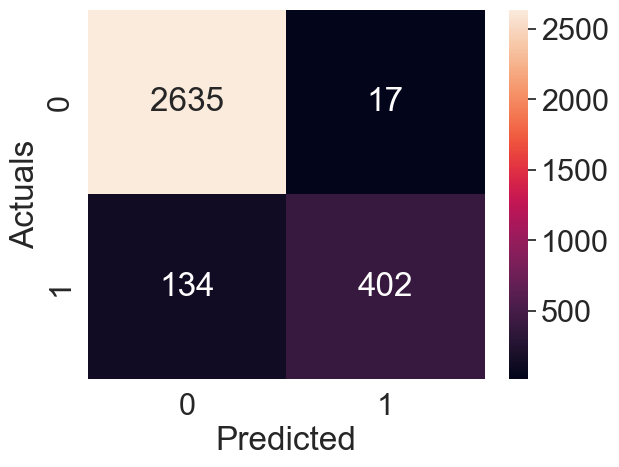

<Figure size 600x400 with 0 Axes>

In [488]:
sns.heatmap((metrics.confusion_matrix(y_test, y_test_predict)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals');

print('Accuracy Score',round(metrics.accuracy_score(y_test, y_test_predict),4))
print('F1 Score',round(metrics.f1_score(y_test, y_test_predict),4),'\n')
plt.figure(figsize=(6,4))

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_test_predict).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n')

print('Confusion Matrix Test :''\n')
